
### <div style="color:white;display:fill;border-radius:5px;background-color:#ae0f09;font-family:DM Serif Display;overflow:hidden"><a class="anchor" id="AnalysisofTransactions"></a><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>1 |</b> Contents</p></div>
[back](#TOC)

#### - ***`Question`***:

- 1. Examine the provided Dubai real estate data - sales and rental transactions only - to uncover key insights and trends. Support your findings with relevant visualizations. (10 points)

- 2. Utilize the additional datasets to identify macroeconomic factors, such as GDP, tourism, population, and energy, that may impact the real estate market. (10 points)

- 3. Explore the correlations between these macroeconomic factors and property sale or rental prices. Highlight the most significant factors driving market behavior. (10 points)

#### - ***`Solution`***:

**Exploratory Data Analysis (EDA) Plan**

To perform a comprehensive EDA and address the required question, we'll examine **Dubai's real estate data** alongside **macroeconomic datasets** using these step-by-step approach:

---

**Step 1: Real Estate Data (Sales & Rentals)**

**Tasks:**
1. **Load and Inspect Data:**
   - Load `processed_rents.parquet` and `processed_transactions.parquet` datasets.
   - Refactor to reconcile conflicting variables
   - Check for missing values, data types, and anomalies.

2. **Univariate Analysis:**
   - Distribution of property types, sizes, and rental/sale prices.
   - Time-series trends for transaction volume and average prices.

3. **Bivariate Analysis:**
   - Analyze price variations by:
     - Property type/sub-type.
     - Number of bedrooms.
     - Area/neighborhood.
     - Usage (commercial vs. residential).

4. **Temporal Trends:**
   - Investigate seasonal variations in rental and sale prices.
   - Assess trends over months and years.

5. **Visualization Examples:**
   - Histograms for price distributions.
   - Bar charts for property types and usage.
   - Line charts for temporal trends.

---

**Step 2: Macroeconomic Data**

**Datasets:**
- **GDP (Quarterly)**:
  - Examine Dubai’s GDP growth trends.
  - Plot GDP vs. average property prices.

- **Tourism**:
  - Analyze tourist arrivals and their relationship with rental demand.

- **Population**:
  - Investigate population growth and its correlation with property transactions.

- **Consumer Price Index (CPI)**:
  - Correlate inflation data with property prices.

- **Currency Strength (AED-USD Exchange Rates)**:
  - Explore how exchange rate fluctuations impact foreign investment in real estate.

**Tasks:**
1. **Load and Inspect Data:**
   - Check for missing values, data ranges, and formatting issues.

2. **Temporal Trends:**
   - Examine macroeconomic indicators over time.

3. **Correlation Analysis:**
   - Compute correlations between property prices and macroeconomic indicators.

4. **Visualization Examples:**
   - Scatter plots for GDP, population, and property prices.
   - Heatmaps to display correlation matrices.
   - Summary statistics table

---

**Step 3: Integration and Key Insights**

**Tasks:**
1. **Combine Data:**
   - Merge real estate data with macroeconomic indicators based on time periods.

2. **Identify Significant Factors:**
   - Use correlation coefficients and simple regressions to pinpoint key drivers.

3. **Key Insights:**
   - Highlight the strongest correlations and trends.
   - Identify unexpected patterns, such as mismatches between GDP growth and property prices.

---

### <div style="color:white;display:fill;border-radius:5px;background-color:#ae0f09;font-family:DM Serif Display;overflow:hidden"><a class="anchor" id="AnalysisofTransactions"></a><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>2 |</b> Data Overview</p></div>
[back](#TOC)


####  Load Data, Inspect, and Reconcile Variables

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../utils")

# Import the data_loader module
import data_loader, data_processor, plots, visualizations, insights


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

To reconcile the terminologies and align them with the datasets and the challenge description, we can establish a clear mapping between the terms and their meanings in the context of this analysis:

**Challenge Terminology and Dataset Mapping:**

1. **Sales Transactions:**
   - **Challenge Description:** Refers to transactions where properties are bought or sold.
   - **Dataset:** `transactions.csv` (now processed as `processed_transactions_df`).
   - **Proposed Terminology:** **Property Sales Transactions** or simply **Sales Transactions**.

2. **Rental Transactions:**
   - **Challenge Description:** Refers to agreements where properties are leased or rented.
   - **Dataset:** `rents.csv` (now processed as `processed_rents_df`).
   - **Proposed Terminology:** **Property Rental Transactions** or simply **Rental Transactions**.

**Importance of Unified Terminology**

- **Clarity:** Using consistent terms (e.g., *Sales Transactions* and *Rental Transactions*) avoids ambiguity and confusion.
- **Alignment with Challenge:** Adopting terms from the challenge description ensures alignment with the task and goals.
- **Contextual Relevance:** Using dataset-specific terms like *Property Sales Transactions* for `transactions.csv` and *Property Rental Transactions* for `rents.csv` reflects their roles in the analysis.

---

**Proposed Unified Terminology:**

| Challenge Term           | Dataset Name    | Proposed Unified Term           |
|--------------------------|-----------------|----------------------------------|
| Sales Transactions       | `transactions.csv` | Property Sales Transactions       |
| Rental Transactions      | `rents.csv`      | Property Rental Transactions      |

**Update Code and Documentation:**
1. Code comments and variable names updated to reflect the unified terminology:
   - Renamed `transactions_df` to `property_transactions_df`.
   - Renamed `rents_df` to `property_rental_transactions_df`.

2. Updated documentation and markdown cells in notebooks to use these terms consistently:
   - Mentioned *Property Sales Transactions* for sales data, as a subset of Property Transactions (transactions.csv).
   - Mentioned *Property Rental Transactions* for rental data (no subsets).

3. Define the Solution Scope

The goal is to:

- Analyze Sales Transactions from transactions.csv.
- Analyze Rental Transactions from rents.csv.

---

- this will be used for the first part of the question

In [3]:
property_rental_transactions_df = pd.read_parquet('../datasets/processed/processed_rents_df.parquet', engine='fastparquet')
property_transactions_df = pd.read_parquet('../datasets/processed/processed_transactions_df.parquet', engine='fastparquet')


- these uploads will address the remaining part of the question

In [4]:
cpi_annual_df = pd.read_parquet("../datasets/processed/processed_cpi_annual_df.parquet")
cpi_quarterly_df = pd.read_parquet("../datasets/processed/processed_cpi_quarterly_df.parquet")
cpi_monthly_df = pd.read_parquet("../datasets/processed/processed_cpi_monthly_df.parquet")


In [5]:
processed_wdi_df = pd.read_parquet("../datasets/processed/processed_wdi_df.parquet")
processed_wdi_df.head(2)

Country Name Country Code     Indicator Code  Year  Value  \
68   United Arab Emirates          ARE  NY.GNP.PCAP.PP.KD  1960    NaN   
336  United Arab Emirates          ARE     IE.PPN.ENGY.CD  1960    NaN   

         Short Indicator Name  
68       GNI per Capita (PPP)  
336  PPP Investment in Energy

In [6]:
gdp_quarterly_constant_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
gdp_quarterly_current_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_current_df.parquet")
tourism_indicators_df = pd.read_parquet("../datasets/processed/processed_tourism_indicators_df.parquet")
tourism_regions_df = pd.read_parquet("../datasets/processed/processed_tourism_regions_df.parquet")
tourism_ratings_df = pd.read_parquet("../datasets/processed/processed_tourism_ratings_df.parquet")
pop_estimates_df = pd.read_parquet("../datasets/processed/processed_pop_estimates_df.parquet")
pop_indicators_df = pd.read_parquet("../datasets/processed/pop_indicators.parquet")
currency_strength_df = pd.read_parquet("../datasets/processed/currency_strength_df.parquet")


- external data to process coordinates

In [7]:
areas_coords_df = pd.read_parquet("../datasets/processed/processed_areas_coords_df.parquet")
projects_coords_df = pd.read_parquet("../datasets/processed/processed_projects_coords_df.parquet")

In [8]:
data_processor.display_dataframe_info(areas_coords_df)

Shape: (258, 3)
Dtypes: ['Area:object', 'Latitude_Area:float64', 'Longitude_Area:float64']
Missings (%): ['Area:0.00%', 'Latitude_Area:0.00%', 'Longitude_Area:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


Area  Latitude_Area  Longitude_Area
0  BUSINESS BAY      25.189427       55.264819
1       Al Wasl      25.195933       55.255737

In [9]:
data_processor.display_dataframe_info(projects_coords_df)

Shape: (1475, 3)
Dtypes: ['Project:object', 'Latitude_Project:float64', 'Longitude_Project:float64']
Missings (%): ['Project:0.07%', 'Latitude_Project:0.00%', 'Longitude_Project:0.00%']
Total missings (%): 0.02%
total duplicates: 0
Total memory usage: 0.03 MB


Project  Latitude_Project  Longitude_Project
0  AYKON CITY 3          25.11072           55.38869
1          Fern          24.99426           55.16346

In [10]:
data_processor.display_dataframe_info(cpi_quarterly_df)

Shape: (112, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:object', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


DATAFLOW    MEASURE UNIT_MEASURE REF_AREA FREQ CPI_DIV  \
0  FCSA:DF_CPI_Q(3.2.0)  CPI_QCHNG      PERCENT       AE    Q     HOU   
1  FCSA:DF_CPI_Q(3.2.0)  CPI_QCHNG      PERCENT       AE    Q     HOU   

  SOURCE_DETAIL TIME_PERIOD  OBS_VALUE  DECIMALS  
0          FCSA     2022-Q1  -1.851788         2  
1          FCSA     2022-Q2  -1.001258         2

In [11]:
data_processor.display_dataframe_info(cpi_monthly_df)

Shape: (7361, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:object', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.56 MB


DATAFLOW     MEASURE UNIT_MEASURE REF_AREA FREQ CPI_DIV  \
0  FCSA:DF_CPI(3.2.0)  CPI_ANNCHG      PERCENT       AE    M     FUR   
1  FCSA:DF_CPI(3.2.0)  CPI_ANNCHG      PERCENT       AE    M     FUR   

  SOURCE_DETAIL TIME_PERIOD  OBS_VALUE  DECIMALS  
0          FCSA     2009-01       7.25         2  
1          FCSA     2009-02       3.87         2

In [12]:
data_processor.display_dataframe_info(cpi_annual_df)


Shape: (369, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'CPI_DIV:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'CPI_DIV:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


DATAFLOW      MEASURE UNIT_MEASURE REF_AREA FREQ CPI_DIV  \
0  FCSA:DF_CPI_ANN(3.2.0)  CPI_INDEX21         INDX       AE    A     FUR   
1  FCSA:DF_CPI_ANN(3.2.0)  CPI_INDEX21         INDX       AE    A     FUR   

  SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  DECIMALS  
0          FCSA         2021     100.00         2  
1          FCSA         2022     100.02         2

In [13]:
data_processor.display_dataframe_info(currency_strength_df)

Shape: (5468, 8)
Dtypes: ['Open:float64', 'High:float64', 'Low:float64', 'Close:float64', 'Adj Close:float64', 'Volume:int64', 'Date:object', 'Return:float64']
Missings (%): ['Open:0.00%', 'High:0.00%', 'Low:0.00%', 'Close:0.00%', 'Adj Close:0.00%', 'Volume:0.00%', 'Date:0.00%', 'Return:0.02%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.33 MB


Open      High       Low     Close  Adj Close  Volume        Date  \
0  0.272331  0.272368  0.272331  0.272368   0.272368       0  2003-12-01   
1  0.272413  0.272420  0.272331  0.272368   0.272368       0  2003-12-02   

   Return  
0     NaN  
1     0.0

In [14]:
data_processor.display_dataframe_info(pop_indicators_df)

Shape: (18, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.00 MB


DATAFLOW MEASURE POP_IND UNIT_MEASURE REF_AREA FREQ GENDER  \
0  FCSA:DF_POP_IND(2.7.0)  POPIND     MED        YEARS       AE    A     _Z   
1  FCSA:DF_POP_IND(2.7.0)  POPIND     MED        YEARS       AE    A     _Z   

  SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  DECIMALS  
0          FCSC         2019       31.3         1  
1          FCSC         2020       32.8         1

In [15]:
data_processor.display_dataframe_info(pop_estimates_df)

Shape: (162, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


DATAFLOW MEASURE POP_IND UNIT_MEASURE REF_AREA FREQ GENDER  \
0  FCSA:DF_POP(2.7.0)     POP      _Z           PS       AE    A      M   
1  FCSA:DF_POP(2.7.0)     POP      _Z           PS       AE    A      M   

  SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0          FCSC         1970     149195  
1          FCSC         1971     181473

In [16]:
data_processor.display_dataframe_info(tourism_ratings_df)

Shape: (400, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_HOT_TYPE(4.3.0)       H       NUMBER       AE    A     _T   
1  FCSA:DF_HOT_TYPE(4.3.0)       H       NUMBER       AE    A     _T   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0         EST           _Z          FCSC         2014       1027  
1         EST           _Z          FCSC         2015       1056

In [17]:
data_processor.display_dataframe_info(tourism_regions_df)

Shape: (664, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.06 MB


DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_GUEST_REGION(4.3.0)       H       NUMBER       AE    A     _Z   
1  FCSA:DF_GUEST_REGION(4.3.0)       H       NUMBER       AE    A     _Z   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0         GHH           OC          FCSC         2015     399751  
1         GHH           OC          FCSC         2016     380717

In [18]:
data_processor.display_dataframe_info(tourism_indicators_df)

Shape: (201, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.02 MB


DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_HOT_INDICATOR(4.3.0)       H          AED       AE    A     _Z   
1  FCSA:DF_HOT_INDICATOR(4.3.0)       H          AED       AE    A     _Z   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0          RR           _Z          FCSC         1985   318484.0  
1          RR           _Z          FCSC         1986   298504.0

In [19]:
data_processor.display_dataframe_info(gdp_quarterly_current_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


DATAFLOW REF_AREA FREQ UNIT_MEASURE SOURCE_DETAIL MEASURE  \
0  FCSA:DF_QGDP_CUR(1.8.0)       AE    Q      PERCENT          FCSC     NFC   
1  FCSA:DF_QGDP_CUR(1.8.0)       AE    Q      PERCENT          FCSC     NFC   

  QUARTER QGDP_SYS  QGDP_UNIT  TIME_PERIOD  OBS_VALUE  DECIMALS  
0      Q3      CUR  GWTH_RATE         2013   4.355075         1  
1      Q3      CUR  GWTH_RATE         2014   4.394883         1

In [20]:
data_processor.display_dataframe_info(gdp_quarterly_constant_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


DATAFLOW REF_AREA FREQ UNIT_MEASURE SOURCE_DETAIL MEASURE  \
0  FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC     ELE   
1  FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC     ELE   

  QUARTER QGDP_SYS QGDP_UNIT  TIME_PERIOD    OBS_VALUE  DECIMALS  
0      Q1      CON       VAL         2012  6029.460989         0  
1      Q1      CON       VAL         2013  6516.431786         0

In [21]:
data_processor.display_dataframe_info(property_transactions_df)

Shape: (995975, 22)
Dtypes: ['Transaction Number:object', 'Transaction Date:object', 'Property ID:int64', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Usage:category', 'Area:category', 'Property Type:category', 'Property Sub Type:category', 'Amount:float64', 'Transaction Size (sq.m):float64', 'Property Size (sq.m):float64', 'Room(s):category', 'Parking:object', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No. of Buyer:float64', 'No. of Seller:float64', 'Project:category']
Missings (%): ['Transaction Number:0.00%', 'Transaction Date:0.00%', 'Property ID:0.00%', 'Transaction Type:0.00%', 'Transaction sub type:0.00%', 'Registration type:0.00%', 'Is Free Hold?:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Type:0.00%', 'Property Sub Type:2.23%', 'Amount:0.00%', 'Transaction Size (sq.m):12.62%', 'Property Size (sq.m):0.00%', 'Room(s):23.88%', 'Parking:49.53%', 'Nearest Metro:21.70%'

Transaction Number  Transaction Date  Property ID Transaction Type  \
0       13-7700-2022  02/06/2022 16:18     44581083         Mortgage   
1       13-7699-2022  02/06/2022 16:14     44014284         Mortgage   

    Transaction sub type Registration type Is Free Hold?        Usage  \
0  Mortgage Registration             Ready     Free Hold  Residential   
1  Mortgage Registration             Ready     Free Hold  Residential   

           Area Property Type  ... Transaction Size (sq.m)  \
0  AKOYA OXYGEN          Land  ...                   174.8   
1  AKOYA OXYGEN          Land  ...                   174.8   

   Property Size (sq.m)  Room(s)  Parking Nearest Metro Nearest Mall  \
0                 174.8      NaN     None           NaN          NaN   
1                 174.8      NaN     None           NaN          NaN   

       Nearest Landmark No. of Buyer No. of Seller                   Project  
0  Dubai Cycling Course          0.0           0.0   DAMAC HILLS (2) - ODORA  
1  Dubai Cycling Course          0.0           0.0  DAMAC HILLS (2) - ZINNIA  

[2 rows x 22 columns]

In [22]:
data_processor.display_dataframe_info(property_rental_transactions_df)

Shape: (5469008, 21)
Dtypes: ['Ejari Contract Number:int64', 'Registration Date:datetime64[ns]', 'Start Date:category', 'End Date:datetime64[ns]', 'Property ID:int64', 'Version:category', 'Area:category', 'Contract Amount:float64', 'Annual Amount:float64', 'Is Free Hold?:category', 'Property Size (sq.m):float64', 'Property Type:category', 'Property Sub Type:category', 'Number of Rooms:float32', 'Usage:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Parking:float32', 'No of Units:int16', 'Project:category']
Missings (%): ['Ejari Contract Number:0.00%', 'Registration Date:0.00%', 'Start Date:0.00%', 'End Date:0.00%', 'Property ID:0.00%', 'Version:0.00%', 'Area:0.01%', 'Contract Amount:2.85%', 'Annual Amount:5.89%', 'Is Free Hold?:0.00%', 'Property Size (sq.m):49.95%', 'Property Type:0.00%', 'Property Sub Type:0.73%', 'Number of Rooms:96.53%', 'Usage:1.01%', 'Nearest Metro:10.27%', 'Nearest Mall:10.94%', 'Nearest Landmark:6.34%', 'Parking:96.93%

Ejari Contract Number   Registration Date Start Date   End Date  \
0        120210425000238 2021-04-25 09:36:31 2015-01-15 2026-04-12   
1        120210526001582 2021-05-26 12:12:22 2015-02-05 2025-11-30   

   Property ID Version                          Area  Contract Amount  \
0   1058329686     New  Dubai Investment Park Second          25000.0   
1     99539298     New                Um Nahad Third       16000000.0   

   Annual Amount Is Free Hold?  ...  Property Type Property Sub Type  \
0         5000.0     Free Hold  ...       Building           Factory   
1      4000000.0     Free Hold  ...       Building          Building   

  Number of Rooms        Usage Nearest Metro Nearest Mall Nearest Landmark  \
0             NaN   Industrial           NaN          NaN   Expo 2020 Site   
1             NaN  Residential           NaN          NaN              NaN   

  Parking  No of Units  Project  
0     NaN            1      NaN  
1     NaN            1      NaN  

[2 rows x 21 columns]

### 2. Sales and Rentals EDA

#### Overview

In [23]:
property_transactions_df[['Transaction Date','Amount','Transaction Size (sq.m)','Property Size (sq.m)','No. of Buyer','No. of Seller']].describe()

Amount  Transaction Size (sq.m)  Property Size (sq.m)  \
count  9.959750e+05             8.702480e+05          9.959720e+05   
mean   3.705480e+06             1.868872e+03          1.908865e+03   
std    4.741460e+07             3.887984e+05          4.169793e+05   
min    6.751000e+01            -3.984080e+03          0.000000e+00   
25%    6.538000e+05             7.506000e+01          7.326000e+01   
50%    1.200000e+06             1.320200e+02          1.238100e+02   
75%    2.203381e+06             3.223950e+02          2.689400e+02   
max    1.142830e+10             3.421034e+08          3.421034e+08   

        No. of Buyer  No. of Seller  
count  995787.000000  995787.000000  
mean        0.944836       0.924811  
std         6.488847       5.819718  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max      3134.000000    1084.000000

In [24]:
# Process the 'Transaction Date' column from object to datetime and extract temporal data
property_rental_transactions_df = data_processor.process_dates(property_rental_transactions_df,'Registration Date')
property_transactions_df = data_processor.process_dates(property_transactions_df,'Transaction Date')

# Check the updates
print(property_rental_transactions_df[['Registration Date', 'Year', 'Month', 'Day', 'Hour']].head(2))
print("-"*50)
print(property_transactions_df[['Transaction Date', 'Year', 'Month', 'Day', 'Hour']].head(2))
# property_transactions_df.describe()


    Registration Date  Year  Month  Day  Hour
0 2021-04-25 09:36:31  2021      4   25     9
1 2021-05-26 12:12:22  2021      5   26    12
--------------------------------------------------
     Transaction Date  Year  Month  Day  Hour
0 2022-06-02 16:18:00  2022      6    2    16
1 2022-06-02 16:14:00  2022      6    2    16


In [25]:
sales_area = property_transactions_df['Area'].value_counts().head(10)
rental_area = property_rental_transactions_df['Area'].value_counts().head(10)
sales_area

Area
DUBAI MARINA               79133
BUSINESS BAY               69009
JUMEIRAH LAKES TOWERS      61381
JUMEIRAH VILLAGE CIRCLE    50577
BURJ KHALIFA               49958
INTERNATIONAL CITY PH 1    48155
PALM JUMEIRAH              33397
DUBAI SPORTS CITY          31623
SILICON OASIS              30004
EMIRATE LIVING             26700
Name: count, dtype: int64

In [26]:
property_transactions_df['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995], dtype=int32)

In [27]:
# sales_insights, yearly_sales = insights.extract_real_estate_sales_insights(
#     property_transactions_df, 
# )

# sales_insights

In [28]:
# rentals_insights = insights.extract_real_estate_rentals_insights(
#     property_rental_transactions_df, 
# )

# rentals_insights

Datetime has minutes/seconds component which could have certain uses

 📊 **Property Transactions Summary Report**📆  

**Rental Transactions Overview**  
| Metric | Value | Notes |
|---|---|---|
| **Total Transactions** | 5,469,008 | Total rental contracts recorded |
| **Unique Areas** | 216 | Areas where rental transactions occurred |
| **Top Area by Transactions** | Al Warsan First | Most rental contracts signed here |
| **Most Common Usage** | Residential | Majority of properties rented are for residential purposes |
| **Most Common Property Type** | Unit | Apartments and individual units dominate rentals |
| **Freehold Transactions** | 2,161,511 | Rentals in freehold properties |
| **Non-Freehold Transactions** | 3,307,497 | Rentals in non-freehold properties |
| **Average Contract Amount** | 616,165.42 AED | Total contract value across all years |
| **Average Annual Rent** | 363,754.07 AED | Yearly rent paid by tenants on average |
| **Average Property Size** | 15,582.89 sq.m | Average size of rental properties |

 **Sales Transactions Overview**  
| Metric | Value | Notes |
|---|---|---|
| **Total Transactions** | 995,975 | Total sales transactions recorded |
| **Unique Areas** | 372 | Areas where sales transactions occurred |
| **Top Area by Transactions** | Dubai Marina | Most property sales recorded here |
| **Most Common Transaction Type** | Sales | Direct property sales are the most frequent transaction type |
| **Most Common Sub-Type** | Sale | Majority of transactions involve outright sales |
| **Most Common Registration Type** | Ready | Most properties sold are completed and ready for use |
| **Most Common Usage** | Residential | Residential properties dominate the market |
| **Most Common Property Type** | Unit | Apartments and individual units are the most commonly sold |
| **Freehold Transactions** | 877,282 | Properties in freehold areas sold |
| **Non-Freehold Transactions** | 118,693 | Properties in non-freehold areas sold |
| **Average Sale Price** | 3,705,479.78 AED | Typical sale value across transactions |
| **Highest Recorded Sale Price** | 11,428,300,546.00 AED | Highest single property sale recorded |
| **Average Property Size** | 1,908.87 sq.m | Average size of properties sold |

---

📌 **Summary & Interpretation**  
- **Dubai Marina leads in sales**, while **Al Warsan First** dominates rental transactions, indicating high rental demand in the latter.  
- **Residential properties dominate both sales and rental markets**, suggesting strong demand for living spaces rather than commercial.  
- **Freehold sales significantly outweigh non-freehold sales**, indicating investor preference for full ownership properties.  
- **The rental market has significantly higher transaction volume**, but **sales transactions have much higher average values**.  
- **Large transaction values in sales indicate strong investment activity**, especially with a **recorded sale above 11 billion AED**.  
- **Rental properties are much larger on average**, which could indicate that **commercial leases are influencing the data**.  🚀


--- 

- Let's get more information on that highest transaction of 11Billion AED

In [29]:
# Filter the dataset for the specific transaction with the large sale price
large_transaction = property_transactions_df[property_transactions_df['Amount'] == 11428300546.00]

print("Details of the 11.4 Billion AED Transaction:")
display(large_transaction.T)

top_10_transactions = property_transactions_df.sort_values(by='Amount', ascending=False).head(10)
print("\nTop 10 Highest Transactions for Comparison:")
top_10_transactions.T


Details of the 11.4 Billion AED Transaction:


399078
Transaction Number                39-417-2016
Transaction Date          2016-10-04 10:13:00
Property ID                          97437438
Transaction Type                     Mortgage
Transaction sub type     Development Mortgage
Registration type                       Ready
Is Free Hold?                       Free Hold
Usage                              Commercial
Area                        DUBAI WATER FRONT
Property Type                            Land
Property Sub Type                  Commercial
Amount                          11428300546.0
Transaction Size (sq.m)            1073270.46
Property Size (sq.m)               1073270.46
Room(s)                                   NaN
Parking                                  None
Nearest Metro                             NaN
Nearest Mall                              NaN
Nearest Landmark                          NaN
No. of Buyer                              0.0
No. of Seller                             0.0
Project                                   NaN
Year                                     2016
Month                                      10
Day                                         4
Hour                                       10


Top 10 Highest Transactions for Comparison:


399078                 963767  \
Transaction Number                39-417-2016           13-1596-2006   
Transaction Date          2016-10-04 10:13:00    2006-12-14 00:00:00   
Property ID                          97437438                 915366   
Transaction Type                     Mortgage               Mortgage   
Transaction sub type     Development Mortgage  Mortgage Registration   
Registration type                       Ready                  Ready   
Is Free Hold?                       Free Hold          Non Free Hold   
Usage                              Commercial            Residential   
Area                        DUBAI WATER FRONT              Jabal Ali   
Property Type                            Land                   Land   
Property Sub Type                  Commercial                    NaN   
Amount                          11428300546.0           9500000000.0   
Transaction Size (sq.m)            1073270.46                4645.15   
Property Size (sq.m)               1073270.46           129942216.49   
Room(s)                                   NaN                    NaN   
Parking                                  None                   None   
Nearest Metro                             NaN                    NaN   
Nearest Mall                              NaN                    NaN   
Nearest Landmark                          NaN                    NaN   
No. of Buyer                              0.0                    0.0   
No. of Seller                             0.0                    0.0   
Project                                   NaN                    NaN   
Year                                     2016                   2006   
Month                                      10                     12   
Day                                         4                     14   
Hour                                       10                      0   

                                             670448  \
Transaction Number                      14-757-2012   
Transaction Date                2012-11-01 12:22:00   
Property ID                                  922872   
Transaction Type                           Mortgage   
Transaction sub type                Modify Mortgage   
Registration type                             Ready   
Is Free Hold?                             Free Hold   
Usage                                    Commercial   
Area                              MEDYAN GRANDSTAND   
Property Type                                  Land   
Property Sub Type                       Sports Club   
Amount                                 8100000000.0   
Transaction Size (sq.m)                   644989.43   
Property Size (sq.m)                      644989.43   
Room(s)                                         NaN   
Parking                                        None   
Nearest Metro            Business Bay Metro Station   
Nearest Mall                             Dubai Mall   
Nearest Landmark                     Downtown Dubai   
No. of Buyer                                    0.0   
No. of Seller                                   0.0   
Project                                         NaN   
Year                                           2012   
Month                                            11   
Day                                               1   
Hour                                             12   

                                             321770  \
Transaction Number                     13-9722-2017   
Transaction Date                2017-11-16 13:50:00   
Property ID                                  922872   
Transaction Type                           Mortgage   
Transaction sub type          Mortgage Registration   
Registration type                             Ready   
Is Free Hold?                             Free Hold   
Usage                                    Commercial   
Area                              MEDYAN GRANDSTAND   
Property Type                                  Land   
Pro

In [30]:
property_transactions_df.describe()

Transaction Date   Property ID        Amount  \
count                         995975  9.959750e+05  9.959750e+05   
mean   2015-01-18 13:58:10.776414464  1.114824e+08  3.705480e+06   
min              1995-03-07 00:00:00  1.458000e+03  6.751000e+01   
25%              2011-02-28 13:40:00  6.010275e+05  6.538000e+05   
50%              2015-02-19 19:01:00  1.494329e+07  1.200000e+06   
75%              2019-02-26 13:36:00  5.385910e+07  2.203381e+06   
max              2022-06-02 16:18:00  1.260767e+09  1.142830e+10   
std                              NaN  2.477860e+08  4.741460e+07   

       Transaction Size (sq.m)  Property Size (sq.m)   No. of Buyer  \
count             8.702480e+05          9.959720e+05  995787.000000   
mean              1.868872e+03          1.908865e+03       0.944836   
min              -3.984080e+03          0.000000e+00       0.000000   
25%               7.506000e+01          7.326000e+01       0.000000   
50%               1.320200e+02          1.238100e+02       1.000000   
75%               3.223950e+02          2.689400e+02       1.000000   
max               3.421034e+08          3.421034e+08    3134.000000   
std               3.887984e+05          4.169793e+05       6.488847   

       No. of Seller           Year          Month            Day  \
count  995787.000000  995975.000000  995975.000000  995975.000000   
mean        0.924811    2014.556405       6.414323      15.945093   
min         0.000000    1995.000000       1.000000       1.000000   
25%         0.000000    2011.000000       3.000000       8.000000   
50%         1.000000    2015.000000       6.000000      16.000000   
75%         1.000000    2019.000000       9.000000      24.000000   
max      1084.000000    2022.000000      12.000000      31.000000   
std         5.819718       4.814687       3.437541       8.749576   

                Hour  
count  995975.000000  
mean       10.019213  
min         0.000000  
25%         9.000000  
50%        11.000000  
75%        13.000000  
max        23.000000  
std         4.427442

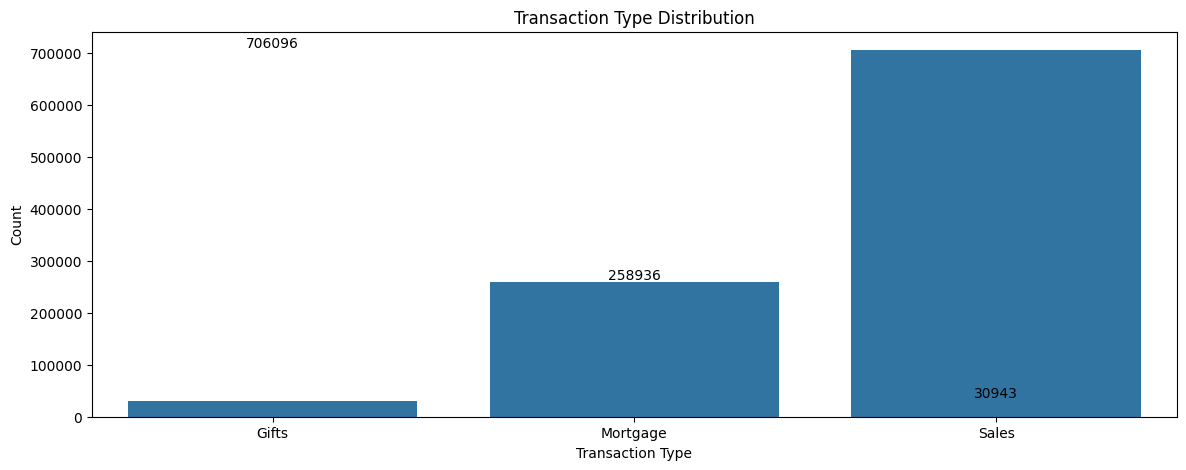

In [31]:
# Visual 1: Transaction Type Distribution
plt.figure(figsize=(14, 5))
sns.countplot(x='Transaction Type', data=property_transactions_df)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Get the count of each transaction type
value_counts = property_transactions_df['Transaction Type'].value_counts()

# Write the values on top of each bar
for i, count in enumerate(value_counts):
    plt.annotate(count, xy=(i, count), ha='center', va='bottom')

# Set the background color
plt.rcParams['axes.facecolor'] = 'beige'

plt.show()


In [32]:
value_counts

Transaction Type
Sales       706096
Mortgage    258936
Gifts        30943
Name: count, dtype: int64

#### 2a. Univariate Analysis: Histograms for All Variables

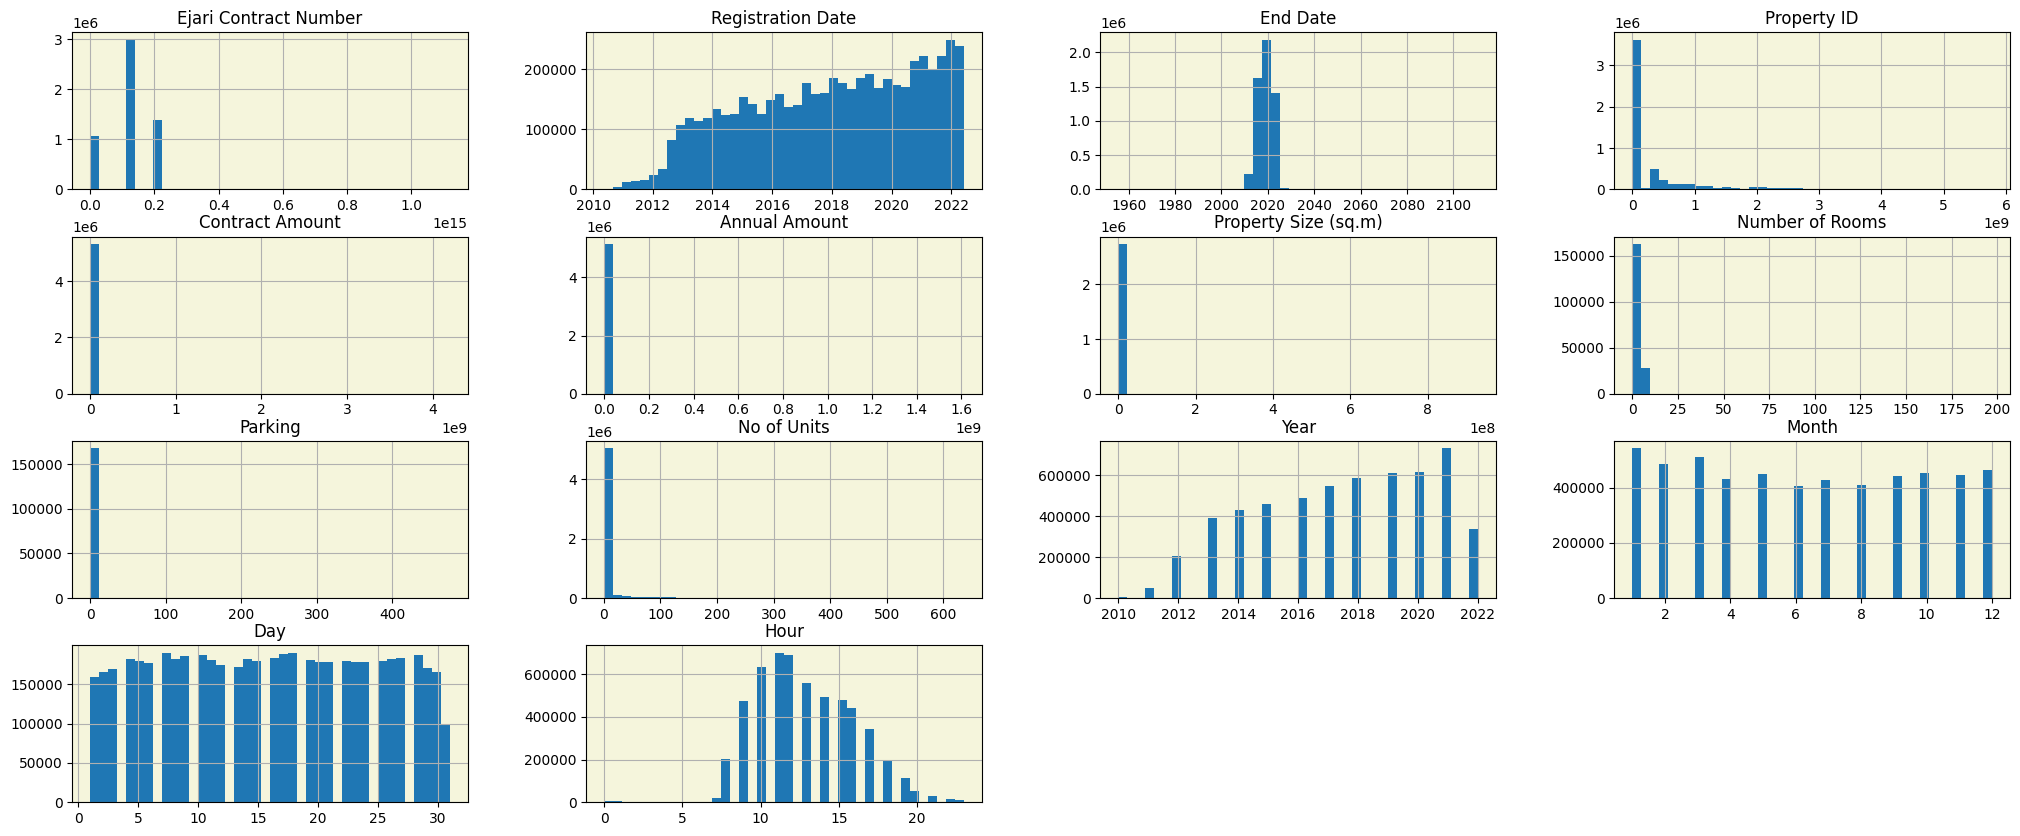

In [33]:
property_rental_transactions_df.hist(figsize=(25, 10), bins=40)
plt.show()

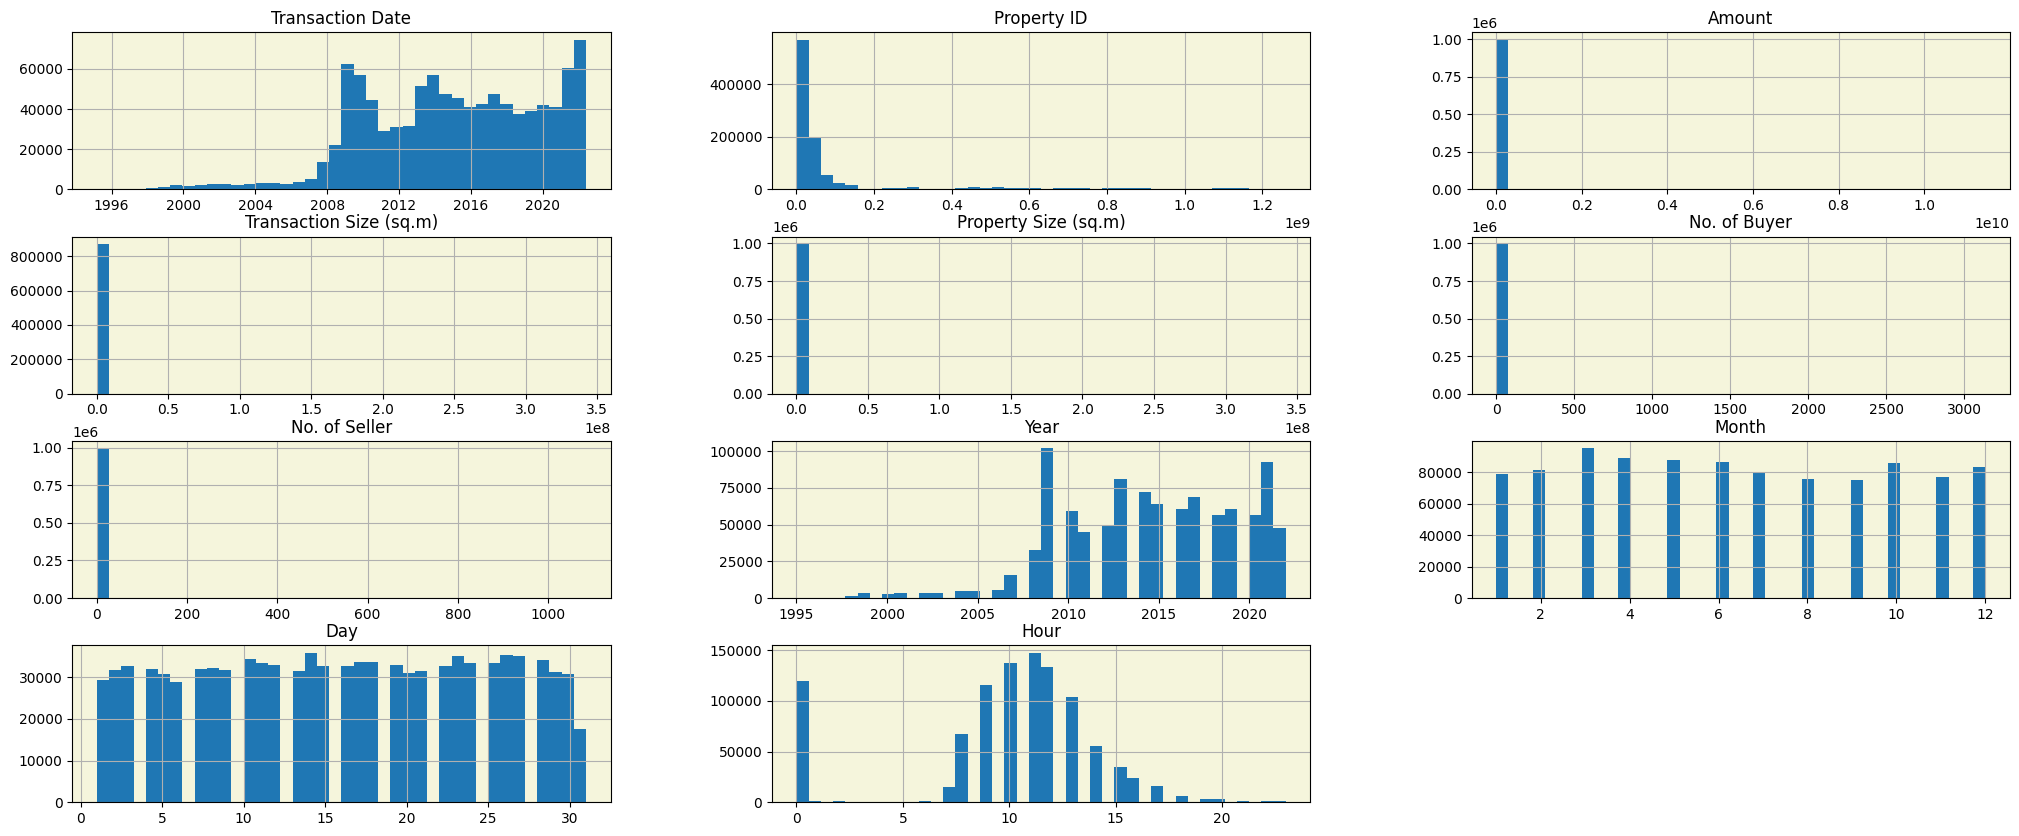

In [34]:
property_transactions_df.hist(figsize=(25, 10), bins=40)
plt.show()

#### 2b. Univariate Analysis: Count Plot for All Categorical Variables

#### 2c. Univariate/Multivariate Analysis: Trends with Comparison Option

In [35]:
property_rental_transactions_df.duplicated().sum()

0

<Figure size 1400x400 with 0 Axes>

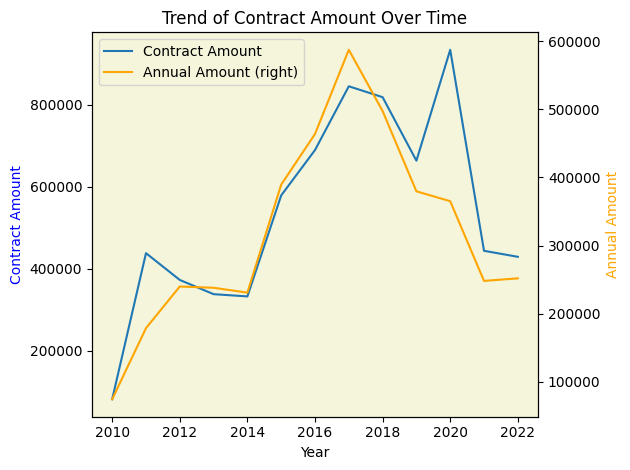

In [36]:

visualizations.plot_trends_secondary_cols(
    property_rental_transactions_df, 
    main_col='Contract Amount', 
    time_col='Registration Date', 
    secondary_col='Annual Amount'
)


In [37]:
# There are only 4 invalid dates, so we remove them since we do not know the exact transaction date
print(f'Number of invalid transaction dates for analysis: {len(property_rental_transactions_df[property_rental_transactions_df["Registration Date"].isna()])}')
# df = df.dropna(subset=['instance_date'])

Number of invalid transaction dates for analysis: 0


In [38]:
property_rental_transactions_df['Registration Date'].describe()

count                          5469008
mean     2017-12-22 10:56:27.071334912
min                2010-05-18 19:44:30
25%         2015-08-09 10:02:38.500000
50%         2018-03-28 18:02:16.500000
75%         2020-07-29 10:45:42.500000
max                2022-06-03 12:25:51
Name: Registration Date, dtype: object

In [39]:
property_transactions_df['Transaction Date'].describe()
# transactions_df['Transaction Date']

count                           995975
mean     2015-01-18 13:58:10.776414464
min                1995-03-07 00:00:00
25%                2011-02-28 13:40:00
50%                2015-02-19 19:01:00
75%                2019-02-26 13:36:00
max                2022-06-02 16:18:00
Name: Transaction Date, dtype: object

<Figure size 1400x400 with 0 Axes>

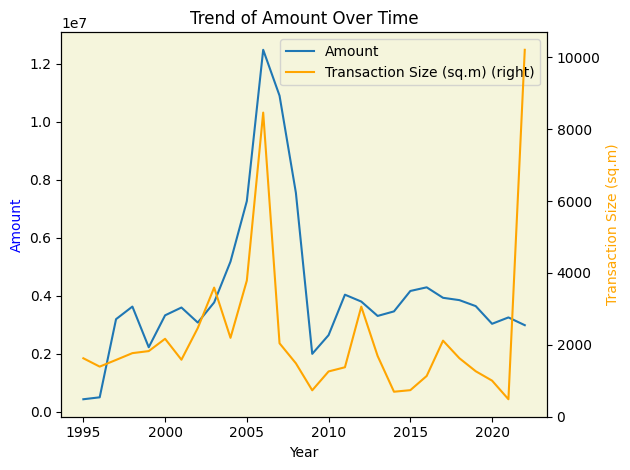

In [40]:
visualizations.plot_trends_secondary_cols(
    property_transactions_df, 
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


#### 2d. Summary Statistics - Rent and Sales

- Property Transactions Summary Stats

In [41]:
property_transactions_df[['Transaction Type','Transaction sub type','Property Type','Property Sub Type']]


Transaction Type   Transaction sub type Property Type Property Sub Type
0              Mortgage  Mortgage Registration          Land       Residential
1              Mortgage  Mortgage Registration          Land       Residential
2              Mortgage        Modify Mortgage          Land       Residential
3                 Sales                   Sale          Land        Commercial
4                 Sales                   Sale          Land       Residential
...                 ...                    ...           ...               ...
995970         Mortgage  Mortgage Registration          Land       Residential
995971         Mortgage  Mortgage Registration          Land       Residential
995972         Mortgage  Mortgage Registration          Land       Residential
995973         Mortgage  Mortgage Registration          Land       Residential
995974         Mortgage  Mortgage Registration          Land       Residential

[995975 rows x 4 columns]

In [42]:
data_processor.compute_summary_statistics(property_transactions_df)


--- Summary Statistics ---
                            count          mean           std      min        25%          50%           75%           max
Property ID              995975.0  1.114824e+08  2.477860e+08  1458.00  601027.50  14943291.00  5.385910e+07  1.260767e+09
Amount                   995975.0  3.705480e+06  4.741460e+07    67.51  653800.00   1200000.00  2.203381e+06  1.142830e+10
Transaction Size (sq.m)  870248.0  1.868872e+03  3.887984e+05 -3984.08      75.06       132.02  3.223950e+02  3.421034e+08
Property Size (sq.m)     995972.0  1.908865e+03  4.169793e+05     0.00      73.26       123.81  2.689400e+02  3.421034e+08
No. of Buyer             995787.0  9.448356e-01  6.488847e+00     0.00       0.00         1.00  1.000000e+00  3.134000e+03
No. of Seller            995787.0  9.248112e-01  5.819718e+00     0.00       0.00         1.00  1.000000e+00  1.084000e+03
Year                     995975.0  2.014556e+03  4.814687e+00  1995.00    2011.00      2015.00  2.019000e+03  2

- We are however concerned with only Sales Transactions here

In [43]:
# Filter for Sales Transactions
sales_transactions_df = property_transactions_df[property_transactions_df['Transaction Type'] == 'Sales']

# Inspect the filtered data
print('Property Sales Transactions Dataframe:')
sales_transactions_df.head()


Property Sales Transactions Dataframe:


Transaction Number    Transaction Date  Property ID Transaction Type  \
3      11-12317-2022 2022-06-02 15:22:00     79102731            Sales   
4      11-12316-2022 2022-06-02 15:07:00    132952797            Sales   
5     102-14693-2022 2022-06-02 14:56:00   1134745314            Sales   
6     102-14692-2022 2022-06-02 14:54:00    750930096            Sales   
8      11-12315-2022 2022-06-02 14:52:00     41160822            Sales   

      Transaction sub type Registration type Is Free Hold?        Usage  \
3                     Sale             Ready     Free Hold   Commercial   
4                     Sale             Ready     Free Hold  Residential   
5  Sell - Pre registration          Off-Plan     Free Hold  Residential   
6  Sell - Pre registration          Off-Plan     Free Hold  Residential   
8                     Sale             Ready     Free Hold  Residential   

                  Area Property Type  ...              Nearest Metro  \
3            AL FURJAN          Land  ...                        NaN   
4         AKOYA OXYGEN          Land  ...                        NaN   
5            AL FURJAN          Unit  ...  Ibn Battuta Metro Station   
6  ARABIAN RANCHES III      Building  ...                        NaN   
8        PALM JUMEIRAH          Unit  ...              Palm Jumeirah   

         Nearest Mall       Nearest Landmark  No. of Buyer No. of Seller  \
3                 NaN                    NaN           1.0           1.0   
4                 NaN   Dubai Cycling Course           1.0           1.0   
5  Ibn-e-Battuta Mall         Expo 2020 Site           0.0           1.0   
6                 NaN  Hamdan Sports Complex           2.0           1.0   
8         Marina Mall           Burj Al Arab           1.0           1.0   

                     Project  Year Month Day  Hour  
3                        NaN  2022     6   2    15  
4   DAMAC HILLS (2) - AMARGO  2022     6   2    15  
5          Prime Residency 3  2022     6   2    14  
6  Arabian Ranches III - JOY  2022     6   2    14  
8                GOLDEN MILE  2022     6   2    14  

[5 rows x 26 columns]

In [44]:
print('Property Sales Transactions Distribution:')
sales_transactions_df['Transaction Type'].value_counts()

Property Sales Transactions Distribution:


Transaction Type
Sales       706096
Gifts            0
Mortgage         0
Name: count, dtype: int64

All Mortgage and Gift Transactions will be zero because it's a filtered df for Sales only

In [45]:
print('Property Sales Transactions Sub Type Distribution:')
sales_transactions_df[['Transaction sub type','Transaction Type']].value_counts()

Property Sales Transactions Sub Type Distribution:


Transaction sub type                        Transaction Type
Sale                                        Sales               320565
Sell - Pre registration                     Sales               252047
Delayed Sell                                Sales                77843
Lease to Own Registration                   Sales                26541
Development Registration                    Sales                11014
Sell Development                            Sales                 6979
Lease to Own Registration Pre-Registration  Sales                 4187
Development Registration Pre-Registration   Sales                 2834
Delayed Development                         Sales                 1132
Delayed Lease to Own Registration           Sales                 1106
Lease Development Registration              Sales                  467
Adding Land By Sell                         Sales                  442
Lease to Own on Development Registration    Sales                  287
Sale On Payment 

In [46]:
sales_transactions_df[sales_transactions_df['Transaction Type'] == 'Gift']

Empty DataFrame
Columns: [Transaction Number, Transaction Date, Property ID, Transaction Type, Transaction sub type, Registration type, Is Free Hold?, Usage, Area, Property Type, Property Sub Type, Amount, Transaction Size (sq.m), Property Size (sq.m), Room(s), Parking, Nearest Metro, Nearest Mall, Nearest Landmark, No. of Buyer, No. of Seller, Project, Year, Month, Day, Hour]
Index: []

[0 rows x 26 columns]

- Property Rentals Transactions Summary Stats

In [47]:
property_transactions_df[['Property Type','Property Sub Type']]


Property Type Property Sub Type
0               Land       Residential
1               Land       Residential
2               Land       Residential
3               Land        Commercial
4               Land       Residential
...              ...               ...
995970          Land       Residential
995971          Land       Residential
995972          Land       Residential
995973          Land       Residential
995974          Land       Residential

[995975 rows x 2 columns]

In [48]:
data_processor.compute_summary_statistics(property_rental_transactions_df)


--- Summary Statistics ---
                           count          mean           std      min           25%           50%           75%           max
Ejari Contract Number  5469008.0  1.220578e+14  7.351125e+13  10784.0  1.201402e+14  1.201809e+14  2.201309e+14  1.120211e+15
Property ID            5469008.0  3.946340e+08  7.869853e+08     -3.0  5.558610e+05  1.551349e+07  4.097198e+08  5.772906e+09
Contract Amount        5312994.0  6.161654e+05  8.568009e+06 -58697.0  4.200000e+04  6.500000e+04  1.250000e+05  4.200000e+09
Annual Amount          5147083.0  3.637541e+05  3.875681e+06      0.0  4.200000e+04  6.500000e+04  1.230000e+05  1.610378e+09
Property Size (sq.m)   2737178.0  1.558289e+04  2.469164e+06      0.0  2.600000e+01  7.200000e+01  1.370000e+02  9.300910e+08
Number of Rooms         189965.0  3.411623e+00  1.103472e+00      0.0  3.000000e+00  3.000000e+00  4.000000e+00  1.970000e+02
Parking                 168090.0  9.725326e-01  4.481396e+00      0.0  0.000000e+00  1.000

- negative Property ID and negative Contract Amount. Looks like an error

In [49]:
# Inspect Rental Property Type Distribution
print('Rental Property Type Distribution')
property_rental_transactions_df['Property Type'].value_counts()


Rental Property Type Distribution


Property Type
Unit            4963176
Villa            422228
Virtual Unit      44602
Land              36194
Building           2808
Name: count, dtype: int64

- ***Uncover Key Insights***

We'll focus on uncovering insights specific to sales and rental trends:

Temporal Trends:

- Sales and rental activity by year, month, or quarter.
- Seasonal patterns or anomalies.

Spatial Insights:

- Most active areas for sales and rentals.
- Average transaction amounts by area or property type.

Price Trends:
- Median sales and rental prices over time.
- Correlation between property size and price.

**Visualization 1: Temporal Trends in Sales and Rentals**

- Objective: Identify trends in transaction volumes and median prices over time.
- Approach: Aggregate by year/month, compute metrics, and plot.

In [50]:
# Temporal Trends
sales_trends = sales_transactions_df.groupby('Year')['Amount'].median()
rental_trends = property_rental_transactions_df.groupby('Year')['Annual Amount'].median()

Dynamic Highlight Threshold: 111394016863.93785


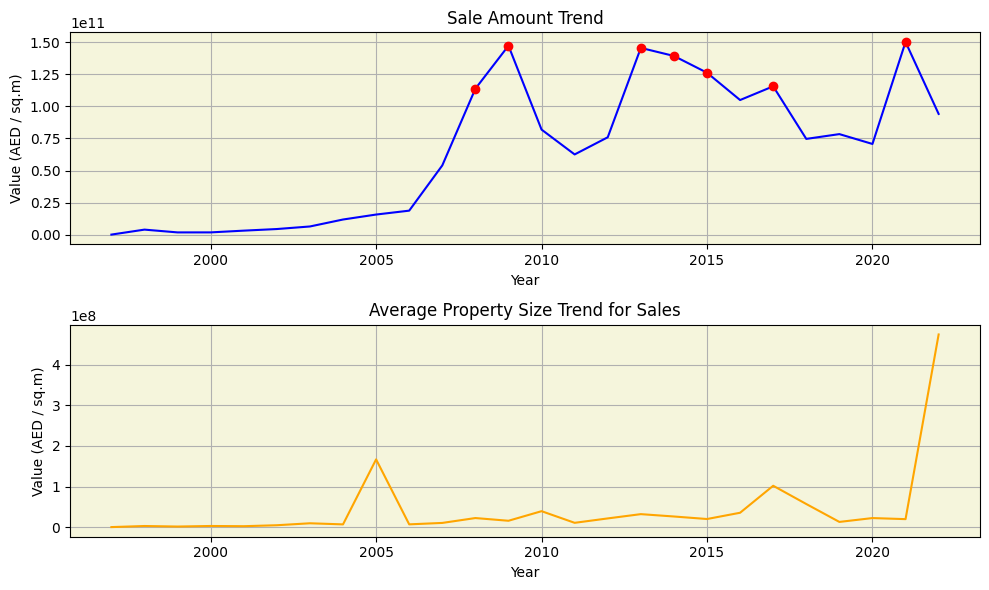

['📊 **Real Estate Sales Market Insights**',
 '\n🏡 **Property Sales Transactions**',
 '✔️ **Total sales transactions**: 706,096',
 '📅 **Data from 1997 to 2022**',
 '🏷 **Average sale price**: 65,525,892,272.90 AED',
 '💎 **Highest recorded sale price**: 150,128,206,178.27 AED',
 '📐 **Average property size**: 43,281,373.01 sq.m',
 '✅ **Freehold transactions**: 651,200',
 '📍 **Unique areas**: 348',
 '🏙 **Top area by transactions**: DUBAI MARINA',
 '📜 **Most common transaction type**: Sales',
 '📄 **Most common transaction sub-type**: Sale',
 '📝 **Most common registration type**: Ready',
 '🏠 **Most common usage**: Residential',
 '🏡 **Most common property type**: Unit']

In [51]:
sales_insights_df, yearly_sales_df = insights.extract_real_estate_sales_insights(
    sales_transactions_df, 
)

sales_insights_df

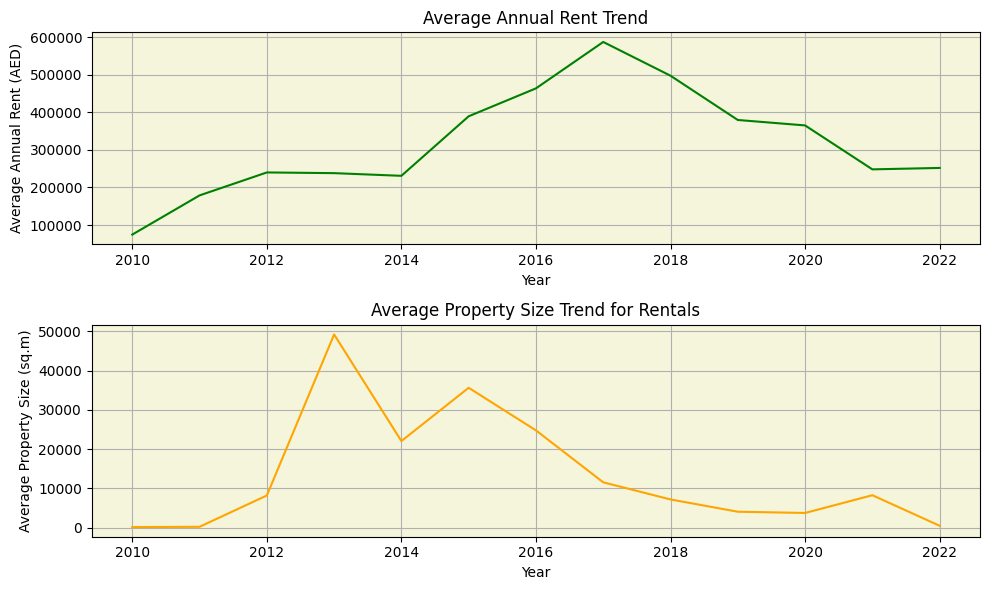

['📊 **Real Estate Rentals Market Insights**',
 '\n🏠 **Property Rental Transactions**',
 '✔️ **Total rental transactions**: 5,469,008',
 '📅 **Data from 2010 to 2022**',
 '🏠 **Average annual rent**: 318,897.66 AED',
 '💰 **Average contract rent**: 536,287.96 AED',
 '📐 **Average rental property size**: 13,484.75 sq.m',
 '✅ **Freehold rental transactions**: 2,161,511',
 '📈 **Annual Amount YoY Change (%)**: 1.52%',
 '📊 **Annual Amount 5-Year Change (%)**: -57.09%']

In [52]:
rentals_insights = insights.extract_real_estate_rentals_insights(
    property_rental_transactions_df, 
)

rentals_insights

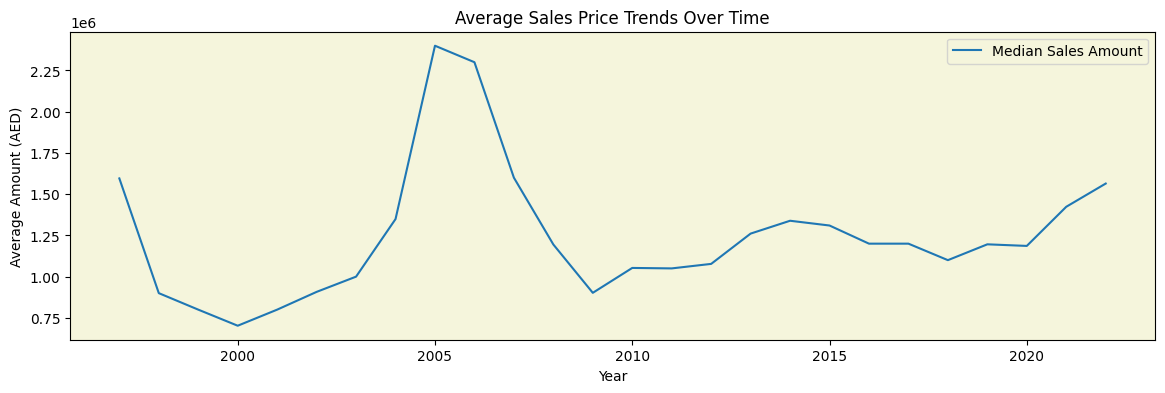

In [53]:

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(sales_trends, label='Median Sales Amount')
# plt.plot(rental_trends, label='Median Rental Amount')
plt.xlabel('Year')
plt.ylabel('Average Amount (AED)')
plt.title('Average Sales Price Trends Over Time')
plt.legend()
plt.show()


**Visualization 2: Spatial Distribution of Transactions**
- Objective: Identify high-activity areas for sales and rentals.
- Approach: Aggregate data by Area and visualize counts or sums.

In [54]:
# Count transactions by area
sales_area = sales_transactions_df['Area'].value_counts().head(10)
rental_area = property_rental_transactions_df['Area'].value_counts().head(10)

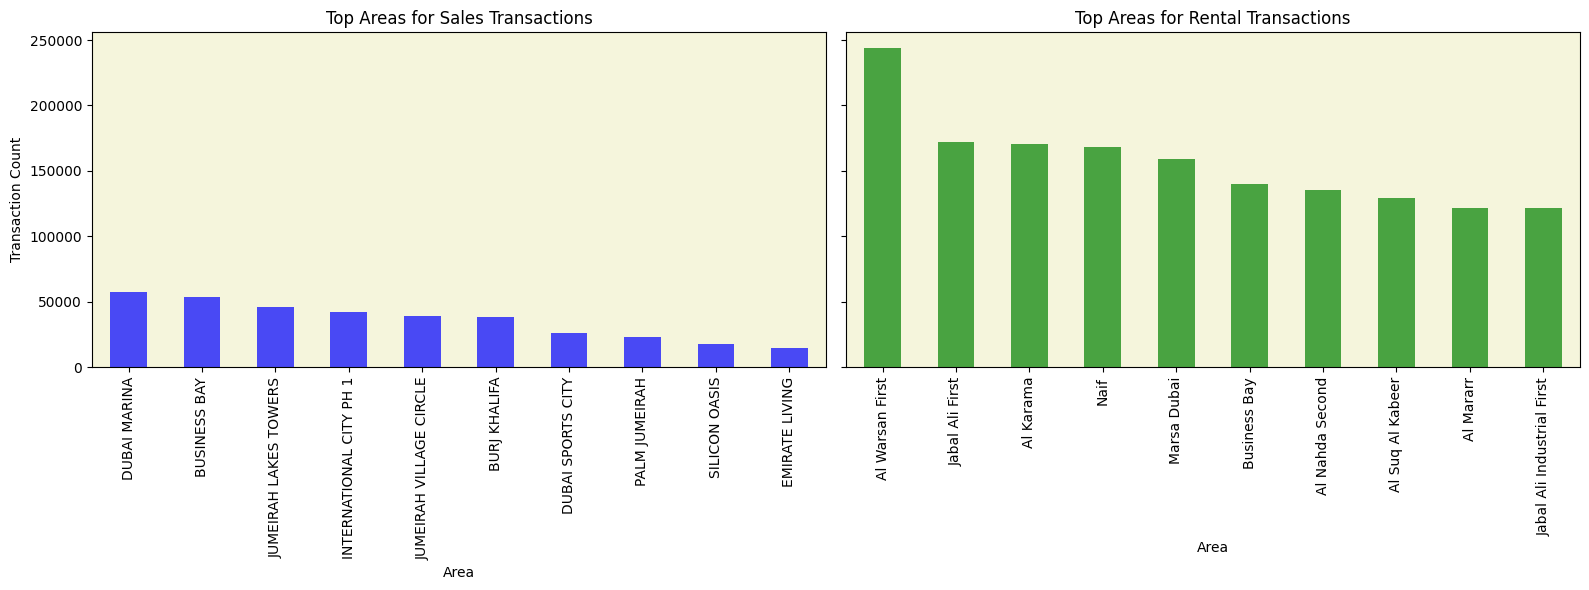

In [55]:
# Plot bar chart for top areas
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sales_area.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
rental_area.plot(kind='bar', ax=ax[1], color='green', alpha=0.7)

ax[0].set_title('Top Areas for Sales Transactions')
ax[1].set_title('Top Areas for Rental Transactions')
ax[0].set_ylabel('Transaction Count')
ax[0].set_xlabel('Area')
ax[1].set_xlabel('Area')
plt.tight_layout()
plt.show()


**Visualization 3: Price Distribution by Property Type**
- Objective: Explore price variation across different property types for both datasets.

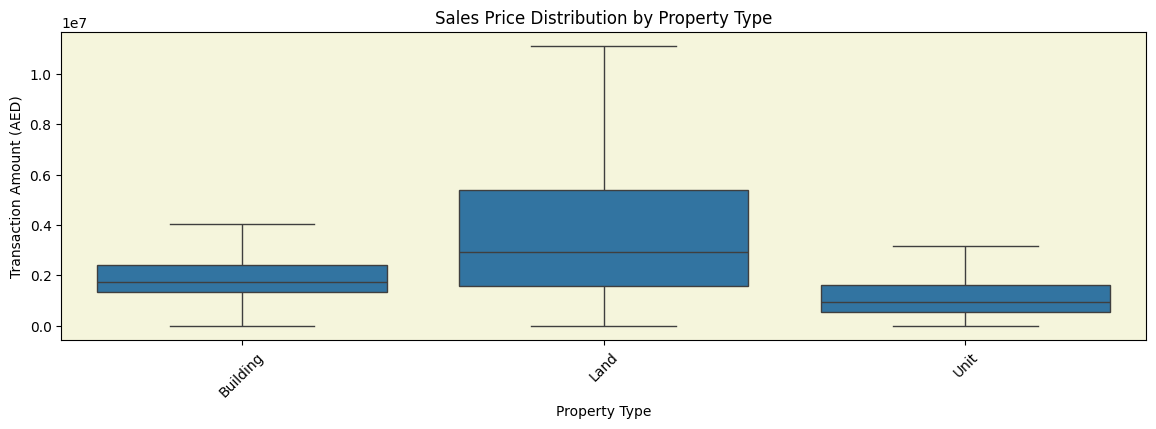

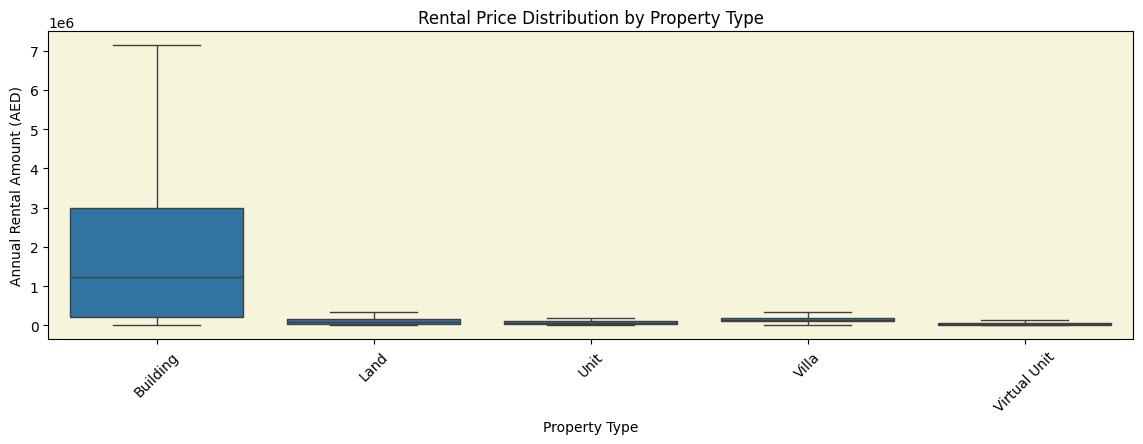

In [56]:
# Boxplots of prices by property type
plt.figure(figsize=(14, 4))
sns.boxplot(data=sales_transactions_df, x='Property Type', y='Amount', showfliers=False)
plt.title('Sales Price Distribution by Property Type')
plt.ylabel('Transaction Amount (AED)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 4))
sns.boxplot(data=property_rental_transactions_df, x='Property Type', y='Annual Amount', showfliers=False)
plt.title('Rental Price Distribution by Property Type')
plt.ylabel('Annual Rental Amount (AED)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()


**Visualization 4: Relationship Between Property Size and Price**
- Objective: Analyze the correlation between property size and price for sales and rentals

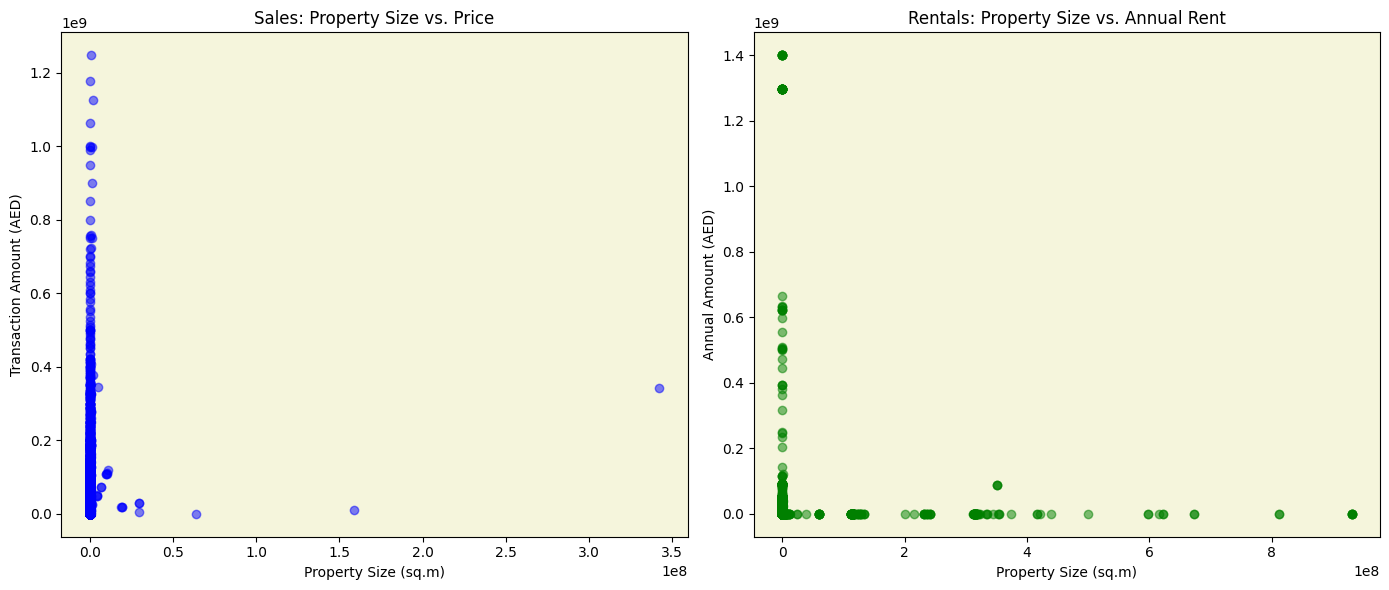

In [57]:
# Scatter plots for property size vs. price
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(sales_transactions_df['Property Size (sq.m)'], sales_transactions_df['Amount'], alpha=0.5, color='blue')
ax[0].set_title('Sales: Property Size vs. Price')
ax[0].set_xlabel('Property Size (sq.m)')
ax[0].set_ylabel('Transaction Amount (AED)')

ax[1].scatter(property_rental_transactions_df['Property Size (sq.m)'], property_rental_transactions_df['Annual Amount'], alpha=0.5, color='green')
ax[1].set_title('Rentals: Property Size vs. Annual Rent')
ax[1].set_xlabel('Property Size (sq.m)')
ax[1].set_ylabel('Annual Amount (AED)')

plt.tight_layout()
plt.show()


**Visualization 5: Temporal Trends in Transaction Volumes**
 - Objective: Compare the number of sales vs. rental transactions over time.

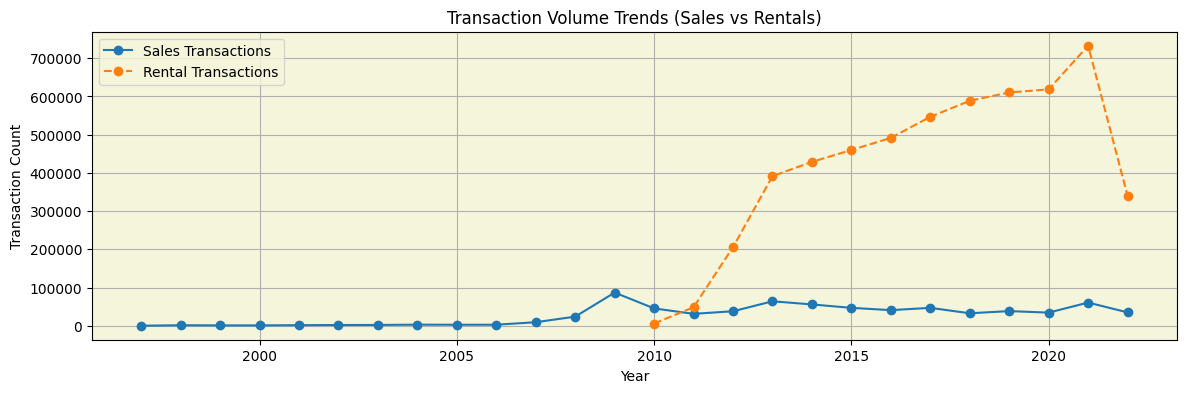

Year  Sales Transactions  Rental Transactions
0   1997                  56                  0.0
1   1998                1309                  0.0
2   1999                 899                  0.0
3   2000                 922                  0.0
4   2001                1440                  0.0
5   2002                1909                  0.0
6   2003                2071                  0.0
7   2004                2841                  0.0
8   2005                2596                  0.0
9   2006                2691                  0.0
10  2007                9222                  0.0
11  2008               23846                  0.0
12  2009               86781                  0.0
13  2010               45320               5789.0
14  2011               31173              48521.0
15  2012               37917             205752.0
16  2013               63979             391612.0
17  2014               55779             428760.0
18  2015               46787             459957.0
19  2016               40833             491588.0
20  2017               46803             546785.0
21  2018               32628             588515.0
22  2019               38301             610484.0
23  2020               34362             618544.0
24  2021               60648             732731.0
25  2022               34983             339970.0

In [58]:
# Count transactions per year
sales_volume = sales_transactions_df['Year'].value_counts().sort_index()
rental_volume = property_rental_transactions_df['Year'].value_counts().sort_index()

# pd.DataFrame(data=[sales_volume,rental_volume]).T
transaction_trends_df = pd.DataFrame({
    'Sales Transactions': sales_volume,
    'Rental Transactions': rental_volume
}).fillna(0)

transaction_trends_df.reset_index(inplace=True)
transaction_trends_df.rename(columns={'index': 'Year'}, inplace=True)

# Plot transaction counts
plt.figure(figsize=(14, 4))
plt.plot(sales_volume, label='Sales Transactions', marker='o')
plt.plot(rental_volume, label='Rental Transactions', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Volume Trends (Sales vs Rentals)')
plt.legend()
plt.grid()
plt.show()


transaction_trends_df


**Observations and Analysis**

1. **Transaction Growth Patterns**:
   - Early Years (1997–2009): Sales dominate, with significant growth starting in 2007, possibly driven by Dubai's property boom.
   - Rentals become visible in 2010, with steady and rapid growth through 2021, indicating increasing demand for rental properties.

2. **Peak and Decline**:
   - **Sales**: A notable peak occurs in 2009 (86,781 transactions), followed by a decline post-2014, possibly due to market saturation or regulatory impacts.
   - **Rentals**: Show consistent growth, peaking in 2021 with 710,876 transactions, reflecting a high demand for rentals post-pandemic.

3. **Post-2021 Trends**:
   - Both sales and rentals show a decline in 2022. Is this tied to economic policy changes or shifting buyer/renter preferences?

4. **Comparative Dominance**:
   - Sales led the market until 2010, after which rentals dominated, suggesting a major shift in market dynamics.

---


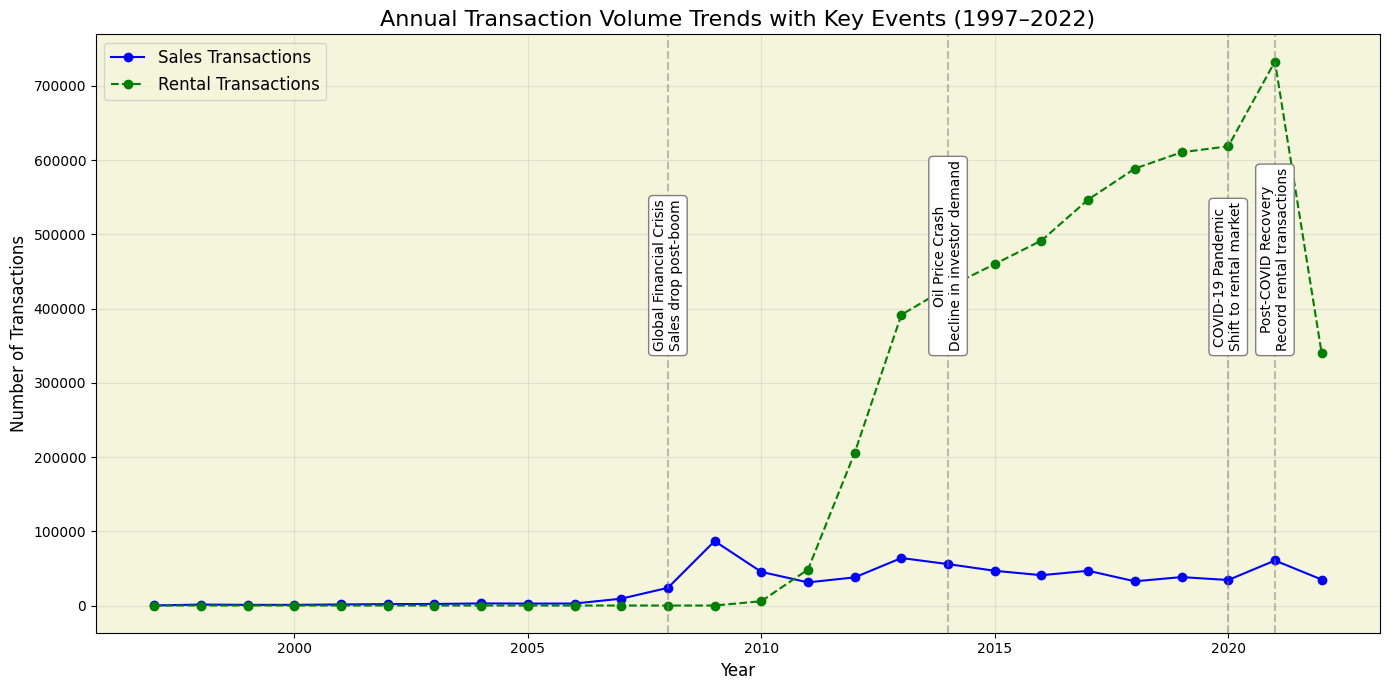

In [59]:
# Plot the trends for sales and rental transactions
plt.figure(figsize=(14, 7))

# Sales Transactions Trend
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Sales Transactions'], 
    label='Sales Transactions', marker='o', linestyle='-', color='blue'
)

# Rental Transactions Trend
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Rental Transactions'], 
    label='Rental Transactions', marker='o', linestyle='--', color='green'
)

# Annotate Key Historical Events
annotations = {
    2008: "Global Financial Crisis\nSales drop post-boom",
    2014: "Oil Price Crash\nDecline in investor demand",
    2020: "COVID-19 Pandemic\nShift to rental market",
    2021: "Post-COVID Recovery\nRecord rental transactions",
}

for year, text in annotations.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(
        x=year, 
        y=plt.ylim()[1] * 0.45, 
        s=text, 
        color='black', 
        fontsize=10, 
        rotation=90, 
        ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

# Add labels, title, and legend
plt.title('Annual Transaction Volume Trends with Key Events (1997–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Key Observations to Add

- 1997–2009: Sales dominated as Dubai emerged as a global real estate hub. The Global Financial Crisis in 2008 ended this boom, with sales dropping sharply.
- 2010–2021: Rentals gained traction, reflecting Dubai's evolving role as an expatriate-friendly city with a transient population.
- 2020–2021: COVID-19 disrupted the market, leading to temporary declines in sales and rental transactions. A post-pandemic recovery in 2021 saw record rental transactions.
- 2022 Decline: Both sales and rentals show a drop. Hypotheses include economic recalibration, regulatory changes, or a temporary market adjustment.

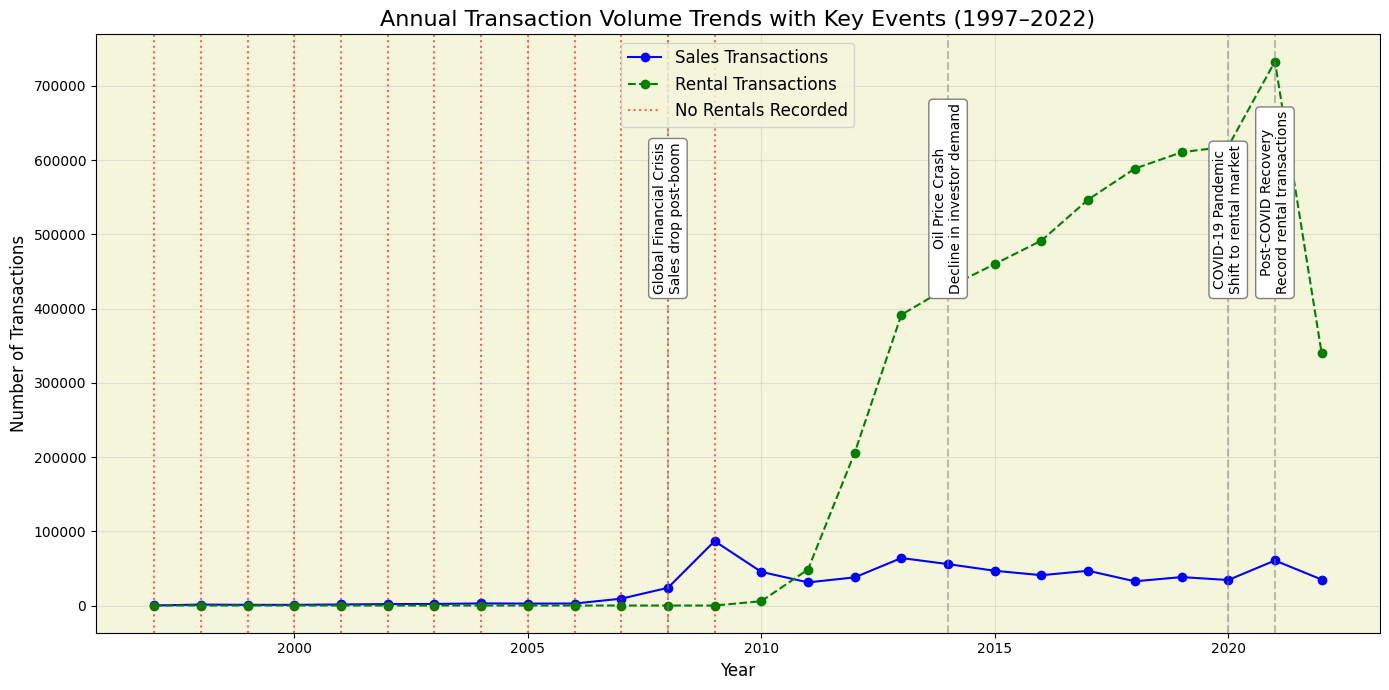

In [60]:
# Highlight years with zero rental data (1997–2009)
zero_rental_years = (transaction_trends_df['Rental Transactions'] == 0)

plt.figure(figsize=(14, 7))

# Plot Sales Transactions
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Sales Transactions'], 
    label='Sales Transactions', marker='o', linestyle='-', color='blue'
)

# Plot Rental Transactions
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Rental Transactions'], 
    label='Rental Transactions', marker='o', linestyle='--', color='green'
)

# Annotate years with zero rentals
for idx in transaction_trends_df[zero_rental_years].index:
    plt.axvline(
        x=transaction_trends_df.loc[idx, 'Year'], 
        color='red', 
        linestyle=':', 
        alpha=0.6, 
        label='No Rentals Recorded' if idx == 0 else ""
    )

# Add other annotations (as earlier)
annotations = {
    2008: "Global Financial Crisis\nSales drop post-boom",
    2014: "Oil Price Crash\nDecline in investor demand",
    2020: "COVID-19 Pandemic\nShift to rental market",
    2021: "Post-COVID Recovery\nRecord rental transactions",
}

for year, text in annotations.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(
        x=year, 
        y=plt.ylim()[1] * 0.55, 
        s=text, 
        color='black', 
        fontsize=10, 
        rotation=90, 
        ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

# Add title, labels, legend
plt.title('Annual Transaction Volume Trends with Key Events (1997–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Subcategory Analysis**
1. Rental Data by Property Type:

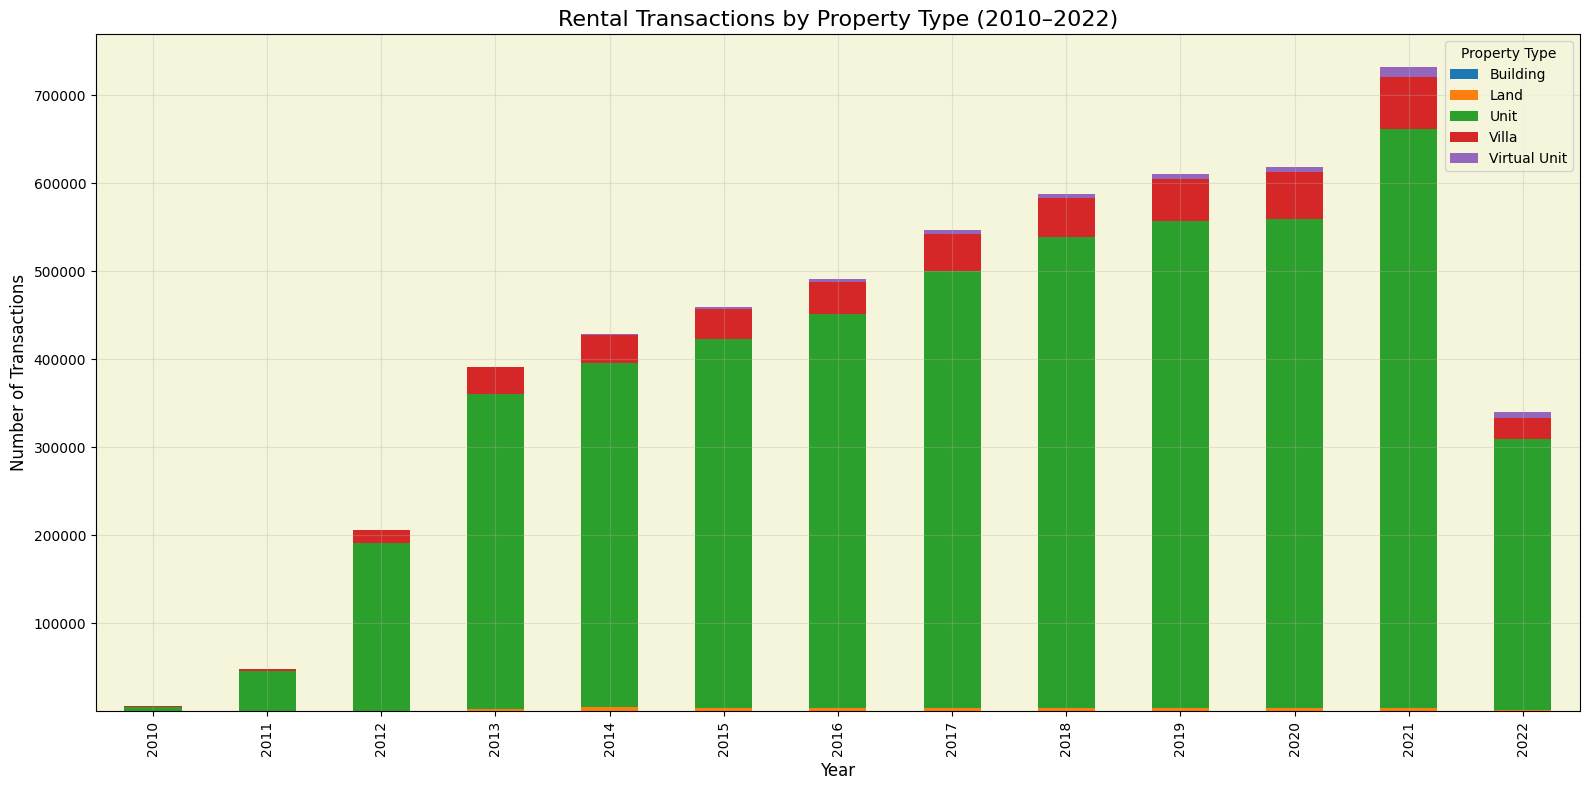

In [61]:
# Group by property type and year for rentals
rental_subcategories = (
    property_rental_transactions_df.groupby(['Year', 'Property Type'],observed=False)['Ejari Contract Number']
    .count()
    .unstack()
    .fillna(0)
)

rental_subcategories.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title("Rental Transactions by Property Type (2010–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title="Property Type", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


2. Sales Data by Freehold Type:

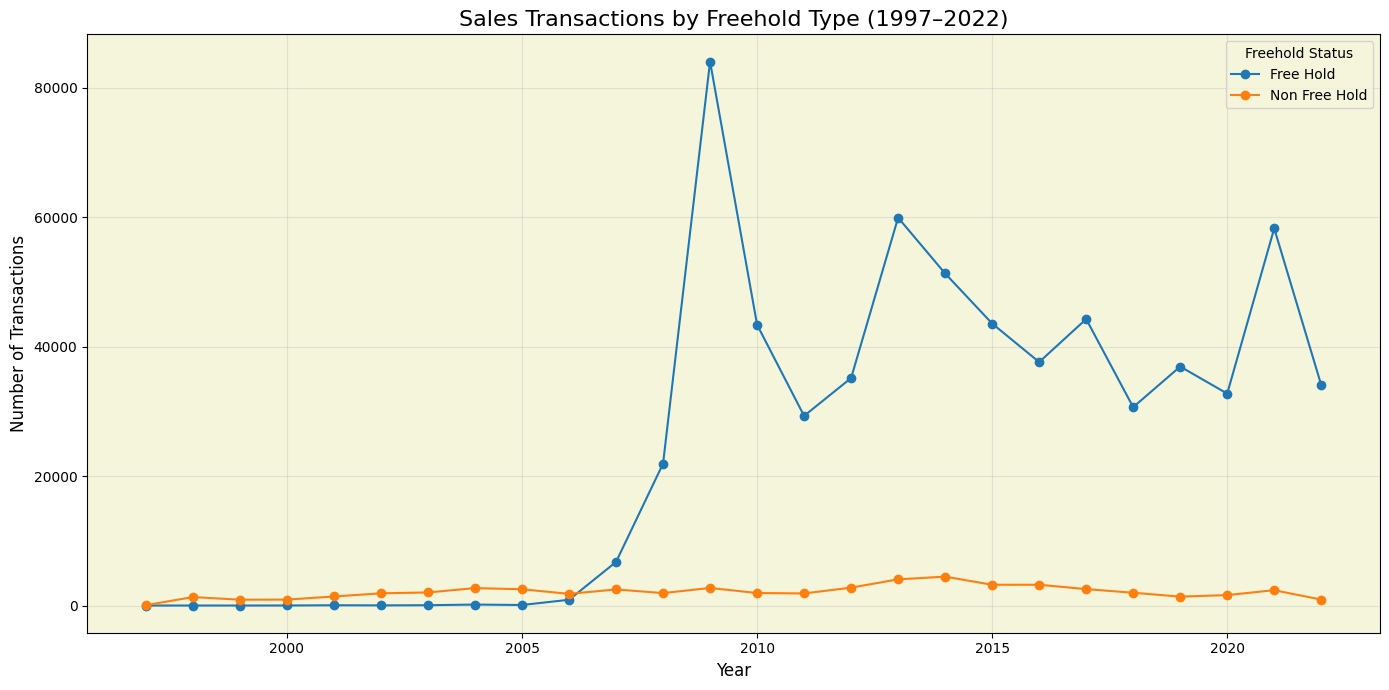

In [62]:
# Group by year and freehold status for sales
sales_freehold_analysis = (
    sales_transactions_df.groupby(['Year', 'Is Free Hold?'], observed=False)['Transaction Number']
    .count()
    .unstack()
    .fillna(0)
)

sales_freehold_analysis.plot(kind='line', figsize=(14, 7), marker='o')
plt.title("Sales Transactions by Freehold Type (1997–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title="Freehold Status", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 4. Micro-economics Factors Influence

**Integrating Macroeconomic Factors into the Analysis**  

We can leverage the additional datasets provided to analyze how macroeconomic factors (GDP, tourism, population, currency strength, etc.) influence Dubai's real estate market:  

---

**Steps for Analysis**  

**1. Data Preparation**  
- **Align Time Periods**: Ensure all datasets (macroeconomic indicators, sales, rentals) are aligned by year or quarter for consistent comparisons.  
- **Aggregate Transactions**: Summarize the sales and rental transaction data at the same time granularity (e.g., yearly, quarterly).  

**2. Feature Engineering**  
- **GDP Growth**: Calculate GDP growth rates (constant and current) to understand economic trends.  
- **Tourism Growth**: Use indicators like the number of visitors, average stay duration, and region-wise ratings.  
- **Population Growth**: Analyze population estimates to understand demand drivers.  
- **Currency Strength**: Assess AED exchange rate trends for insights into investor behavior.  
- **Energy Metrics**: Include oil prices (if available) as a proxy for broader economic conditions.  

**3. Visualization and Correlation Analysis**  
- **Trend Analysis**: Plot macroeconomic factors alongside real estate transactions to observe relationships.  
- **Correlation Matrix**: Compute correlations between macroeconomic factors and transaction volumes.  


---


#### 4a.  Summary Statistics Microeconomics Factors

- GDP Quarterly Constant Prices Summary Stats

In [63]:
gdp_quarterly_constant_df.head(2)

DATAFLOW REF_AREA FREQ UNIT_MEASURE SOURCE_DETAIL MEASURE  \
0  FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC     ELE   
1  FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC     ELE   

  QUARTER QGDP_SYS QGDP_UNIT  TIME_PERIOD    OBS_VALUE  DECIMALS  
0      Q1      CON       VAL         2012  6029.460989         0  
1      Q1      CON       VAL         2013  6516.431786         0

In [64]:
num_features = gdp_quarterly_constant_df.select_dtypes(include="number").columns
gdp_quarterly_constant_df[num_features]

TIME_PERIOD    OBS_VALUE  DECIMALS
0            2012  6029.460989         0
1            2013  6516.431786         0
2            2014  7282.519220         0
3            2015  5581.622819         0
4            2016  6507.318473         0
...           ...          ...       ...
1915         2019    -0.492972         1
1916         2020    -9.141739         1
1917         2021     3.444517         1
1918         2022     9.629000         1
1919         2023     8.430322         1

[1920 rows x 3 columns]

In [65]:
data_processor.compute_summary_statistics(gdp_quarterly_constant_df)



--- Summary Statistics ---
              count          mean           std          min          25%          50%          75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.00000    2024.0000
OBS_VALUE    1920.0  33871.691457  84704.603183   -50.998461     4.703341  1719.233685  19854.47116  449633.4527
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.00000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- GDP Quarterly Current Prices Summary Stats

In [66]:
gdp_quarterly_current_df.head(2)

DATAFLOW REF_AREA FREQ UNIT_MEASURE SOURCE_DETAIL MEASURE  \
0  FCSA:DF_QGDP_CUR(1.8.0)       AE    Q      PERCENT          FCSC     NFC   
1  FCSA:DF_QGDP_CUR(1.8.0)       AE    Q      PERCENT          FCSC     NFC   

  QUARTER QGDP_SYS  QGDP_UNIT  TIME_PERIOD  OBS_VALUE  DECIMALS  
0      Q3      CUR  GWTH_RATE         2013   4.355075         1  
1      Q3      CUR  GWTH_RATE         2014   4.394883         1

In [67]:
data_processor.compute_summary_statistics(gdp_quarterly_current_df)


--- Summary Statistics ---
              count          mean           std          min          25%          50%           75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.000000    2024.0000
OBS_VALUE    1920.0  35877.089588  89844.504067   -66.978072     5.387548  2087.586568  21518.734995  506021.1521
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.000000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- Tourism Indicators Summary Stats

In [68]:

tourism_indicators_df.head(2)

DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_HOT_INDICATOR(4.3.0)       H          AED       AE    A     _Z   
1  FCSA:DF_HOT_INDICATOR(4.3.0)       H          AED       AE    A     _Z   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0          RR           _Z          FCSC         1985   318484.0  
1          RR           _Z          FCSC         1986   298504.0

In [69]:
data_processor.compute_summary_statistics(tourism_indicators_df)


--- Summary Statistics ---
             count          mean           std     min       25%        50%         75%           max
TIME_PERIOD  201.0  2.004488e+03  1.292482e+01  1976.0    1993.0     2003.0      2017.0  2.022000e+03
OBS_VALUE    201.0  3.037453e+09  7.852964e+09     2.0  298504.0  2108739.0  73854531.0  3.780222e+10

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


In [70]:
tourism_indicators_df.head(2)

DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_HOT_INDICATOR(4.3.0)       H          AED       AE    A     _Z   
1  FCSA:DF_HOT_INDICATOR(4.3.0)       H          AED       AE    A     _Z   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0          RR           _Z          FCSC         1985   318484.0  
1          RR           _Z          FCSC         1986   298504.0

- Tourism Regions Summary Stats

In [71]:
tourism_regions_df.head(2)

DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_GUEST_REGION(4.3.0)       H       NUMBER       AE    A     _Z   
1  FCSA:DF_GUEST_REGION(4.3.0)       H       NUMBER       AE    A     _Z   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0         GHH           OC          FCSC         2015     399751  
1         GHH           OC          FCSC         2016     380717

In [72]:
data_processor.compute_summary_statistics(tourism_regions_df)


--- Summary Statistics ---
             count          mean           std     min       25%       50%        75%         max
TIME_PERIOD  664.0  2.001488e+03  1.312832e+01  1979.0    1990.0    2000.5     2014.0      2022.0
OBS_VALUE    664.0  3.906856e+06  9.996992e+06  1628.0  221386.5  835121.0  3155793.0  91461979.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Tourism Ratings Summary Stats

In [73]:
tourism_ratings_df.head(2)

DATAFLOW MEASURE UNIT_MEASURE REF_AREA FREQ H_TYPE  \
0  FCSA:DF_HOT_TYPE(4.3.0)       H       NUMBER       AE    A     _T   
1  FCSA:DF_HOT_TYPE(4.3.0)       H       NUMBER       AE    A     _T   

  H_INDICATOR GUEST_REGION SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  
0         EST           _Z          FCSC         2014       1027  
1         EST           _Z          FCSC         2015       1056

In [74]:
data_processor.compute_summary_statistics(tourism_ratings_df)


--- Summary Statistics ---
             count      mean           std     min      25%     50%      75%       max
TIME_PERIOD  400.0   2001.28     14.737183  1975.0  1988.00  2001.0   2016.0    2022.0
OBS_VALUE    400.0  14942.34  34407.242885     3.0   106.75   468.0  10305.5  203948.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Estimates Summary Stats

In [75]:
data_processor.compute_summary_statistics(pop_estimates_df)


--- Summary Statistics ---
             count          mean           std      min       25%        50%        75%         max
TIME_PERIOD  162.0  1.996500e+03  1.563411e+01   1970.0    1983.0     1996.5     2010.0      2023.0
OBS_VALUE    162.0  2.646262e+06  2.594193e+06  86318.0  745767.0  1704024.5  3543425.0  10678556.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Indicators Summary Stats

In [76]:
pop_indicators_df.head(2)

DATAFLOW MEASURE POP_IND UNIT_MEASURE REF_AREA FREQ GENDER  \
0  FCSA:DF_POP_IND(2.7.0)  POPIND     MED        YEARS       AE    A     _Z   
1  FCSA:DF_POP_IND(2.7.0)  POPIND     MED        YEARS       AE    A     _Z   

  SOURCE_DETAIL  TIME_PERIOD  OBS_VALUE  DECIMALS  
0          FCSC         2019       31.3         1  
1          FCSC         2020       32.8         1

In [77]:
data_processor.compute_summary_statistics(pop_indicators_df)


--- Summary Statistics ---
             count         mean        std       min       25%      50%       75%     max
TIME_PERIOD   18.0  2019.611111   0.501631  2019.000  2019.000  2020.00  2020.000  2020.0
OBS_VALUE     18.0    67.997056  66.254497     2.057    20.885    33.15    81.025   229.9
DECIMALS      18.0     1.000000   0.000000     1.000     1.000     1.00     1.000     1.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


In [78]:
gdp_quarterly_current_df[['TIME_PERIOD','OBS_VALUE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  1920 non-null   int64  
 1   OBS_VALUE    1920 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.1 KB


In [79]:
transaction_trends_df.head(2)

Year  Sales Transactions  Rental Transactions
0  1997                  56                  0.0
1  1998                1309                  0.0

In [80]:
# Aggregate transactions data to yearly
transaction_trends_df

Year  Sales Transactions  Rental Transactions
0   1997                  56                  0.0
1   1998                1309                  0.0
2   1999                 899                  0.0
3   2000                 922                  0.0
4   2001                1440                  0.0
5   2002                1909                  0.0
6   2003                2071                  0.0
7   2004                2841                  0.0
8   2005                2596                  0.0
9   2006                2691                  0.0
10  2007                9222                  0.0
11  2008               23846                  0.0
12  2009               86781                  0.0
13  2010               45320               5789.0
14  2011               31173              48521.0
15  2012               37917             205752.0
16  2013               63979             391612.0
17  2014               55779             428760.0
18  2015               46787             459957.0
19  2016               40833             491588.0
20  2017               46803             546785.0
21  2018               32628             588515.0
22  2019               38301             610484.0
23  2020               34362             618544.0
24  2021               60648             732731.0
25  2022               34983             339970.0

In [81]:
print("gdp_quarterly_constant_df shape:", gdp_quarterly_constant_df.shape)
print("gdp_quarterly_current_df shape:", gdp_quarterly_current_df.shape)
print("tourism_indicators shape:", tourism_indicators_df.shape)
print("tourism_regions_df shape:", tourism_regions_df.shape)
print("tourism_ratings_df shape:", tourism_ratings_df.shape)
print("pop_estimates_df shape", pop_estimates_df.shape )
print("pop_indicators_df shape", pop_indicators_df.shape)
print("currency_strength_df shape:",currency_strength_df.shape)

print("cpi_annual_df shape:",cpi_annual_df.shape)
print("cpi_monthly_df shape:",cpi_monthly_df.shape)
print("cpi_quarterly_df shape:",cpi_quarterly_df.shape)



gdp_quarterly_constant_df shape: (1920, 12)
gdp_quarterly_current_df shape: (1920, 12)
tourism_indicators shape: (201, 11)
tourism_regions_df shape: (664, 11)
tourism_ratings_df shape: (400, 11)
pop_estimates_df shape (162, 10)
pop_indicators_df shape (18, 11)
currency_strength_df shape: (5468, 8)
cpi_annual_df shape: (369, 10)
cpi_monthly_df shape: (7361, 10)
cpi_quarterly_df shape: (112, 10)


- take columns with more data for the merge: cpi_monthly_df, currency_strength_df, gdp_quarterly_constant_df,gdp_quarterly_current_df 
- still add others

In [82]:
pop_estimates_df['GENDER'].unique()

array(['M', 'F', '_T'], dtype=object)

In [83]:
# Filter data for male and female populations
male_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == 'M']
female_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == 'F']
other_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == '_T']


In [84]:
currency_strength_df['Date'].describe()

count           5468
unique          5468
top       2003-12-01
freq               1
Name: Date, dtype: object

In [85]:
gdp_quarterly_constant_df

DATAFLOW REF_AREA FREQ UNIT_MEASURE SOURCE_DETAIL  \
0     FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC   
1     FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC   
2     FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC   
3     FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC   
4     FCSA:DF_QGDP_CON(1.8.0)       AE    Q       MILAED          FCSC   
...                       ...      ...  ...          ...           ...   
1915  FCSA:DF_QGDP_CON(1.8.0)       AE    Q      PERCENT          FCSC   
1916  FCSA:DF_QGDP_CON(1.8.0)       AE    Q      PERCENT          FCSC   
1917  FCSA:DF_QGDP_CON(1.8.0)       AE    Q      PERCENT          FCSC   
1918  FCSA:DF_QGDP_CON(1.8.0)       AE    Q      PERCENT          FCSC   
1919  FCSA:DF_QGDP_CON(1.8.0)       AE    Q      PERCENT          FCSC   

     MEASURE QUARTER QGDP_SYS  QGDP_UNIT  TIME_PERIOD    OBS_VALUE  DECIMALS  
0        ELE      Q1      CON        VAL         2012  6029.460989         0  
1        ELE      Q1      CON        VAL         2013  6516.431786         0  
2        ELE      Q1      CON        VAL         2014  7282.519220         0  
3        ELE      Q1      CON        VAL         2015  5581.622819         0  
4        ELE      Q1      CON        VAL         2016  6507.318473         0  
...      ...     ...      ...        ...          ...          ...       ...  
1915     CON      Q4      CON  GWTH_RATE         2019    -0.492972         1  
1916     CON      Q4      CON  GWTH_RATE         2020    -9.141739         1  
1917     CON      Q4      CON  GWTH_RATE         2021     3.444517         1  
1918     CON      Q4      CON  GWTH_RATE         2022     9.629000         1  
1919     CON      Q4      CON  GWTH_RATE         2023     8.430322         1  

[1920 rows x 12 columns]

In [86]:
(    gdp_quarterly_constant_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()  # Average quarterly data to get annual GDP
    .reset_index()
    .rename(columns={'OBS_VALUE': 'avg_GDP_constant'})
)

TIME_PERIOD  avg_GDP_constant
0          2012      52873.511891
1          2013      27721.548677
2          2014      28945.216829
3          2015      30860.308918
4          2016      32561.222469
5          2017      33056.235473
6          2018      33470.174053
7          2019      33936.833999
8          2020      32106.181949
9          2021      33684.281616
10         2022      36247.259483
11         2023      37656.444679
12         2024      39555.666789

In [87]:
avg_gdp_constant_growth = (
    gdp_quarterly_constant_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()  # Average quarterly data to get annual GDP
    .reset_index()
    .rename(columns={'OBS_VALUE': 'avg_GDP_constant'})
)
avg_gdp_current_growth = (
    gdp_quarterly_current_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()
    .reset_index()
    .rename(columns={'OBS_VALUE': 'avg_GDP_current'})
)

In [88]:
print(pop_estimates_df.TIME_PERIOD.to_list())

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [89]:
pop_estimates_df.TIME_PERIOD = pd.to_datetime(pop_estimates_df.TIME_PERIOD, format='%Y')

In [90]:
# pop_estimates_df.info()

In [91]:
total_population_df = (
    pop_estimates_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .sum()  # Sum for total population
    .reset_index()
    .rename(columns={'OBS_VALUE': 'total_population'})
)

total_male_pop_by_year = (
male_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_female'})
)

total_female_pop_by_year = (
female_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_male'})
)

total_other_pop_by_year = (
other_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_others'})
)


In [92]:
pop_estimates_df[['TIME_PERIOD','OBS_VALUE']].describe()

TIME_PERIOD     OBS_VALUE
count                  162  1.620000e+02
mean   1996-07-02 00:00:00  2.646262e+06
min    1970-01-01 00:00:00  8.631800e+04
25%    1983-01-01 00:00:00  7.457670e+05
50%    1996-07-02 00:00:00  1.704024e+06
75%    2010-01-01 00:00:00  3.543425e+06
max    2023-01-01 00:00:00  1.067856e+07
std                    NaN  2.594193e+06

In [93]:
total_tourism_regions_df = (
    tourism_regions_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .sum()  # Aggregate total tourism indicators
    .reset_index()
    .rename(columns={'OBS_VALUE': 'total_tourism_guests'})
)

In [94]:
currency_strength_df['Date'] = pd.to_datetime(currency_strength_df['Date'])
# currency_strength_df.info()

In [95]:
currency_strength_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       5468 non-null   float64       
 1   High       5468 non-null   float64       
 2   Low        5468 non-null   float64       
 3   Close      5468 non-null   float64       
 4   Adj Close  5468 non-null   float64       
 5   Volume     5468 non-null   int64         
 6   Date       5468 non-null   datetime64[ns]
 7   Return     5467 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 341.9 KB


In [96]:
avg_currency_strength_df = (
    currency_strength_df.groupby(currency_strength_df['Date'].dt.year)['Close']
    .mean()  # Average exchange rate per year
    .reset_index()
    .rename(columns={'Close': 'avg_currency_strength', 'Date': 'Year_Currency'})
)

In [97]:
# currency_strength_df.info()

In [98]:
cpi_monthly_df.head(2)

DATAFLOW     MEASURE UNIT_MEASURE REF_AREA FREQ CPI_DIV  \
0  FCSA:DF_CPI(3.2.0)  CPI_ANNCHG      PERCENT       AE    M     FUR   
1  FCSA:DF_CPI(3.2.0)  CPI_ANNCHG      PERCENT       AE    M     FUR   

  SOURCE_DETAIL TIME_PERIOD  OBS_VALUE  DECIMALS  
0          FCSA     2009-01       7.25         2  
1          FCSA     2009-02       3.87         2

In [99]:
avg_monthly_cpi_df = (
    cpi_monthly_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()  # Aggregate mean cpi
    .reset_index()
    .rename(columns={'OBS_VALUE': 'avg_monthly_cpi'})
)

In [100]:
avg_monthly_cpi_df['TIME_PERIOD'] = pd.to_datetime(avg_monthly_cpi_df['TIME_PERIOD'])
# avg_monthly_cpi_df.info()

In [101]:
avg_gdp_constant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIME_PERIOD       13 non-null     int64  
 1   avg_GDP_constant  13 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes


In [102]:
avg_monthly_cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIME_PERIOD      199 non-null    datetime64[ns]
 1   avg_monthly_cpi  199 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [103]:
avg_gdp_current_growth.TIME_PERIOD = pd.to_datetime(avg_gdp_current_growth.TIME_PERIOD, format='%Y')
avg_gdp_constant_growth.TIME_PERIOD = pd.to_datetime(avg_gdp_constant_growth.TIME_PERIOD, format='%Y')
total_population_df.TIME_PERIOD = pd.to_datetime(total_population_df.TIME_PERIOD, format='%Y')
total_male_pop_by_year.TIME_PERIOD = pd.to_datetime(total_male_pop_by_year.TIME_PERIOD, format='%Y')
total_female_pop_by_year.TIME_PERIOD = pd.to_datetime(total_female_pop_by_year.TIME_PERIOD, format='%Y')
total_other_pop_by_year.TIME_PERIOD = pd.to_datetime(total_other_pop_by_year.TIME_PERIOD, format='%Y')
total_tourism_regions_df.TIME_PERIOD = pd.to_datetime(total_tourism_regions_df.TIME_PERIOD, format='%Y')
avg_monthly_cpi_df.TIME_PERIOD = pd.to_datetime(avg_monthly_cpi_df.TIME_PERIOD, format='%Y')
avg_currency_strength_df.Year_Currency   = pd.to_datetime(avg_currency_strength_df.Year_Currency, format='%Y')

print(avg_gdp_constant_growth['TIME_PERIOD'].dtypes)
print(avg_gdp_current_growth['TIME_PERIOD'].dtypes)

datetime64[ns]
datetime64[ns]


In [104]:
avg_monthly_cpi_df

TIME_PERIOD  avg_monthly_cpi
0    2008-01-01        86.311538
1    2008-02-01        43.630000
2    2008-03-01        43.731538
3    2008-04-01        45.093462
4    2008-05-01        44.730000
..          ...              ...
194  2024-03-01        36.009101
195  2024-04-01        36.367100
196  2024-05-01        36.251490
197  2024-06-01        36.582650
198  2024-07-01        36.519571

[199 rows x 2 columns]

In [105]:
aggregated_macro_df = (
    avg_gdp_constant_growth.merge(avg_gdp_current_growth, on='TIME_PERIOD', how='outer')
    .merge(total_population_df, on='TIME_PERIOD', how='outer')
    .merge(total_male_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(total_female_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(total_other_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(total_tourism_regions_df, on='TIME_PERIOD', how='outer')
    .merge(avg_monthly_cpi_df, on='TIME_PERIOD', how='outer')
    .merge(avg_currency_strength_df, left_on='TIME_PERIOD', right_on='Year_Currency', how='outer')
    .rename(columns={'TIME_PERIOD': 'Year'})
)


In [106]:
aggregated_macro_df.columns

Index(['Year', 'avg_GDP_constant', 'avg_GDP_current', 'total_population',
       'total_population_female', 'total_population_male',
       'total_population_others', 'total_tourism_guests', 'avg_monthly_cpi',
       'Year_Currency', 'avg_currency_strength'],
      dtype='object')

In [107]:
# Fill missing values using forward fill, interpolation, and backfill where appropriate.
aggregated_macro_df['avg_GDP_constant'] = aggregated_macro_df['avg_GDP_constant'].fillna(method='ffill')
aggregated_macro_df['avg_GDP_current'] = aggregated_macro_df['avg_GDP_current'].fillna(method='ffill')
aggregated_macro_df['total_population'] = aggregated_macro_df['total_population'].interpolate(method='linear')
aggregated_macro_df['total_population_others'] = aggregated_macro_df['total_population_others'].interpolate(method='linear')
aggregated_macro_df['total_population_male'] = aggregated_macro_df['total_population_male'].interpolate(method='linear')
aggregated_macro_df['total_population_female'] = aggregated_macro_df['total_population_female'].interpolate(method='linear')
aggregated_macro_df['total_tourism_guests'] = aggregated_macro_df['total_tourism_guests'].fillna(method='ffill').fillna(method='bfill')
aggregated_macro_df['avg_currency_strength'] = aggregated_macro_df['avg_currency_strength'].fillna(method='ffill').fillna(method='bfill')
aggregated_macro_df['avg_monthly_cpi'] = aggregated_macro_df['avg_monthly_cpi'].fillna(method='ffill').fillna(method='bfill')


In [108]:
# Subset data for correlation analysis
correlation_subset = aggregated_macro_df[[
    'avg_GDP_constant', 'avg_GDP_current', 'total_population','total_population_male','avg_monthly_cpi',
    'total_population_female','total_population_others', 'total_tourism_guests', 'avg_currency_strength'
]].dropna()

# Compute correlation matrix
macro_corr_matrix = correlation_subset.corr()

print('Correlation Matrix:')
macro_corr_matrix


Correlation Matrix:


avg_GDP_constant  avg_GDP_current  total_population  \
avg_GDP_constant                 1.000000         0.969927         -0.196598   
avg_GDP_current                  0.969927         1.000000         -0.209500   
total_population                -0.196598        -0.209500          1.000000   
total_population_male           -0.219781        -0.234361          0.998003   
avg_monthly_cpi                 -0.006483         0.002236          0.103033   
total_population_female         -0.184030        -0.196024          0.999443   
total_population_others         -0.196598        -0.209500          1.000000   
total_tourism_guests            -0.368474        -0.379428          0.150950   
avg_currency_strength           -0.195114        -0.196667         -0.633537   

                         total_population_male  avg_monthly_cpi  \
avg_GDP_constant                     -0.219781        -0.006483   
avg_GDP_current                      -0.234361         0.002236   
total_population                      0.998003         0.103033   
total_population_male                 1.000000         0.103617   
avg_monthly_cpi                       0.103617         1.000000   
total_population_female               0.995339         0.102559   
total_population_others               0.998003         0.103033   
total_tourism_guests                  0.176451         0.037330   
avg_currency_strength                -0.628502        -0.033780   

                         total_population_female  total_population_others  \
avg_GDP_constant                       -0.184030                -0.196598   
avg_GDP_current                        -0.196024                -0.209500   
total_population                        0.999443                 1.000000   
total_population_male                   0.995339                 0.998003   
avg_monthly_cpi                         0.102559                 0.103033   
total_population_female                 1.000000                 0.999443   
total_population_others                 0.999443                 1.000000   
total_tourism_guests                    0.137231                 0.150950   
avg_currency_strength                  -0.635176                -0.633537   

                         total_tourism_guests  avg_currency_strength  
avg_GDP_constant                    -0.368474              -0.195114  
avg_GDP_current                     -0.379428              -0.196667  
total_population                     0.150950              -0.633537  
total_population_male                0.176451              -0.628502  
avg_monthly_cpi                      0.037330              -0.033780  
total_population_female              0.137231              -0.635176  
total_population_others              0.150950              -0.633537  
total_tourism_guests                 1.000000               0.046785  
avg_currency_strength                0.046785               1.000000

In [109]:
# Derive new features
aggregated_macro_df['avg_GDP_per_capita'] = aggregated_macro_df['avg_GDP_constant'] / aggregated_macro_df['total_population']
aggregated_macro_df['total_tourism_revenue_per_capita'] = aggregated_macro_df['total_tourism_guests'] / aggregated_macro_df['total_population']
aggregated_macro_df['total_population_growth_rate'] = aggregated_macro_df['total_population'].pct_change()
aggregated_macro_df['total_tourism_growth_rate'] = aggregated_macro_df['total_tourism_guests'].pct_change()

# Replace infinite and NaN values resulting from division
aggregated_macro_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
aggregated_macro_df.fillna(0, inplace=True)


In [110]:
print("aggregated_macro_df shape:", aggregated_macro_df.shape)
aggregated_macro_df.head(2)

aggregated_macro_df shape: (237, 15)


Year  avg_GDP_constant  avg_GDP_current  total_population  \
0 2012-01-01      52873.511891     62054.574318        15078614.0   
1 2013-01-01      27721.548677     32356.549209        15693510.0   

   total_population_female  total_population_male  total_population_others  \
0                4937649.0              2601658.0                7539307.0   
1                5129965.0              2716790.0                7846755.0   

   total_tourism_guests  avg_monthly_cpi        Year_Currency  \
0            94935056.0        32.605897  2012-01-01 00:00:00   
1           150029216.0        33.341795  2013-01-01 00:00:00   

   avg_currency_strength  avg_GDP_per_capita  \
0               0.272322            0.003507   
1               0.272327            0.001766   

   total_tourism_revenue_per_capita  total_population_growth_rate  \
0                          6.296007                      0.000000   
1                          9.559953                      0.040779   

   total_tourism_growth_rate  
0                   0.000000  
1                   0.580335

In [111]:
print("missingingness:", aggregated_macro_df.isnull().mean().sum())
print("duplicated:",aggregated_macro_df.duplicated().sum())
aggregated_macro_df[aggregated_macro_df.index.duplicated()]

missingingness: 0.0
duplicated: 0


Empty DataFrame
Columns: [Year, avg_GDP_constant, avg_GDP_current, total_population, total_population_female, total_population_male, total_population_others, total_tourism_guests, avg_monthly_cpi, Year_Currency, avg_currency_strength, avg_GDP_per_capita, total_tourism_revenue_per_capita, total_population_growth_rate, total_tourism_growth_rate]
Index: []

In [112]:
aggregated_macro_df.drop(columns='Year_Currency', inplace=True)
# aggregated_macro_df

In [113]:
# transaction_trends_df.info()

In [114]:
transaction_trends_df.Year = pd.to_datetime(transaction_trends_df.Year, format='%Y')


In [115]:
# aggregated_macro_df # merge this with another dataset (un_imputed dataset)

- This merge is **only for this analysis that involves EDA**
- For Modeling we'll go with `macro + sales` and `macro + rentals`, separately 

In [116]:
# Perform the merge
merged_macro_transactions_df = pd.merge(
    transaction_trends_df,
    aggregated_macro_df,
    how='left',
    on='Year'
)



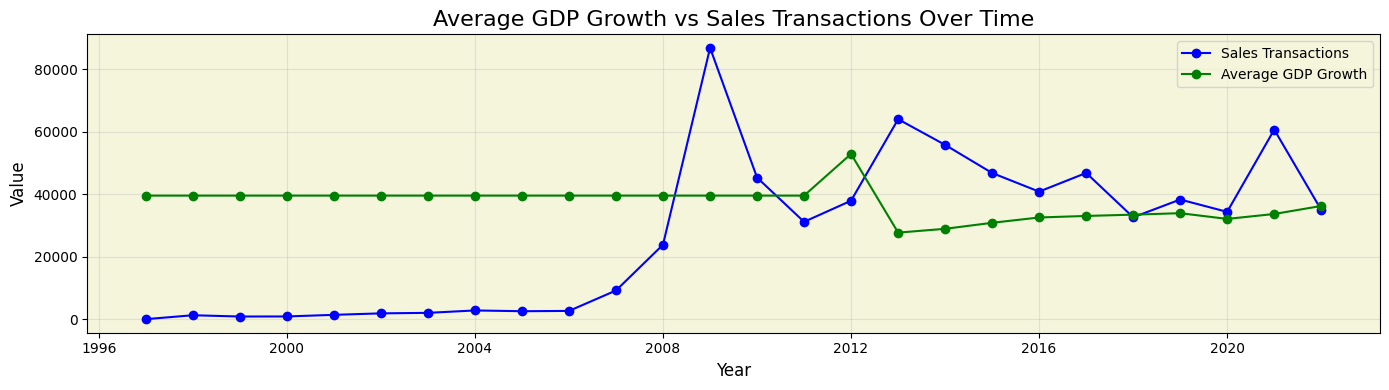

In [117]:

# Plot trends
plt.figure(figsize=(14, 4))
plt.plot(merged_macro_transactions_df['Year'], merged_macro_transactions_df['Sales Transactions'], label='Sales Transactions', color='blue', marker='o')
plt.plot(merged_macro_transactions_df['Year'], merged_macro_transactions_df['avg_GDP_constant'], label='Average GDP Growth', color='green', marker='o')

# Add labels and legend
plt.title('Average GDP Growth vs Sales Transactions Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [344]:
merged_macro_transactions_df.corr()

Year  Sales Transactions  \
Year                              1.000000            0.724817   
Sales Transactions                0.724817            1.000000   
Rental Transactions               0.866604            0.595755   
avg_GDP_constant                 -0.510844           -0.437926   
avg_GDP_current                  -0.566298           -0.417770   
total_population                  0.989740            0.776470   
total_population_female           0.989047            0.779111   
total_population_male             0.986646            0.768899   
total_population_others           0.989740            0.776470   
total_tourism_guests              0.924224            0.627486   
avg_monthly_cpi                   0.257991           -0.018334   
avg_currency_strength            -0.334388           -0.151345   
avg_GDP_per_capita               -0.948030           -0.790872   
total_tourism_revenue_per_capita  0.856470            0.547245   
total_population_growth_rate     -0.401322           -0.359915   
total_tourism_growth_rate        -0.000355            0.198348   

                                  Rental Transactions  avg_GDP_constant  \
Year                                         0.866604         -0.510844   
Sales Transactions                           0.595755         -0.437926   
Rental Transactions                          1.000000         -0.663204   
avg_GDP_constant                            -0.663204          1.000000   
avg_GDP_current                             -0.736267          0.964382   
total_population                             0.854366         -0.512422   
total_population_female                      0.839143         -0.504696   
total_population_male                        0.875322         -0.522722   
total_population_others                      0.854366         -0.512422   
total_tourism_guests                         0.920549         -0.631834   
avg_monthly_cpi                              0.030644         -0.009754   
avg_currency_strength                       -0.405771          0.189879   
avg_GDP_per_capita                          -0.760087          0.551837   
total_tourism_revenue_per_capita             0.902137         -0.669050   
total_population_growth_rate                -0.512894          0.148271   
total_tourism_growth_rate                   -0.023353         -0.177410   

                                  avg_GDP_current  total_population  \
Year                                    -0.566298          0.989740   
Sales Transactions                      -0.417770          0.776470   
Rental Transactions                     -0.736267          0.854366   
avg_GDP_constant                         0.964382         -0.512422   
avg_GDP_current                          1.000000         -0.561743   
total_population                        -0.561743          1.000000   
total_population_female                 -0.553073          0.998993   
total_population_male                   -0.573359          0.997370   
total_population_others                 -0.561743          1.000000   
total_tourism_guests                    -0.666423          0.925324   
avg_monthly_cpi                          0.020986          0.248489   
avg_currency_strength                    0.214704         -0.327128   
avg_GDP_per_capita                       0.573864         -0.958761   
total_tourism_revenue_per_capita        -0.685377          0.852288   
total_population_growth_rate             0.219457         -0.397017   
total_tourism_growth_rate               -0.022908          0.012657   

                                  total_population_female  \
Year                                             0.989047   
Sales Transactions                               0.779111   
Rental Transactions                              0.839143   
avg_GDP_constant                                -0.504696   
avg_GDP_current                                 -0.553073   
total_population                                 0.998993   
tota

In [ ]:
# Subset data for correlation analysis
correlation_subset = aggregated_macro_df[[
    'avg_GDP_constant', 'avg_GDP_current', 'total_population','total_population_male','avg_monthly_cpi',
    'total_population_female','total_population_others', 'total_tourism_guests', 'avg_currency_strength'
]].dropna()

# Compute correlation matrix
macro_corr_matrix = correlation_subset.corr()

print('Correlation Matrix:')
macro_corr_matrix

In [119]:


# visualizations.plot_trends_secondary_cols_with_two_y_axes(
#     df=merged_macro_transactions_df,
#     x_column='Year',
#     y1_column='Sales Transactions',
#     y2_column='GDP_constant',
#     y3_column='tourism_guests',
#     y4_column='Population_growth_rate',
#     title='Sales Transactions, GDP Growth vs Tourism Revenue, Total Population Over Time',
#     y1_label='Sales Transactions',
#     y2_label='GDP Growth',
#     y3_label='Tourism Revenue',
#     y4_label='Population Growth Rate'
# )


In [120]:
merged_macro_transactions_df.head(2)

Year  Sales Transactions  Rental Transactions  avg_GDP_constant  \
0 1997-01-01                  56                  0.0      39555.666789   
1 1998-01-01                1309                  0.0      39555.666789   

   avg_GDP_current  total_population  total_population_female  \
0     44201.158943         5457460.0                1823941.0   
1     44201.158943         5691510.0                1912678.0   

   total_population_male  total_population_others  total_tourism_guests  \
0               904789.0                2728730.0            18970378.0   
1               933077.0                2845755.0            21949904.0   

   avg_monthly_cpi  avg_currency_strength  avg_GDP_per_capita  \
0        36.098777               0.272326            0.007248   
1        36.098777               0.272326            0.006950   

   total_tourism_revenue_per_capita  total_population_growth_rate  \
0                          3.476045                      0.045094   
1                          3.856605                      0.042886   

   total_tourism_growth_rate  
0                  -0.009493  
1                   0.157062

`Let's see another workings of the sales_transactions_df`

In [121]:
sales_transactions_df.Year = pd.to_datetime(sales_transactions_df.Year, format='%Y')

sales_transactions_df['Year'].info()
# sales_transactions_df.columns

<class 'pandas.core.series.Series'>
Index: 706096 entries, 3 to 995969
Series name: Year
Non-Null Count   Dtype         
--------------   -----         
706096 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.8 MB


In [122]:

sales_analysis_df=sales_transactions_df.set_index('Year')

# # Resample the data yearly and sum the 'actual_worth' column
df_yearly_sum = sales_analysis_df['Amount'].resample('Y').sum()

# reset the index to convert to df
df_yearly_sum = df_yearly_sum.reset_index()



df_yearly_sum['Growth Rate'] = df_yearly_sum['Amount'].pct_change() * 100
df_yearly_sum['Year'] = df_yearly_sum['Year'].dt.year

df_yearly_sum

Year        Amount  Growth Rate
0   1997  1.815603e+08          NaN
1   1998  4.050433e+09  2130.902348
2   1999  1.884364e+09   -53.477477
3   2000  1.896583e+09     0.648447
4   2001  3.253801e+09    71.561264
5   2002  4.505002e+09    38.453506
6   2003  6.500550e+09    44.296273
7   2004  1.191766e+10    83.333060
8   2005  1.578435e+10    32.445103
9   2006  1.881408e+10    19.194486
10  2007  5.401809e+10   187.115229
11  2008  1.137345e+11   110.548959
12  2009  1.472154e+11    29.437730
13  2010  8.191169e+10   -44.359289
14  2011  6.257476e+10   -23.607044
15  2012  7.593597e+10    21.352398
16  2013  1.455038e+11    91.613847
17  2014  1.392381e+11    -4.306227
18  2015  1.261833e+11    -9.375880
19  2016  1.049273e+11   -16.845350
20  2017  1.156019e+11    10.173366
21  2018  7.466816e+10   -35.409245
22  2019  7.839810e+10     4.995361
23  2020  7.073320e+10    -9.776901
24  2021  1.501282e+11   112.245751
25  2022  9.411226e+10   -37.312071

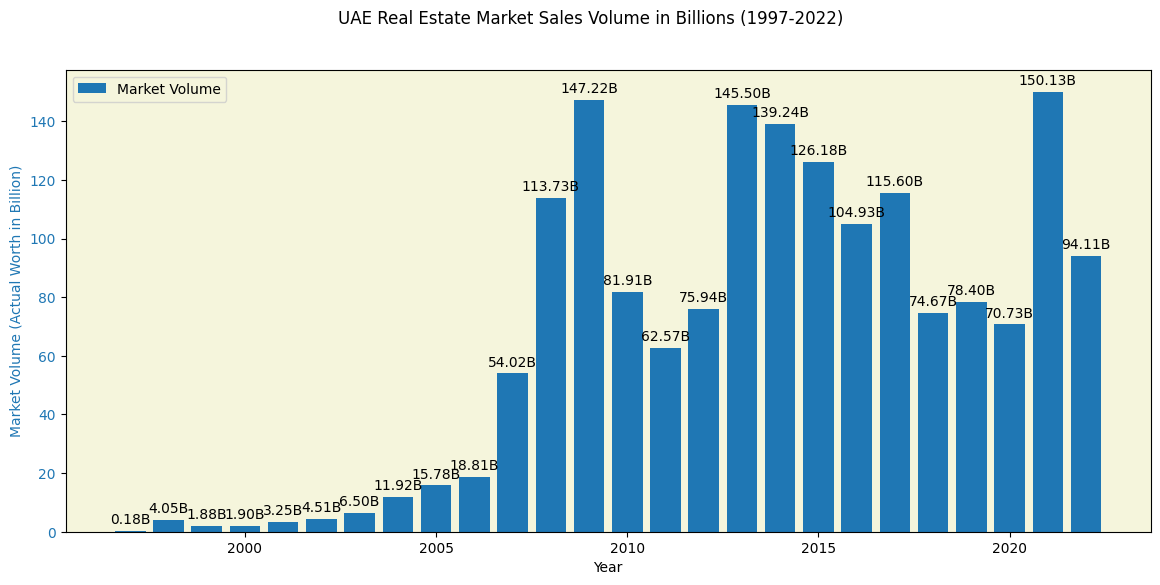

In [123]:

df_yearly_sum['Actual Worth Billion'] = df_yearly_sum['Amount'] / 1e9  # Convert to billions

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotting Actual Worth as Bar Chart
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Volume (Actual Worth in Billion)', color=color)
# width = 1.25       # the width of the bars: can also be len(x) sequence
bars = ax1.bar(df_yearly_sum['Year'], df_yearly_sum['Actual Worth Billion'], color=color, alpha=1, label='Market Volume')
ax1.tick_params(axis='y', labelcolor=color)


# Annotate bars with Actual Worth values
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}B',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

    
# # Add titles and legends
fig.suptitle('UAE Real Estate Market Sales Volume in Billions (1997-2022)')
ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')


# # Show plot
plt.show()

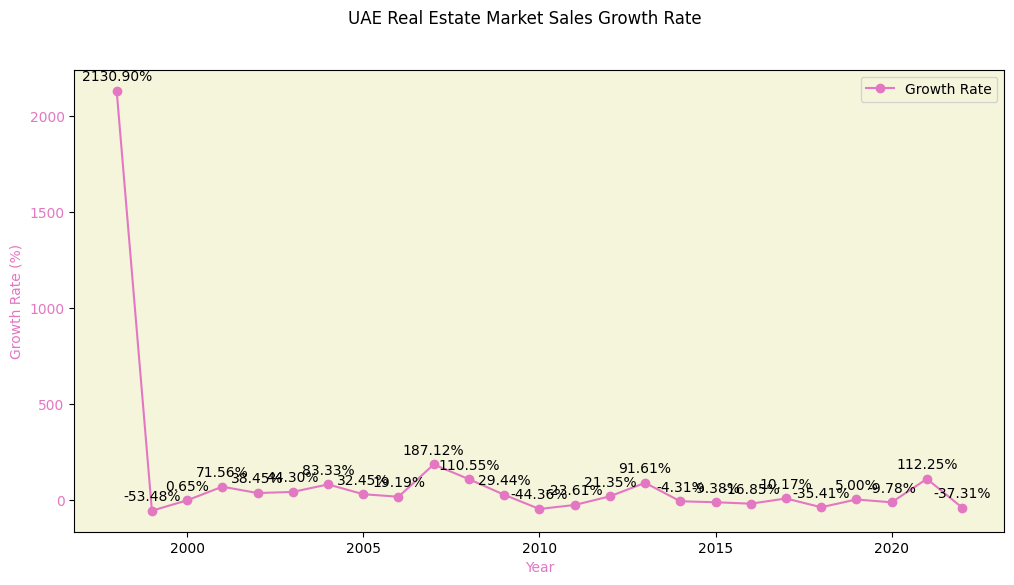

In [124]:
# df_yearly_sum['Actual Worth Billion'] = df_yearly_sum['actual_worth'] / 1e9  # Convert to billions

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1
color = 'tab:pink'
ax2.set_ylabel('Growth Rate (%)', color=color)
ax2.set_xlabel('Year', color=color)
line = ax2.plot(df_yearly_sum['Year'], df_yearly_sum['Growth Rate'], color=color, marker='o', label='Growth Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate line with Growth Rate values
for x, y in zip(df_yearly_sum['Year'], df_yearly_sum['Growth Rate']):
    ax2.annotate(f'{y:.2f}%',
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

# Important Figure
    
# # Add titles and legends
fig.suptitle('UAE Real Estate Market Sales Growth Rate')
# ax2.legend(loc='upper left')
ax2.legend(loc='upper right')

# # Show plot
plt.show()

- 2130.9% is a serious outlier that needs investigation

In [125]:
df_yearly_sum.head(2)

Year        Amount  Growth Rate  Actual Worth Billion
0  1997  1.815603e+08          NaN              0.181560
1  1998  4.050433e+09  2130.902348              4.050433

In [126]:
property_rental_transactions_df['Usage'].unique()

['Industrial', 'Residential', 'Educational facility', NaN, 'Commercial', ..., 'Tourist origin', 'Storage', 'Agriculture', 'Industrial / Commercial', 'Residential / Commercial']
Length: 11
Categories (10, object): ['Agriculture', 'Commercial', 'Educational facility', 'Health Facility', ..., 'Residential', 'Residential / Commercial', 'Storage', 'Tourist origin']

In [127]:
# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum2 = sales_analysis_df.groupby(['Year', 'Usage'])['Amount'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table1 = df_yearly_sum2.pivot(index='Year', columns='Usage', values='Amount')

pivot_table1 = pivot_table1.reset_index()
# pivot_table1 = pivot_table1.drop(columns = ['Residential', 'Commercial'])
# pivot_table1['actual_worth'] = df_yearly_sum['actual_worth']
pivot_table1.head(2)

Usage       Year    Commercial   Residential
0     1997-01-01  1.227449e+08  5.881537e+07
1     1998-01-01  2.668496e+09  1.381937e+09

In [128]:
pivot_table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         26 non-null     datetime64[ns]
 1   Commercial   26 non-null     float64       
 2   Residential  26 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 752.0 bytes


In [129]:
# Plot stacked bar graph
# pivot_table1.plot(kind='bar', stacked=True, figsize=(12, 6))

# # Add title and labels
# plt.title('Investment by Sector for 1997 to 2022')
# plt.xlabel('Year')
# plt.ylabel('Investment In Billion')

In [130]:


# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum3 = sales_analysis_df.groupby(['Year', 'Property Type'])['Amount'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table3 = df_yearly_sum3.pivot(index='Year', columns='Property Type', values='Amount')

pivot_table3 = pivot_table3.reset_index()
pivot_table3

Property Type       Year      Building          Land          Unit
0             1997-01-01  0.000000e+00  1.815603e+08  0.000000e+00
1             1998-01-01  0.000000e+00  4.050433e+09  0.000000e+00
2             1999-01-01  0.000000e+00  1.884364e+09  0.000000e+00
3             2000-01-01  0.000000e+00  1.896583e+09  0.000000e+00
4             2001-01-01  0.000000e+00  3.253801e+09  0.000000e+00
5             2002-01-01  0.000000e+00  4.505002e+09  0.000000e+00
6             2003-01-01  0.000000e+00  6.500550e+09  0.000000e+00
7             2004-01-01  0.000000e+00  1.187040e+10  4.725370e+07
8             2005-01-01  0.000000e+00  1.574143e+10  4.292905e+07
9             2006-01-01  0.000000e+00  1.872333e+10  9.075083e+07
10            2007-01-01  1.967154e+09  4.962860e+10  2.422330e+09
11            2008-01-01  6.332140e+09  9.390465e+10  1.349773e+10
12            2009-01-01  6.339392e+09  3.673346e+10  1.041425e+11
13            2010-01-01  6.014193e+09  2.077368e+10  5.512382e+10
14            2011-01-01  4.201252e+09  2.299105e+10  3.538246e+10
15            2012-01-01  3.182650e+09  3.259872e+10  4.015460e+10
16            2013-01-01  9.568108e+09  6.154910e+10  7.438663e+10
17            2014-01-01  8.220400e+09  6.715690e+10  6.386081e+10
18            2015-01-01  7.009839e+09  7.242467e+10  4.674881e+10
19            2016-01-01  6.856499e+09  5.849267e+10  3.957812e+10
20            2017-01-01  9.740267e+09  6.072288e+10  4.513878e+10
21            2018-01-01  5.630582e+09  3.767815e+10  3.135943e+10
22            2019-01-01  9.741502e+09  2.901775e+10  3.963886e+10
23            2020-01-01  8.057021e+09  3.138154e+10  3.129464e+10
24            2021-01-01  1.829918e+10  6.364772e+10  6.818130e+10
25            2022-01-01  8.218834e+09  4.122819e+10  4.466524e+10

<Figure size 1200x800 with 0 Axes>

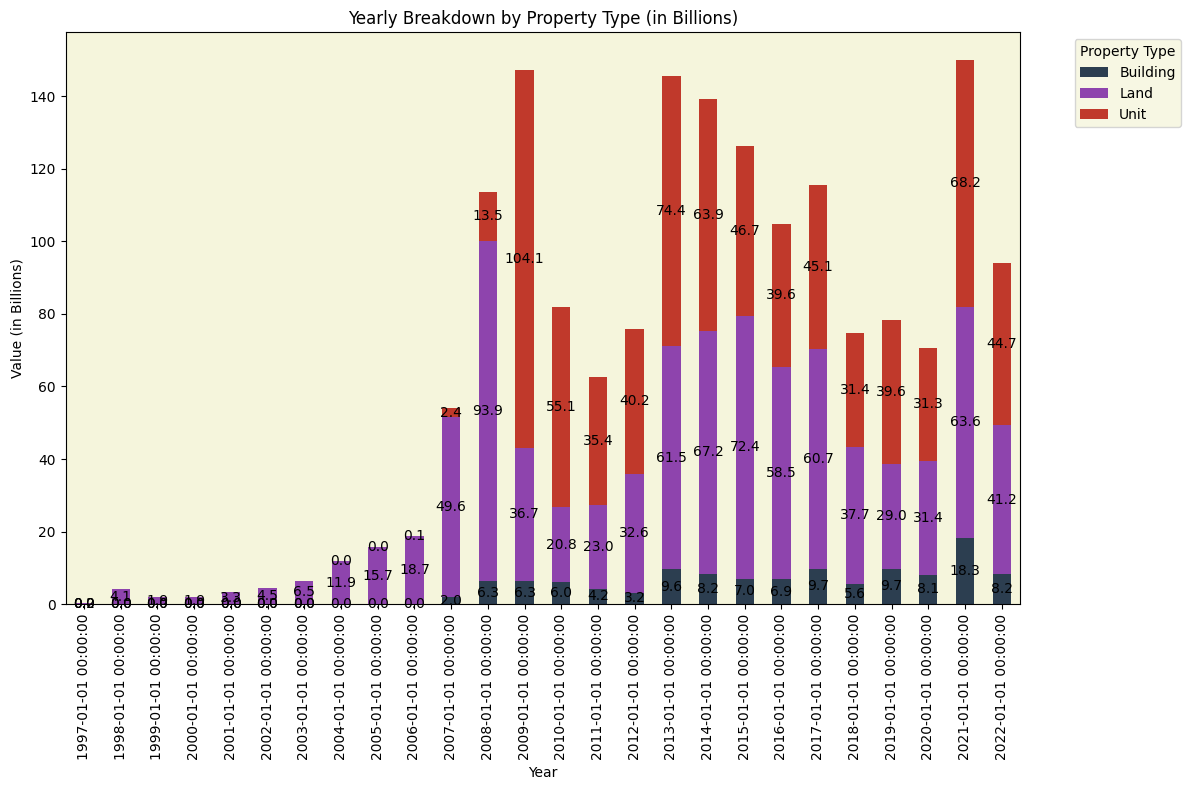

In [131]:
import matplotlib.pyplot as plt

# Convert actual_worth values to billions
pivot_table3.iloc[:, 1:] = pivot_table3.iloc[:, 1:].div(1e9)

# Plot stacked bar graph
plt.figure(figsize=(12, 8))
ax = pivot_table3.set_index('Year').plot(kind='bar', stacked=True, color=['#2c3e50', '#8e44ad', '#c0392b', '#d35400'], figsize=(12, 8))

# Customize plot
plt.title('Yearly Breakdown by Property Type (in Billions)')
plt.xlabel('Year')
plt.ylabel('Value (in Billions)')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10)

# Show plot
plt.show()


In [132]:
sales_analysis_df['Transaction sub type'].unique()

['Sale', 'Sell - Pre registration', 'Sell Development', 'Delayed Sell', 'Development Registration', ..., 'Sale On Payment Plan', 'Lease Development Registration', 'Delayed Lease to Own Registration', 'Lease to Own Registration Pre-Registration', 'Portfolio Development Registration']
Length: 18
Categories (49, object): ['Adding Land By Sell', 'Delayed Development', 'Delayed Lease to Own Modify', 'Delayed Lease to Own Registration', ..., 'Sell - Pre registration', 'Sell Development', 'Sell Development - Pre Registration', 'Transfer Development Mortgage']

In [133]:


# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum4 = sales_analysis_df.groupby(['Year', 'Transaction Type'])['Amount'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table4 = df_yearly_sum4.pivot(index='Year', columns='Transaction Type', values='Amount')

pivot_table4 = pivot_table4.reset_index()
pivot_table4.head(2)

Transaction Type       Year  Gifts  Mortgage         Sales
0                1997-01-01    0.0       0.0  1.815603e+08
1                1998-01-01    0.0       0.0  4.050433e+09

<Figure size 1200x800 with 0 Axes>

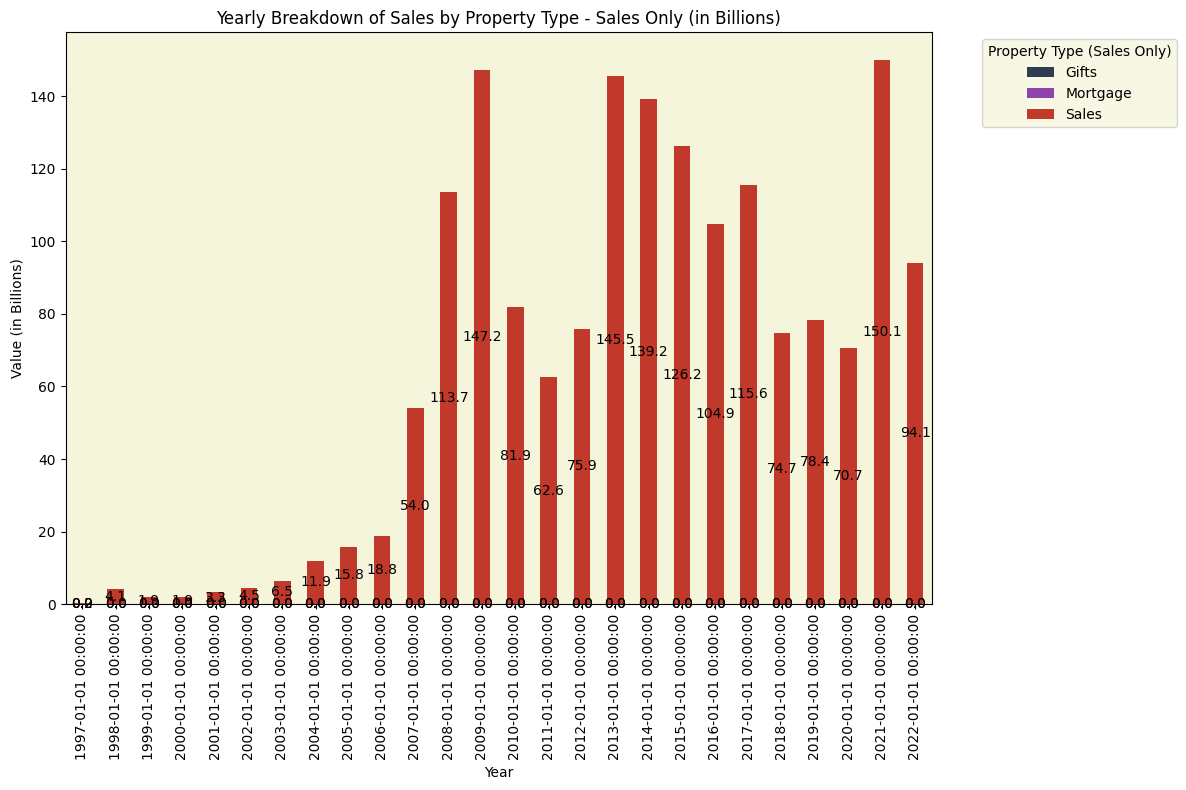

In [134]:

# Convert actual_worth values to billions
pivot_table4.iloc[:, 1:] = pivot_table4.iloc[:, 1:].div(1e9)

# Plot stacked bar graph
plt.figure(figsize=(12, 8))
ax = pivot_table4.set_index('Year').plot(kind='bar', stacked=True, color=['#2c3e50', '#8e44ad', '#c0392b'], figsize=(12, 8))

# Customize plot
plt.title('Yearly Breakdown of Sales by Property Type - Sales Only (in Billions)')
plt.xlabel('Year')
plt.ylabel('Value (in Billions)')
plt.legend(title='Property Type (Sales Only)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10)

# Show plot
plt.show()

In [135]:
sales_analysis_df['Transaction sub type']

Year
2022-01-01                       Sale
2022-01-01                       Sale
2022-01-01    Sell - Pre registration
2022-01-01    Sell - Pre registration
2022-01-01                       Sale
                       ...           
1997-01-01                       Sale
1997-01-01                       Sale
1997-01-01                       Sale
1997-01-01                       Sale
1997-01-01                       Sale
Name: Transaction sub type, Length: 706096, dtype: category
Categories (49, object): ['Adding Land By Sell', 'Delayed Development', 'Delayed Lease to Own Modify', 'Delayed Lease to Own Registration', ..., 'Sell - Pre registration', 'Sell Development', 'Sell Development - Pre Registration', 'Transfer Development Mortgage']

In [136]:


# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum44 = sales_analysis_df.groupby(['Year', 'Transaction sub type'])['Amount'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table44 = df_yearly_sum44.pivot(index='Year', columns='Transaction sub type', values='Amount')

pivot_table44 = pivot_table44.reset_index()
pivot_table44.head(2)

Transaction sub type       Year  Adding Land By Sell  Delayed Development  \
0                    1997-01-01                  0.0                  0.0   
1                    1998-01-01                  0.0                  0.0   

Transaction sub type  Delayed Lease to Own Modify  \
0                                             0.0   
1                                             0.0   

Transaction sub type  Delayed Lease to Own Registration  \
0                                                   0.0   
1                                                   0.0   

Transaction sub type  Delayed Lease to Own Transfer  Delayed Mortgage  \
0                                               0.0               0.0   
1                                               0.0               0.0   

Transaction sub type  Delayed Portfolio Mortgage  Delayed Sell  \
0                                            0.0           0.0   
1                                            0.0           0.0   

Transaction sub type  Delayed Sell Development  ...  \
0                                          0.0  ...   
1                                          0.0  ...   

Transaction sub type  Portfolio Mortgage Modification  \
0                                                 0.0   
1                                                 0.0   

Transaction sub type  Portfolio Mortgage Modification Pre-Registration  \
0                                                                  0.0   
1                                                                  0.0   

Transaction sub type  Portfolio Mortgage Registration  \
0                                                 0.0   
1                                                 0.0   

Transaction sub type  Portfolio Mortgage Registration Pre-Registration  \
0                                                                  0.0   
1                                                                  0.0   

Transaction sub type          Sale  Sale On Payment Plan  \
0                     1.815603e+08                   0.0   
1                     4.050433e+09                   0.0   

Transaction sub type  Sell - Pre registration  Sell Development  \
0                                         0.0               0.0   
1                                         0.0               0.0   

Transaction sub type  Sell Development - Pre Registration  \
0                                                     0.0   
1                                                     0.0   

Transaction sub type  Transfer Development Mortgage  
0                                               0.0  
1                                               0.0  

[2 rows x 50 columns]

In [137]:

# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum5 = sales_analysis_df.groupby(['Year', 'Area'])['Amount'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table5 = df_yearly_sum5.pivot(index='Year', columns='Area', values='Amount')

pivot_table5 = pivot_table5.reset_index()
list(pivot_table5.columns)
print(list(pivot_table5.columns))


['Year', 'AKOYA OXYGEN', 'AL BARARI', 'AL FURJAN', 'AL HABTOOR POLO', 'AL KHAIL GATE', 'AL KHAIL HEIGHTS', 'AL WAHA', 'ARABIAN RANCHES I', 'ARABIAN RANCHES II', 'ARABIAN RANCHES III', 'ARABIAN RANCHES POLO CLUB', 'ARJAN', 'ASMARAN', 'Abu Hail', 'Al Asbaq', 'Al Aweer First', 'Al Aweer Second', 'Al Bada', 'Al Baharna', 'Al Baraha', 'Al Barsha', 'Al Barsha First', 'Al Barsha Second', 'Al Barsha South Fifth', 'Al Barsha South Fourth', 'Al Barsha Third', 'Al Barshaa South First', 'Al Barshaa South Second', 'Al Barshaa South Third', 'Al Buteen', 'Al Dhagaya', 'Al Eyas', 'Al Fahidi', 'Al Garhoud', 'Al Goze First', 'Al Goze Fourth', 'Al Goze Industrial First', 'Al Goze Industrial Fourth', 'Al Goze Industrial Second', 'Al Goze Industrial Third', 'Al Goze Second', 'Al Goze Third', 'Al Hamriya', 'Al Hebiah Fifth', 'Al Hebiah First', 'Al Hebiah Fourth', 'Al Hebiah Second', 'Al Hebiah Third', 'Al Hudaiba', 'Al Jadaf', 'Al Jafliya', 'Al Karama', 'Al Khabeesi', 'Al Khairan  Second', 'Al Khairan First

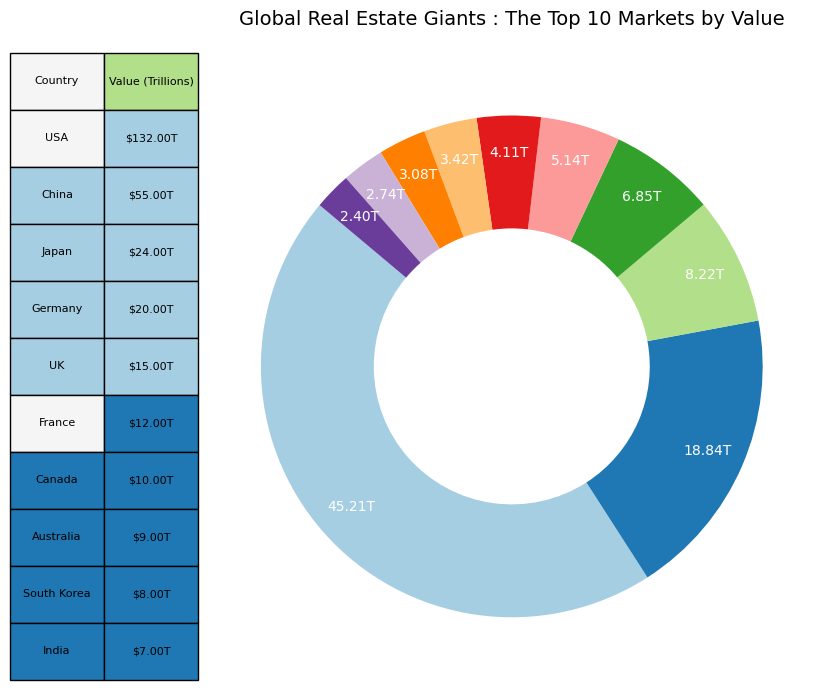

In [138]:
# Data
countries = ['USA', 'China', 'Japan', 'Germany', 'UK', 'France', 'Canada', 'Australia', 'South Korea', 'India']
values = [132, 55, 24, 20, 15, 12, 10, 9, 8, 7]  # Values in trillions

# Convert values to trillions with two decimal places
values_trillions = [f"${v:.2f}T" for v in values]

# Generate colors for each slice
colors = plt.cm.Paired(range(len(countries)))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the pie chart with a thicker ring
wedges, texts, autotexts = ax.pie(values, colors=colors, startangle=140, 
                                  wedgeprops=dict(width=0.45),  # Increased thickness by 50%
                                  autopct='%1.2fT',  # Show values inside the rings
                                  pctdistance=0.85)  # Position labels inside the ring

# Update autopct text colors to match segment colors
for autotext, color in zip(autotexts, colors):
    autotext.set_color('white')  # Text color inside the ring

# Create a table on the left side with matching colors
table_data = list(zip(countries, values_trillions))
table = plt.table(cellText=table_data, colLabels=['Country', 'Value (Trillions)'],
                  cellLoc='center', loc='left', bbox=[-0.3, 0, 0.3, 1], colColours=['#f5f5f5', '#f5f5f5'])

# Set table font size and color
table.auto_set_font_size(False)
table.set_fontsize(8)  # Reduce font size
for i, key in enumerate(table._cells.keys()):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if i % len(countries) == 0:  # Color header cells
        cell.set_facecolor('#f5f5f5')
    else:
        cell.set_facecolor(colors[i // len(countries)])
    cell.set_text_props(color='black')

# Add a title
plt.title('Global Real Estate Giants : The Top 10 Markets by Value', pad=20, fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

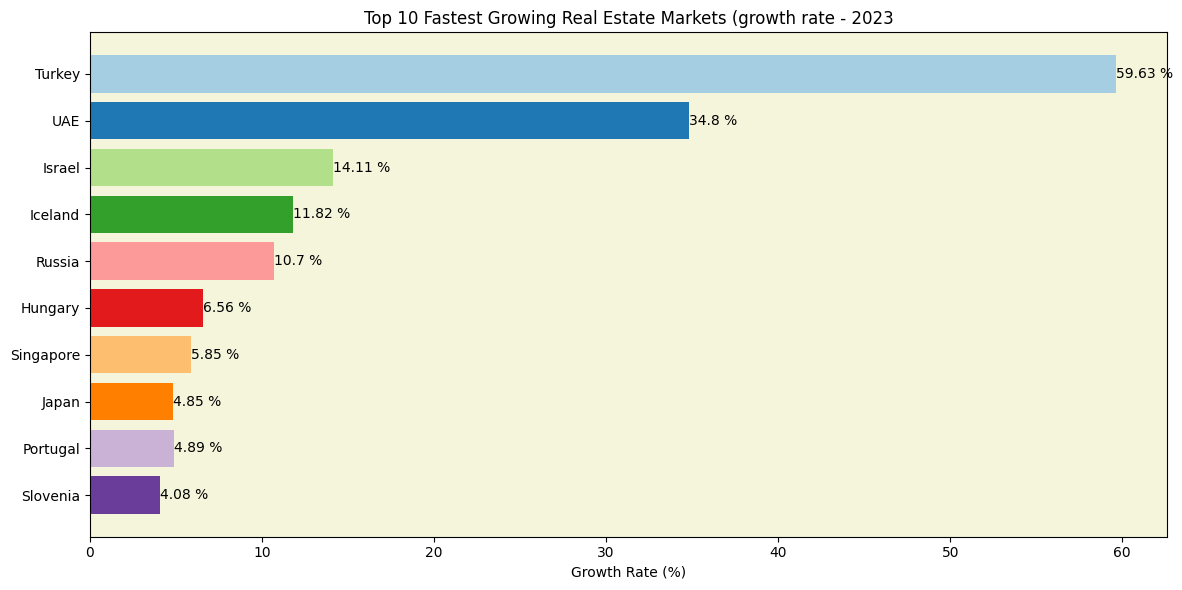

In [139]:
data = {
    'Country': ['Turkey', 'UAE', 'Israel', 'Iceland', 'Russia', 'Hungary', 'Singapore', 'Japan', 'Portugal', 'Slovenia'],
    'Growth Rate(T)': [59.63, 34.8, 14.11, 11.82, 10.7, 6.56, 5.85, 4.85, 4.89, 4.08]
}
df = pd.DataFrame(data)

# Define a list of colors for each bar
colors = plt.cm.Paired(range(len(df)))

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(df['Country'], df['Growth Rate(T)'], color=colors)

# Adding annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()} %', va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Growth Rate (%)')
plt.title('Top 10 Fastest Growing Real Estate Markets (growth rate - 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest value on top

# Ensure no grid lines are shown
plt.grid(False)

plt.tight_layout()
plt.show

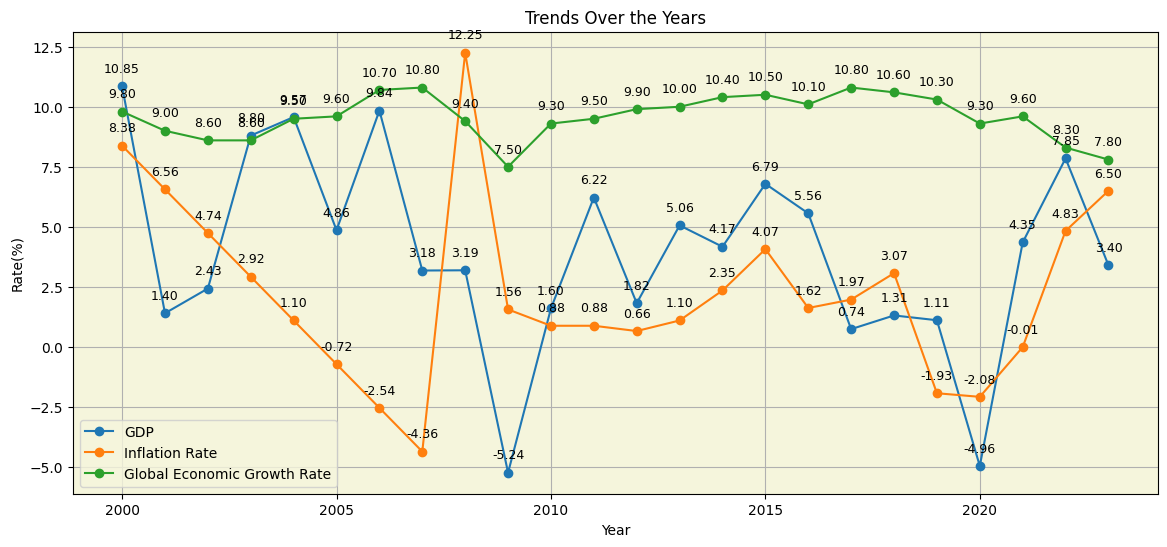

In [140]:

data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 
             2020, 2021, 2022, 2023],
    'Gross Domestic Product': [10.85, 1.40, 2.43, 8.80, 9.57, 4.86, 9.84, 3.18, 3.19, -5.24, 
                                1.60, 6.22, 1.82, 5.06, 4.17, 6.79, 5.56, 0.74, 1.31, 1.11, 
                                -4.96, 4.35, 7.85, 3.40],
    'Inflation Rate': [8.38, 6.56, 4.74, 2.92, 1.10, -0.72, -2.54, -4.36, 12.25, 1.56, 
                       0.88, 0.88, 0.66, 1.10, 2.35, 4.07, 1.62, 1.97, 3.07, -1.93, 
                       -2.08, -0.01, 4.83, 6.50],
    'Population Growth Rate': [5.6, 5.3, 5.1, 4.8, 4.6, 7, 13.5, 18.1, 17.4, 13.4, 
                                5.9, 1.1, 1, 1, 1, 0.9, 0.9, 0.8, 0.8, 0.8, 
                                0.8, 0.8, 0.8, 0.8],
    'Infrastructure Development Rate': [80, 81, 81, 82, 82, 83, 83, 83, 83, 84, 
                                         84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 
                                         87, 88, 88, 88],
    'Energy Use Per Capita': [9624, 11639, 10974, 10287, 10481, 10394, 9430, 8538, 8488, 7501, 
                               7273, 7503, 7893, 7992, 7976, 7906, 7837, 7628, 7559, 7489, 
                               7420, 7350, 7325, 7285],
    'Global Economic Growth Rate': [9.8, 9, 8.6, 8.6, 9.5, 9.6, 10.7, 10.8, 9.4, 7.5, 
                                     9.3, 9.5, 9.9, 10, 10.4, 10.5, 10.1, 10.8, 10.6, 10.3, 
                                     9.3, 9.6, 8.3, 7.8],
    'Gross National Income': [0, 0, -1.4, 7.9, 10.1, 6.1, 10.6, 4.5, 1, -5.6, 
                               0.5, 6.3, 1.9, 5.1, 4.2, 7.1, 5.6, 0.9, 0.8, 1.3, 
                               -5.9, 2.3, 3.2, 3.1],
    'Unemployment Rate': [2.3, 2.4, 2.7, 2.9, 3, 3.1, 3, 2.9, 2.8, 2.9, 
                          2.8, 2.6, 2.3, 2.1, 2, 1.8, 1.6, 2.5, 2.2, 2.3, 
                          4.3, 3.1, 2.9, 2.7],
    'Foreign Direct Investment': [-0.5, 1.1, 0.1, 3.4, 6.8, 6, 5.8, 5.5, 1.6, 0.4, 
                                  2.9, 2, 2.5, 2.4, 2.7, 2.3, 2.6, 2.7, 2.4, 4.3, 
                                  5.7, 5, 4.5, 6.8]
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 6))
plt.plot(df['Year'], df['Gross Domestic Product'], label='GDP', color='tab:blue', marker='o')
plt.plot(df['Year'], df['Inflation Rate'], label='Inflation Rate', color='tab:orange', marker='o')
plt.plot(df['Year'], df['Global Economic Growth Rate'], label='Global Economic Growth Rate', color='tab:green', marker='o')

# Adding labels for each data point
for i, txt in enumerate(df['Gross Domestic Product']):
    plt.annotate(f'{txt:.2f}', (df['Year'][i], df['Gross Domestic Product'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
for i, txt in enumerate(df['Inflation Rate']):
    plt.annotate(f'{txt:.2f}', (df['Year'][i], df['Inflation Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
for i, txt in enumerate(df['Global Economic Growth Rate']):
    plt.annotate(f'{txt:.2f}', (df['Year'][i], df['Global Economic Growth Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.xlabel('Year')
plt.ylabel('Rate(%)')
plt.title('Trends Over the Years')
plt.legend()
plt.grid(True)
plt.show()

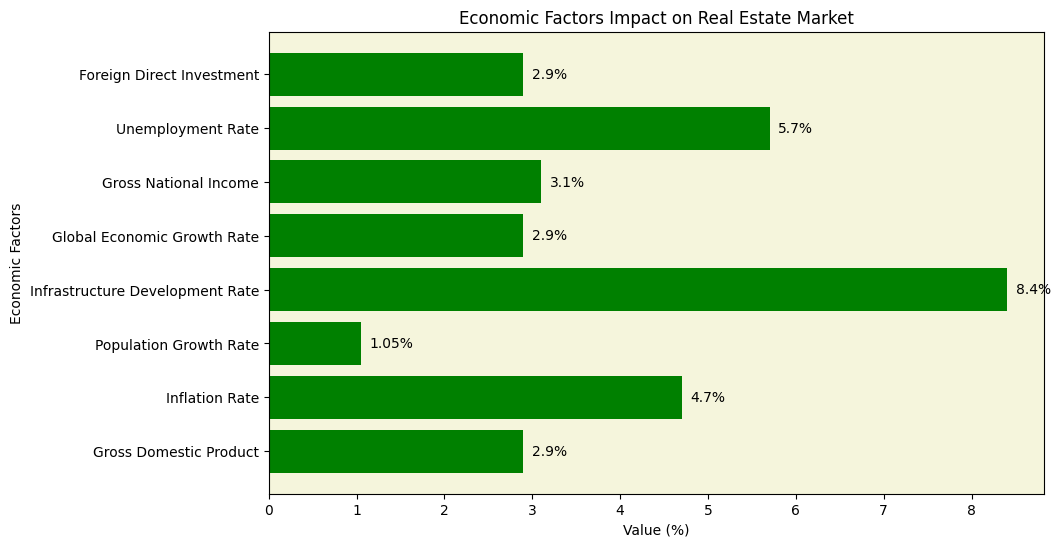

In [141]:
# Data representing economic factors and their values (excluding Energy Use Per Capita)
economic_factors = {
    'Factor': ['Gross Domestic Product', 'Inflation Rate', 'Population Growth Rate', 'Infrastructure Development Rate',
               'Global Economic Growth Rate', 'Gross National Income', 'Unemployment Rate', 'Foreign Direct Investment'],
    'Value': [2.9, 4.7, 1.05, 8.4, 2.9, 3.1, 5.7, 2.9]
}

# Creating a DataFrame
df = pd.DataFrame(economic_factors)

# Plotting the data with a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Factor'], df['Value'], color='green')

plt.title('Economic Factors Impact on Real Estate Market')
plt.xlabel('Value (%)')
plt.ylabel('Economic Factors')

# Adding percentage labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.1,  # Position of the label
             bar.get_y() + bar.get_height() / 2,  # Align the label vertically in the middle of the bar
             f'{bar.get_width()}%',  # Label text
             va='center')  # Vertical alignment

# Displaying the chart without gridlines
plt.show()



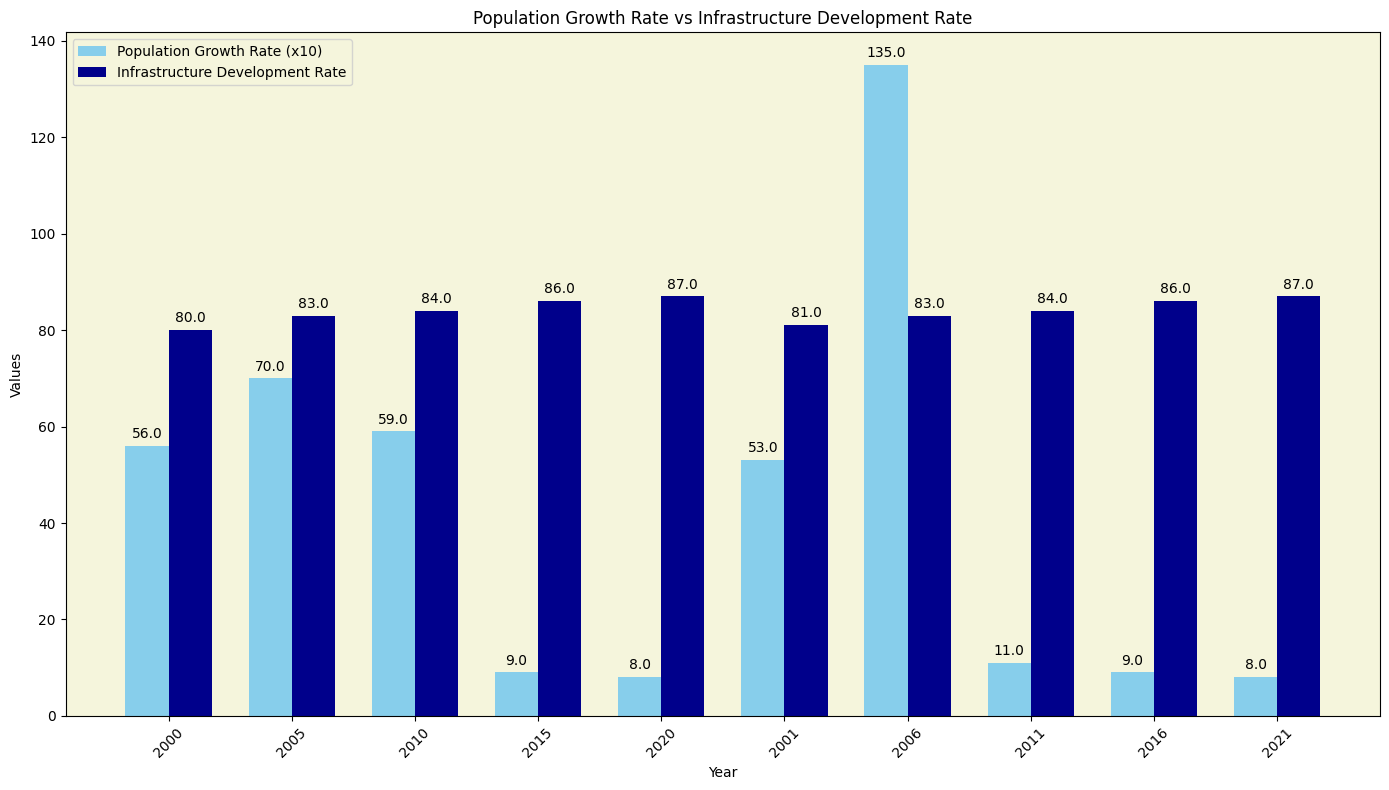

In [142]:
import numpy as np


data = {
    'Year': [2000, 2005, 2010, 2015, 2020, 2001, 2006, 2011, 2016, 2021],
    'Population Growth Rate': [5.6, 7.0, 5.9, 0.9, 0.8, 5.3, 13.5, 1.1, 0.9, 0.8],
    'Infrastructure Development Rate': [80, 83, 84, 86, 87, 81, 83, 84, 86, 87]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Multiply Population Growth Rate by 10 for comparison
df['Population Growth Rate (x10)'] = df['Population Growth Rate'] * 10

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Set bar width
bar_width = 0.35
index = np.arange(len(df['Year']))

# Plot the bars
bars_population = ax1.bar(index - bar_width / 2, df['Population Growth Rate (x10)'], bar_width, color='skyblue', label='Population Growth Rate (x10)')
bars_infrastructure = ax1.bar(index + bar_width / 2, df['Infrastructure Development Rate'], bar_width, color='darkblue', label='Infrastructure Development Rate')

# Add labels to each bar
def add_labels(bars, is_percentage=False):
    for bar in bars:
        height = bar.get_height()
        label = f'{height:.1f}'
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            label,
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

add_labels(bars_population)
add_labels(bars_infrastructure)

# Set labels, title, and legend
ax1.set_xlabel('Year')
ax1.set_ylabel('Values')
ax1.set_title('Population Growth Rate vs Infrastructure Development Rate')
ax1.set_xticks(index)
ax1.set_xticklabels(df['Year'], rotation=45)
ax1.legend(loc='upper left')

# Display the chart
plt.tight_layout()
plt.show()


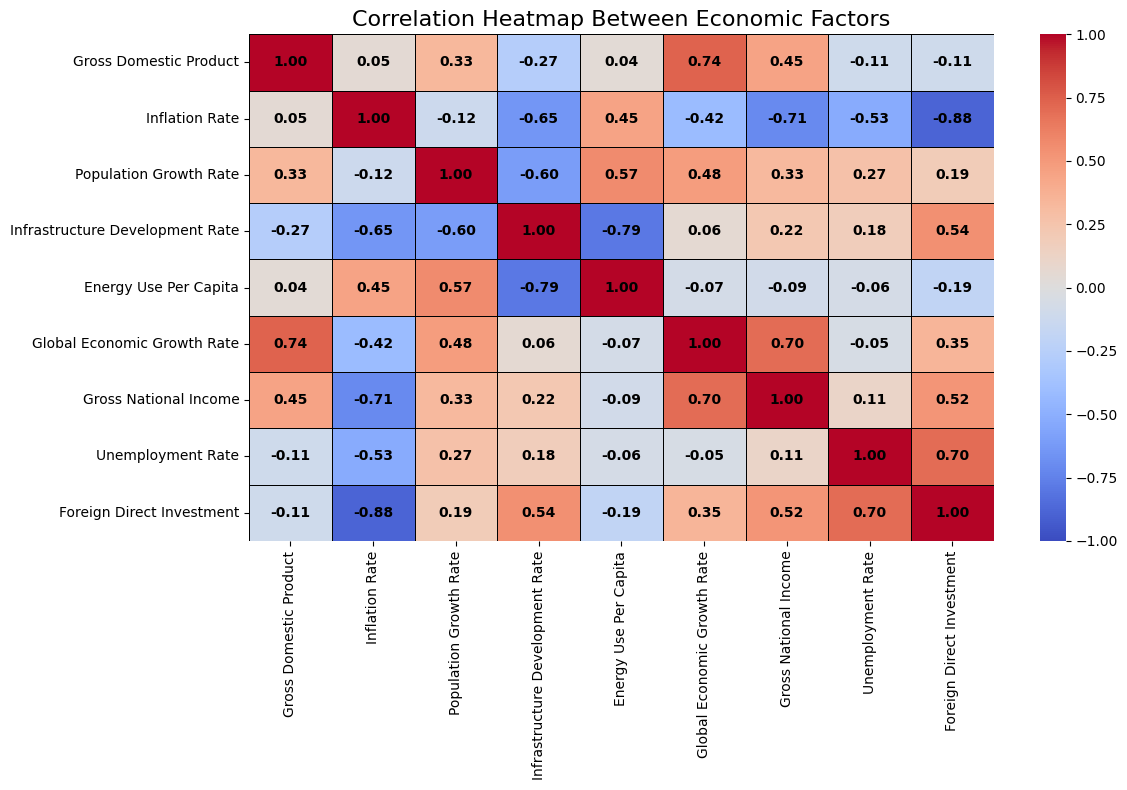

In [143]:
import seaborn as sns
data = {
    'Year': [2000, 2005, 2010, 2015, 2020, 2001, 2006, 2011, 2016, 2021],
    'Gross Domestic Product': [10.85, 4.86, 1.60, 6.22, 4.35, 1.40, 9.84, 6.22, 5.56, 4.35],
    'Inflation Rate': [8.38, -0.72, 0.88, 0.66, -0.01, 6.56, -2.54, 0.88, 1.62, -0.01],
    'Population Growth Rate': [5.6, 7.0, 5.9, 0.9, 0.8, 5.3, 13.5, 1.1, 0.9, 0.8],
    'Infrastructure Development Rate': [80, 83, 84, 86, 87, 81, 83, 84, 86, 87],
    'Energy Use Per Capita': [9624, 10394, 7273, 7503, 7350, 11639, 9430, 7503, 7837, 7350],
    'Global Economic Growth Rate': [9.8, 9.6, 9.3, 9.5, 9.6, 9.0, 10.7, 9.5, 10.1, 9.6],
    'Gross National Income': [0, 6.1, 0.5, 6.3, 2.3, 0, 10.6, 6.3, 5.6, 2.3],
    'Unemployment Rate': [2.3, 3.1, 2.8, 2.6, 3.1, 2.4, 3.0, 2.6, 1.6, 3.1],
    'Foreign Direct Investment': [-0.5, 6, 2.9, 2.5, 5.7, 1.1, 5.8, 2.5, 2.6, 5]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Drop the 'Year' column as it's not part of the correlation analysis
df_corr = df.drop(columns='Year')

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0,
                      linewidths=0.5, linecolor='black', annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})

# Set the title
plt.title('Correlation Heatmap Between Economic Factors', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### 5. Preprocessing the Real Estate Datasets

In [144]:
print('Parking Dtype for rentals:', property_rental_transactions_df['Parking'].dtype)
print('Parking Dtype for sales Before:', property_transactions_df['Parking'].dtype)

property_transactions_df['Parking'] = pd.to_numeric(property_transactions_df['Parking'], errors='coerce')

print('Parking Dtype for sales After:', property_transactions_df['Parking'].dtype)

Parking Dtype for rentals: float32
Parking Dtype for sales Before: object
Parking Dtype for sales After: float64


In [145]:
common_columns = set(property_rental_transactions_df.columns).intersection(set(property_transactions_df.columns))
print("Common columnsd for sales and rents:", common_columns)


Common columnsd for sales and rents: {'Is Free Hold?', 'Month', 'Property Size (sq.m)', 'Parking', 'Property Sub Type', 'Nearest Landmark', 'Nearest Metro', 'Project', 'Hour', 'Nearest Mall', 'Year', 'Day', 'Usage', 'Area', 'Property Type', 'Property ID'}


- `Examining the datasets before merge:`

   - Examining the unique elements and potential discrepancies in the common columns before merging datasets can provide critical insights, such as mismatched values, inconsistent data types, or potential conflicts:

In [146]:
def analyze_common_columns(df1, df2, common_columns):
    """
    Analyze common columns between two datasets for consistency.

    Args:
        df1 (pd.DataFrame): First dataset.
        df2 (pd.DataFrame): Second dataset.
        common_columns (set): Set of common columns to analyze.

    Returns:
        dict: Analysis report for each common column.
    """
    analysis_report = {}
    for col in common_columns:
        report = {
            "Column": col,
            "Unique in DF1": df1[col].nunique(),
            "Unique in DF2": df2[col].nunique(),
            "Intersection (Unique Values)": len(set(df1[col].unique()).intersection(set(df2[col].unique()))),
            "Unique in DF1 Only": len(set(df1[col].unique()) - set(df2[col].unique())),
            "Unique in DF2 Only": len(set(df2[col].unique()) - set(df1[col].unique())),
        }
        # Add additional summaries for numerical columns
        if pd.api.types.is_numeric_dtype(df1[col]) and pd.api.types.is_numeric_dtype(df2[col]):
            report.update({
                "DF1 Range": (df1[col].min(), df1[col].max()),
                "DF2 Range": (df2[col].min(), df2[col].max()),
            })
        
        analysis_report[col] = report
    
    return pd.DataFrame.from_dict(analysis_report, orient="index")

common_columns = set(property_rental_transactions_df.columns).intersection(set(property_transactions_df.columns))
analysis_report = analyze_common_columns(property_rental_transactions_df, property_transactions_df, common_columns)

analysis_report


Column  Unique in DF1  Unique in DF2  \
Is Free Hold?                Is Free Hold?              2              2   
Month                                Month             12             12   
Property Size (sq.m)  Property Size (sq.m)           6603          72833   
Parking                            Parking             93           1850   
Property Sub Type        Property Sub Type             71             47   
Nearest Landmark          Nearest Landmark             14             16   
Nearest Metro                Nearest Metro             56             58   
Project                            Project           1100           1608   
Hour                                  Hour             24             24   
Nearest Mall                  Nearest Mall              5              7   
Year                                  Year             13             28   
Day                                    Day             31             31   
Usage                                Usage             10              2   
Area                                  Area            216            372   
Property Type                Property Type              5              3   
Property ID                    Property ID        1088523         507504   

                      Intersection (Unique Values)  Unique in DF1 Only  \
Is Free Hold?                                    2                   0   
Month                                           12                   0   
Property Size (sq.m)                          1112                5492   
Parking                                         93                   1   
Property Sub Type                               15                  57   
Nearest Landmark                                15                   0   
Nearest Metro                                   57                   0   
Project                                        987                 114   
Hour                                            24                   0   
Nearest Mall                                     6                   0   
Year                                            13                   0   
Day                                             31                   0   
Usage                                            2                   9   
Area                                           202                  15   
Property Type                                    3                   2   
Property ID                                 272068              816455   

                      Unique in DF2 Only           DF1 Range  \
Is Free Hold?                          0                 NaN   
Month                                  0             (1, 12)   
Property Size (sq.m)               71722  (0.0, 930091045.0)   
Parking                             1758        (0.0, 476.0)   
Property Sub Type                     33                 NaN   
Nearest Landmark                       2                 NaN   
Nearest Metro                          2                 NaN   
Project                              622                 NaN   
Hour                                   0             (0, 23)   
Nearest Mall                           2                 NaN   
Year                                  15        (2010, 2022)   
Day                                    0             (1, 31)   
Usage                                  0                 NaN   
Area                                 170                 NaN   
Property Type                          0                 NaN   
Property ID                       235436    (-3, 5772905919)   

                               DF2 Range  
Is Free Hold?                        NaN  
Month                            (1, 12)  
Property Size (sq.m)  (0.0, 342103430.8)  
Parking                (-10.0, 311312.0)  
Property Sub Type                    NaN  
Nearest Landmark                     NaN  
Nearest Metro                        NaN  
Project                              NaN  
Hour    

**Observations**

 
**1. Property ID**
- **Large Discrepancy**: Only 272,068 unique IDs overlap between the two datasets, with over 1.05M unique to DF1 and DF2 combined.
- **Action**: Investigate the source of these IDs. If they represent distinct records, merging by ID could cause significant data loss.

**2. Is Free Hold?**
- **Perfect Match**: Both datasets have only two values, and these are consistent.
- **Action**: No immediate action is required unless there's a mismatch in definitions.

**3. Project**
- **Moderate Overlap**: 986 out of 1,100 in DF1 exist in DF2, but 622 projects in DF2 are not in DF1.
- **Action**: Align project names (e.g., case sensitivity or variations) to maximize overlap.

**4. Property Sub Type**
- **Significant Mismatch**: Only 14 out of 71 subtypes overlap. DF1 has 57 unique subtypes, while DF2 has 33.
- **Action**: Standardize property subtype categories to improve consistency before merging.

**5. Property Type**
- **Small Mismatch**: DF1 has two additional property types not in DF2.
- **Action**: Harmonize categories or create a mapping table for consistency.

**6. Parking**
- **Extreme Range in DF2**: Parking values range from -10 to over 311,000 in DF2, suggesting possible errors.
- **Action**: Investigate negative values and outliers for data quality issues.

**7. Nearest Metro**
- **Minor Difference**: DF2 has two additional unique metro stations.
- **Action**: Validate these values and ensure consistent station naming.

**8. Year**
- **Additional Historical Data in DF2**: DF2 includes data from 1995–2009, which is absent in DF1.
- **Action**: If years represent different data capture periods, consider handling these separately in analysis.

**9. Usage**
- **Low Overlap**: DF2 only contains two usage categories, while DF1 has 10.
- **Action**: Confirm and align usage definitions or explore merging.

**10. Area**
- **Significant Mismatch**: DF2 has 170 additional areas, indicating potential regional discrepancies.
- **Action**: Map areas to a common naming convention or group by higher-level regions.

**11. Property Size (sq.m)**
- **Extreme Outliers in Both**: Values in both datasets span unrealistic ranges, especially in DF1 (up to ~930M sq.m).
- **Action**: Investigate and filter extreme values before merging.

**12. Nearest Landmark & Nearest Mall**
- **Minor Differences**: DF2 has two additional landmarks and malls.
- **Action**: Review these values and ensure consistent naming conventions.

---

1. **Categorical Alignment**:
   - Standardize naming conventions (e.g., "Property Sub Type," "Area," "Nearest Metro").
   - Use tools like **fuzzy matching** or create mapping dictionaries.

2. **Outlier Handling**:
   - Investigate columns with extreme ranges (e.g., "Parking," "Property Size (sq.m)").
   - Apply thresholds or domain knowledge to filter anomalies.

3. **Data Augmentation**:
   - For features like "Year," decide whether older data (from DF2) is necessary for analysis or should be excluded.

4. **Validation Post-Merge**:
   - After merging, validate the dataset to ensure no unexpected loss or duplication of records.

In [147]:
from fuzzywuzzy import fuzz, process  # For fuzzy matching

# Define columns to analyze
categorical_columns = [
    "Project", "Property Sub Type", "Property Type", "Usage", 
    "Nearest Metro", "Nearest Mall", "Nearest Landmark", "Area"
]

# Function to normalize text
def normalize_text(value):
    if isinstance(value, str):
        return value.lower().strip()
    return value

# Compare and normalize unique values for each column
unique_value_analysis = {}

for col in categorical_columns:
    # Normalize text in both datasets
    df1_values = set(property_rental_transactions_df[col].dropna().map(normalize_text).unique())
    df2_values = set(property_transactions_df[col].dropna().map(normalize_text).unique())
    
    # Find intersection and differences
    common_values = df1_values.intersection(df2_values)
    unique_to_df1 = df1_values - df2_values
    unique_to_df2 = df2_values - df1_values
    
    # Use fuzzy matching for near matches (if any unique values are found)
    fuzzy_matches = {
        value: process.extractOne(value, df2_values, scorer=fuzz.token_sort_ratio)
        for value in unique_to_df1
    }

    # Store results
    unique_value_analysis[col] = {
        "Unique in DF1": len(df1_values),
        "Unique in DF2": len(df2_values),
        "Common": len(common_values),
        "Unique to DF1": len(unique_to_df1),
        "Unique to DF2": len(unique_to_df2),
        "Fuzzy Matches": {k: v for k, v in fuzzy_matches.items() if v[1] > 80},  # Threshold 80%
    }


analysis_df = pd.DataFrame.from_dict(unique_value_analysis, orient="index")
analysis_df


Unique in DF1  Unique in DF2  Common  Unique to DF1  \
Project                     1100           1607     986            114   
Property Sub Type             71             47      15             56   
Property Type                  5              3       3              2   
Usage                         10              2       2              8   
Nearest Metro                 56             58      56              0   
Nearest Mall                   5              7       5              0   
Nearest Landmark              14             16      14              0   
Area                         216            366     203             13   

                   Unique to DF2  \
Project                      621   
Property Sub Type             32   
Property Type                  0   
Usage                          0   
Nearest Metro                  2   
Nearest Mall                   2   
Nearest Landmark               2   
Area                         163   

                                                       Fuzzy Matches  
Project            {'sharena residence 1': ('sherena residence', ...  
Property Sub Type  {'hotel apartments': ('hotel apartment', 97), ...  
Property Type                                                     {}  
Usage                                                             {}  
Nearest Metro                                                     {}  
Nearest Mall                                                      {}  
Nearest Landmark                                                  {}  
Area               {'al thanyah first': ('al thanyah fifth', 88),...

In [148]:
import pandas as pd
from rapidfuzz import process

# Define fuzzy match function using rapidfuzz
def fuzzy_match_column(value, df2_column, threshold=80):
    value = str(value)  # Ensure the value is treated as a string
    best_match, score, _ = process.extractOne(value, df2_column.unique())  # Extract three values: match, score, and index
    if score >= threshold:
        return value, best_match, score
    return None  # If no match found above the threshold

# Function to apply fuzzy matching for each unique value in a column
def fuzzy_match_for_column(df1_column, df2_column, threshold=80, sample_size=None):
    if sample_size:
        df1_column = df1_column.sample(sample_size, random_state=42)  # Sample a subset for faster processing
    matches = []
    for value in df1_column.unique():
        result = fuzzy_match_column(value, df2_column, threshold)
        if result:
            matches.append(result)
    return matches

column = 'Area' 
df1_column = property_rental_transactions_df[column].astype(str)  # Ensure it's a string column
df2_column = property_transactions_df[column].astype(str)  # Ensure it's a string column

# Apply fuzzy matching
fuzzy_results = fuzzy_match_for_column(df1_column, df2_column, sample_size=5000)  # Adjust sample size for faster processing

# Display the results
print(f"Fuzzy Matches for {column}:")
fuzzy_results

# # If you need to save the results, you can save them to a CSV file
# fuzzy_matches_df = pd.DataFrame(fuzzy_results, columns=['DF1_Value', 'DF2_Best_Match', 'Score'])
# fuzzy_matches_df.to_csv(f"fuzzy_matches_{column}.csv", index=False)


Fuzzy Matches for Area:


[('Al Garhoud', 'Al Garhoud', 100.0),
 ('Al Warsan First', 'Al Warsan First', 100.0),
 ('Naif', 'Naif', 100.0),
 ('Mirdif', 'Mirdif', 100.0),
 ('Al Rega', 'Al Rega', 100.0),
 ('Al Hebiah First', 'Al Hebiah First', 100.0),
 ('Al Barsha First', 'Al Barsha First', 100.0),
 ('Al Nahda Second', 'Al Nahda Second', 100.0),
 ('Muhaisanah Second', 'Muhaisanah Second', 100.0),
 ('Al Qusais First', 'Al Qusais First', 100.0),
 ('Al Kheeran', 'Al Kheeran', 100.0),
 ('Mankhool', 'Mankhool', 100.0),
 ('Al Hamriya', 'Al Hamriya', 100.0),
 ('Oud Metha', 'Oud Metha', 100.0),
 ('Al Karama', 'Al Karama', 100.0),
 ('Jabal Ali Industrial First', 'Jabal Ali Industrial First', 100.0),
 ('Hor Al Anz', 'Hor Al Anz', 100.0),
 ('Al Goze Third', 'Al Goze Third', 100.0),
 ('Jabal Ali First', 'Jabal Ali First', 100.0),
 ('Al Goze Industrial Second', 'Al Goze Industrial Second', 100.0),
 ('Marsa Dubai', 'Marsa Dubai', 100.0),
 ('Business Bay', 'Business Bay', 100.0),
 ('Al Raffa', 'Al Raffa', 100.0),
 ('Al Rashidiya'

In [149]:
column = 'Property Sub Type' 
df1_column = property_rental_transactions_df[column].astype(str)  # Ensure it's a string column
df2_column = property_transactions_df[column].astype(str)  # Ensure it's a string column

# Apply fuzzy matching
fuzzy_results = fuzzy_match_for_column(df1_column, df2_column, sample_size=5000) 

# Display the results
print(f"Fuzzy Matches for {column}:")
fuzzy_results

Fuzzy Matches for Property Sub Type:


[('Office', 'Office', 100.0),
 ('Flat', 'Flat', 100.0),
 ('Villa', 'Villa', 100.0),
 ('Labor Camps', 'Labor Camp', 95.23809523809523),
 ('Shop', 'Shop', 100.0),
 ('nan', 'nan', 100.0),
 ('Complex Villas', 'Villa', 90.0),
 ('Warehouse', 'Warehouse', 100.0),
 ('Hotel apartments', 'Hotel Apartment', 90.32258064516128),
 ('Hotel', 'Hotel', 100.0),
 ('Clinic', 'Clinic', 100.0),
 ('Parking', 'Parking', 100.0),
 ('Storage', 'Store', 83.33333333333334),
 ('Open Land', 'Land', 90.0),
 ('School', 'School', 100.0),
 ('Store', 'Store', 100.0),
 ('Complex Warehouse', 'Warehouse', 90.0),
 ('Building', 'Building', 100.0),
 ('Workshop', 'Workshop', 100.0),
 ('Warehouse complex', 'Warehouse', 90.0)]

In [150]:
property_transactions_df['Transaction Date'].describe()

count                           995975
mean     2015-01-18 13:58:10.776414464
min                1995-03-07 00:00:00
25%                2011-02-28 13:40:00
50%                2015-02-19 19:01:00
75%                2019-02-26 13:36:00
max                2022-06-02 16:18:00
Name: Transaction Date, dtype: object

In [151]:
import warnings


def preprocess_real_estate_data(df):
    """
    Preprocesses the merged real estate DataFrame by imputing missing values, 
    calculating average prices per sq.m by month and week, and deriving new features.
    """
    # Convert Transaction Date to datetime and derive YearMonth and YearWeek
    # df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    # df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
    # df['YearWeek'] = df['Transaction Date'].dt.strftime('%Y-%U')

    # Calculate global medians for fallback imputation
    global_median_amount = df['Amount'].median()
    global_median_contract_amount = df['Contract Amount'].median()
    global_median_annual_amount = df['Annual Amount'].median()
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        
        # Impute Amount, Contract Amount, and Annual Amount first
        df['Amount'] = df.groupby('Property Sub Type')['Amount'].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_amount)
        )
        df['Contract Amount'] = df.groupby('Property Sub Type')['Contract Amount'].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_contract_amount)
        )
        df['Annual Amount'] = df.groupby('Property Sub Type')['Annual Amount'].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_annual_amount)
        )

    # Calculate price per sq.m
    df['Price per sq.m'] = df['Amount'] / df['Transaction Size (sq.m)']

    # Average prices by month
    avg_price_month = df.groupby(['Property Type', 'Area', 'YearMonth'])['Price per sq.m'].mean().reset_index()
    avg_price_month.rename(columns={'Price per sq.m': 'Avg Price Last Month'}, inplace=True)

    # Average prices by week
    avg_price_week = df.groupby(['Property Type', 'Area', 'YearWeek'])['Price per sq.m'].mean().reset_index()
    avg_price_week.rename(columns={'Price per sq.m': 'Avg Price per sq.m Last Week'}, inplace=True)

    # Merge averages back into the main DataFrame
    df = pd.merge(df, avg_price_month, on=['Property Type', 'Area', 'YearMonth'], how='left')
    df = pd.merge(df, avg_price_week, on=['Property Type', 'Area', 'YearWeek'], how='left')

    # Extract number of rooms as numeric
    # df['Number of Rooms'] = df['Room(s)'].str.extract('(\d+)').astype(float)
    # global_median_rooms = df['Number of Rooms'].median()
    # global_median_parking = df['Parking'].median()
    # df['Number of Rooms'] = df.groupby('Property Sub Type')['Number of Rooms'].transform(
    #     lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_rooms)
    # )
    # df['Parking'] = df.groupby('Property Sub Type')['Parking'].transform(
    #     lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_parking)
    # )

    # # Impute categorical columns using modes
    # categorical_columns = ['Property Sub Type', 'Room(s)', 'Nearest Metro', 'Area', 'Nearest Mall', 'Nearest Landmark', 'Usage']
    # for col in categorical_columns:
    #     df[col] = df.groupby('Property Type')[col].transform(
    #         lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Not Available'
    #     )

    # # Impute Property Size using medians
    # df['Property Size (sq.m)'] = df.groupby('Property Sub Type')['Property Size (sq.m)'].transform(
    #     lambda x: x.fillna(x.median())
    # )

    # # Drop rows with critical missing values
    # df.dropna(subset=['Number of Rooms', 'Parking','Avg Price Last Month', 'Avg Price per sq.m Last Week'], inplace=True)

        # Ensure no infinity values remain
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

# merged_real_estate_df = preprocess_real_estate_data(merged_real_estate_df)


In [152]:
import numpy as np
rent_numerical_cols = property_rental_transactions_df.select_dtypes(include=[np.number]).columns
rent_categorical_cols = property_rental_transactions_df.select_dtypes(exclude=[np.number]).columns

property_sales_numerical_cols = property_transactions_df.select_dtypes(include=[np.number]).columns
sales_numerical_cols = sales_transactions_df.select_dtypes(include=[np.number]).columns
sales_categorical_cols = property_transactions_df.select_dtypes(exclude=[np.number]).columns
sales_numerical_cols

Index(['Property ID', 'Amount', 'Transaction Size (sq.m)',
       'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [153]:

# rent_cat_cols_to_impute = ['Area','Is Free Hold?', 'Property Type', 'Property Sub Type', 'Usage','Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
# rent_num_cols_to_impute = ['Contract Amount','Annual Amount', 'Property Size (sq.m)', 'Number of Rooms', 'Parking']

# sales_num_cols_to_impute = ['Amount', 'Transaction Size (sq.m)','Property Size (sq.m)', 'Parking', 'No. of Buyer', 'No. of Seller']
# sales_cat_cols_to_impute = ['Is Free Hold?', 'Usage','Area', 'Property Type', 'Property Sub Type', 'Room(s)',
#        'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',]

In [154]:
# def visualize_missing_values(df, title="Percentage of Missing Values by Feature"):
#     """
#     Calculates and visualizes the percentage of missing values for each feature in a DataFrame.
    
#     Parameters:
#     - df (pd.DataFrame): The DataFrame to analyze.
#     - title (str): The title for the visualization.

#     Returns:
#     - pd.DataFrame: A DataFrame with missing percentages for each feature.
#     """
#     # Calculate missing values and percentages
#     missing_values = df.isnull().sum()
#     missing_percent = (missing_values / len(df)) * 100
#     missing_df = pd.DataFrame({
#         'Feature': missing_values.index,
#         'MissingPercent': missing_percent
#     }).sort_values(by='MissingPercent', ascending=False)

#     # Visualize missing values
#     plt.figure(figsize=(14, 6))
#     sns.barplot(data=missing_df, y='Feature', x='MissingPercent', palette='viridis',hue='Feature', legend=False)
#     plt.title(title)
#     plt.xlabel("Missing Percentage (%)")
#     plt.ylabel("Feature")
#     plt.show()
    
#     return missing_df

# # Analyze and visualize missing values in the merged_real_estate_df
# missing_property_rental_transactions_df = visualize_missing_values(
#     df=property_rental_transactions_df,
#     title="Percentage of Missing Values by Feature (Rentals)"
# )
# # Display the summary DataFrame
# print("Missing Rentals")
# print(missing_property_rental_transactions_df)


# missing_property_transactions_df = visualize_missing_values(
#     df=property_transactions_df,
#     title="Percentage of Missing Values by Feature (Sales)"
# )

# print("-"*120)
# print("Missing Sales")
# print(missing_property_transactions_df)


---

**Key Updates to the Problem**

1. **Sales Price Prediction**:
   - Use the `Amount` column from the `property_transactions_df` dataset.
   - Filter the dataset to include only sales transactions by checking the `Transaction Type` and `Transaction Sub Type` fields for "Sales."

2. **Rental Price Prediction**:
   - Use the `Annual Amount` column from the `property_rental_transactions_df` dataset.
   - Ignore the `Contract Amount` column and any date ranges (`Start Date` and `End Date`) as they are irrelevant for the task.

3. **Transformations Allowed**:
   - Use transformations and engineering on the provided columns (e.g., derive new features like price per square meter, categorize areas, encode categorical variables, etc.).
   - No additional external data is to be added.

4. **Prediction Focus**:
   - For **sales transactions**, the target is `Amount` (filtered to include only sales transactions).
   - For **rental transactions**, the target is `Annual Amount`.

---

**Updated Plan for Preprocessing**

**Sales Transactions Dataset**
1. Filter transactions where `Transaction Type` = "Sales" or `Transaction Sub Type` = "Sales."
2. Select relevant features (`Property Type`, `Area`, `Property Size (sq.m)`, etc.).
3. Preprocess categorical and numerical columns as per earlier instructions.

**Rental Transactions Dataset**
1. Use the `Annual Amount` column as the target.
2. Select relevant features (`Property Type`, `Area`, `Nearest Metro`, etc.).
3. Preprocess categorical and numerical columns as per earlier instructions.





---

 **Handling of Missing Data**

**For `property_transactions_df`:**
- **`Transaction Size (sq.m)` and `Room(s)` (numerical columns):**
  - Use **median imputation** grouped by `Property Sub Type` (if the grouping has missing values, fallback to the overall median).

- **`Property Sub Type` (categorical column):**
  - Fill missing values with the **mode** of the corresponding `Property Type` group. Fallback to the dataset-wide mode if the group mode is missing.

- **`Nearest Metro`, `Nearest Mall`, `Nearest Landmark` (categorical columns):**
  - Fill missing values using the **mode** grouped by `Area`. If the mode for the group is missing, fallback to the dataset-wide mode.

- **`Parking` (binary or categorical):**
  - With nearly 50% missing, consider either:
    1. Dropping this column if it has low predictive power.
    2. Imputing with a placeholder category like `"Unknown"`.

- **`Project` (categorical column):**
  - With ~41% missing, treat it similarly to `Parking`.

---

**For `property_rental_transactions_df`:**
- **`Annual Amount` and `Contract Amount` (numerical columns):**
  - Use **median imputation** grouped by `Property Sub Type` (fallback to overall median).

- **`Property Size (sq.m)` and `Number of Rooms` (numerical columns):**
  - Impute `Property Size (sq.m)` using median grouped by `Property Sub Type`.
  - `Number of Rooms` has ~97% missing data; it may be best to drop this column.

- **`Nearest Metro`, `Nearest Mall`, `Nearest Landmark` (categorical columns):**
  - Same approach as in the sales dataset: use mode imputation grouped by `Area`.

- **`Parking` and `Project`:**
  - Consider dropping them since both have over 85% missing data.

---


In [155]:
print('sales transactions in Type:', property_transactions_df[(property_transactions_df['Transaction Type'] == 'Sales')]['Transaction Type'].unique().tolist())
print('sales transactions in Sub Type:', property_transactions_df[(property_transactions_df['Transaction sub type'] == 'Sales')]['Transaction sub type'].unique().tolist())

sales transactions in Type: ['Sales']
sales transactions in Sub Type: []


In [156]:
# sales_transactions_df.isnull().mean() * 100
checking_sales_df = property_transactions_df[(property_transactions_df['Transaction Type'] == 'Sales') & (property_transactions_df['Transaction sub type'] == 'Sales')]
print(checking_sales_df.shape)
print(sales_transactions_df.shape)


(0, 26)
(706096, 26)


`ANDing Type and Sub Type will yield no Sales because there are no Sales in the Sub Transaction`

In [157]:
# property_transactions_df.isnull().mean() * 100
# print("sales cat cols:", property_transactions_df.select_dtypes(exclude=[np.number]).columns)
# merged_numerical_features =   merged_real_estate_df.select_dtypes(include=[np.number]).columns

In [158]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings(action="ignore")  # filter unnecessary warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)


# Configuration dictionary for feature names
sale_config = {
    "numerical_cols": ['Transaction Size (sq.m)', 'Property Size (sq.m)', 
                       'No. of Buyer', 'No. of Seller', 'Parking'],
    "categorical_cols": ['Room(s)', 'Property Sub Type', 'Nearest Metro', 
                         'Nearest Mall', 'Nearest Landmark'],
    "group_by_cols": {
        "numerical": "Property Sub Type",
        "categorical": {
            'Nearest Metro': 'Area',
            'Nearest Mall': 'Area',
            'Nearest Landmark': 'Area',
            'Room(s)': 'Property Sub Type',
            'Property Sub Type': 'Property Sub Type'
        }
    },
    "drop_cols": ['Project'],
    "filter_conditions": {
        "Transaction Type": "Sales",
        "Transaction sub type": "Sales"
    }
}

# Define preprocessing functions
def filter_sales_transactions(df, filter_conditions):
    """Filter the dataset based on provided conditions."""
    condition = False
    for col, value in filter_conditions.items():
        condition |= (df[col] == value)
    return df[condition]

def drop_columns(df, drop_cols):
    """Drop specified columns."""
    return df.drop(columns=drop_cols, errors='ignore')

def impute_numerical_columns(df, numerical_cols, group_by_col):
    """Impute missing values in numerical columns."""
    for col in numerical_cols:
        df[col] = df.groupby(group_by_col, observed=False)[col].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df[col].median())
        )
    return df

def impute_categorical_columns(df, categorical_cols, group_by_cols):
    """Impute missing values in categorical columns."""
    for col in categorical_cols:
        group_by_col = group_by_cols[col] if col in group_by_cols else None
        if group_by_col:
            df[col] = df.groupby(group_by_col, observed=False)[col].transform(
                lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[col].mode()[0])
            )
    return df

def handle_remaining_missing_values(df, numerical_cols, categorical_cols):
    """Handle remaining missing values."""
    for col in numerical_cols + categorical_cols:
        if df[col].isna().sum() > 0:
            if col in numerical_cols:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df


# Build pipeline
sales_rentals_preprocessing_pipeline = Pipeline(steps=[
    ('filter_sales_transactions', FunctionTransformer(
        func=filter_sales_transactions, 
        kw_args={'filter_conditions': sale_config["filter_conditions"]}
    )),
    ('drop_columns', FunctionTransformer(
        func=drop_columns, 
        kw_args={'drop_cols': sale_config["drop_cols"]}
    )),
    ('impute_numerical_columns', FunctionTransformer(
        func=impute_numerical_columns, 
        kw_args={
            'numerical_cols': sale_config["numerical_cols"],
            'group_by_col': sale_config["group_by_cols"]["numerical"]
        }
    )),
    ('impute_categorical_columns', FunctionTransformer(
        func=impute_categorical_columns, 
        kw_args={
            'categorical_cols': sale_config["categorical_cols"], 
            'group_by_cols': sale_config["group_by_cols"]["categorical"]
        }
    )),
    ('handle_remaining_missing_values', FunctionTransformer(
        func=handle_remaining_missing_values, 
        kw_args={
            'numerical_cols': sale_config["numerical_cols"], 
            'categorical_cols': sale_config["categorical_cols"]
        }
    ))
])

# Apply pipeline
pipeline_imputed_sales_df = sales_rentals_preprocessing_pipeline.fit_transform(property_transactions_df)
# pipeline_imputed_rentals_df = sales_rentals_preprocessing_pipeline.fit_transform(property_rental_transactions_df)

# Check missing values
print("missingness in sales after imputing:", pipeline_imputed_sales_df.isnull().mean().sum())
# print("missingness in rentals after imputing:", pipeline_imputed_rentals_df.isnull().mean().sum())


missingness in sales after imputing: 0.0


In [159]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Parking', 'No of Units', 'Project',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [160]:

pipeline_imputed_sales_df = data_processor.remove_negative_values(pipeline_imputed_sales_df)
pipeline_imputed_sales_df.describe()

Transaction Date   Property ID        Amount  \
count                         703156  7.031560e+05  7.031560e+05   
mean   2014-11-09 20:56:55.458077696  1.286213e+08  2.418455e+06   
min              1997-11-08 00:00:00  2.946000e+03  6.751000e+01   
25%              2010-10-10 13:30:00  6.830992e+05  6.500000e+05   
50%              2014-09-09 14:38:00  2.351126e+07  1.194888e+06   
75%              2018-10-04 09:46:00  6.634497e+07  2.153783e+06   
max              2022-06-02 15:22:00  1.257530e+09  1.247541e+09   
std                              NaN  2.658896e+08  9.770295e+06   

       Transaction Size (sq.m)  Property Size (sq.m)        Parking  \
count             7.031560e+05          7.031560e+05  703156.000000   
mean              1.290881e+03          1.505078e+03      25.790327   
min               0.000000e+00          0.000000e+00       0.000000   
25%               7.265000e+01          6.800000e+01       1.000000   
50%               9.715000e+01          1.063400e+02       1.000000   
75%               1.839500e+02          1.895800e+02       1.000000   
max               3.421034e+08          3.421034e+08  311312.000000   
std               4.213204e+05          4.619259e+05    1552.197190   

        No. of Buyer  No. of Seller           Year          Month  \
count  703156.000000  703156.000000  703156.000000  703156.000000   
mean        1.288083       1.252327    2014.367879       6.387268   
min         0.000000       0.000000    1997.000000       1.000000   
25%         1.000000       1.000000    2010.000000       3.000000   
50%         1.000000       1.000000    2014.000000       6.000000   
75%         1.000000       1.000000    2018.000000       9.000000   
max      3134.000000    1084.000000    2022.000000      12.000000   
std         7.692294       6.889713       4.666103       3.417011   

                 Day           Hour  
count  703156.000000  703156.000000  
mean       15.918709      10.072234  
min         1.000000       0.000000  
25%         8.000000       9.000000  
50%        16.000000      11.000000  
75%        24.000000      13.000000  
max        31.000000      23.000000  
std         8.756709       4.412776

In [161]:
def calculate_imputation_error(original_df, imputed_df, numerical_cols, categorical_cols):
    """
    Compare the original and imputed datasets, and calculate the imputation error.

    Parameters:
    - original_df: DataFrame before imputation
    - imputed_df: DataFrame after imputation
    - numerical_cols: List of numerical columns
    - categorical_cols: List of categorical columns

    Returns:
    - imputation_error: DataFrame summarizing the imputation errors for numerical columns
    - categorical_changes: DataFrame summarizing changes in categorical columns
    """
    # Initialize results
    imputation_error = {}
    categorical_changes = []

    # Calculate error for numerical columns
    for col in numerical_cols:
        original_values = original_df[col]
        imputed_values = imputed_df[col]
        missing_mask = original_values.isna()

        if missing_mask.any():
            # Align indices for comparison
            aligned_original = original_values[missing_mask].fillna(0).values
            aligned_imputed = imputed_values[missing_mask].values
            error = np.abs(aligned_imputed - aligned_original).mean()
            imputation_error[col] = error
        else:
            imputation_error[col] = 0

    # Detect changes in categorical columns
    for col in categorical_cols:
        original_values = original_df[col]
        imputed_values = imputed_df[col]
        missing_mask = original_values.isna()

        if missing_mask.any():
            # Align indices for comparison
            aligned_original = original_values[missing_mask]
            aligned_imputed = imputed_values[missing_mask]
            changes = (aligned_imputed != aligned_original).sum()
            categorical_changes.append({
                "Column": col,
                "Total Missing": missing_mask.sum(),
                "Changed Values": changes,
                "Change Percentage": changes / missing_mask.sum() * 100
            })

    # Convert results to DataFrames
    imputation_error_df = pd.DataFrame(
        list(imputation_error.items()), columns=["Column", "Mean Imputation Error"]
    )
    categorical_changes_df = pd.DataFrame(categorical_changes)

    return imputation_error_df, categorical_changes_df

# Calculate imputation errors
imputation_error, categorical_changes = calculate_imputation_error(
    original_df=pipeline_imputed_sales_df,
    imputed_df=pipeline_imputed_sales_df,
    numerical_cols=sale_config["numerical_cols"],
    categorical_cols=sale_config["categorical_cols"]
)

# Display the results
print("Numerical Imputation Errors:")
print(imputation_error)

print("\nCategorical Changes Summary:")
print(categorical_changes)


Numerical Imputation Errors:
                    Column  Mean Imputation Error
0  Transaction Size (sq.m)                      0
1     Property Size (sq.m)                      0
2             No. of Buyer                      0
3            No. of Seller                      0
4                  Parking                      0

Categorical Changes Summary:
Empty DataFrame
Columns: []
Index: []


- Check plots after imputation

<Figure size 1400x400 with 0 Axes>

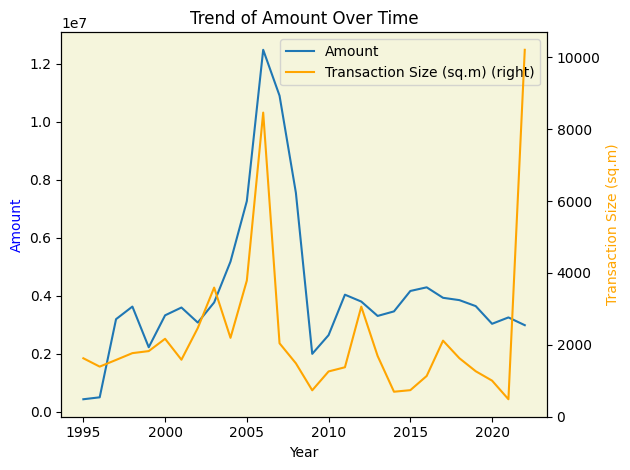

In [162]:
visualizations.plot_trends_secondary_cols(
    property_transactions_df,  # original before selecting sales only
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)',
    figsize=(14,4)
)

<Figure size 1400x400 with 0 Axes>

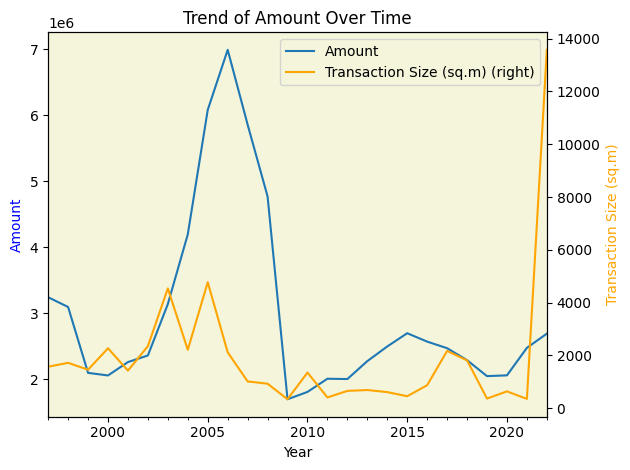

In [163]:
visualizations.plot_trends_secondary_cols(
    sales_transactions_df, # sales only
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


<Figure size 1400x400 with 0 Axes>

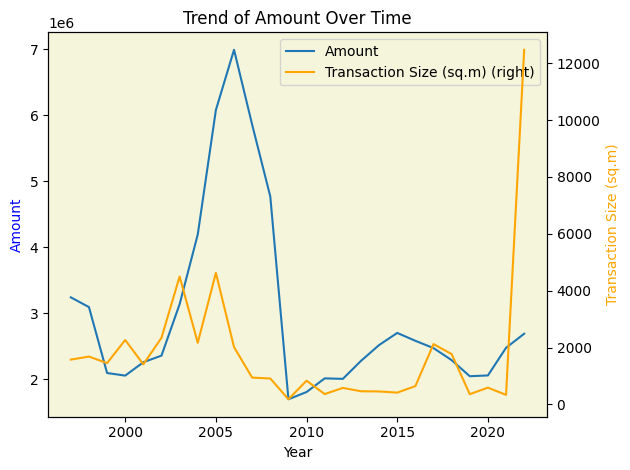

In [164]:
visualizations.plot_trends_secondary_cols(
    pipeline_imputed_sales_df, # imputed with pipeline
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


In [165]:


# Transformer for enforcing data types
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler

class TypeEnforcer(BaseEstimator, TransformerMixin):
    def __init__(self, type_map=None):
        # Use an immutable object for the parameter and convert to mutable inside
        self.type_map = type_map

    def fit(self, X, y=None):
        # No fitting required for this transformer
        return self

    def transform(self, X):
        # Ensure a deep copy of the input to avoid side effects
        X = X.copy()
        if self.type_map is not None:
            for col, expected_type in self.type_map.items():
                if col in X.columns:
                    try:
                        X[col] = X[col].astype(expected_type, errors='ignore')
                    except Exception as e:
                        print(f"Warning: Could not convert {col} to {expected_type}. Error: {e}")
                        X[col] = np.nan  # Set invalid types to NaN
        return X

# Transformer for handling out-of-range values
class OutOfRangeHandler(BaseEstimator, TransformerMixin):
    def __init__(self, ranges=None):
        # Use a new dictionary if ranges is not provided
        self.ranges = ranges if ranges is not None else {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, (min_val, max_val) in self.ranges.items():
            if col in X.columns:
                # Replace out-of-range values with NaN
                X[col] = X[col].where((X[col] >= min_val) & (X[col] <= max_val), np.nan)
        return X

# Transformer for replacing infinity values
class InfinityHandler(BaseEstimator, TransformerMixin):
    def __init__(self, replace_value=np.nan):
        self.replace_value = replace_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X.replace([np.inf, -np.inf], self.replace_value, inplace=True)
        return X

class RegressionImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fallback_strategy='mean'):
        self.fallback_strategy = fallback_strategy
        self.models = {}
        self.fallback_values = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)  # Ensure the data is a DataFrame for column handling
        for col in X.columns:
            if X[col].isnull().any():
                # Use other columns as predictors for the missing values
                predictors = X.drop(columns=[col])
                target = X[col]
                not_null_mask = ~target.isnull()
                
                # Train a regression model to predict missing values
                model = HistGradientBoostingRegressor()
                # model = LinearRegression()
                model.fit(predictors[not_null_mask], target[not_null_mask])
                self.models[col] = model

                # Store fallback value
                if self.fallback_strategy == 'mean':
                    self.fallback_values[col] = target[not_null_mask].mean()
                elif self.fallback_strategy == 'median':
                    self.fallback_values[col] = target[not_null_mask].median()
                else:
                    raise ValueError(f"Invalid fallback strategy: {self.fallback_strategy}")

        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col, model in self.models.items():
            if X[col].isnull().any():
                predictors = X.drop(columns=[col])
                missing_mask = X[col].isnull()

                # Predict missing values using the regression model
                X.loc[missing_mask, col] = model.predict(predictors[missing_mask])

                # Fill any remaining NaNs with the fallback value
                X[col].fillna(self.fallback_values[col], inplace=True)

        return X

# if outliers are a concern
def compute_percentile_ranges(df, numerical_features, lower=0.01, upper=0.99):
    ranges = {}
    for col in numerical_features:
        min_val = df[col].quantile(lower)
        max_val = df[col].quantile(upper)
        ranges[col] = (min_val, max_val)
    return ranges

# # Function to compute dynamic ranges from the dataset
def compute_dynamic_ranges(df, numerical_features):
    ranges = {}
    for col in numerical_features:
        min_val, max_val = df[col].min(), df[col].max()
        ranges[col] = (min_val, max_val)
    return ranges

def evaluate_imputation_methods(df, numerical_features, categorical_features, strategies):
    """
    Evaluate and compare imputation methods using RMSE.
    """
    # Original dataset (for comparison)
    original_df = df.copy()
    
    # Store RMSE results
    rmse_results = {}

    for strategy in strategies:
        # Create pipeline with the current imputation strategy
        pipeline = create_flexible_cleaning_pipeline_with_imputation(
            numerical_features=numerical_features,
            categorical_features=categorical_features,
            imputation_strategy=strategy,
            use_scaler=False,  # No scaling for better interpretability
        )
        
        # Fit-transform the data
        cleaned_data = pipeline.fit_transform(df)
        cleaned_df = pd.DataFrame(cleaned_data, columns=numerical_features + categorical_features)
        
        # Calculate RMSE for numerical features
        rmse = {}
        for feature in numerical_features:
            original_vals = original_df[feature].dropna()
            imputed_vals = cleaned_df.loc[original_vals.index, feature]
            rmse[feature] = np.sqrt(mean_squared_error(original_vals, imputed_vals))
        
        # Store the average RMSE across all features
        rmse_results[strategy] = np.mean(list(rmse.values()))

    # Plot RMSE results
    plt.figure(figsize=(10, 6))
    plt.bar(rmse_results.keys(), rmse_results.values(), color='skyblue')
    plt.ylabel("Average RMSE")
    plt.xlabel("Imputation Strategy")
    plt.title("Comparison of Imputation Strategies")
    plt.xticks(rotation=45)
    plt.show()

    return rmse_results

def create_flexible_cleaning_pipeline_with_imputation(
    numerical_features=None,  # Specify numerical columns or infer if None
    categorical_features=None,  # Specify categorical columns or infer if None
    num_imputation_strategy='mean',  # 'mean', 'median', 'iterative', 'regression', etc.
    cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
    use_scaler=True,
    encode=True,  # Optional encoding for categorical features
    scaler_type='standard',  # 'standard' or 'minmax'
    ranges=None,  # Custom ranges for outlier handling
):
    # Preprocessing steps for numerical features
    num_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
    ]
    
    # Add numerical imputation step based on the chosen strategy
    if num_imputation_strategy == 'mean':
        num_steps.append(('imputer', SimpleImputer(strategy='mean')))
    elif num_imputation_strategy == 'median':
        num_steps.append(('imputer', SimpleImputer(strategy='median')))
    elif num_imputation_strategy == 'iterative':
        num_steps.append(('imputer', IterativeImputer(random_state=42)))
    elif num_imputation_strategy == 'regression':
        num_steps.append(('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42)))
    else:
        raise ValueError(f"Unsupported numerical imputation strategy: {num_imputation_strategy}")
    
    # Add scaler if requested
    if use_scaler:
        scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
        num_steps.append(('scaler', scaler))

    num_preprocessor = Pipeline(steps=num_steps)

    # Preprocessing steps for categorical features
    cat_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
    ]

    # Add categorical imputation step based on the chosen strategy
    if cat_imputation_strategy == 'most_frequent':
        cat_steps.append(('imputer', SimpleImputer(strategy='most_frequent')))
    elif cat_imputation_strategy == 'KNN':
        cat_steps.append(('imputer', KNNImputer()))
    elif cat_imputation_strategy == 'iterative':
        cat_steps.append(('imputer', IterativeImputer(random_state=42)))
    else:
        raise ValueError(f"Unsupported categorical imputation strategy: {cat_imputation_strategy}")

    # Optional encoding for categorical features
    if encode:
        cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

    cat_preprocessor = Pipeline(steps=cat_steps)

    # Combine numerical and categorical preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features),
        ]
    )

    return preprocessor

# def create_flexible_cleaning_pipeline_with_imputation(
#     numerical_features,
#     categorical_features,
#     imputation_strategy='mean',  # Choose between 'mean', 'median', 'iterative', 'regression', etc.
#     use_scaler=True,
#     encode=True,  # Optional encoding for categorical features
#     scaler_type='standard',
#     ranges=None,
# ):
#     # Numerical preprocessing
#     num_steps = [
#         ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
#         ('infinity_handler', InfinityHandler()),
#         ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
#     ]
    
#     # Choose imputer
#     if imputation_strategy == 'mean':
#         num_steps.append(('imputer', SimpleImputer(strategy='mean')))
#     elif imputation_strategy == 'median':
#         num_steps.append(('imputer', SimpleImputer(strategy='median')))
#     elif imputation_strategy == 'iterative':
#         num_steps.append(('imputer', IterativeImputer(random_state=42)))
#     elif imputation_strategy == 'regression':
#         num_steps.append(('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42)))
#     else:
#         raise ValueError(f"Unsupported imputation strategy: {imputation_strategy}")

#     # Add scaler if needed
#     if use_scaler:
#         scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
#         num_steps.append(('scaler', scaler))

#     num_preprocessor = Pipeline(steps=num_steps)

#     # Categorical preprocessing
#     cat_steps = [
#         ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
#         ('imputer', SimpleImputer(strategy='most_frequent'))
#     ]
    
#     if encode:
#         cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

#     cat_preprocessor = Pipeline(steps=cat_steps)

#     # Combined preprocessing pipeline
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', num_preprocessor, numerical_features),
#             ('cat', cat_preprocessor, categorical_features)
#         ]
#     )

#     return preprocessor

def create_flexible_cleaning_pipeline(
    numerical_features,
    categorical_features,
    use_scaler=True,
    scaler_type='standard',
    ranges=None,
    use_encoding=True
):
    """
    Create a flexible cleaning pipeline with optional scaling and encoding.

    Args:
        numerical_features (list): List of numerical feature names.
        categorical_features (list): List of categorical feature names.
        use_scaler (bool): Whether to include a scaler in the pipeline.
        scaler_type (str): Type of scaler ('standard' or 'robust').
        ranges (dict): Optional range limits for outlier handling.
        use_encoding (bool): Whether to include encoding for categorical features.

    Returns:
        ColumnTransformer: A cleaning pipeline.
    """

    # Choose the scaler based on user input
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose 'standard' or 'robust'.")

    # Numerical preprocessing pipeline
    num_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('outlier_handler', OutOfRangeHandler(ranges=ranges)),  # Handle outliers
        ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values
    ]
    if use_scaler:
        num_steps.append(('scaler', scaler))  # Add scaler if use_scaler is True

    num_preprocessor = Pipeline(steps=num_steps)

    # Categorical preprocessing pipeline
    cat_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values
    ]
    if use_encoding:
        cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

    cat_preprocessor = Pipeline(steps=cat_steps)

    # Combined preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_flexible_cleaning_pipeline_options(
    numerical_features, 
    categorical_features, 
    use_scaler=False, 
    scaler_type='standard', 
    use_imputer=True, 
    use_encoding=False,
    imputer_strategy_numerical='mean', 
    imputer_strategy_categorical='most_frequent',
    ranges=None
):
    """
    Create a flexible cleaning pipeline with optional imputation and scaling.

    Args:
        numerical_features (list of str): List of numerical feature names.
        categorical_features (list of str): List of categorical feature names.
        use_scaler (bool): Whether to include a scaler in the pipeline.
        scaler_type (str): Type of scaler ('standard' or 'robust').
        use_imputer (bool): Whether to include imputation in the pipeline.
        use_encoding (bool): Whether to include encoding for categorical data.
        imputer_strategy_numerical (str): Strategy for numerical imputation ('mean', 'median', 'most_frequent').
        imputer_strategy_categorical (str): Strategy for categorical imputation ('most_frequent', etc.).
        ranges (dict): Optional range limits for outlier handling (e.g., {'col_name': (min, max)}).

    Returns:
        ColumnTransformer: A combined cleaning pipeline for preprocessing.
    """
    # Validate inputs
    if not isinstance(numerical_features, list) or not all(isinstance(f, str) for f in numerical_features):
        raise ValueError("numerical_features must be a list of strings.")
    if not isinstance(categorical_features, list) or not all(isinstance(f, str) for f in categorical_features):
        raise ValueError("categorical_features must be a list of strings.")
    
    # Choose the scaler based on user input
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose 'standard' or 'robust'.")

    # Numerical preprocessing pipeline
    num_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'float32' for col in numerical_features})),
        ('outlier_handler', OutOfRangeHandler(ranges=ranges))  # Handle outliers
    ]
    if use_imputer:
        num_steps.append(('imputer', SimpleImputer(strategy=imputer_strategy_numerical)))
    if use_scaler:
        num_steps.append(('scaler', scaler))

    num_preprocessor = Pipeline(steps=num_steps)

    # Categorical preprocessing pipeline
    cat_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'category' for col in categorical_features}))
    ]
    if use_imputer:
        cat_steps.append(('imputer', SimpleImputer(strategy=imputer_strategy_categorical)))
    if use_encoding:
        cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

    cat_preprocessor = Pipeline(steps=cat_steps)

    # Combined preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_pipeline_with_iterative_imputer(numerical_features, categorical_features, ranges=None):
    # Numerical preprocessing with IterativeImputer for fallback
    num_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('outlier_handler', OutOfRangeHandler(ranges=ranges)),
        ('mean_imputer', SimpleImputer(strategy='mean')),  # Primary imputation
        ('iterative_imputer', IterativeImputer(max_iter=10, random_state=42)),  # Fallback
        # ('scaler', RobustScaler())
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing remains unchanged
    cat_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Combine numerical and categorical preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_advanced_cleaning_pipeline(numerical_features, categorical_features, type_map=None, ranges=None):
    # Numerical preprocessing with KNNImputer
    num_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
        ('imputer', KNNImputer(n_neighbors=5)),  # KNN for imputing numerical features
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing with IterativeImputer
    cat_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', IterativeImputer(max_iter=10, random_state=42)),  # Iterative imputer for categorical features
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Combined pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_pipeline_with_regression_imputer(numerical_features, categorical_features, ranges=None):
    # Numerical preprocessing with RegressionImputer
    num_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
        ('imputer', RegressionImputer(fallback_strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing remains unchanged
    cat_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Combine numerical and categorical preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_categorical_pipeline(imputer=None, encoder=None):
    imputer = SimpleImputer(strategy='most_frequent')
    # imputer = SimpleImputer(strategy='most_frequent')
    # imputer = imputer or IterativeImputer(max_iter=10), 
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    return Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map=None)),  # Default to object
        ('imputer', imputer),
        ('encoder', encoder)
    ])

def create_numerical_pipeline(ranges=None, imputer=None, scaler=None):
    imputer = SimpleImputer(strategy='mean')
    # regressor = LinearRegression()
    # imputer = imputer or KNNImputer(n_neighbors=5),  # Or use IterativeImputer(max_iter=10)
    # scaler = scaler or StandardScaler()

    return Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map=None)),  # Default to float
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
        ('imputer', imputer),
        # ('regressor', regressor),
        # ('scaler', scaler)
    ])
    
def compute_scaled_ranges(df, numerical_features, lower=0.01, upper=0.99):
    if not isinstance(numerical_features, list) or not all(isinstance(col, str) for col in numerical_features):
        raise ValueError("numerical_features must be a list of column names (strings).")
    
    ranges = {}
    for col in numerical_features:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is not in the DataFrame.")
        
        min_val = df[col].quantile(lower)
        max_val = df[col].quantile(upper)
        ranges[col] = (min_val, max_val)
    return ranges

def convert_to_original_types(df, numerical_columns, categorical_columns):
    # Convert numerical columns back to their original types (e.g., float or int)
     
    # If the column is 'Amount' or other financial fields, try converting to float
    fins_cols = ['Amount', 'Contract Amount','Annual Amount','Annual Rental Price',
                     'Sale Price','Rental Price','Annual Rental Price']
        
    for col in numerical_columns:
        if col in fins_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle other numerical columns
    
    # Convert categorical columns back to category
    for col in categorical_columns:
        df[col] = df[col].astype('category')
    
    return df


# ranges = compute_dynamic_ranges(property_rental_transactions_df, numerical_features)
rent_ranges =  compute_dynamic_ranges(property_rental_transactions_df, rent_numerical_cols) 
sales_ranges = compute_dynamic_ranges(sales_transactions_df, sales_numerical_cols) # sales only

def create_combined_pipeline(numerical_features, categorical_features, ranges=None):
    # Create individual pipelines
    num_pipeline = create_numerical_pipeline(ranges=ranges)
    cat_pipeline = create_categorical_pipeline()

    # Combine pipelines into a ColumnTransformer
    return ColumnTransformer(
        transformers=[
            ('num', num_pipeline, numerical_features),
            ('cat', cat_pipeline, categorical_features)
        ]
    )


In [166]:
property_rental_transactions_df['Property Type'].unique()

['Building', 'Unit', 'Land', 'Virtual Unit', 'Villa']
Categories (5, object): ['Building', 'Land', 'Unit', 'Villa', 'Virtual Unit']

In [167]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Parking', 'No of Units', 'Project',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [168]:
# Define features
    
# Create combined pipeline
# cleaning_pipeline = create_pipeline_with_iterative_imputer(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     ranges=ranges
# )  


# pipeline_without_imputation = create_flexible_cleaning_pipeline(
#    numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Disable scaling
#     use_imputer=False  # Disable imputation
# )

# rent_pipeline_unencoded = create_flexible_cleaning_pipeline(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Enable scaling
#     scaler_type='robust'  # Use RobustScaler
# )  

# Create pipelines
# rent_pipeline_unencoded = create_flexible_cleaning_pipeline_options(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Enable scaling
#     scaler_type='standard',  # Use StandardScaler
#     use_imputer=True,  # Enable imputation
#     use_encoding=False,
#     imputer_strategy_numerical='median',  # Median for numerical
#     imputer_strategy_categorical='most_frequent',  # Mode for categorical
#     ranges=None
# )
# sales_pipeline_unencoded  = create_flexible_cleaning_pipeline_options(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Enable scaling
#     scaler_type='standard',  # Use StandardScaler
#     use_imputer=True,  # Enable imputation
#     use_encoding=False,
#     imputer_strategy_numerical='median',  # Median for numerical
#     imputer_strategy_categorical='most_frequent',  # Mode for categorical
#     ranges=None
# )

# rent_pipeline_unencoded = create_flexible_cleaning_pipeline(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Disable scaling
#     ranges=None,
#     use_encoding=False
# )
# sales_pipeline_unencoded = create_flexible_cleaning_pipeline(
#     numerical_features=sales_num_cols_to_impute,
#     categorical_features=sales_cat_cols_to_impute,
#     use_scaler=False,  # Disable scaling
#     ranges=None,
#     use_encoding=False
    
# )


#  With encoding and scaling
# pipeline_with_encoding = create_flexible_cleaning_pipeline(
#     numerical_features=sales_num_cols_to_impute,
#     categorical_features=sales_cat_cols_to_impute,
#     use_scaler=True,
#     scaler_type='standard',
#     use_encoding=True
# )

# #  Without encoding
# pipeline_without_encoding = create_flexible_cleaning_pipeline(
#     numerical_features=sales_num_cols_to_impute,
#     categorical_features=sales_cat_cols_to_impute,
#     use_scaler=True,
#     scaler_type='robust',
#     use_encoding=False
# )


    
# assert isinstance(property_rental_transactions_df, pd.DataFrame), "Input is not a DataFrame"
# assert all(col in property_rental_transactions_df.columns for col in numerical_features), "Some columns are missing"
   

# # Transform the data
# cleaned_property_rental_transactions_df = cleaning_pipeline.fit_transform(property_rental_transactions_df)
# cleaned_scaled_df = pipeline_scaled.fit_transform(df)
# rent_unencode_df = rent_pipeline_unencoded.fit_transform(rent_df)
# sales_unencoded_df = sales_pipeline_unencoded.fit_transform(sales_df)

# rent_feature_names = rent_num_cols_to_impute + rent_cat_cols_to_impute
# sales_feature_names = sales_num_cols_to_impute + sales_cat_cols_to_impute


# Convert back to DataFrame for analysis
# cleaned_rent_df = pd.DataFrame(cleaned_propeunrty_rental_transactions_df, columns=feature_names, index=property_rental_transactions_df.index)
# scaled_rent_df = pd.DataFrame(cleaned_scaled_df, columns=feature_names, index=df.index)
# unencoded_rent_df = pd.DataFrame(rent_unencode_df, columns=rent_feature_names, index=rent_df.index)
# unencoded_sales_df = pd.DataFrame(sales_unencoded_df, columns=sales_feature_names, index=sales_df.index)

# unencoded_rent_df.isnull().mean() * 100

# Use cleaned data in model training
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', cleaning_pipeline),
#     ('regressor', LGBMRegressor())
# ])

# model_pipeline.fit(X_cleaned, y_train)



In [169]:
print('transaction categories from transaction types:',property_transactions_df['Transaction Type'].unique().tolist())
print('transaction categories from transaction sub types:',property_transactions_df['Transaction sub type'].unique().tolist())

print('transaction categories from transaction types(sales only):',pipeline_imputed_sales_df['Transaction Type'].unique().tolist())
print('transaction categories from transaction sub types(sales only):',pipeline_imputed_sales_df['Transaction sub type'].unique().tolist())

transaction categories from transaction types: ['Mortgage', 'Sales', 'Gifts']
transaction categories from transaction sub types: ['Mortgage Registration', 'Modify Mortgage', 'Sale', 'Sell - Pre registration', 'Sell Development', 'Grant Pre-Registration', 'Grant', 'Delayed Sell', 'Development Registration', 'Lease to Own Registration', 'Delayed Mortgage', 'Portfolio Mortgage Registration', 'Lease Finance Registration', 'Development Mortgage', 'Mortgage Pre-Registration', 'Grant on Delayed Sell', 'Modify Development Mortgage', 'Development Registration Pre-Registration', 'Delayed Development', 'Lease to Own Modify', 'Portfolio Mortgage Modification', 'Grant Development', 'Delayed Sell Lease to Own Registration', 'Lease Finance Modification', 'Adding Land By Sell', 'Sell Development - Pre Registration', 'Delayed Sell Development', 'Transfer Development Mortgage', 'Lease to Own on Development Registration', 'Portfolio Mortgage Development Registration', 'Portfolio Mortgage Modification Pre

In [170]:

# def detect_mixed_and_abnormal_types(df, threshold=0.01):
#     """
#     Detects mixed data types and abnormal values in a DataFrame.

#     Parameters:
#     - df (pd.DataFrame): The DataFrame to analyze.
#     - threshold (float): Proportion of rows with abnormal types or values for flagging a column (default: 0.01).

#     Returns:
#     - pd.DataFrame: A summary of detected issues in the dataset.
#     """
#     results = []

#     for col in df.columns:
#         # Identify mixed types
#         mixed_types = df[col].apply(type).nunique() > 1

#         # Check for abnormal types (non-numeric in numeric columns, etc.)
#         if pd.api.types.is_numeric_dtype(df[col]):
#             abnormal_types = df[col].apply(lambda x: not isinstance(x, (int, float)) and x is not np.nan).sum()
#         elif pd.api.types.is_string_dtype(df[col]):
#             abnormal_types = df[col].apply(lambda x: not isinstance(x, str) and x is not np.nan).sum()
#         else:
#             abnormal_types = 0

#         abnormal_types_percent = abnormal_types / len(df)

#         # Detect abnormal values (extreme outliers)
#         if pd.api.types.is_numeric_dtype(df[col]):
#             q1 = df[col].quantile(0.25)
#             q3 = df[col].quantile(0.75)
#             iqr = q3 - q1
#             lower_bound = q1 - 1.5 * iqr
#             upper_bound = q3 + 1.5 * iqr
#             abnormal_values = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
#             abnormal_values_percent = abnormal_values / len(df)
#         else:
#             abnormal_values = 0
#             abnormal_values_percent = 0

#         # Append results
#         results.append({
#             "Column": col,
#             "Mixed Types": mixed_types,
#             "Abnormal Types Count": abnormal_types,
#             "Abnormal Types (%)": abnormal_types_percent * 100,
#             "Abnormal Values Count": abnormal_values,
#             "Abnormal Values (%)": abnormal_values_percent * 100,
#         })

#     # Create a summary DataFrame
#     results_df = pd.DataFrame(results)
#     flagged_columns = results_df[
#         (results_df["Mixed Types"]) |
#         (results_df["Abnormal Types (%)"] > threshold * 100) |
#         (results_df["Abnormal Values (%)"] > threshold * 100)
#     ]
    
#     return results_df, flagged_columns

# # Detect mixed and abnormal types/values
full_report, flagged = data_processor.detect_mixed_and_abnormal_types(sales_transactions_df)
flagged

Column  Mixed Types  Abnormal Types Count  \
2               Property ID        False                     0   
11                   Amount        False                     0   
12  Transaction Size (sq.m)        False                     0   
13     Property Size (sq.m)        False                     0   
15                  Parking         True                     0   
19             No. of Buyer        False                     0   
20            No. of Seller        False                     0   
25                     Hour        False                     0   

    Abnormal Types (%)  Abnormal Values Count  Abnormal Values (%)  
2                  0.0                 106625            15.100638  
11                 0.0                  59154             8.377614  
12                 0.0                  91539            12.964101  
13                 0.0                 101554            14.382464  
15                 0.0                      0             0.000000  
19                 0.0                 128361            18.178973  
20                 0.0                  67224             9.520518  
25                 0.0                  89029            12.608625

- Parking has mixed types
- convert Parking from Object to numeric


In [171]:
print('Parking Dtype for sales Before:', sales_transactions_df['Parking'].dtype)

sales_transactions_df['Parking'] = pd.to_numeric(sales_transactions_df['Parking'], errors='coerce')

print('Parking Dtype for sales After:', sales_transactions_df['Parking'].dtype)

Parking Dtype for sales Before: object
Parking Dtype for sales After: float64


In [172]:
# sales_transactions_df.select_dtypes(exclude='number')
# property_transactions_df['Property ID'].unique()

In [173]:
# Define numerical and categorical features
rentals_num_cols_to_impute = ['Parking', 'Property Size (sq.m)', 'Number of Rooms','Annual Amount', 'Contract Amount']
rentals_cat_cols_to_impute = ['Is Free Hold?','Property Type','Nearest Metro', 'Usage','Area','Property Sub Type','Nearest Mall','Nearest Landmark']

sales_num_cols_to_impute = ['Parking','Property Size (sq.m)','No. of Buyer','No. of Seller','Transaction Size (sq.m)','Amount']
sales_cat_cols_to_impute = ['Usage','Transaction Date','Property Sub Type','Room(s)','Nearest Metro','Nearest Mall','Nearest Landmark']

rentals_df = property_rental_transactions_df.copy()
sales_df = sales_transactions_df.copy() # sales only
# sales_df = property_transactions_df.copy() # entire dataset with others like Mortgage','Gifts',etc

sales_pipeline = create_flexible_cleaning_pipeline_with_imputation(
    numerical_features=sales_num_cols_to_impute,
    categorical_features=sales_cat_cols_to_impute,
    num_imputation_strategy='regression',  # Choose between 'mean', 'median', 'iterative', 'regression', etc.
    cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
    use_scaler=False,
    encode=False,  # Optional encoding for categorical features
    scaler_type='standard',
    ranges=None,
)
rentals_pipeline = create_flexible_cleaning_pipeline_with_imputation(
    numerical_features=rentals_num_cols_to_impute,
    categorical_features=rentals_cat_cols_to_impute,
    num_imputation_strategy='regression',  # Choose between 'mean', 'median', 'iterative', 'regression', etc.
    cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
    use_scaler=False,
    encode=False,  # Optional encoding for categorical features
    scaler_type='standard',
    ranges=None,
)

# # Transform the data
median_mode_sales_transform = sales_pipeline.fit_transform(sales_df)
median_mode_rentals_transform = rentals_pipeline.fit_transform(rentals_df)

sales_feature_names = sales_num_cols_to_impute + sales_cat_cols_to_impute
rentals_feature_names = rentals_num_cols_to_impute + rentals_cat_cols_to_impute


# Convert back to DataFrame for analysis
median_mode_sales_df = pd.DataFrame(median_mode_sales_transform, columns=sales_feature_names, index=sales_df.index)
median_mode_rentals_df = pd.DataFrame(median_mode_rentals_transform, columns=rentals_feature_names, index=rentals_df.index)

# Retain the non-imputed columns in the original dataset
sales_remaining_columns = [col for col in sales_df.columns if col not in sales_feature_names]
rentals_remaining_columns = [col for col in rentals_df.columns if col not in rentals_feature_names]

median_mode_sales_df = pd.concat([median_mode_sales_df[sales_feature_names], sales_df[sales_remaining_columns]], axis=1)
median_mode_rentals_df = pd.concat([median_mode_rentals_df[rentals_feature_names], rentals_df[rentals_remaining_columns]], axis=1)

# Apply the conversion function
full_sales_df = convert_to_original_types(median_mode_sales_df, sales_num_cols_to_impute, sales_cat_cols_to_impute)
full_rentals_df = convert_to_original_types(median_mode_rentals_df, rentals_num_cols_to_impute, rentals_cat_cols_to_impute)


rentals_cols_to_drop = ['Number of Rooms','Project', 'Start Date', 'End Date', 'Property ID', 'Version', 'Registration Date']

# Drop columns if they exist in the DataFrame
columns_to_drop = [col for col in rentals_cols_to_drop if col in full_rentals_df.columns]

if columns_to_drop:  # Only drop if there are columns to drop
    full_rentals_df.drop(columns=columns_to_drop, inplace=True)


if 'Project' in full_sales_df.columns:
  full_sales_df.drop(columns='Project', inplace=True)  

full_sales_df.drop_duplicates(inplace=True)
full_sales_df = data_processor.optimize_dataframe_memory(full_sales_df)
data_processor.display_dataframe_info(full_sales_df)
print("-"*50)
full_rentals_df.drop_duplicates(inplace=True)
full_rentals_df = data_processor.optimize_dataframe_memory(full_rentals_df)
data_processor.display_dataframe_info(full_rentals_df)

Original memory usage: 92.96 MB
Optimized memory usage: 78.82 MB
Shape: (706096, 25)
Dtypes: ['Parking:float64', 'Property Size (sq.m):float64', 'No. of Buyer:float32', 'No. of Seller:float32', 'Transaction Size (sq.m):float64', 'Amount:float64', 'Usage:category', 'Transaction Date:category', 'Property Sub Type:category', 'Room(s):category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Transaction Number:object', 'Property ID:int32', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Area:category', 'Property Type:category', 'Year:datetime64[ns]', 'Month:int8', 'Day:int8', 'Hour:int8']
Missings (%): ['Parking:0.00%', 'Property Size (sq.m):0.00%', 'No. of Buyer:0.00%', 'No. of Seller:0.00%', 'Transaction Size (sq.m):0.00%', 'Amount:0.00%', 'Usage:0.00%', 'Transaction Date:0.00%', 'Property Sub Type:0.00%', 'Room(s):0.00%', 'Nearest Metro:0.00%', 'Nearest Mall:0.00%', 'Nearest Landmark

Parking  Property Size (sq.m)  Annual Amount  Contract Amount  \
0  0.973568          14965.687721         5000.0          25000.0   
1  0.972854           6792.000000      4000000.0       16000000.0   

  Is Free Hold? Property Type            Nearest Metro        Usage  \
0     Free Hold      Building  Rashidiya Metro Station   Industrial   
1     Free Hold      Building  Rashidiya Metro Station  Residential   

                           Area Property Sub Type Nearest Mall  \
0  Dubai Investment Park Second           Factory   Dubai Mall   
1                Um Nahad Third          Building   Dubai Mall   

              Nearest Landmark  Ejari Contract Number  No of Units  Year  \
0               Expo 2020 Site        120210425000238            1  2021   
1  Dubai International Airport        120210526001582            1  2021   

   Month  Day  Hour  
0      4   25     9  
1      5   26    12

In [174]:
full_rentals_df.isnull().mean() * 100

Parking                  0.0
Property Size (sq.m)     0.0
Annual Amount            0.0
Contract Amount          0.0
Is Free Hold?            0.0
Property Type            0.0
Nearest Metro            0.0
Usage                    0.0
Area                     0.0
Property Sub Type        0.0
Nearest Mall             0.0
Nearest Landmark         0.0
Ejari Contract Number    0.0
No of Units              0.0
Year                     0.0
Month                    0.0
Day                      0.0
Hour                     0.0
dtype: float64

In [175]:
# 'Start Date','End Date','Property ID','Version','Registration Date'

In [176]:
# def introduce_missingness(df, numerical_columns, missing_fraction=0.2, random_state=42):
#     np.random.seed(random_state)
#     df_missing = df.copy()
#     for col in numerical_columns:
#         n_missing = int(missing_fraction * len(df))
#         missing_indices = np.random.choice(df.index, n_missing, replace=False)
#         df_missing.loc[missing_indices, col] = np.nan
#     return df_missing


# Assess the performance of imputation
def introduce_missingness(df, cols, missing_fraction=0.2):
    df_with_missing = df.copy()
    for col in cols:
        missing_indices = df_with_missing.sample(frac=missing_fraction, random_state=42).index
        df_with_missing.loc[missing_indices, col] = np.nan
    return df_with_missing


# Define numerical features and strategies``
numerical_features = sales_num_cols_to_impute
categorical_features = sales_cat_cols_to_impute

num_imputation_strategies = ['mean', 'median', 'iterative', 'regression']

cat_imputation_strategies = ['most_frequent', 'KNN', 'iterative']

# Introduce missingness
df_num_missing = introduce_missingness(sales_df, numerical_features, missing_fraction=0.2)

  

In [177]:
# from sklearn.metrics import mean_absolute_error, accuracy_score

# def create_flexible_cleaning_pipeline_with_imputation(
#     numerical_features=None,  # Specify numerical columns or infer if None
#     categorical_features=None,  # Specify categorical columns or infer if None
#     num_imputation_strategy='mean',  # 'mean', 'median', 'iterative', 'regression', etc.
#     cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
#     use_scaler=True,
#     encode=True,  # Optional encoding for categorical features
#     scaler_type='standard',  # 'standard' or 'minmax'
#     ranges=None,  # Custom ranges for outlier handling
# ):
#     transformers = []

#     # Add numerical preprocessing if numerical_features is specified
#     if numerical_features:
#         num_steps = [
#             ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
#             ('infinity_handler', InfinityHandler()),
#             ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
#         ]
#         if num_imputation_strategy == 'mean':
#             num_steps.append(('imputer', SimpleImputer(strategy='mean')))
#         elif num_imputation_strategy == 'median':
#             num_steps.append(('imputer', SimpleImputer(strategy='median')))
#         elif num_imputation_strategy == 'iterative':
#             num_steps.append(('imputer', IterativeImputer(random_state=42)))
#         elif num_imputation_strategy == 'regression':
#             num_steps.append(('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42)))
#         else:
#             raise ValueError(f"Unsupported numerical imputation strategy: {num_imputation_strategy}")

#         if use_scaler:
#             scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
#             num_steps.append(('scaler', scaler))

#         transformers.append(('num', Pipeline(steps=num_steps), numerical_features))

#     # Add categorical preprocessing if categorical_features is specified
#     if categorical_features:
#         cat_steps = [
#             ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
#         ]
#         if cat_imputation_strategy == 'most_frequent':
#             cat_steps.append(('imputer', SimpleImputer(strategy='most_frequent')))
#         elif cat_imputation_strategy == 'KNN':
#             cat_steps.append(('imputer', KNNImputer()))
#         elif cat_imputation_strategy == 'iterative':
#             cat_steps.append(('imputer', IterativeImputer(random_state=42)))
#         else:
#             raise ValueError(f"Unsupported categorical imputation strategy: {cat_imputation_strategy}")

#         if encode:
#             cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

#         transformers.append(('cat', Pipeline(steps=cat_steps), categorical_features))

#     # Combine numerical and categorical transformers
#     preprocessor = ColumnTransformer(transformers=transformers)

#     return preprocessor

# # Update the evaluation function
# def eval_cat_imputation_strategies(df_original, df_missing, categorical_features, strategies):
#     cat_results = []
#     for strategy in strategies:
#         # Create pipeline for the current strategy
#         pipeline = create_flexible_cleaning_pipeline_with_imputation(
#             numerical_features=[],  # No numerical features
#             categorical_features=categorical_features,
#             num_imputation_strategy=None,  # Skip numerical imputation
#             cat_imputation_strategy=strategy,
#             use_scaler=False,
#             encode=True,  # Enable encoding for categorical features
#         )

#         # Impute missing values
#         df_imputed = pipeline.fit_transform(df_missing)
#         df_imputed = pd.DataFrame(df_imputed, columns=categorical_features, index=df_missing.index)

#         # Ensure categorical data types are strings for proper evaluation
#         original_cat = df_original[categorical_features].apply(lambda col: col.astype(str))
#         imputed_cat = df_imputed.apply(lambda col: col.astype(str))

#         # Evaluate each column
#         for col in categorical_features:
#             original_values = original_cat[col].dropna()
#             imputed_values = imputed_cat.loc[original_values.index, col]

#             # Calculate metrics
#             mae = mean_absolute_error(original_values, imputed_values)
#             mse = mean_squared_error(original_values, imputed_values)
#             accuracy = accuracy_score(original_values, imputed_values)

#             # Store results
#             cat_results.append({
#                 'Feature': col,
#                 'Strategy': strategy,
#                 'MAE': mae,
#                 'MSE': mse,
#                 'Accuracy': accuracy
#             })

#     return pd.DataFrame(cat_results)

# # Visualize errors for categorical imputation
# def plot_cat_imputation_errors(results_df):
#     # Plot MAE
#     sns.barplot(data=results_df, x='Feature', y='MAE', hue='Strategy', ci=None)
#     plt.title('Mean Absolute Error (MAE) for Categorical Imputation Strategies')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

#     # Plot MSE
#     sns.barplot(data=results_df, x='Feature', y='MSE', hue='Strategy', ci=None)
#     plt.title('Mean Squared Error (MSE) for Categorical Imputation Strategies')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

#     # Plot Accuracy
#     sns.barplot(data=results_df, x='Feature', y='Accuracy', hue='Strategy', ci=None)
#     plt.title('Accuracy for Categorical Imputation Strategies')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# # Introduce missingness into categorical features
# df_cat_missing = introduce_missingness(sales_df, categorical_features, missing_fraction=0.2)

# # Evaluate categorical imputation strategies
# cat_results = eval_cat_imputation_strategies(
#     df_original=sales_df,
#     df_missing=df_cat_missing,
#     categorical_features=categorical_features,
#     strategies=cat_imputation_strategies
# )

# # Visualize the results
# plot_cat_imputation_errors(cat_results)


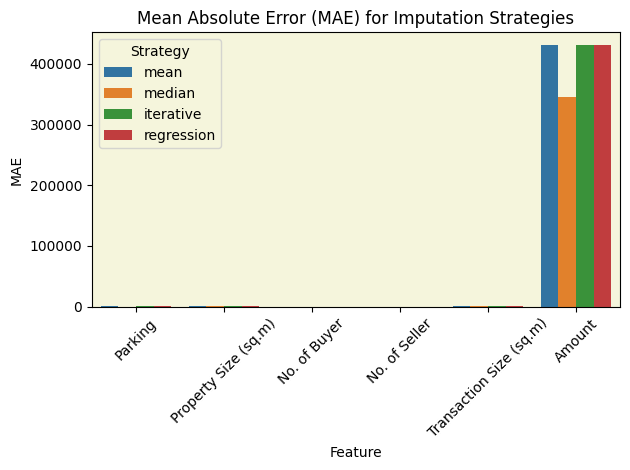

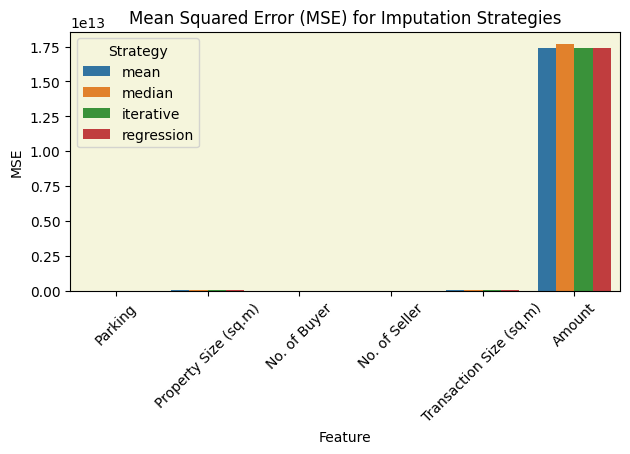

In [178]:

# Evaluate numerical imputation strategies
from sklearn.metrics import mean_absolute_error


def eval_num_imputation_strategies(df_original, df_missing, numerical_features, strategies):
    results = []
    for strategy in strategies:
        # Create pipeline for the current strategy
        pipeline = create_flexible_cleaning_pipeline_with_imputation(
            numerical_features=numerical_features,
            categorical_features=[],  # No categorical features for this evaluation
            num_imputation_strategy=strategy,
            use_scaler=False,
            encode=False
        )
        # Impute missing values
        df_imputed = pipeline.fit_transform(df_missing)
        df_imputed = pd.DataFrame(df_imputed, columns=numerical_features, index=df_missing.index)

        # Calculate errors for each column
        for col in numerical_features:
            original = df_original[col].dropna()
            imputed = df_imputed.loc[original.index, col]
            mae = mean_absolute_error(original, imputed)
            mse = mean_squared_error(original, imputed)
            results.append({'Strategy': strategy, 'Feature': col, 'MAE': mae, 'MSE': mse})
    return pd.DataFrame(results)

# Plot imputation errors
def plot_num_imputation_errors(results_df):
    sns.barplot(data=results_df, x='Feature', y='MAE', hue='Strategy', ci=None)
    plt.title('Mean Absolute Error (MAE) for Imputation Strategies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
    sns.barplot(data=results_df, x='Feature', y='MSE', hue='Strategy', ci=None)
    plt.title('Mean Squared Error (MSE) for Imputation Strategies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Evaluate strategies
num_results = eval_num_imputation_strategies(sales_df, df_num_missing, numerical_features, num_imputation_strategies)

# Visualize results
plot_num_imputation_errors(num_results)



In [179]:
print("Imputation Performance:")
pd.DataFrame(data=num_results)

Imputation Performance:


Strategy                  Feature            MAE           MSE
0         mean                  Parking      67.244535  3.196813e+06
1         mean     Property Size (sq.m)     487.912869  7.276593e+09
2         mean             No. of Buyer       0.106723  8.385069e+00
3         mean            No. of Seller       0.102716  8.507626e+00
4         mean  Transaction Size (sq.m)     522.928800  8.601101e+09
5         mean                   Amount  430657.532107  1.741047e+13
6       median                  Parking      39.050273  3.204389e+06
7       median     Property Size (sq.m)     232.527546  7.276802e+09
8       median             No. of Buyer       0.066122  8.400168e+00
9       median            No. of Seller       0.058522  8.519573e+00
10      median  Transaction Size (sq.m)     276.664130  8.601448e+09
11      median                   Amount  345677.316016  1.769784e+13
12   iterative                  Parking      83.367944  3.199185e+06
13   iterative     Property Size (sq.m)     487.912869  7.276593e+09
14   iterative             No. of Buyer       0.106723  8.385069e+00
15   iterative            No. of Seller       0.102716  8.507626e+00
16   iterative  Transaction Size (sq.m)     462.060290  8.601092e+09
17   iterative                   Amount  430657.532107  1.741047e+13
18  regression                  Parking     102.818837  3.206593e+06
19  regression     Property Size (sq.m)     487.912869  7.276593e+09
20  regression             No. of Buyer       0.106723  8.385069e+00
21  regression            No. of Seller       0.102716  8.507626e+00
22  regression  Transaction Size (sq.m)     461.841134  8.601092e+09
23  regression                   Amount  430657.532107  1.741047e+13

**Imputation performance based on the used metrics:**

---

1. **MAE (Mean Absolute Error)**:
   - **`median`** generally performs better (lower MAE) across most features, especially for `Parking`, `Property Size (sq.m)`, and `Transaction Size (sq.m)`.
   - **`mean`** has reasonable performance for simpler distributions but struggles with outliers (e.g., `Amount`).
   - **`iterative`** performs better for smaller features like `No. of Buyer` and `No. of Seller`.
   - **`regression`** achieves lower errors for complex features like `Property Size (sq.m)` but struggles with high-variance features like `Amount`.

2. **MSE (Mean Squared Error)**:
   - The MSE increases large errors, confirming issues with `iterative` and `regression` methods for `Transaction Size (sq.m)` and `Amount`.
   - **`median`**  achieves the lowest MSE for high-variance features, consistently, making it very robust to outliers.

3. **Feature-Wise Analysis**:
   - For simpler numeric features (e.g., `No. of Buyer`, `No. of Seller`), all methods perform similarly.
   - For high-variance features (e.g., `Amount`, `Transaction Size (sq.m)`), **`median`** shows superior performance, while **`regression`** sometimes overfits or struggles with variability.

---

- **`Median`** imputation should be used for features with high variance or outliers, as it is robust and achieves lower errors for these cases.
- Use **`iterative`** imputation for smaller-scale or less variable features like `No. of Buyer` or `No. of Seller`.
- **`Regression`** should be avoided for high-variance features like `Amount` unless explicitly modeling relationships.
- **`Mean`** imputation can serve as a baseline but is generally less effective than other strategies.

---


In [180]:
full_rentals_df['Usage'].unique()

['Industrial', 'Residential', 'Educational facility', 'Commercial', 'Health Facility', 'Tourist origin', 'Storage', 'Agriculture', 'Industrial / Commercial', 'Residential / Commercial']
Categories (10, object): ['Agriculture', 'Commercial', 'Educational facility', 'Health Facility', ..., 'Residential', 'Residential / Commercial', 'Storage', 'Tourist origin']

`Confirm the imputation by plots`

1. Rentals

In [181]:
# full_median_mode_rentals_df.columns
property_rental_transactions_df[['Annual Amount', 'Annual Amount']].isnull().mean() * 100

Annual Amount    5.886351
Annual Amount    5.886351
dtype: float64

<Figure size 1400x400 with 0 Axes>

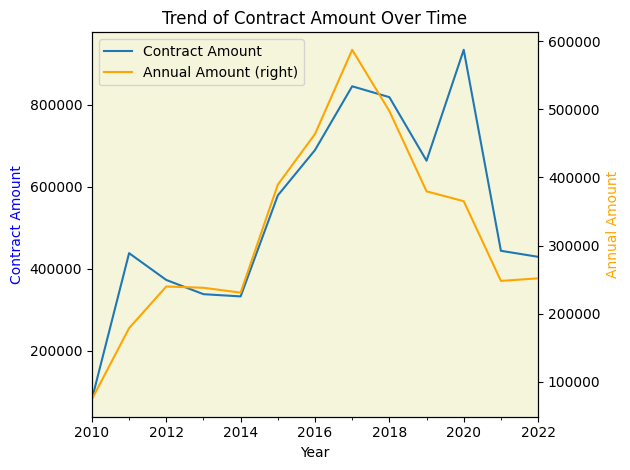

In [182]:
visualizations.plot_trends_secondary_cols(
    property_rental_transactions_df, # Original
    main_col='Contract Amount', 
    time_col='Year', 
    # time_col='Registration Date', 
    secondary_col='Annual Amount'
)

# There were missingness in the original datasets so we dont expect much res

<Figure size 1400x400 with 0 Axes>

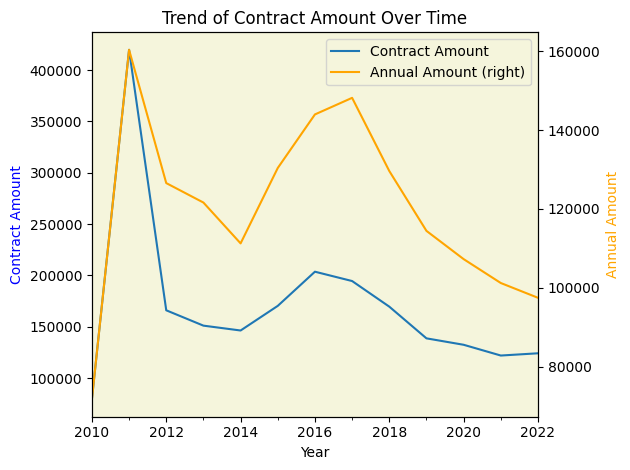

In [183]:
visualizations.plot_trends_secondary_cols(
    full_rentals_df, # Imputed with median and mode pipeline
    main_col='Contract Amount', 
    time_col='Year', 
    # time_col='Registration Date', 
    secondary_col='Annual Amount'
)

In [184]:
property_transactions_df[['Amount', 'Transaction Size (sq.m)']].isnull().mean() * 100

Amount                      0.00000
Transaction Size (sq.m)    12.62351
dtype: float64

<Figure size 1400x400 with 0 Axes>

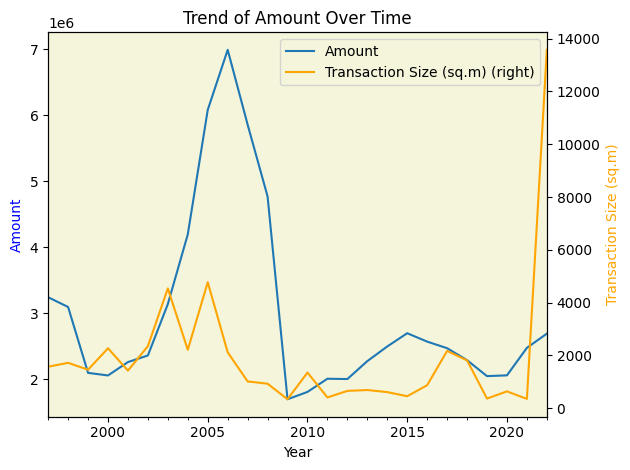

In [185]:
visualizations.plot_trends_secondary_cols(
    sales_transactions_df, # sales before imputation with mean, mode
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)

<Figure size 1400x400 with 0 Axes>

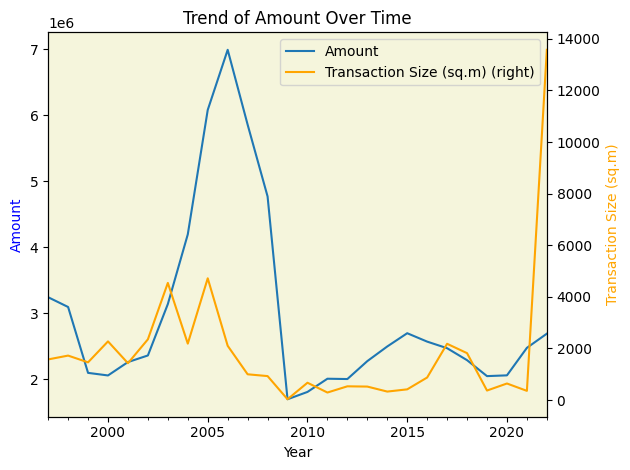

In [186]:
visualizations.plot_trends_secondary_cols(
    full_sales_df, # sales after imputation with mean, mode
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)

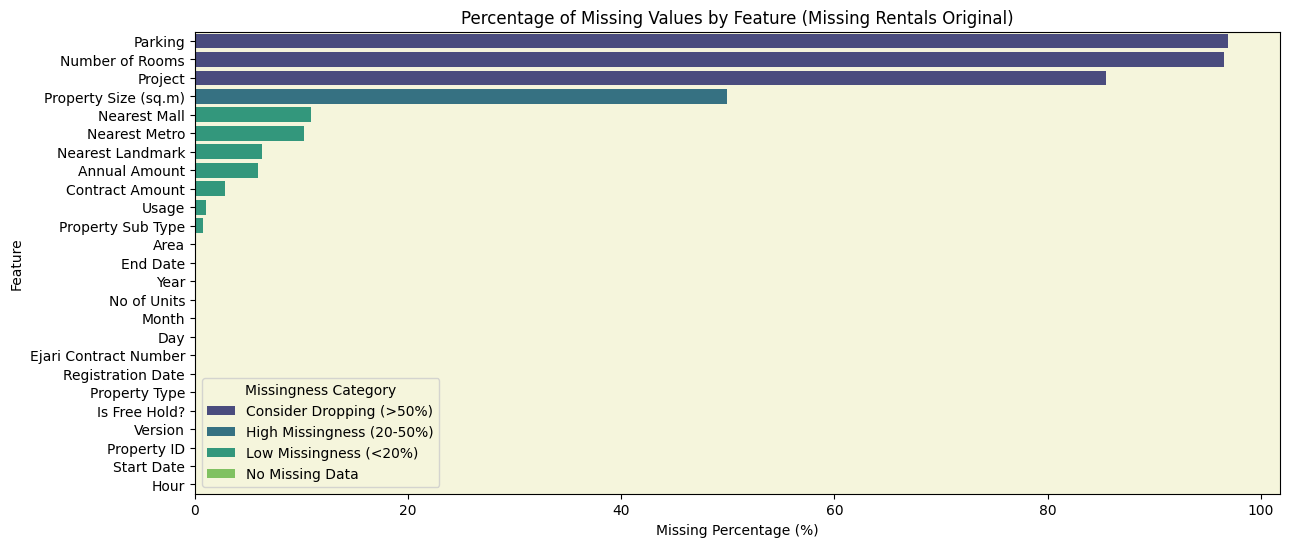

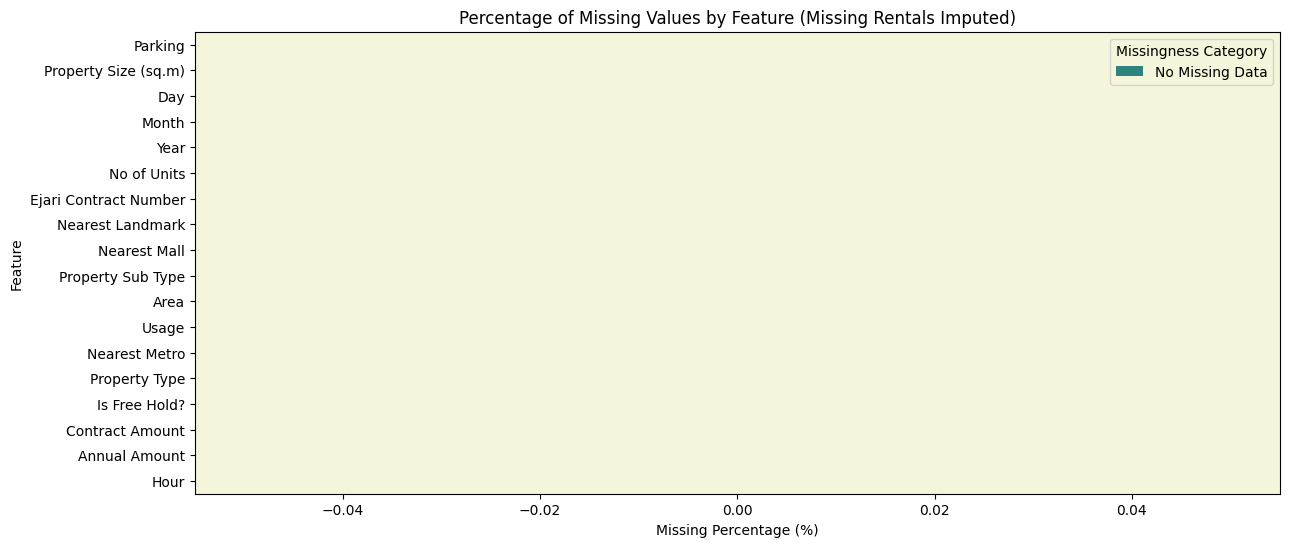

Missing Rentals Original
                                     Feature  MissingPercent  \
Parking                              Parking       96.926499   
Number of Rooms              Number of Rooms       96.526518   
Project                              Project       85.483821   
Property Size (sq.m)    Property Size (sq.m)       49.951106   
Nearest Mall                    Nearest Mall       10.940906   
Nearest Metro                  Nearest Metro       10.267712   
Nearest Landmark            Nearest Landmark        6.336231   
Annual Amount                  Annual Amount        5.886351   
Contract Amount              Contract Amount        2.852693   
Usage                                  Usage        1.008318   
Property Sub Type          Property Sub Type        0.731851   
Area                                    Area        0.005943   
End Date                            End Date        0.000037   
Year                                    Year        0.000000   
No of Units    

In [187]:
missing_property_rental_transactions_df = visualizations.visualize_missing_values(
    df=property_rental_transactions_df,
    title="Percentage of Missing Values by Feature (Missing Rentals Original)"
)
# cleaned_missing_property_rental_transactions_df = visualize_missing_values(
missing_rentals_imputed_df = visualizations.visualize_missing_values(
    df=full_rentals_df,
    # df=unencoded_rent_df,
    title="Percentage of Missing Values by Feature (Missing Rentals Imputed)"
)
# Display the summary DataFrame
print("Missing Rentals Original")
print(missing_property_rental_transactions_df)
print("-"*50)
print("Missing Rentals Imptuted")
print(missing_rentals_imputed_df)


In [188]:
# property_transactions_df.drop(columns=['Transaction Number','Property ID','Transaction Type', 'Transaction sub type', 'Registration type',
#        'Is Free Hold?', 'Usage','Project','Month', 'Day', 'No. of Buyer', 'No. of Seller','Parking',
#        'Hour'], inplace=True)
# property_transactions_df.columns

In [189]:

# property_rental_transactions_df.drop(columns=['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date','Parking',
#                                               'Version','Project','Property ID','Number of Rooms','No of Units'], inplace=True)
# property_rental_transactions_df.columns

In [190]:
common_columns = set(full_rentals_df.columns).intersection(set(full_sales_df.columns))
print("common cols:", common_columns)

common cols: {'Is Free Hold?', 'Month', 'Property Size (sq.m)', 'Property Sub Type', 'Parking', 'Nearest Metro', 'Nearest Mall', 'Hour', 'Year', 'Area', 'Usage', 'Day', 'Property Type', 'Nearest Landmark'}


In [191]:
# property_rental_transactions_df = data_processor.optimize_dataframe_memory(property_rental_transactions_df)
# data_processor.display_dataframe_info(property_rental_transactions_df)

In [192]:
print(full_rentals_df.columns) 
print(full_sales_df.columns) 

Index(['Parking', 'Property Size (sq.m)', 'Annual Amount', 'Contract Amount',
       'Is Free Hold?', 'Property Type', 'Nearest Metro', 'Usage', 'Area',
       'Property Sub Type', 'Nearest Mall', 'Nearest Landmark',
       'Ejari Contract Number', 'No of Units', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Amount', 'Usage', 'Transaction Date',
       'Property Sub Type', 'Room(s)', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'Transaction Number', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Area', 'Property Type', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


In [193]:
# full_sales_df['Year'] = pd.to_datetime(full_sales_df['Year'])
# print('Sales Dtype for Year:', full_sales_df['Year'].dtypes)
# full_sales_df['Year'].unique()
# # print('Rentals Dtype for Year:', full_median_mode_rentals_df['Year'].dtypes)


- I believe merging `Rentals + Macro` and `Sales + Macro` will make more sense

1. Rentals + Macro

In [194]:
common_columns = set(merged_macro_transactions_df.columns).intersection(set(full_rentals_df.columns))
print("common cols btw rentals and macro:", common_columns)
print("shape of macro:", merged_macro_transactions_df.shape)
print("missingness in macro:", merged_macro_transactions_df.isnull().sum().sum())
merged_macro_transactions_df.head(2)

common cols btw rentals and macro: {'Year'}
shape of macro: (26, 16)
missingness in macro: 0


Year  Sales Transactions  Rental Transactions  avg_GDP_constant  \
0 1997-01-01                  56                  0.0      39555.666789   
1 1998-01-01                1309                  0.0      39555.666789   

   avg_GDP_current  total_population  total_population_female  \
0     44201.158943         5457460.0                1823941.0   
1     44201.158943         5691510.0                1912678.0   

   total_population_male  total_population_others  total_tourism_guests  \
0               904789.0                2728730.0            18970378.0   
1               933077.0                2845755.0            21949904.0   

   avg_monthly_cpi  avg_currency_strength  avg_GDP_per_capita  \
0        36.098777               0.272326            0.007248   
1        36.098777               0.272326            0.006950   

   total_tourism_revenue_per_capita  total_population_growth_rate  \
0                          3.476045                      0.045094   
1                          3.856605                      0.042886   

   total_tourism_growth_rate  
0                  -0.009493  
1                   0.157062

In [195]:
# merged_macro_transactions_df['Year'] = pd.to_datetime(merged_macro_transactions_df['Year'])

# merge_cols = ['Year']

# merged_rentals_macro_df = pd.merge(
#     full_rentals_df,
#     merged_macro_transactions_df,
#     how='outer',  # Use outer join to retain all data
#     on=merge_cols,
# )
# merged_rentals_macro_df.isnull().mean() * 100

In [196]:
# # Separate numerical and categorical features

# rentals_merged_numerical_features =   full_rentals_df.select_dtypes(include=[np.number]).columns
# rentals_merged_categorical_features = full_rentals_df.select_dtypes(exclude=[np.number]).columns

# sales_merged_numerical_features =   full_sales_df.select_dtypes(include=[np.number]).columns
# sales_merged_categorical_features = full_sales_df.select_dtypes(exclude=[np.number]).columns

# print("\n### Numerical Features ###", sales_merged_numerical_features)
# print("### Categorical Features ###", sales_merged_categorical_features)

In [197]:
full_rentals_df.drop_duplicates(inplace=True)
merged_real_estate_df = data_processor.optimize_dataframe_memory(full_rentals_df)
data_processor.display_dataframe_info(full_rentals_df)

Original memory usage: 296.60 MB
Optimized memory usage: 296.60 MB
Shape: (4712012, 18)
Dtypes: ['Parking:float32', 'Property Size (sq.m):float64', 'Annual Amount:float64', 'Contract Amount:float64', 'Is Free Hold?:category', 'Property Type:category', 'Nearest Metro:category', 'Usage:category', 'Area:category', 'Property Sub Type:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Ejari Contract Number:int64', 'No of Units:int16', 'Year:datetime64[ns]', 'Month:int8', 'Day:int8', 'Hour:int8']
Missings (%): ['Parking:0.00%', 'Property Size (sq.m):0.00%', 'Annual Amount:0.00%', 'Contract Amount:0.00%', 'Is Free Hold?:0.00%', 'Property Type:0.00%', 'Nearest Metro:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Sub Type:0.00%', 'Nearest Mall:0.00%', 'Nearest Landmark:0.00%', 'Ejari Contract Number:0.00%', 'No of Units:0.00%', 'Year:0.00%', 'Month:0.00%', 'Day:0.00%', 'Hour:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 296.60 MB


Parking  Property Size (sq.m)  Annual Amount  Contract Amount  \
0  0.973568          14965.687721         5000.0          25000.0   
1  0.972854           6792.000000      4000000.0       16000000.0   

  Is Free Hold? Property Type            Nearest Metro        Usage  \
0     Free Hold      Building  Rashidiya Metro Station   Industrial   
1     Free Hold      Building  Rashidiya Metro Station  Residential   

                           Area Property Sub Type Nearest Mall  \
0  Dubai Investment Park Second           Factory   Dubai Mall   
1                Um Nahad Third          Building   Dubai Mall   

              Nearest Landmark  Ejari Contract Number  No of Units       Year  \
0               Expo 2020 Site        120210425000238            1 2021-01-01   
1  Dubai International Airport        120210526001582            1 2021-01-01   

   Month  Day  Hour  
0      4   25     9  
1      5   26    12

In [198]:
full_sales_df.columns

Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Amount', 'Usage', 'Transaction Date',
       'Property Sub Type', 'Room(s)', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'Transaction Number', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Area', 'Property Type', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [199]:
import pandas as pd
import numpy as np
import warnings

def create_sales_features(df):
    """
    Preprocesses the data calculating average prices per sq.m by month and week, and deriving new features.
    
    Args:
        df (pd.DataFrame): The input DataFrame containing merged real estate data.

    Returns:
        pd.DataFrame: The processed DataFrame.
    """
    # Convert Transaction Date to datetime and derive YearMonth and YearWeek
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
    df['YearWeek'] = df['Transaction Date'].dt.strftime('%Y-%U')
    # df['Year'] = df['Transaction Date'].dt.year

    # Calculate price per sq.m
    df['Price per sq.m'] = df['Amount'] / df['Transaction Size (sq.m)']

    # Average prices by month
    avg_price_month = df.groupby(['Property Type', 'Area', 'YearMonth'])['Price per sq.m'].mean().reset_index()
    avg_price_month.rename(columns={'Price per sq.m': 'Avg Price Last Month'}, inplace=True)

    # Average prices by week
    avg_price_week = df.groupby(['Property Type', 'Area', 'YearWeek'])['Price per sq.m'].mean().reset_index()
    avg_price_week.rename(columns={'Price per sq.m': 'Avg Price Last Week'}, inplace=True)

    # Merge averages back into the main DataFrame
    df = pd.merge(df, avg_price_month, on=['Property Type', 'Area', 'YearMonth'], how='left')
    df = pd.merge(df, avg_price_week, on=['Property Type', 'Area', 'YearWeek'], how='left')

    # Extract number of rooms as numeric
    df['Number of Rooms'] = df['Room(s)'].str.extract('(\d+)').astype(float)

    # Calculate global medians for imputation
    global_median_rooms = df['Number of Rooms'].median()
    global_mean_rooms = df['Number of Rooms'].mean()

    # Impute Number of Rooms using group median or global median
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        df['Number of Rooms'] = df.groupby('Property Sub Type')['Number of Rooms'].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_rooms)
        )

    # Impute Avg Price per sq.m Last Month
    df['Avg Price Last Month'] = df.groupby(['Property Type', 'Area'])['Avg Price Last Month'].transform(
        lambda x: x.fillna(x.mean() if not pd.isna(x.mean()) else global_mean_rooms)
    )

    # Impute Avg Price per sq.m Last Week
    df['Avg Price Last Week'] = df.groupby(['Property Type', 'Area'])['Avg Price Last Week'].transform(
        lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_mean_rooms)
    )

    # # Impute Property Sub Type using mode
    # df['Property Sub Type'] = df.groupby('Property Type')['Property Sub Type'].transform(
    #     lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    # )

    # # Impute Room(s) using mode
    # df['Room(s)'] = df.groupby('Property Sub Type')['Room(s)'].transform(
    #     lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    # )

    # # Impute Nearest Metro using mode by Area
    # df['Nearest Metro'] = df.groupby('Area')['Nearest Metro'].transform(
    #     lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    # )

    # # Impute Property Size using medians
    # df['Property Size (sq.m)'] = df.groupby('Property Type')['Property Size (sq.m)'].transform(
    #     lambda x: x.fillna(x.median())
    # )
    # df['Property Size (sq.m)'] = df.groupby('Property Sub Type')['Property Size (sq.m)'].transform(
    #     lambda x: x.fillna(x.median())
    # )

    # # Impute categorical columns using modes
    # for col in ['Area', 'Nearest Mall', 'Nearest Landmark', 'Usage']:
    #     df[col] = df.groupby('Area')[col].transform(
    #         lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    #     )
    
    # Drop rows with critical missing values
    df.dropna(subset=['Number of Rooms', 'Avg Price Last Month', 'Avg Price Last Week'], inplace=True)
    
     
    # Ensure no infinity values remain
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

full_sales_df = create_sales_features(full_sales_df).dropna(how='any') # drop the remaining since it's 0.003%


In [200]:
print(full_sales_df.isnull().mean() * 100)

Parking                    0.0
Property Size (sq.m)       0.0
No. of Buyer               0.0
No. of Seller              0.0
Transaction Size (sq.m)    0.0
Amount                     0.0
Usage                      0.0
Transaction Date           0.0
Property Sub Type          0.0
Room(s)                    0.0
Nearest Metro              0.0
Nearest Mall               0.0
Nearest Landmark           0.0
Transaction Number         0.0
Property ID                0.0
Transaction Type           0.0
Transaction sub type       0.0
Registration type          0.0
Is Free Hold?              0.0
Area                       0.0
Property Type              0.0
Year                       0.0
Month                      0.0
Day                        0.0
Hour                       0.0
YearMonth                  0.0
YearWeek                   0.0
Price per sq.m             0.0
Avg Price Last Month       0.0
Avg Price Last Week        0.0
Number of Rooms            0.0
dtype: float64


In [201]:
# merged_real_estate_df.isnull().mean() * 100
full_sales_df.shape

(705994, 31)

In [202]:
full_sales_df['YearWeek'].unique()

array(['2022-22', '2022-21', '2022-20', ..., '1997-46', '1997-45',
       '1997-44'], dtype=object)

In [203]:
# Number of Rooms, Ajari Contract Number, Usage, No of Buyer, No of Seller, Transaction Date, Room(s),
# Price Per sq.m, Avg Price Last Month, Avg Price Last Week, YearMonth, YearWeek, 'Transaction Size (sq.m)'

In [204]:
# full_sales_df.info()

In [205]:
full_rentals_df.rename(columns={
    # 'Amount': 'Sale Price',
    'Contract Amount': 'Rental Price',
    'Annual Amount': 'Annual Rental Price',
}, inplace=True)

full_sales_df.rename(columns={
    'Amount': 'Sale Price',
    # 'Contract Amount': 'Rental Price',
    # 'Annual Amount': 'Annual Rental Price',
}, inplace=True)



In [206]:
full_sales_df[['Sale Price','Avg Price Last Month','Avg Price Last Week']]
# full_median_mode_rentals_df[['Sale Price','Annual Rental Price','Avg Price Last Month','Avg Price Last Week']]

Sale Price  Avg Price Last Month  Avg Price Last Week
0        1500000.0           2498.688452          5150.112859
1         815000.0           7719.686097          8030.465069
2         425993.0           9752.518951         10133.296073
3        1550000.0           9921.030983         10306.867209
4        1900000.0          22598.646581         26564.467497
...            ...                   ...                  ...
706091   9867000.0           7427.117598          7427.117598
706092    704000.0            760.921289           638.657553
706093    180000.0            760.921289           638.657553
706094   1400000.0           7064.997981          7064.997981
706095    250000.0            760.921289           181.823471

[705994 rows x 3 columns]

In [207]:
rentals_merged_numerical_features =   full_rentals_df.select_dtypes(include=[np.number]).columns
rentals_merged_categorical_features = full_rentals_df.select_dtypes(exclude=[np.number]).columns

sales_merged_numerical_features =   full_sales_df.select_dtypes(include=[np.number]).columns
sales_merged_categorical_features = full_sales_df.select_dtypes(exclude=[np.number]).columns

print("\n### Numerical Features ###", sales_merged_numerical_features)
print("### Categorical Features ###", sales_merged_categorical_features)


### Numerical Features ### Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Sale Price', 'Property ID', 'Month', 'Day',
       'Hour', 'Price per sq.m', 'Avg Price Last Month', 'Avg Price Last Week',
       'Number of Rooms'],
      dtype='object')
### Categorical Features ### Index(['Usage', 'Transaction Date', 'Property Sub Type', 'Room(s)',
       'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',
       'Transaction Number', 'Transaction Type', 'Transaction sub type',
       'Registration type', 'Is Free Hold?', 'Area', 'Property Type', 'Year',
       'YearMonth', 'YearWeek'],
      dtype='object')


In [208]:
print("duplicated:",full_sales_df.duplicated().sum())
full_sales_df.drop_duplicates(inplace=True)
full_sales_df = data_processor.optimize_dataframe_memory(full_sales_df)
data_processor.display_dataframe_info(full_sales_df)

duplicated: 0
Original memory usage: 111.13 MB
Optimized memory usage: 104.44 MB
Shape: (705994, 31)
Dtypes: ['Parking:float64', 'Property Size (sq.m):float64', 'No. of Buyer:float32', 'No. of Seller:float32', 'Transaction Size (sq.m):float64', 'Sale Price:float64', 'Usage:category', 'Transaction Date:category', 'Property Sub Type:category', 'Room(s):category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Transaction Number:object', 'Property ID:int32', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Area:category', 'Property Type:category', 'Year:datetime64[ns]', 'Month:int8', 'Day:int8', 'Hour:int8', 'YearMonth:period[M]', 'YearWeek:category', 'Price per sq.m:float64', 'Avg Price Last Month:float64', 'Avg Price Last Week:float64', 'Number of Rooms:float32']
Missings (%): ['Parking:0.00%', 'Property Size (sq.m):0.00%', 'No. of Buyer:0.00%', 'No. of Seller:0.00%', 'Transaction Siz

Parking  Property Size (sq.m)  No. of Buyer  No. of Seller  \
0  271.705672                600.51           1.0            1.0   
1  210.452335                112.24           1.0            1.0   

   Transaction Size (sq.m)  Sale Price        Usage    Transaction Date  \
0                   600.51   1500000.0   Commercial 2022-06-02 15:22:00   
1                   112.24    815000.0  Residential 2022-06-02 15:07:00   

  Property Sub Type Room(s)  ...       Year Month Day Hour  YearMonth  \
0        Commercial   1 B/R  ... 2022-01-01     6   2   15    2022-06   
1       Residential   1 B/R  ... 2022-01-01     6   2   15    2022-06   

  YearWeek Price per sq.m Avg Price Last Month Avg Price Last Week  \
0  2022-22    2497.876805          2498.688452         5150.112859   
1  2022-22    7261.225944          7719.686097         8030.465069   

  Number of Rooms  
0             1.0  
1             1.0  

[2 rows x 31 columns]

In [209]:
# model_features_df = merged_real_estate_df[['Is Free Hold?', 'Number of Rooms','Room(s)', 'Property Size (sq.m)',
#                              'Area', 'Nearest Metro', 'Nearest Mall', 'Property Type','Annual Rental Price','Rental Price',
#                              'Nearest Landmark', 'Usage', 'Avg Price Last Month', 'Sale Price',
#                              'Avg Price Last Week','Year']]
# model_features_df.head(2)

#### 5a. Following a Simpler Approach of Targeted Data Processsing

- get s shortlist of features targeting the required ones and drop missing values
- assess the impact on data completeness and quality before proceeding

In [210]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Parking', 'No of Units', 'Project',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [211]:
property_rental_transactions_df[[
    'Annual Amount', 'Area', 'Contract Amount', 'Usage','Registration Date', 'Start Date', 'End Date',
    'Property Type','Property Sub Type','Nearest Metro', 'Nearest Mall','Nearest Landmark','Property Size (sq.m)',
    ]].isnull().mean() *100

Annual Amount            5.886351
Area                     0.005943
Contract Amount          2.852693
Usage                    1.008318
Registration Date        0.000000
Start Date               0.000000
End Date                 0.000037
Property Type            0.000000
Property Sub Type        0.731851
Nearest Metro           10.267712
Nearest Mall            10.940906
Nearest Landmark         6.336231
Property Size (sq.m)    49.951106
dtype: float64

In [329]:
# remember its sales only
sales_transactions_df[[
    'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Area', 'Room(s)', 'Amount', 'Usage',
    'Transaction Date','Property Type','Property Sub Type','Nearest Metro', 'Nearest Mall','Nearest Landmark'
    ]].isnull().mean() *100

Transaction Size (sq.m)    16.217908
Property Size (sq.m)        0.000000
Area                        0.000000
Room(s)                    18.373139
Amount                      0.000000
Usage                       0.000000
Transaction Date            0.000000
Property Type               0.000000
Property Sub Type           1.198987
Nearest Metro              21.840515
Nearest Mall               22.371179
Nearest Landmark           11.218871
dtype: float64

In [330]:
targeted_rentals_df = property_rental_transactions_df.copy()
targeted_rentals_df = targeted_rentals_df[[
  'Annual Amount', 'Area', 'Contract Amount', 'Usage','Registration Date', 'Start Date', 'End Date',
    'Property Type','Property Sub Type','Nearest Metro', 'Nearest Mall','Nearest Landmark','Property Size (sq.m)',
      ]].dropna(how='any')
# orig_sales_df.isnull().mean() *100
targeted_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2176495 entries, 8 to 5475130
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Annual Amount         float64       
 1   Area                  category      
 2   Contract Amount       float64       
 3   Usage                 category      
 4   Registration Date     datetime64[ns]
 5   Start Date            category      
 6   End Date              datetime64[ns]
 7   Property Type         category      
 8   Property Sub Type     category      
 9   Nearest Metro         category      
 10  Nearest Mall          category      
 11  Nearest Landmark      category      
 12  Property Size (sq.m)  float64       
dtypes: category(8), datetime64[ns](2), float64(3)
memory usage: 120.5 MB


In [331]:
targeted_sales_df = sales_transactions_df.copy() # sales only as required
targeted_sales_df = targeted_sales_df[[
  'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Area', 'Room(s)', 'Amount', 'Usage',
    'Transaction Date','Property Type','Property Sub Type','Nearest Metro', 'Nearest Mall','Nearest Landmark'
    ]].dropna(how='any')
# orig_sales_df.isnull().mean() *100
targeted_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350515 entries, 5 to 961306
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Transaction Size (sq.m)  350515 non-null  float64       
 1   Property Size (sq.m)     350515 non-null  float64       
 2   Area                     350515 non-null  category      
 3   Room(s)                  350515 non-null  category      
 4   Amount                   350515 non-null  float64       
 5   Usage                    350515 non-null  category      
 6   Transaction Date         350515 non-null  datetime64[ns]
 7   Property Type            350515 non-null  category      
 8   Property Sub Type        350515 non-null  category      
 9   Nearest Metro            350515 non-null  category      
 10  Nearest Mall             350515 non-null  category      
 11  Nearest Landmark         350515 non-null  category      
dtypes: category(8), datet

In [332]:
def create_rentals_features(df):
    """
    Preprocesses the rentals DataFrame by, 
    calculating average rental prices by month and week, and deriving new features.

    Args:
        df (pd.DataFrame): The input DataFrame containing rentals data.

    Returns:
        pd.DataFrame: The processed DataFrame.
    """
    import warnings
    import numpy as np
    
    # Convert Registration Date to datetime and derive YearMonth and YearWeek
    df['Registration Date'] = pd.to_datetime(df['Registration Date'])
    df['YearMonth'] = df['Registration Date'].dt.to_period('M')
    df['YearWeek'] = df['Registration Date'].dt.strftime('%Y-%U')
    df['Year'] = df['Registration Date'].dt.year

    # Calculate price per sq.m if size data is available
    if 'Property Size (sq.m)' in df.columns:
        df['Price per sq.m'] = df['Annual Amount'] / df['Property Size (sq.m)']
    else:
        df['Price per sq.m'] = df['Annual Amount']  # Use total amount as fallback

    # Average prices by month
    avg_price_month = df.groupby(['Property Type', 'Area', 'YearMonth'])['Price per sq.m'].mean().reset_index()
    avg_price_month.rename(columns={'Price per sq.m': 'Avg Rent Last Month'}, inplace=True)

    # Average prices by week
    avg_price_week = df.groupby(['Property Type', 'Area', 'YearWeek'])['Price per sq.m'].mean().reset_index()
    avg_price_week.rename(columns={'Price per sq.m': 'Avg Rent Last Week'}, inplace=True)

    # Merge averages back into the main DataFrame
    df = pd.merge(df, avg_price_month, on=['Property Type', 'Area', 'YearMonth'], how='left')
    df = pd.merge(df, avg_price_week, on=['Property Type', 'Area', 'YearWeek'], how='left')


    # Impute Avg Rent per sq.m Last Month
    df['Avg Rent Last Month'] = df.groupby(['Property Type', 'Area'])['Avg Rent Last Month'].transform(
        lambda x: x.fillna(x.mean())
    )

    # Impute Avg Rent per sq.m Last Week
    df['Avg Rent Last Week'] = df.groupby(['Property Type', 'Area'])['Avg Rent Last Week'].transform(
        lambda x: x.fillna(x.median())
    )

    # Drop rows with critical missing values
    df.dropna(subset=['Avg Rent Last Month', 'Avg Rent Last Week'], inplace=True)
    
    # Ensure no infinity values remain
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    return df

targeted_rentals_df = create_rentals_features(targeted_rentals_df).dropna(how='any')
# targeted_rentals_df.info()

In [216]:
targeted_rentals_df.isnull().mean() * 100
# targeted_rentals_df

Annual Amount           0.0
Area                    0.0
Contract Amount         0.0
Usage                   0.0
Registration Date       0.0
Start Date              0.0
End Date                0.0
Property Type           0.0
Property Sub Type       0.0
Nearest Metro           0.0
Nearest Mall            0.0
Nearest Landmark        0.0
Property Size (sq.m)    0.0
YearMonth               0.0
YearWeek                0.0
Year                    0.0
Price per sq.m          0.0
Avg Rent Last Month     0.0
Avg Rent Last Week      0.0
dtype: float64

In [333]:
import warnings

targeted_sales_df = data_processor.process_dates(targeted_sales_df,'Transaction Date')
targeted_sales_df = create_sales_features(targeted_sales_df).dropna(how='any')
targeted_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350413 entries, 0 to 350514
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Transaction Size (sq.m)  350413 non-null  float64       
 1   Property Size (sq.m)     350413 non-null  float64       
 2   Area                     350413 non-null  category      
 3   Room(s)                  350413 non-null  category      
 4   Amount                   350413 non-null  float64       
 5   Usage                    350413 non-null  category      
 6   Transaction Date         350413 non-null  datetime64[ns]
 7   Property Type            350413 non-null  category      
 8   Property Sub Type        350413 non-null  category      
 9   Nearest Metro            350413 non-null  category      
 10  Nearest Mall             350413 non-null  category      
 11  Nearest Landmark         350413 non-null  category      
 12  Year                 

In [334]:
targeted_sales_df.rename(columns={
    "Transaction Size (sq.m)":"transaction_area(sq.m)",
    "Transaction Date":"transaction_date",
    "Property Size (sq.m)":"property_area(sq.m)", #1
    "Property Type":"property_type",     #2
    "Property Sub Type":"property_sub_type",    #3
    "Area":"property_location",               #4
    "Room(s)":"property_layout",              #5
    "Number of Rooms":"number_of_rooms",      #6
    "Year":"year",   
    "Month":"month",
    "Day":"day",
    "Hour":"hour",
    "YearMonth":"year_month",	
    "YearWeek": "year_week",
    "Amount":"sales_price(aed)",
    "Price per sq.m":"price_per_sqm",
    "Avg Price Last Month":"avg_price_last_month",   #7
    "Avg Price Last Week":"avg_price_last_week",     #8
    'Nearest Metro':"nearest_metro",                 #9
    'Nearest Mall':"nearest_mall",                    #10
    'Nearest Landmark':"nearest_landmark",            #11
    "Usage":"usage",                                   #12
    
    }, inplace=True)
targeted_sales_df.head(2)

transaction_area(sq.m)  property_area(sq.m) property_location  \
0                   49.47                49.47         AL FURJAN   
1                  167.94               167.94     PALM JUMEIRAH   

  property_layout  sales_price(aed)        usage    transaction_date  \
0          Studio          425993.0  Residential 2022-06-02 14:56:00   
1           2 B/R         1900000.0  Residential 2022-06-02 14:52:00   

  property_type property_sub_type              nearest_metro  ...  year month  \
0          Unit              Flat  Ibn Battuta Metro Station  ...  2022     6   
1          Unit              Flat              Palm Jumeirah  ...  2022     6   

   day  hour  year_month  year_week price_per_sqm avg_price_last_month  \
0    2    14     2022-06    2022-22   8611.138063          9752.518951   
1    2    14     2022-06    2022-22  11313.564368         22598.646581   

   avg_price_last_week  number_of_rooms  
0         10133.296073              2.0  
1         26564.467497              2.0  

[2 rows x 22 columns]

In [219]:
targeted_sales_df.describe()

transaction_area(sq.m)  property_area(sq.m)  sales_price(aed)  \
count           350413.000000        350413.000000      3.504130e+05   
mean               121.028342           120.658908      1.550982e+06   
min                  0.130000             0.000000      6.751000e+01   
25%                 64.500000            64.620000      6.659640e+05   
50%                 92.110000            92.010000      1.100000e+06   
75%                142.700000           142.540000      1.850000e+06   
max              55571.140000         55571.140000      3.300000e+08   
std                183.291268           190.295521      2.106817e+06   

                    transaction_date           year          month  \
count                         350413  350413.000000  350413.000000   
mean   2015-11-16 23:31:25.419604992    2015.385833       6.393915   
min              2007-04-11 00:00:00    2007.000000       1.000000   
25%              2012-08-02 12:48:00    2012.000000       3.000000   
50%              2015-11-18 09:32:00    2015.000000       6.000000   
75%              2019-08-08 09:38:00    2019.000000      10.000000   
max              2022-06-02 14:56:00    2022.000000      12.000000   
std                              NaN       4.200071       3.451971   

                 day           hour  price_per_sqm  avg_price_last_month  \
count  350413.000000  350413.000000   3.504130e+05         350413.000000   
mean       16.017211       9.903776   1.360191e+04          13601.907132   
min         1.000000       0.000000   4.300871e+00           1067.965312   
25%         8.000000       9.000000   8.493771e+03           9500.558199   
50%        16.000000      11.000000   1.168539e+04          12256.483598   
75%        24.000000      12.000000   1.650442e+04          16799.821255   
max        31.000000      23.000000   1.675000e+06          92772.028203   
std         8.814001       4.010573   9.006929e+03           5659.502995   

       avg_price_last_week  number_of_rooms  
count        350413.000000    350413.000000  
mean          13601.972515         1.736551  
min            1067.965312         1.000000  
25%            9417.363371         1.000000  
50%           12335.259304         2.000000  
75%           16738.298164         2.000000  
max          340684.956706         8.000000  
std            6008.579775         0.805917

In [220]:
# targeted_rentals_df.columns

In [335]:
targeted_rentals_df.rename(columns={
    "Registration Date":"registration_date",
    "Property Size (sq.m)":"property_area(sq.m)", #1
    "Property Type":"property_type",     #2
    "Property Sub Type":"property_sub_type",    #3
    "Area":"property_location",               #4
    "YearMonth":"year_month",	 
    "Year":"year",	 
    "YearWeek": "year_week",
    "Annual Amount":"annual_rental_prices(aed)",
    "Contract Amount":"contract_rental_prices(aed)",
    "Price per sq.m":"rental_price_per_sqm",
    "Avg Rent Last Month":"avg_rent_last_month",   #6
    "Avg Rent Last Week":"avg_rent_last_week",     #7
    'Nearest Metro':"nearest_metro",                 #8
    'Nearest Mall':"nearest_mall",                    #9
    'Nearest Landmark':"nearest_landmark",            #10
    "Usage":"usage",                                   #11
    
    }, inplace=True)
targeted_rentals_df.head(2)

annual_rental_prices(aed)            property_location  \
0                   300000.0  Dubai Investment Park First   
3                    10000.0           Al Thanayah Fourth   

   contract_rental_prices(aed)            usage   registration_date  \
0                     300000.0       Industrial 2021-05-23 13:31:14   
3                      50000.0  Health Facility 2021-11-18 10:45:02   

  Start Date   End Date property_type property_sub_type  \
0 2015-04-01 2021-12-31      Building           Factory   
3 2016-01-22 2026-03-13      Building            Clinic   

                nearest_metro        nearest_mall  \
0  UAE Exchange Metro Station  Ibn-e-Battuta Mall   
3   Marina Mall Metro Station         Marina Mall   

               nearest_landmark  property_area(sq.m) year_month year_week  \
0                Expo 2020 Site               5695.0    2021-05   2021-21   
3  Sports City Swimming Academy                806.0    2021-11   2021-46   

   year  rental_price_per_sqm  avg_rent_last_month  avg_rent_last_week  
0  2021             52.677788            52.677788           52.677788  
3  2021             12.406948            12.406948           12.406948

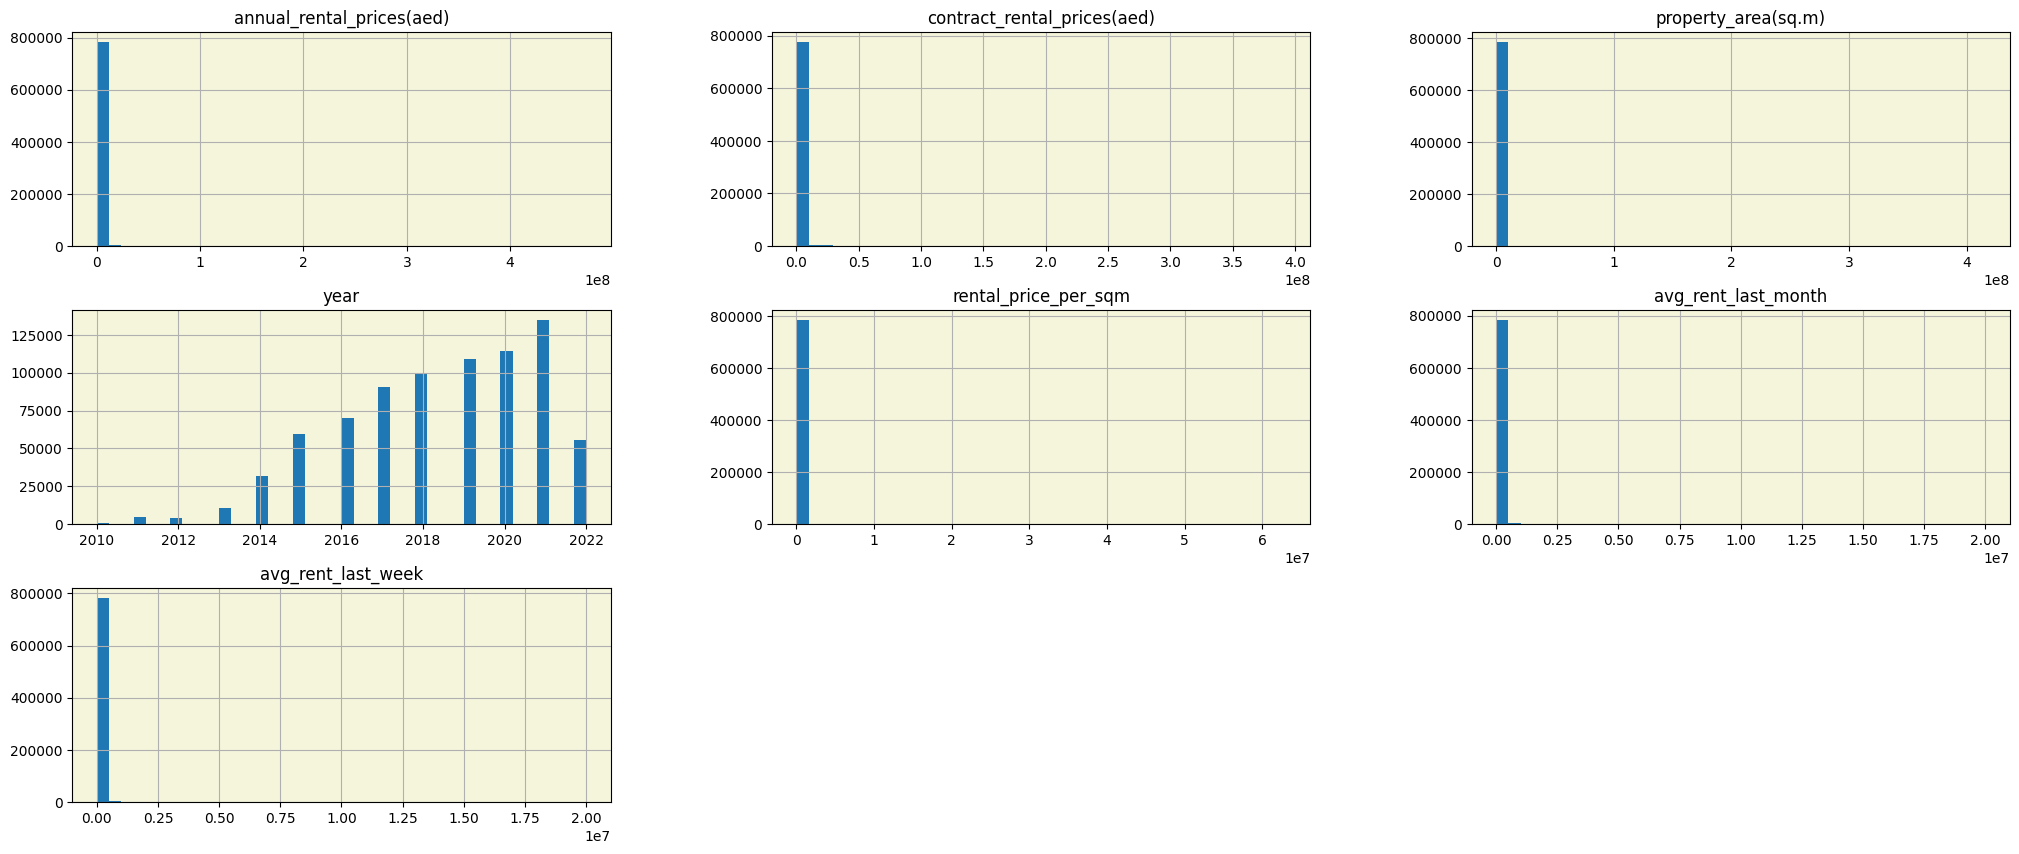

In [222]:
# orig_sales_df.info()
num_targeted_sales_cols = targeted_sales_df.select_dtypes(include=[np.number]).columns
cat_targeted_sales_cols = targeted_sales_df.select_dtypes(exclude=[np.number]).columns

num_targeted_rentals_cols = targeted_rentals_df.select_dtypes(include=[np.number]).columns
cat_targeted_rentals_cols = targeted_rentals_df.select_dtypes(exclude=[np.number]).columns

targeted_rentals_df[num_targeted_rentals_cols].hist(figsize=(25, 10), bins=40)
plt.show()

In [223]:
targeted_rentals_df.columns

Index(['annual_rental_prices(aed)', 'property_location',
       'contract_rental_prices(aed)', 'usage', 'registration_date',
       'Start Date', 'End Date', 'property_type', 'property_sub_type',
       'nearest_metro', 'nearest_mall', 'nearest_landmark',
       'property_area(sq.m)', 'year_month', 'year_week', 'year',
       'rental_price_per_sqm', 'avg_rent_last_month', 'avg_rent_last_week'],
      dtype='object')

<Figure size 1400x400 with 0 Axes>

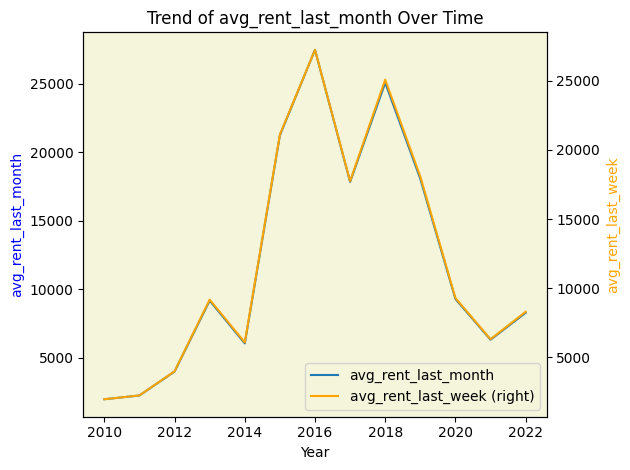

In [224]:
visualizations.plot_trends_secondary_cols(
    targeted_rentals_df, 
    main_col='avg_rent_last_month', 
    time_col='year', 
    secondary_col='avg_rent_last_week'
)

- values fit too tighly so one has to drop during modeling to prevent multicolinearity

<Figure size 1400x400 with 0 Axes>

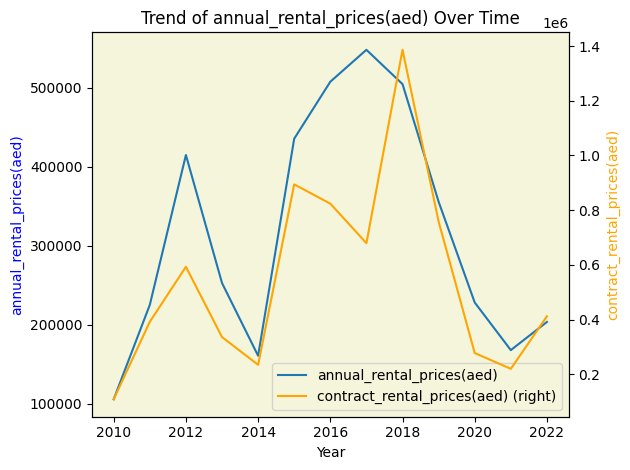

In [225]:
visualizations.plot_trends_secondary_cols(
    targeted_rentals_df, 
    main_col='annual_rental_prices(aed)', 
    time_col='year', 
    secondary_col='contract_rental_prices(aed)'
)

<Figure size 1400x400 with 0 Axes>

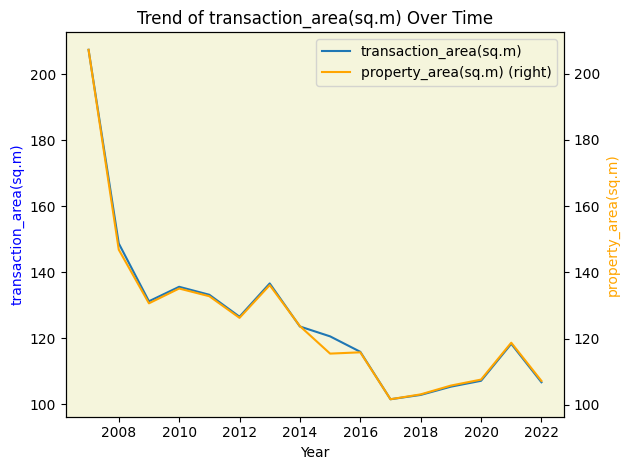

In [226]:
visualizations.plot_trends_secondary_cols(
    targeted_sales_df, 
    main_col='transaction_area(sq.m)', 
    time_col='transaction_date', 
    secondary_col='property_area(sq.m)'
)

- Transaction  Area (formerly Transaction Size) and  Property Area (formerly Property Size) are similar 
- I will drop one

In [227]:
# targeted_rentals_df.columns

In [228]:
sales_kendall_corr =   targeted_sales_df[num_targeted_sales_cols].corr(method='kendall')['sales_price(aed)'].sort_values(ascending=False).to_frame()
sales_pearson_corr =   targeted_sales_df[num_targeted_sales_cols].corr(method='pearson')['sales_price(aed)'].sort_values(ascending=False).to_frame()
sales_spearman_corr = targeted_sales_df[num_targeted_sales_cols].corr(method='spearman')['sales_price(aed)'].sort_values(ascending=False).to_frame()

rentals_kendall_corr = targeted_rentals_df[num_targeted_rentals_cols].corr(method='kendall')['annual_rental_prices(aed)'].sort_values(ascending=False).to_frame()
rentals_pearson_corr =  targeted_rentals_df[num_targeted_rentals_cols].corr(method='pearson')['annual_rental_prices(aed)'].sort_values(ascending=False).to_frame()
rentals_spearman_corr =  targeted_rentals_df[num_targeted_rentals_cols].corr(method='spearman')['annual_rental_prices(aed)'].sort_values(ascending=False).to_frame()


In [229]:
print("rentals_kendal_corr:")
rentals_kendall_corr.T

rentals_kendal_corr:


annual_rental_prices(aed)  \
annual_rental_prices(aed)                        1.0   

                           contract_rental_prices(aed)  property_area(sq.m)  \
annual_rental_prices(aed)                     0.950809              0.36589   

                           rental_price_per_sqm  avg_rent_last_week  \
annual_rental_prices(aed)              0.271496            0.239847   

                           avg_rent_last_month      year  
annual_rental_prices(aed)             0.214207 -0.145592

- contract_rental_prices(aed) is too correlated with annual_rental_prices(aed)

In [230]:
print("rentals_kendal_corr:")
sales_kendall_corr.T

rentals_kendal_corr:


sales_price(aed)  transaction_area(sq.m)  \
sales_price(aed)               1.0                0.535044   

                  property_area(sq.m)  price_per_sqm  avg_price_last_week  \
sales_price(aed)             0.531783       0.390733             0.342498   

                  avg_price_last_month  number_of_rooms      year      hour  \
sales_price(aed)               0.33813          0.26063  0.043948  0.038905   

                    day     month  
sales_price(aed)  0.002 -0.003297

In [231]:
print("rentals_spearman_corr:")
rentals_spearman_corr.T

rentals_spearman_corr:


annual_rental_prices(aed)  \
annual_rental_prices(aed)                        1.0   

                           contract_rental_prices(aed)  property_area(sq.m)  \
annual_rental_prices(aed)                     0.973287             0.425796   

                           rental_price_per_sqm  avg_rent_last_week  \
annual_rental_prices(aed)              0.368434            0.319747   

                           avg_rent_last_month      year  
annual_rental_prices(aed)             0.290143 -0.202843

In [232]:
print("sales_spearman_corr:")
sales_spearman_corr.T

sales_spearman_corr:


sales_price(aed)  transaction_area(sq.m)  \
sales_price(aed)               1.0                0.726225   

                  property_area(sq.m)  price_per_sqm  avg_price_last_week  \
sales_price(aed)             0.723015       0.552434             0.488896   

                  avg_price_last_month  number_of_rooms      year      hour  \
sales_price(aed)              0.482745         0.338942  0.063413  0.054875   

                       day     month  
sales_price(aed)  0.002983 -0.004729

In [233]:
print("sales_pearson_corr:")
sales_pearson_corr.T

sales_pearson_corr:


sales_price(aed)  transaction_area(sq.m)  \
sales_price(aed)               1.0                0.620473   

                  property_area(sq.m)  price_per_sqm  number_of_rooms  \
sales_price(aed)             0.615879       0.362676         0.346689   

                  avg_price_last_month  avg_price_last_week      year  \
sales_price(aed)              0.316631             0.313344  0.060806   

                      hour       day     month  
sales_price(aed)  0.042979  0.002153 -0.003581

- harmonized all namings to follow same convention

1. harmonize `pipeline_imputed_sales_df`

In [234]:
pipeline_imputed_sales_df = data_processor.process_dates(pipeline_imputed_sales_df,'Transaction Date')
pipeline_imputed_sales_df = create_sales_features(pipeline_imputed_sales_df).dropna(how='any')
 
pipeline_imputed_sales_df.columns

Index(['Transaction Number', 'Transaction Date', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Usage', 'Area', 'Property Type', 'Property Sub Type',
       'Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)', 'Room(s)',
       'Parking', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',
       'No. of Buyer', 'No. of Seller', 'Year', 'Month', 'Day', 'Hour',
       'YearMonth', 'YearWeek', 'Price per sq.m', 'Avg Price Last Month',
       'Avg Price Last Week', 'Number of Rooms'],
      dtype='object')

In [235]:
pipeline_imputed_sales_df.rename(columns={
    "Transaction Size (sq.m)":"transaction_area(sq.m)",
    "Transaction Date":"transaction_date",
    "Property Size (sq.m)":"property_area(sq.m)", #1
    "Property Type":"property_type",     #2
    "Property Sub Type":"property_sub_type",    #3
    "Area":"property_location",               #4
    "Room(s)":"property_layout",              #5
    "Number of Rooms":"number_of_rooms",      #6
    "Year":"year",   
    "Month":"month",
    "Day":"day",
    "Hour":"hour",
    "YearMonth":"year_month",	
    "YearWeek": "year_week",
    "Amount":"sales_price(aed)",
    "Price per sq.m":"price_per_sqm",
    "Avg Price Last Month":"avg_price_last_month",   #7
    "Avg Price Last Week":"avg_price_last_week",     #8
    'Nearest Metro':"nearest_metro",                 #9
    'Nearest Mall':"nearest_mall",                    #10
    'Nearest Landmark':"nearest_landmark",            #11
    "Usage":"usage",                                   #12
    
    }, inplace=True)
pipeline_imputed_sales_df.head(2)

# pipeline_imputed_rentals_df.rename(columns={
#     "Transaction Size (sq.m)":"transaction_area(sq.m)",
#     "Transaction Date":"transaction_date",
#     "Property Size (sq.m)":"property_area(sq.m)", #1
#     "Property Type":"property_type",     #2
#     "Property Sub Type":"property_sub_type",    #3
#     "Area":"property_location",               #4
#     "Room(s)":"property_layout",              #5
#     "Number of Rooms":"number_of_rooms",      #6
#     "Year":"year",   
#     "Month":"month",
#     "Day":"day",
#     "Hour":"hour",
#     "YearMonth":"year_month",	
#     "YearWeek": "year_week",
#     "Amount":"sales_price(aed)",
#     "Price per sq.m":"price_per_sqm",
#     "Avg Price Last Month":"avg_price_last_month",   #7
#     "Avg Price Last Week":"avg_price_last_week",     #8
#     'Nearest Metro':"nearest_metro",                 #9
#     'Nearest Mall':"nearest_mall",                    #10
#     'Nearest Landmark':"nearest_landmark",            #11
#     "Usage":"usage",                                   #12
    
#     }, inplace=True)
pipeline_imputed_sales_df.head(2)

Transaction Number    transaction_date  Property ID Transaction Type  \
0      11-12317-2022 2022-06-02 15:22:00     79102731            Sales   
1      11-12316-2022 2022-06-02 15:07:00    132952797            Sales   

  Transaction sub type Registration type Is Free Hold?        usage  \
0                 Sale             Ready     Free Hold   Commercial   
1                 Sale             Ready     Free Hold  Residential   

  property_location property_type  ...  year  month  day  hour year_month  \
0         AL FURJAN          Land  ...  2022      6    2    15    2022-06   
1      AKOYA OXYGEN          Land  ...  2022      6    2    15    2022-06   

   year_week price_per_sqm avg_price_last_month avg_price_last_week  \
0    2022-22   2497.876805          2498.688452         5150.112859   
1    2022-22   7261.225944          7719.686097         8030.465069   

   number_of_rooms  
0              1.0  
1              1.0  

[2 rows x 31 columns]

In [236]:
targeted_rentals_df.columns

Index(['annual_rental_prices(aed)', 'property_location',
       'contract_rental_prices(aed)', 'usage', 'registration_date',
       'Start Date', 'End Date', 'property_type', 'property_sub_type',
       'nearest_metro', 'nearest_mall', 'nearest_landmark',
       'property_area(sq.m)', 'year_month', 'year_week', 'year',
       'rental_price_per_sqm', 'avg_rent_last_month', 'avg_rent_last_week',
       'Year'],
      dtype='object')

2. harmonize full_sales_df and full_rentals_df names

In [237]:
full_sales_df.columns

# 'No. of Buyer', 'No. of Seller',
#        'Transaction Size (sq.m)', 'Sale Price', 'usage', 'Transaction Date'
#        'Avg Price Last Month', 'Avg Price Last Week', 'Number of Rooms'. 'Room(s), Parking

Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Sale Price', 'Usage', 'Transaction Date',
       'Property Sub Type', 'Room(s)', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'Transaction Number', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Area', 'Property Type', 'Year', 'Month', 'Day',
       'Hour', 'YearMonth', 'YearWeek', 'Price per sq.m',
       'Avg Price Last Month', 'Avg Price Last Week', 'Number of Rooms'],
      dtype='object')

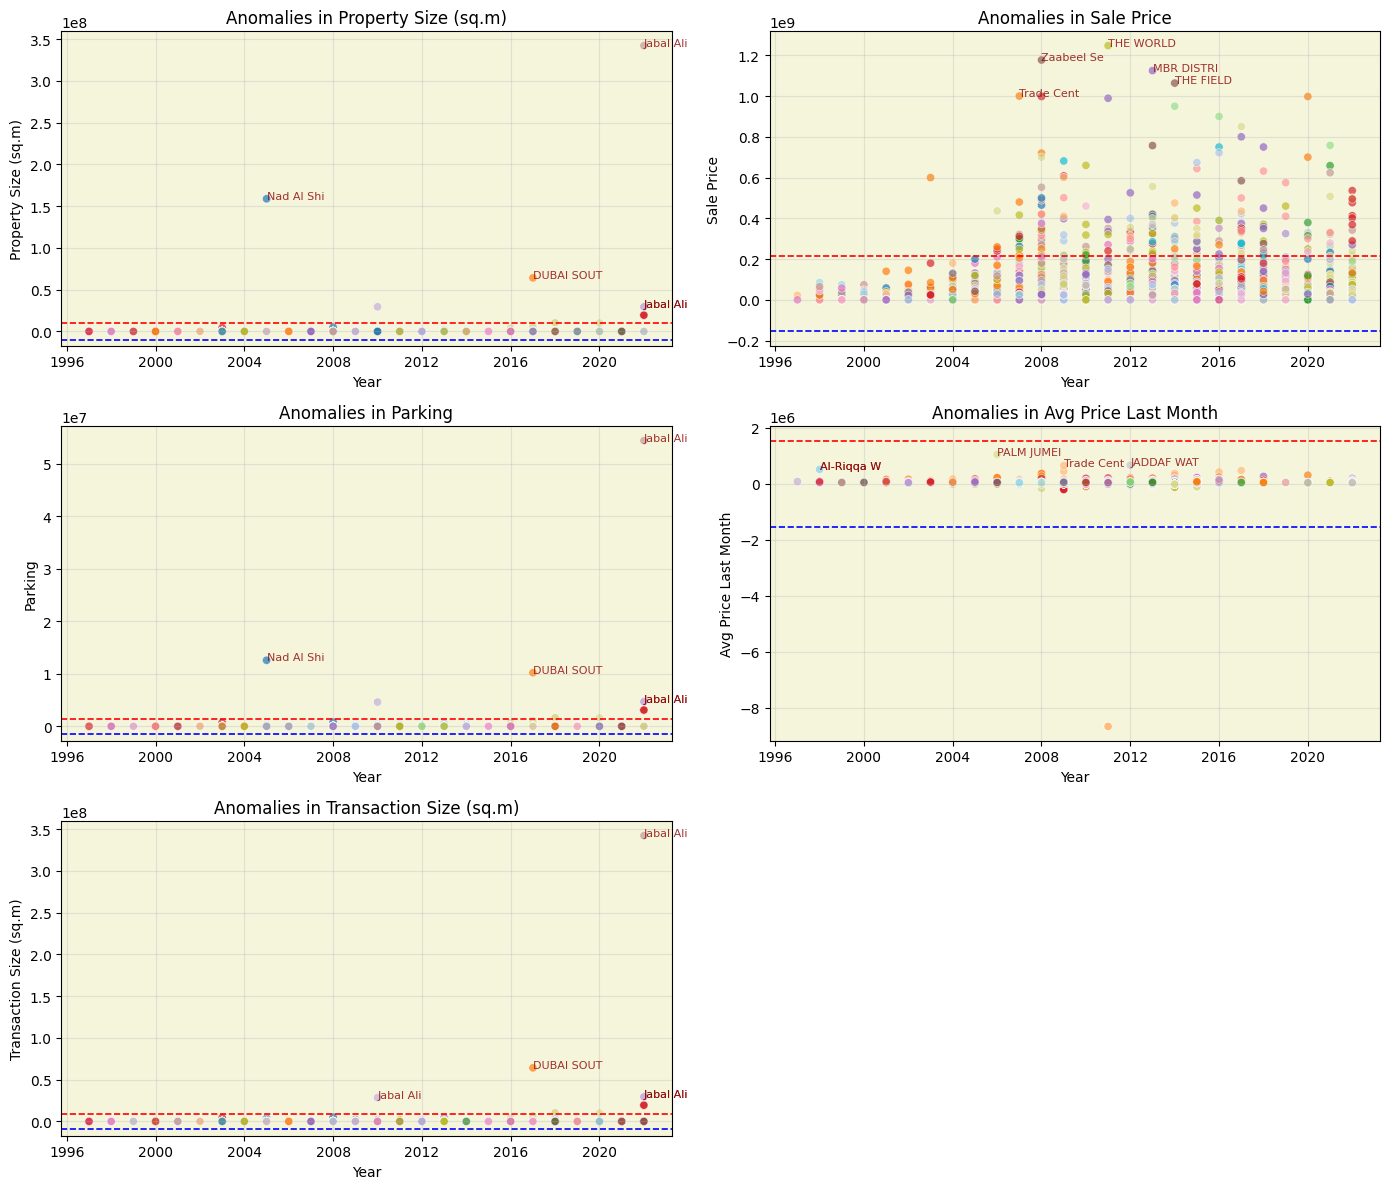

In [238]:
# Define thresholds for outlier detection
def investigate_anomalies(df, feature, low_quantile=0.01, high_quantile=0.99):
    q_low = df[feature].quantile(low_quantile)
    q_high = df[feature].quantile(high_quantile)
    anomalies = df[(df[feature] < q_low) | (df[feature] > q_high)]
    return anomalies

anomaly_reports = {}
features_to_investigate = [
    'Property Size (sq.m)', 'Sale Price', 'Parking', 
    'Avg Price Last Month', 'Transaction Size (sq.m)'
]

for feature in features_to_investigate:
    anomalies = investigate_anomalies(full_sales_df, feature)
    anomaly_reports[feature] = anomalies[['Year', 'Area', 'Property Sub Type', feature]]
    

def plot_anomalies_with_threshold(anomaly_reports, features_to_investigate, annotate_limit=5):
    """
    Plot anomalies for each feature with threshold lines and annotations.

    Parameters:
        anomaly_reports (dict): Dictionary where keys are features and values are DataFrames of anomalies.
        features_to_investigate (list): List of feature names to plot.
        annotate_limit (int): Maximum number of points to annotate per feature.
    """
    num_features = len(features_to_investigate)
    num_rows = (num_features + 1) // 2  # Rows for subplots
    plt.figure(figsize=(14, 4 * num_rows))

    for idx, feature in enumerate(features_to_investigate, start=1):
        plt.subplot(num_rows, 2, idx)

        # Scatterplot with anomalies highlighted
        data = anomaly_reports[feature]
        sns.scatterplot(
            data=data,
            x='Year',
            y=feature,
            hue='Area',
            palette='tab20',
            alpha=0.7,
            legend=False
        )

        # Calculate thresholds
        feature_values = data[feature]
        threshold_upper = feature_values.mean() + 3 * feature_values.std()
        threshold_lower = feature_values.mean() - 3 * feature_values.std()

        # Add horizontal threshold lines
        plt.axhline(y=threshold_upper, color='red', linestyle='--', linewidth=1.2, label="Upper Threshold")
        plt.axhline(y=threshold_lower, color='blue', linestyle='--', linewidth=1.2, label="Lower Threshold")

        # Annotate anomalies
        top_anomalies = data.nlargest(annotate_limit, feature)
        for _, row in top_anomalies.iterrows():
            plt.text(
                x=row['Year'],
                y=row[feature],
                s=row['Area'][:10],  # Shorten Area name for clarity
                fontsize=8,
                color="darkred",
                alpha=0.8
            )

        plt.title(f"Anomalies in {feature}")
        plt.xlabel('Year')
        plt.ylabel(feature)
        plt.grid(alpha=0.3)
        plt.tight_layout()

    plt.show()

plot_anomalies_with_threshold(anomaly_reports, features_to_investigate, annotate_limit=5)


In [239]:
def calculate_outlier_percentiles(df, numerical_features):
    # Calculate the 1st and 99th percentiles for each numerical feature
    outliers_info = {}
    
    for feature in numerical_features:
        lower_percentile = df[feature].quantile(0.01)
        upper_percentile = df[feature].quantile(0.99)
        
        outliers_info[feature] = {
            'lower_percentile': lower_percentile,
            'upper_percentile': upper_percentile,
            'lower_outliers': df[df[feature] < lower_percentile],
            'upper_outliers': df[df[feature] > upper_percentile]
        }
    
    return outliers_info

# Apply to our numerical features
outliers_info = calculate_outlier_percentiles(targeted_sales_df, num_targeted_sales_cols)

# Output the summary
# for feature, info in outliers_info.items():
#     print(f"\nOutlier Information for {feature}:")
#     print(f"Lower Bound (1st Percentile): {info['lower_percentile']}")
#     print(f"Upper Bound (99th Percentile): {info['upper_percentile']}")
#     print(f"Lower Outliers Count: {len(info['lower_outliers'])}")
#     print(f"Upper Outliers Count: {len(info['upper_outliers'])}")

def analyze_outliers_by_context(df, outliers_info):
    outlier_analysis = {}
    
    for feature, info in outliers_info.items():
        # Analyze context of lower and upper outliers
        lower_outliers_context = df.loc[info['lower_outliers'].index, ['Area', 'Property Type']]
        upper_outliers_context = df.loc[info['upper_outliers'].index, ['Area', 'Property Type']]
        
        outlier_analysis[feature] = {
            'lower_outliers_context': lower_outliers_context['Area'].value_counts(),
            'upper_outliers_context': upper_outliers_context['Area'].value_counts()
        }
    
    return outlier_analysis

# Analyze context for outliers
# outlier_analysis = analyze_outliers_by_context(full_sales_df, outliers_info)

# Display context analysis results
# for feature, context in outlier_analysis.items():
#     print(f"\nOutliers Context for {feature}:")
#     print("Lower Outliers Context by Area:", context['lower_outliers_context'])
#     print("Upper Outliers Context by Area:", context['upper_outliers_context'])



In [240]:
def get_unique_values(df, max_values=10):
    """
    Returns the unique values for each feature in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - max_values (int): Maximum number of unique values to display per feature (default: 10).

    Returns:
    - pd.DataFrame: A summary of features and their unique values.
    """
    unique_summary = []

    for col in df.columns:
        # unique_vals = df[col].dropna().unique()  # Exclude NaN for unique values
        unique_vals = df[col].unique()  # Exclude NaN for unique values
        unique_count = len(unique_vals)
        sample_vals = unique_vals[:max_values]  # Display up to max_values unique entries

        unique_summary.append({
            "Feature": col,
            "Unique Count": unique_count,
            "Unique Values (Sample)": sample_vals
        })


    summary_df = pd.DataFrame(unique_summary)

    # Format for readability
    summary_df["Unique Values (Sample)"] = summary_df["Unique Values (Sample)"].apply(lambda x: ', '.join(map(str, x)))

    return summary_df

unique_summary = get_unique_values(full_sales_df)
unique_summary

Feature  Unique Count  \
0                   Parking        487076   
1      Property Size (sq.m)         64034   
2              No. of Buyer           158   
3             No. of Seller           177   
4   Transaction Size (sq.m)        153755   
5                Sale Price        181947   
6                     Usage             2   
7          Transaction Date        448489   
8         Property Sub Type            43   
9                   Room(s)            16   
10            Nearest Metro            58   
11             Nearest Mall             7   
12         Nearest Landmark            16   
13       Transaction Number        704708   
14              Property ID        463974   
15         Transaction Type             1   
16     Transaction sub type            18   
17        Registration type             2   
18            Is Free Hold?             2   
19                     Area           348   
20            Property Type             3   
21                     Year            26   
22                    Month            12   
23                      Day            31   
24                     Hour            24   
25                YearMonth           296   
26                 YearWeek          1284   
27           Price per sq.m        503170   
28     Avg Price Last Month         28853   
29      Avg Price Last Week         67395   
30          Number of Rooms             8   

                               Unique Values (Sample)  
0   271.70567152305324, 210.45233466585233, 1.0, 2...  
1   600.51, 112.24, 49.47, 128.58, 167.94, 160.49,...  
2   1.0, 0.0, 2.0, 3.0, 4.0, 7.0, 5.0, 6.0, 8.0, 1...  
3   1.0, 2.0, 0.0, 3.0, 12.0, 9.0, 13.0, 7.0, 8.0,...  
4   600.51, 112.24, 49.47, 128.58, 167.94, 160.49,...  
5   1500000.0, 815000.0, 425993.0, 1550000.0, 1900...  
6                             Commercial, Residential  
7   2022-06-02 15:22:00, 2022-06-02 15:07:00, 2022...  
8   Commercial, Residential, Flat, Villa, Hotel Ap...  
9   1 B/R, Studio, 3 B/R, 2 B/R, 4 B/R, Office, 5 ...  
10  Buj Khalifa Dubai Mall Metro Station, Ibn Batt...  
11  Marina Mall, Ibn-e-Battuta Mall, Dubai Mall, C...  
12  Sports City Swimming Academy, Dubai Cycling Co...  
13  11-12317-2022, 11-12316-2022, 102-14693-2022, ...  
14  79102731, 132952797, 1134745314, 750930096, 41...  
15                                              Sales  
16  Sale, Sell - Pre registration, Sell Developmen...  
17                                    Ready, Off-Plan  
18                           Free Hold, Non Free Hold  
19  AL FURJAN, AKOYA OXYGEN, ARABIAN RANCHES III, ...  
20                               Land, Unit, Building  
21  2022-01-01 00:00:00, 2021-01-01 00:00:00, 2020...  
22                    6, 5, 4, 3, 2, 1, 12, 11, 10, 9  
23               2, 1, 31, 30, 29, 28, 27, 26, 25, 24  
24                15, 14, 13, 12, 11, 10, 9, 8, 7, 23  
25  2022-06, 2022-05, 2022-04, 2022-03, 2022-02, 2...  
26  2022-22, 2022-21, 2022-20, 2022-19, 2022-17, 2...  
27  2497.8768047159915, 7261.225944404847, 8611.13...  
28  2498.6884523479976, 7719.686096824346, 9752.51...  
29  5150.112859056621, 8030.465068584457, 10133.29...  
30             1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0

In [341]:
targeted_sales_df[['property_area(sq.m)', 'property_location', 'sales_price(aed)']].head(10)

property_area(sq.m)            property_location  sales_price(aed)
0                49.47                    AL FURJAN         425993.00
1               167.94                PALM JUMEIRAH        1900000.00
2               160.49               Zaabeel Second        3500000.00
3                15.12                 BUSINESS BAY         438095.24
4               784.50  DUBAI INVESTMENT PARK FIRST        2000000.00
5               258.12      JUMEIRAH VILLAGE CIRCLE        3056216.00
6                78.94     JUMEIRAH BEACH RESIDENCE        2050000.00
7               151.63      JUMEIRAH VILLAGE CIRCLE        1876950.00
8               258.93      JUMEIRAH VILLAGE CIRCLE        3065806.00
9                36.67      JUMEIRAH VILLAGE CIRCLE         395000.00

In [339]:
targeted_sales_df.head(10)

transaction_area(sq.m)  property_area(sq.m)            property_location  \
0                   49.47                49.47                    AL FURJAN   
1                  167.94               167.94                PALM JUMEIRAH   
2                  160.49               160.49               Zaabeel Second   
3                   15.12                15.12                 BUSINESS BAY   
4                  784.50               784.50  DUBAI INVESTMENT PARK FIRST   
5                  258.12               258.12      JUMEIRAH VILLAGE CIRCLE   
6                   78.94                78.94     JUMEIRAH BEACH RESIDENCE   
7                  151.63               151.63      JUMEIRAH VILLAGE CIRCLE   
8                  258.93               258.93      JUMEIRAH VILLAGE CIRCLE   
9                   36.67                36.67      JUMEIRAH VILLAGE CIRCLE   

  property_layout  sales_price(aed)        usage    transaction_date  \
0          Studio         425993.00  Residential 2022-06-02 14:56:00   
1           2 B/R        1900000.00  Residential 2022-06-02 14:52:00   
2           3 B/R        3500000.00  Residential 2022-06-02 14:49:00   
3          Studio         438095.24  Residential 2022-06-02 14:47:00   
4           4 B/R        2000000.00  Residential 2022-06-02 14:45:00   
5           2 B/R        3056216.00  Residential 2022-06-02 14:44:00   
6           1 B/R        2050000.00  Residential 2022-06-02 14:40:00   
7           1 B/R        1876950.00  Residential 2022-06-02 14:40:00   
8           2 B/R        3065806.00  Residential 2022-06-02 14:40:00   
9          Studio         395000.00  Residential 2022-06-02 14:38:00   

  property_type property_sub_type                         nearest_metro  ...  \
0          Unit              Flat             Ibn Battuta Metro Station  ...   
1          Unit              Flat                         Palm Jumeirah  ...   
2          Unit              Flat                      Financial Centre  ...   
3          Unit   Hotel Apartment  Buj Khalifa Dubai Mall Metro Station  ...   
4      Building             Villa             Ibn Battuta Metro Station  ...   
5          Unit   Hotel Apartment                 Nakheel Metro Station  ...   
6          Unit              Flat               Jumeirah Beach Resdency  ...   
7          Unit   Hotel Apartment                 Nakheel Metro Station  ...   
8          Unit   Hotel Apartment                 Nakheel Metro Station  ...   
9          Unit              Flat                 Nakheel Metro Station  ...   

   year month  day  hour  year_month  year_week price_per_sqm  \
0  2022     6    2    14     2022-06    2022-22   8611.138063   
1  2022     6    2    14     2022-06    2022-22  11313.564368   
2  2022     6    2    14     2022-06    2022-22  21808.212350   
3  2022     6    2    14     2022-06    2022-22  28974.552910   
4  2022     6    2    14     2022-06    2022-22   2549.394519   
5  2022     6    2    14     2022-06    2022-22  11840.291337   
6  2022     6    2    14     2022-06    2022-22  25969.090448   
7  2022     6    2    14     2022-06    2022-22  12378.487107   
8  2022     6    2    14     2022-06    2022-22  11840.288881   
9  2022     6    2    14     2022-06    2022-22  10771.748023   

  avg_price_last_month  avg_price_last_week  number_of_rooms  
0          9752.518951         10133.296073              2.0  
1         22598.646581         26564.467497              2.0  
2         19334.715773         18114.553363              3.0  
3         18863.407539         18839.523459              1.0  
4          5092.284263          5265.313500              4.0  
5         10569.408179         10142.171309              2.0  
6         23835.057030         27901.921476              1.0  
7         10569.408179         10142.171309              1.0  
8         10569.408179         10142.171309              2.0  
9         10569.408179         10142.171309              2.0  

[10 rows x 22 columns]

In [241]:
full_sales_df.columns

Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Sale Price', 'Usage', 'Transaction Date',
       'Property Sub Type', 'Room(s)', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'Transaction Number', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Area', 'Property Type', 'Year', 'Month', 'Day',
       'Hour', 'YearMonth', 'YearWeek', 'Price per sq.m',
       'Avg Price Last Month', 'Avg Price Last Week', 'Number of Rooms'],
      dtype='object')

In [242]:
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
warnings.filterwarnings(
    action='ignore'
)


def preprocess_data(df, dataset_type="sales"):
    """
    Preprocess the data by dropping irrelevant columns and handling missing values.

    Parameters:
        df (pd.DataFrame): Input DataFrame to preprocess.
        dataset_type (str): Specify either 'sales' or 'rentals' to apply dataset-specific preprocessing.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    drop_features = ['Year', 'Month', 'Day', 'Hour', 'YearMonth', 'Ejari Contract Number']
    if dataset_type == "rentals":
        drop_features = ['Ejari Contract Number']
    
    df = df.drop(columns=drop_features, errors='ignore')

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    if dataset_type == "sales":
        for col in ['Avg Price Last Month', 'Avg Price Last Week','Price per sq.m']:
            if col in df.columns:
                df[col] = imputer.fit_transform(df[[col]])
    
    return df

def scale_features(df, numerical_columns):
    """
    Scale numerical features while retaining unscaled values.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        numerical_columns (list): List of numerical column names to scale.

    Returns:
        pd.DataFrame: Scaled DataFrame.
    """
    scaler = StandardScaler()
    # scaled_df = df.copy()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df

def feature_engineering(df, dataset_type="sales", outliers_info=None):
    """
    Add derived features and calculate proximity scores for modeling.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        dataset_type (str): Specify either 'sales' or 'rentals' to apply dataset-specific engineering.
        outliers_info (dict): Dictionary containing outlier thresholds for specific features.

    Returns:
        pd.DataFrame: DataFrame with engineered features.
    """
    # Derived features
    if dataset_type == "sales":
        df['Area Premium'] = df['Sale Price'] / df.groupby('Area', observed=False)['Sale Price'].transform('mean')
        if outliers_info:
            df['Luxury Indicator'] = (
                (df['Sale Price'] > outliers_info['Sale Price']['upper_percentile']) |
                (df['Property Size (sq.m)'] > outliers_info['Property Size (sq.m)']['upper_percentile'])
            ).astype(int)
        df['Luxury Adjusted Price'] = df['Sale Price'] * df.get('Luxury Indicator', 1)
        df['Sales Price Log'] = np.log1p(df['Sale Price'])
    
    elif dataset_type == "rentals":
        df['Price per sq.m'] = df['Annual Rental Price'] / (df['Property Size (sq.m)'] + 1e-6)
        df['Freehold Indicator'] = df['Is Free Hold?'].apply(lambda x: 1 if x == "Free Hold" else 0)

    # Proximity Score
    df['Nearest Metro Encoded'] = df['Nearest Metro'].cat.codes if pd.api.types.is_categorical_dtype(df['Nearest Metro']) else df['Nearest Metro']
    df['Nearest Mall Encoded'] = df['Nearest Mall'].cat.codes if pd.api.types.is_categorical_dtype(df['Nearest Mall']) else df['Nearest Mall']
    df['Nearest Landmark Encoded'] = df['Nearest Landmark'].cat.codes if pd.api.types.is_categorical_dtype(df['Nearest Landmark']) else df['Nearest Landmark']

    df['Proximity Score'] = (
        df['Nearest Metro Encoded'] +
        df['Nearest Mall Encoded'] +
        df['Nearest Landmark Encoded']
    )
    
    return df

# def encode_categorical_features(df, target_col, categorical_columns):
#     """
#     Encode categorical features using target encoding.

#     Parameters:
#         df (pd.DataFrame): Input DataFrame.
#         target_col (str): Target column to guide encoding.
#         categorical_columns (list): List of categorical columns to encode.

#     Returns:
#         pd.DataFrame: DataFrame with encoded categorical features.
#     """
#     encoder = TargetEncoder(cols=categorical_columns)
#     df[categorical_columns] = encoder.fit_transform(df[categorical_columns], df[target_col])
#     return df

def encode_categorical_features(df, categorical_columns):
    """
    Encode categorical features using ordinal encoding.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        categorical_columns (list): List of categorical columns to encode.

    Returns:
        pd.DataFrame: DataFrame with encoded categorical features.
    """
    encoder = OrdinalEncoder()
    df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
    return df

def remove_negative_values(df):
    """
    Remove rows with negative values in numerical columns.

    Parameters:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: Filtered DataFrame with no negative values in numerical columns.
    """
    numerical_columns = df.select_dtypes(include=['number']).columns
    return df[~(df[numerical_columns] < 0).any(axis=1)]

# Full preprocessing and feature engineering pipeline
def pipeline(df, dataset_type="sales", outliers_info=None):
    """
    Complete pipeline to preprocess, engineer features, encode, and clean the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        dataset_type (str): Either 'sales' or 'rentals'.
        outliers_info (dict): Outlier thresholds for feature engineering (if available).

    Returns:
        pd.DataFrame: Fully processed and scaled DataFrame.
        pd.DataFrame: Fully processed but unscaled/unencoded DataFrame.
    """
    
    # Remove negative values
    df = remove_negative_values(df)
    
    # Preprocess data
    df = preprocess_data(df, dataset_type)
    
    # Feature engineering
    df = feature_engineering(df, dataset_type, outliers_info)
    
    df_copy = df.copy()
    # Identify categorical columns for encoding
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    target_col = 'Sale Price' if dataset_type == "sales" else 'Annual Rental Price'
    
    # Encode categorical features
    df = encode_categorical_features(df, target_col, categorical_columns)
    
    # Scale numerical features
    numerical_columns = df.select_dtypes(include=['number']).columns
    # scaled_df = scale_features(df, numerical_columns)
    
    return df, df_copy


# encoded_full_sales_df, unencoded_unscaled_sales_df = pipeline(full_sales_df, dataset_type="sales", outliers_info=outliers_info)
# encoded_full_rentals_df, unencoded_unscaled_rentals_df = pipeline(full_rentals_df, dataset_type="rentals")

# Confirm results
# print(f"Scaled Sales Data Shape: {encoded_full_sales_df.shape}")
# print(f"Unscaled Sales Data Shape: {unencoded_unscaled_sales_df.shape}")
# print(f"Scaled Rentals Data Shape: {encoded_full_rentals_df.shape}")
# print(f"Unscaled Rentals Data Shape: {unencoded_unscaled_rentals_df.shape}")


In [243]:
# targeted_rentals_df

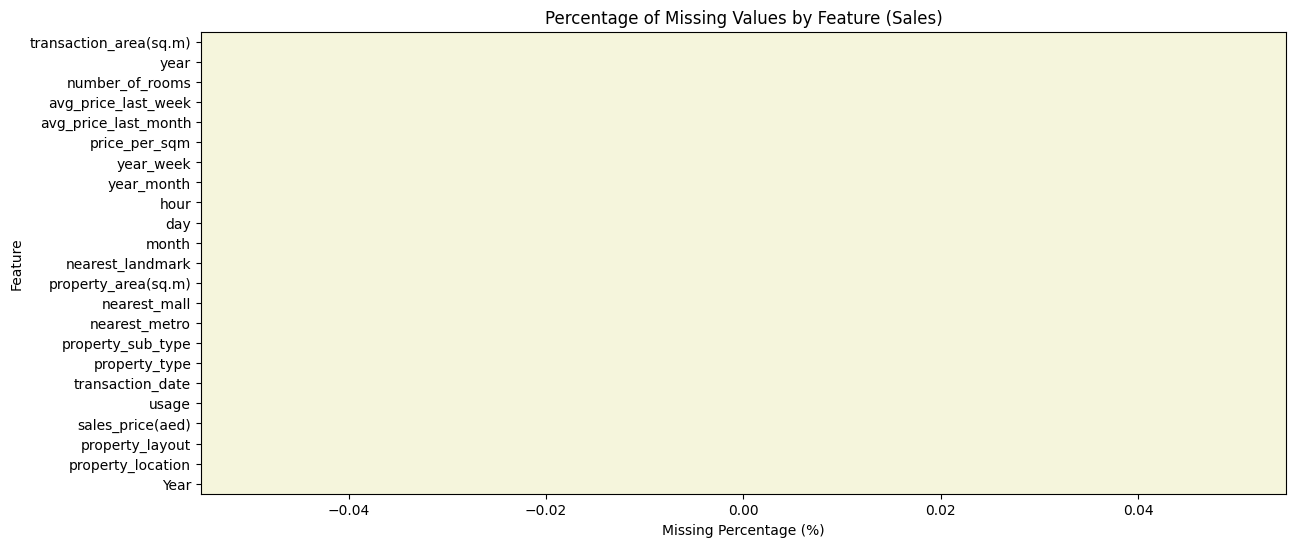

                                       Feature  MissingPercent
transaction_area(sq.m)  transaction_area(sq.m)             0.0
year                                      year             0.0
number_of_rooms                number_of_rooms             0.0
avg_price_last_week        avg_price_last_week             0.0
avg_price_last_month      avg_price_last_month             0.0
price_per_sqm                    price_per_sqm             0.0
year_week                            year_week             0.0
year_month                          year_month             0.0
hour                                      hour             0.0
day                                        day             0.0
month                                    month             0.0
nearest_landmark              nearest_landmark             0.0
property_area(sq.m)        property_area(sq.m)             0.0
nearest_mall                      nearest_mall             0.0
nearest_metro                    nearest_metro         

In [244]:
def visualize_missing_values(df, title="Percentage of Missing Values by Feature"):
    """
    Calculates and visualizes the percentage of missing values for each feature in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - title (str): The title for the visualization.

    Returns:
    - pd.DataFrame: A DataFrame with missing percentages for each feature.
    """
    # Calculate missing values and percentages
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Feature': missing_values.index,
        'MissingPercent': missing_percent
    }).sort_values(by='MissingPercent', ascending=False)

    # Visualize missing values
    plt.figure(figsize=(14, 6))
    sns.barplot(data=missing_df, y='Feature', x='MissingPercent', palette='viridis',hue='Feature', legend=False)
    plt.title(title)
    plt.xlabel("Missing Percentage (%)")
    plt.ylabel("Feature")
    plt.show()
    
    return missing_df

# Analyze and visualize missing values in the merged_real_estate_df
missing_sales_model_features_df = visualize_missing_values(
    df=targeted_sales_df,
    title="Percentage of Missing Values by Feature (Sales)"
)

# Display the summary DataFrame
print(missing_sales_model_features_df)


In [245]:
print("number of numerical features(Rentals):",  len(num_targeted_sales_cols))
print("Summary Stats(Rentals):")
targeted_sales_df[num_targeted_sales_cols].describe().T

number of numerical features(Rentals): 11
Summary Stats(Rentals):


count          mean           std          min  \
transaction_area(sq.m)  350413.0  1.210283e+02  1.832913e+02     0.130000   
property_area(sq.m)     350413.0  1.206589e+02  1.902955e+02     0.000000   
sales_price(aed)        350413.0  1.550982e+06  2.106817e+06    67.510000   
year                    350413.0  2.015386e+03  4.200071e+00  2007.000000   
month                   350413.0  6.393915e+00  3.451971e+00     1.000000   
day                     350413.0  1.601721e+01  8.814001e+00     1.000000   
hour                    350413.0  9.903776e+00  4.010573e+00     0.000000   
price_per_sqm           350413.0  1.360191e+04  9.006929e+03     4.300871   
avg_price_last_month    350413.0  1.360191e+04  5.659503e+03  1067.965312   
avg_price_last_week     350413.0  1.360197e+04  6.008580e+03  1067.965312   
number_of_rooms         350413.0  1.736551e+00  8.059171e-01     1.000000   

                                  25%           50%           75%  \
transaction_area(sq.m)      64.500000  9.211000e+01  1.427000e+02   
property_area(sq.m)         64.620000  9.201000e+01  1.425400e+02   
sales_price(aed)        665964.000000  1.100000e+06  1.850000e+06   
year                      2012.000000  2.015000e+03  2.019000e+03   
month                        3.000000  6.000000e+00  1.000000e+01   
day                          8.000000  1.600000e+01  2.400000e+01   
hour                         9.000000  1.100000e+01  1.200000e+01   
price_per_sqm             8493.771234  1.168539e+04  1.650442e+04   
avg_price_last_month      9500.558199  1.225648e+04  1.679982e+04   
avg_price_last_week       9417.363371  1.233526e+04  1.673830e+04   
number_of_rooms              1.000000  2.000000e+00  2.000000e+00   

                                 max  
transaction_area(sq.m)  5.557114e+04  
property_area(sq.m)     5.557114e+04  
sales_price(aed)        3.300000e+08  
year                    2.022000e+03  
month                   1.200000e+01  
day                     3.100000e+01  
hour                    2.300000e+01  
price_per_sqm           1.675000e+06  
avg_price_last_month    9.277203e+04  
avg_price_last_week     3.406850e+05  
number_of_rooms         8.000000e+00

In [246]:
# print("number of categorical features(Rentals):",  len(cat_targeted_rentals_cols))
print("Category Summary Stats (Rentals):")
# targeted_rentals_df[categorical_features].describe(exclude='number').T

Category Summary Stats (Rentals):


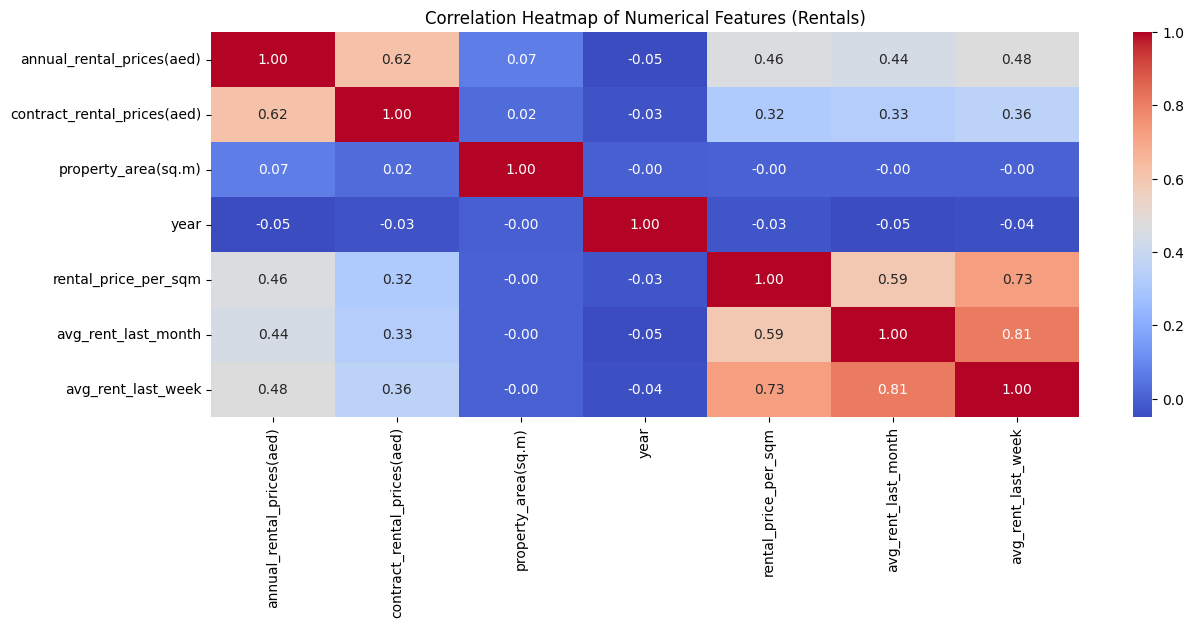

Correlation Matrix for Correlation Heatmap of Numerical Features (Rentals):


annual_rental_prices(aed)  \
annual_rental_prices(aed)                     1.000000   
contract_rental_prices(aed)                   0.618459   
property_area(sq.m)                           0.070199   
year                                         -0.048621   
rental_price_per_sqm                          0.463681   
avg_rent_last_month                           0.444025   
avg_rent_last_week                            0.476930   

                             contract_rental_prices(aed)  property_area(sq.m)  \
annual_rental_prices(aed)                       0.618459             0.070199   
contract_rental_prices(aed)                     1.000000             0.024666   
property_area(sq.m)                             0.024666             1.000000   
year                                           -0.031485            -0.004132   
rental_price_per_sqm                            0.316630            -0.000425   
avg_rent_last_month                             0.333112            -0.000342   
avg_rent_last_week                              0.357053            -0.000434   

                                 year  rental_price_per_sqm  \
annual_rental_prices(aed)   -0.048621              0.463681   
contract_rental_prices(aed) -0.031485              0.316630   
property_area(sq.m)         -0.004132             -0.000425   
year                         1.000000             -0.029340   
rental_price_per_sqm        -0.029340              1.000000   
avg_rent_last_month         -0.049958              0.590104   
avg_rent_last_week          -0.040288              0.725093   

                             avg_rent_last_month  avg_rent_last_week  
annual_rental_prices(aed)               0.444025            0.476930  
contract_rental_prices(aed)             0.333112            0.357053  
property_area(sq.m)                    -0.000342           -0.000434  
year                                   -0.049958           -0.040288  
rental_price_per_sqm                    0.590104            0.725093  
avg_rent_last_month                     1.000000            0.809562  
avg_rent_last_week                      0.809562            1.000000

In [247]:
def plot_correlation_heatmap(df, numerical_features, title="Correlation Heatmap"):
    """
    Plots a correlation heatmap for the numerical features in a DataFrame and returns the correlation matrix.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        numerical_features (list): List of numerical feature column names.
        title (str): Title of the heatmap.

    Returns:
        pd.DataFrame: The correlation matrix.
    """
    plt.figure(figsize=(14, 5))
    corr_matrix = df[numerical_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()

    print(f"Correlation Matrix for {title}:")
    return corr_matrix


corr_matrix_rentals = plot_correlation_heatmap(
    targeted_rentals_df, 
    numerical_features=num_targeted_rentals_cols, 
    title="Correlation Heatmap of Numerical Features (Rentals)"
)

corr_matrix_rentals


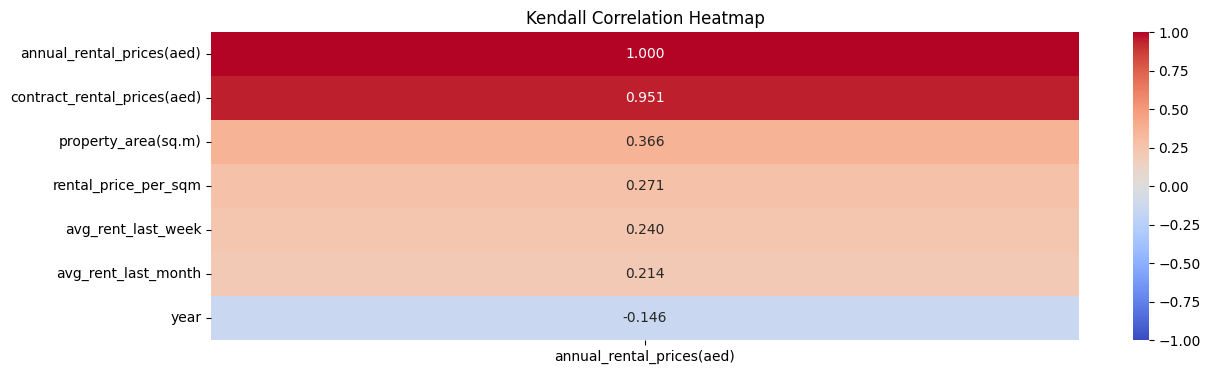

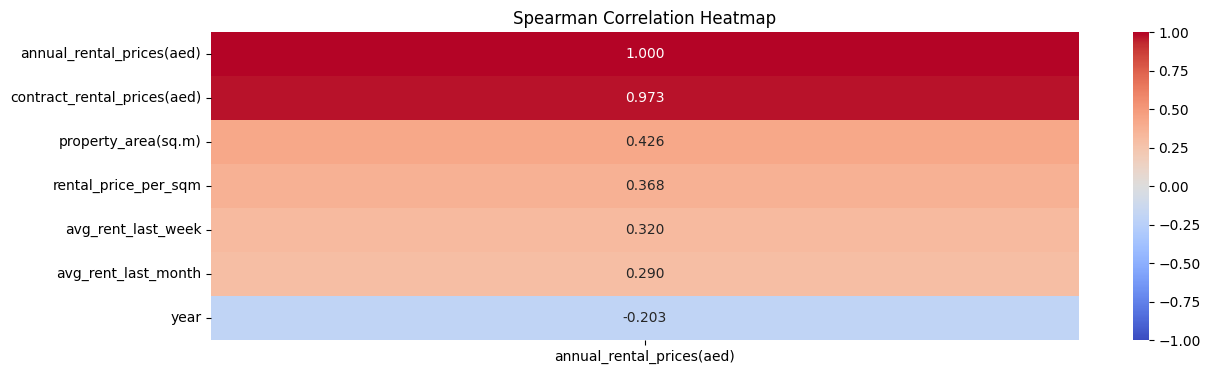

In [248]:
# Plot Kendall Correlation
plt.figure(figsize=(14, 4))
sns.heatmap(rentals_kendall_corr, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall Correlation Heatmap")
plt.show()

# Plot Spearman Correlation
plt.figure(figsize=(14, 4))
sns.heatmap(rentals_spearman_corr, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()


- Date related cols have very weak corr
- I will drop them to prevent noise; can allow year for the sake plots

In [249]:
targeted_sales_df.head(1)

transaction_area(sq.m)  property_area(sq.m) property_location  \
0                   49.47                49.47         AL FURJAN   

  property_layout  sales_price(aed)        usage    transaction_date  \
0          Studio          425993.0  Residential 2022-06-02 14:56:00   

  property_type property_sub_type              nearest_metro  ... month day  \
0          Unit              Flat  Ibn Battuta Metro Station  ...     6   2   

   hour  year_month  year_week  price_per_sqm avg_price_last_month  \
0    14     2022-06    2022-22    8611.138063          9752.518951   

  avg_price_last_week  number_of_rooms  Year  
0        10133.296073              2.0  2022  

[1 rows x 23 columns]

In [250]:
targeted_rentals_df.columns

Index(['annual_rental_prices(aed)', 'property_location',
       'contract_rental_prices(aed)', 'usage', 'registration_date',
       'Start Date', 'End Date', 'property_type', 'property_sub_type',
       'nearest_metro', 'nearest_mall', 'nearest_landmark',
       'property_area(sq.m)', 'year_month', 'year_week', 'year',
       'rental_price_per_sqm', 'avg_rent_last_month', 'avg_rent_last_week',
       'Year'],
      dtype='object')

- drop some columns 

In [251]:
targeted_rentals_df = targeted_rentals_df[[
      'property_area(sq.m)', 'property_location','avg_rent_last_week',
      'annual_rental_prices(aed)','property_type','rental_price_per_sqm', 'avg_rent_last_month','property_sub_type',
      'nearest_metro', 'nearest_mall','nearest_landmark','usage','year'
      ]]
print("shape:", targeted_rentals_df.shape)
targeted_sales_df.head(2)

shape: (784753, 13)


transaction_area(sq.m)  property_area(sq.m) property_location  \
0                   49.47                49.47         AL FURJAN   
1                  167.94               167.94     PALM JUMEIRAH   

  property_layout  sales_price(aed)        usage    transaction_date  \
0          Studio          425993.0  Residential 2022-06-02 14:56:00   
1           2 B/R         1900000.0  Residential 2022-06-02 14:52:00   

  property_type property_sub_type              nearest_metro  ... month day  \
0          Unit              Flat  Ibn Battuta Metro Station  ...     6   2   
1          Unit              Flat              Palm Jumeirah  ...     6   2   

   hour  year_month  year_week  price_per_sqm avg_price_last_month  \
0    14     2022-06    2022-22    8611.138063          9752.518951   
1    14     2022-06    2022-22   11313.564368         22598.646581   

  avg_price_last_week  number_of_rooms  Year  
0        10133.296073              2.0  2022  
1        26564.467497              2.0  2022  

[2 rows x 23 columns]

In [252]:
targeted_sales_df = targeted_sales_df[[
      'property_area(sq.m)', 'property_location','avg_price_last_week', 'number_of_rooms',
      'property_layout', 'sales_price(aed)','property_type','price_per_sqm', 'avg_price_last_month','property_sub_type',
      'nearest_metro', 'nearest_mall','nearest_landmark','usage', 'year'
      ]]
print("shape:", targeted_sales_df.shape)
targeted_sales_df.head(2)

shape: (350413, 15)


property_area(sq.m) property_location  avg_price_last_week  \
0                49.47         AL FURJAN         10133.296073   
1               167.94     PALM JUMEIRAH         26564.467497   

   number_of_rooms property_layout  sales_price(aed) property_type  \
0              2.0          Studio          425993.0          Unit   
1              2.0           2 B/R         1900000.0          Unit   

   price_per_sqm  avg_price_last_month property_sub_type  \
0    8611.138063           9752.518951              Flat   
1   11313.564368          22598.646581              Flat   

               nearest_metro        nearest_mall nearest_landmark  \
0  Ibn Battuta Metro Station  Ibn-e-Battuta Mall   Expo 2020 Site   
1              Palm Jumeirah         Marina Mall     Burj Al Arab   

         usage  year  
0  Residential  2022  
1  Residential  2022

In [253]:
from category_encoders import TargetEncoder
warnings.filterwarnings(
    action='ignore'
)


from sklearn.preprocessing import OrdinalEncoder

def oe_encode_categorical_features(df, categorical_columns):
    """
    Encode categorical features using ordinal encoding.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        categorical_columns (list): List of categorical columns to encode.

    Returns:
        pd.DataFrame: DataFrame with encoded categorical features.
    """
    encoder = OrdinalEncoder()
    df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
    return df


def encode_categorical_features(df, target_col, categorical_columns):
    """
    Encode categorical features using target encoding.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        target_col (str): Target column to guide encoding.
        categorical_columns (list): List of categorical columns to encode.

    Returns:
        pd.DataFrame: DataFrame with encoded categorical features.
    """
    encoder = TargetEncoder(cols=categorical_columns)
    df[categorical_columns] = encoder.fit_transform(df[categorical_columns], df[target_col])
    return df



sales_categorical_columns = targeted_sales_df.select_dtypes(include=['object', 'category']).columns.tolist()
sales_numerical_columns =   targeted_sales_df.select_dtypes(include=[np.number]).columns
target_sales_col = 'sales_price(aed)'

rentals_categorical_columns = targeted_rentals_df.select_dtypes(include=['object', 'category']).columns.tolist()
rentals_numerical_columns =   targeted_rentals_df.select_dtypes(include=[np.number]).columns
target_rentals_col = 'annual_rental_prices(aed)'

# Encode categorical features
targeted_sales_df = oe_encode_categorical_features(targeted_sales_df.copy(), sales_categorical_columns)
targeted_rentals_df = oe_encode_categorical_features(targeted_rentals_df.copy(),rentals_categorical_columns)
targeted_rentals_df.head(2)

property_area(sq.m)  property_location  avg_rent_last_week  \
0               5695.0               80.0           52.677788   
3                806.0               61.0           12.406948   

   annual_rental_prices(aed)  property_type  rental_price_per_sqm  \
0                   300000.0            0.0             52.677788   
3                    10000.0            0.0             12.406948   

   avg_rent_last_month  property_sub_type  nearest_metro  nearest_mall  \
0            52.677788               14.0           54.0           2.0   
3            12.406948                7.0           39.0           4.0   

   nearest_landmark  usage       year  
0               4.0    3.0 2021-01-01  
3               9.0    2.0 2021-01-01

In [254]:
targeted_sales_df.head(2)

property_area(sq.m)  property_location  avg_price_last_week  \
0                49.47                0.0         10133.296073   
1               167.94               59.0         26564.467497   

   number_of_rooms  property_layout  sales_price(aed)  property_type  \
0              2.0             15.0          425993.0            1.0   
1              2.0              1.0         1900000.0            1.0   

   price_per_sqm  avg_price_last_month  property_sub_type  nearest_metro  \
0    8611.138063           9752.518951                0.0           23.0   
1   11313.564368          22598.646581                0.0           33.0   

   nearest_mall  nearest_landmark  usage  year  
0           4.0               6.0    0.0  2022  
1           6.0               2.0    0.0  2022

In [255]:

targeted_rentals_df[rentals_numerical_columns].corr(method='pearson')['annual_rental_prices(aed)'].sort_values(ascending=False).to_frame().T

annual_rental_prices(aed)  avg_rent_last_week  \
annual_rental_prices(aed)                        1.0             0.47693   

                           rental_price_per_sqm  avg_rent_last_month  \
annual_rental_prices(aed)              0.463681             0.444025   

                           property_area(sq.m)  
annual_rental_prices(aed)             0.070199

price_per_sqm leads in positive correlation while the others are low

In [256]:
targeted_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784753 entries, 0 to 2176494
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   property_area(sq.m)        784753 non-null  float64       
 1   property_location          784753 non-null  float64       
 2   avg_rent_last_week         784753 non-null  float64       
 3   annual_rental_prices(aed)  784753 non-null  float64       
 4   property_type              784753 non-null  float64       
 5   rental_price_per_sqm       784753 non-null  float64       
 6   avg_rent_last_month        784753 non-null  float64       
 7   property_sub_type          784753 non-null  float64       
 8   nearest_metro              784753 non-null  float64       
 9   nearest_mall               784753 non-null  float64       
 10  nearest_landmark           784753 non-null  float64       
 11  usage                      784753 non-null  float64     

In [257]:
# import tensorflow as tf
# from keras import Sequential, layers, Input
# from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OrdinalEncoder
# import numpy as np
# from tqdm import tqdm

# # Function to preprocess data
# def preprocess_train_data(df, recommended_features, cat_cols, target_col):
#     """
#     Splits the dataset into train, validation, and test sets,
#     handles infinity values, and encodes categorical features.
#     """
#     X = df[recommended_features].drop(columns=[target_col])
#     y = df[recommended_features][target_col]

#     # Split into train, validation, and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#     # Handle infinity values
#     numerical_columns = X_train.select_dtypes(include=[np.number]).columns

#     inf_cols_train = numerical_columns[np.isinf(X_train[numerical_columns]).any()]
#     inf_cols_val = numerical_columns[np.isinf(X_val[numerical_columns]).any()]

#     # Impute or handle infinity values if any
#     if not inf_cols_train.empty:
#         X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
#         X_train.fillna(X_train.mean(), inplace=True)

#     if not inf_cols_val.empty:
#         X_val.replace([np.inf, -np.inf], np.nan, inplace=True)
#         X_val.fillna(X_val.mean(), inplace=True)

#     # Encode categorical features
#     encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#     X_train_encoded = encoder.fit_transform(X_train[cat_cols])
#     X_val_encoded = encoder.transform(X_val[cat_cols])

#     return X_train_encoded, X_val_encoded, y_train, y_val

# # Function to train HistGradientBoostingRegressor
# def train_hgb(X_train, y_train, X_val, y_val):
#     """
#     Trains a HistGradientBoostingRegressor and returns metrics.
#     """
#     hgb = HistGradientBoostingRegressor(random_state=42)
#     print("Training HistGradientBoostingRegressor...")
#     with tqdm(total=100, desc="HGB Training Progress", unit="%") as pbar:
#         hgb.fit(X_train, y_train)
#         pbar.update(100)
#     y_pred = hgb.predict(X_val)
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#     mse = mean_squared_error(y_val, y_pred)
#     r2 = r2_score(y_val, y_pred)
#     print(f"HistGradientBoostingRegressor - RMSE: {rmse:.2f}, {mse:.2f}, R²: {r2:.2f}")
#     return hgb, rmse,mse, r2

# # Function to train ANN
# def train_ann(X_train, y_train, X_val, y_val, input_dim, epoch=50):
#     """
#     Trains an ANN and returns metrics.
#     """
#     model = Sequential([
#         Input(shape=(input_dim,)),  # Define input shape explicitly
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.3),
#         layers.Dense(64, activation='relu'),
#         layers.Dropout(0.3),
#         layers.Dense(1)  # Output layer for regression
#     ])
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     print("Training Artificial Neural Network...")
#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_val, y_val),
#         epochs=epoch,
#         batch_size=32,
#         verbose=1
#     )
#     y_pred = model.predict(X_val).flatten()
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#     r2 = r2_score(y_val, y_pred)
#     print(f"Artificial Neural Network - RMSE: {rmse:.2f}, R²: {r2:.2f}")
#     return model, history, rmse, r2


# # X_train_encoded, X_val_encoded, y_train, y_val = preprocess_train_data(
# #     unencoded_unscaled_rentals_df,
# #     rentals_recommended_features,
# #     raw_rentals_recommended_features_cat_cols,
# #     'Annual Rental Price'
# # )

# # Train ANN
# # ann_model, ann_history, ann_rmse, ann_r2 = train_ann(
# #     X_train_encoded, y_train,
# #     X_val_encoded, y_val,
# #     input_dim=X_train_encoded.shape[1],
# #     epoch=10
# # )

# # # Summary
# # print("\nPerformance Summary:")
# # print(f"Artificial Neural Network - RMSE: {ann_rmse:.2f}, R²: {ann_r2:.2f}")


In [258]:
import os
import joblib
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from tqdm import tqdm  # Import tqdm for progress bars
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # For progress bars
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

def remove_negative_values(df):
    """
    Remove rows with negative values in numerical columns.

    Parameters:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: Filtered DataFrame with no negative values in numerical columns.
    """
    numerical_columns = df.select_dtypes(include=['number']).columns
    return df[~(df[numerical_columns] < 0).any(axis=1)]

def plot_feature_importance(model, feature_names, title="Feature Importance"):
    """Plot feature importance for tree-based models."""
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)[::-1]
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(importance)), importance[sorted_idx], align='center')
        plt.xticks(range(len(importance)), feature_names[sorted_idx], rotation=90)
        plt.title(title)
        plt.tight_layout()
        plt.show()
    else:
        print("Feature importance is not available for this model.")

def visualize_predictions(y_true, y_pred, title="Actual vs. Predicted"):
    """Plot actual vs. predicted values."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def train_model_pipelines(df, target, scale=True, shuffle=True,output_dir=None):

    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    predictors = df.drop(target, axis=1)

    # Scale features and target variable
    if scale:
        predictors = pd.DataFrame(x_scaler.fit_transform(predictors), columns=predictors.columns)
        target = pd.DataFrame(y_scaler.fit_transform(df[[target]]), columns=[target])
    else:
        predictors = pd.DataFrame(predictors, columns=predictors.columns)
        target = pd.DataFrame(df[[target]], columns=[target])

    train_size = int(len(predictors) * 0.7)  # 70% for training
    val_size = int(len(predictors) * 0.15)   # 15% for validation

    # Shuffle and split into train, validation, and test sets
    if shuffle:
        x_train, x_temp, y_train, y_temp = train_test_split(predictors, target, test_size=0.3, random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    else:
        x_train, x_temp = predictors[:train_size], predictors[train_size:]
        y_train, y_temp = target[:train_size], target[train_size:]
        val_end = train_size + val_size
        x_val, x_test = predictors[train_size:val_end], predictors[val_end:]
        y_val, y_test = target[train_size:val_end], target[val_end:]

    # Models to evaluate
    models = [
        LinearRegression(),
        DecisionTreeRegressor(random_state=42),
        # HistGradientBoostingRegressor(random_state=42)
        # RandomForestRegressor(random_state=42),
        # ExtraTreesRegressor(random_state=42),
    ]
    models_names = [ 'Linear Model','Decision Tree']
    # models_names = ['Linear Model', 'Decision Tree', 'Histogram-based Gradient','Random Forest', 'Extra Trees']

    metrics = ['mean_absolute_error', 'r2_score', 'mean_squared_error']

    # Initialize dictionaries to store scores and predictions
    train_scores = {}
    val_scores = {}
    test_scores = {}

    # Copy dataframes to store predictions
    train_df = y_train.copy()
    val_df = y_val.copy()
    test_df = y_test.copy()

    # Evaluate models with tqdm progress bar
    for model, model_name in tqdm(zip(models, models_names), total=len(models), desc="Evaluating Models"):
        if model_name not in models_names:
            print(f"Model {model_name} not found. Skipping...")
            continue
        print(f"\nTraining {model_name} model...")
        model_output_dir = os.path.join(output_dir, model_name)
        os.makedirs(model_output_dir, exist_ok=True)
        
        model.fit(x_train, y_train)
        
        train_df[model_name] = model.predict(x_train).flatten()
        val_df[model_name] = model.predict(x_val).flatten()
        test_df[model_name] = model.predict(x_test).flatten()

        # Save the trained model pipeline
        model_path = os.path.join(model_output_dir, f"{model_name}_model.pkl")
        joblib.dump(model, model_path)
        # joblib.dump(pipeline, model_path)

        train_scores[model_name] = []
        val_scores[model_name] = []
        test_scores[model_name] = []

        for metric in metrics:
            train_scores[model_name].append(eval(metric)(train_df[model_name], y_train))
            val_scores[model_name].append(eval(metric)(val_df[model_name], y_val))
            test_scores[model_name].append(eval(metric)(test_df[model_name], y_test))

    # Sort dataframes by index for consistency
    train_df.sort_index(inplace=True)
    val_df.sort_index(inplace=True)
    test_df.sort_index(inplace=True)

    # Convert scores to DataFrames
    train_scores_df = pd.DataFrame(train_scores, index=metrics).T
    val_scores_df = pd.DataFrame(val_scores, index=metrics).T
    test_scores_df = pd.DataFrame(test_scores, index=metrics).T

    # Inverse transform predictions if scaling is applied
    if scale:
        for c in train_df:
            train_df[c] = y_scaler.inverse_transform(train_df[[c]]).flatten()
        for c in val_df:
            val_df[c] = y_scaler.inverse_transform(val_df[[c]]).flatten()
        for c in test_df:
            test_df[c] = y_scaler.inverse_transform(test_df[[c]]).flatten()
            

    return train_scores_df, val_scores_df, test_scores_df
    

# sales_output_dir = "../models/checkpoints/intial/sale"  
# target_sales_col = "sales_price(aed)" 
# sales_train_scores_df, sales_val_scores_df, sales_test_scores_df = \
# train_model_pipelines(
#     df=targeted_sales_df,
#     target=target_sales_col,
#     scale=True,
#     shuffle=True,
#     output_dir=sales_output_dir
# )   

In [259]:
print('target_rentals_col:', target_rentals_col)
print('target_sales_col:', target_sales_col)

target_rentals_col: annual_rental_prices(aed)
target_sales_col: sales_price(aed)


In [260]:
targeted_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784753 entries, 0 to 2176494
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   property_area(sq.m)        784753 non-null  float64       
 1   property_location          784753 non-null  float64       
 2   avg_rent_last_week         784753 non-null  float64       
 3   annual_rental_prices(aed)  784753 non-null  float64       
 4   property_type              784753 non-null  float64       
 5   rental_price_per_sqm       784753 non-null  float64       
 6   avg_rent_last_month        784753 non-null  float64       
 7   property_sub_type          784753 non-null  float64       
 8   nearest_metro              784753 non-null  float64       
 9   nearest_mall               784753 non-null  float64       
 10  nearest_landmark           784753 non-null  float64       
 11  usage                      784753 non-null  float64     

In [261]:
# rentals_output_dir = "../models/checkpoints/intial/rent"  
# target_rentals_col = 'annual_rental_prices(aed)'

# rentals_train_scores_df, rentals_val_scores_df, rentals_test_scores_df = \
# train_model_pipelines(
#     df=targeted_rentals_df,
#     target=target_rentals_col,
#     scale=True,
#     shuffle=True,
#     output_dir=rentals_output_dir
# ) 

In [262]:
# pct_error = sales_test_scores_df.copy()
# for c in pct_error:
#     pct_error[f'{c}_error'] = round(abs(pct_error[c] - pct_error['sales_amount(aed)'])/pct_error['sales_amount(aed)'] * 100, 2)
# # pct_error.drop('price_error', axis=1, inplace=True)

# pct_error.mean().iloc[-4:]

In [263]:
# fig, axs = plt.subplots(2, 2, figsize=(20,10))
# axs = axs.flatten()

# for i, ax in zip(models_names, axs):
#     ax.plot(sales_test_scores_df['sales_amount(aed)'][-100:], label='True')
#     ax.plot(sales_test_scores_df[i][-100:], label=i)
#     ax.legend(loc='upper left')

- EDA on model features to prepare them

Assesssing importance of each feature in the context of this analysis:

1. **Perform Exploratory Data Analysis (EDA)**:
   - **Check Correlations**: Identify features highly correlated with the target variable(s) and with each other.
   - **Distribution Analysis**: Check for features with limited variance or significant outliers that may not contribute meaningfully.
   - **Missing Data Patterns**: Features with excessive missing values might not be helpful unless they provide critical insights.

2. **Domain Knowledge**:
   - Assess the relevance of features based on their contextual importance in predicting rental/sale prices (e.g., `Property Size (sq.m)` is likely more impactful than `Ejari Contract Number`).

3. **Feature Importance from Models**:
   - Use tree-based models like Random Forest or Gradient Boosting to get feature importances.
   - Perform permutation importance analysis to understand each feature's contribution.

4. **Redundancy Check**:
   - Drop duplicates or highly similar features (e.g., `Number of Rooms` vs. `Room(s)`).

---

**Feature-by-Feature Review**

**Likely Critical Features**:
1. **`Property Sub Type`**: Captures specific property characteristics.
2. **`Number of Rooms` or `Room(s)`**: High relevance for price/rental prediction.
3. **`Property Size (sq.m)`**: Directly impacts pricing.
4. **`Price per sq.m`**: Indicates market trends; likely important.
5. **`Area`**: Location is a primary determinant in real estate.
6. **`Nearest Metro`, `Nearest Mall`, `Nearest Landmark`**: Accessibility factors often influence property value.
7. **`Property Type`**: Differentiates between apartments, villas, etc.
8. **`Annual Rental Price` and `Rental Price`**: Core targets or predictors for rental-focused models.
9. **`Avg Price Last Month`, `Avg Price Last Week`**: May indicate trends in the property market.

**Moderately Relevant Features**:
1. **`Usage`**: Determines if the property is commercial, residential, or mixed-use.
2. **`Sale Price`**: Critical for sale prediction tasks but redundant if used as the target.
3. **`Transaction Size (sq.m)`**: May correlate with property size but could be redundant.
4. **`Parking`**: Important for certain property types but may have lower variance.

 **Potentially Less Useful Features**:
1. **`YearMonth` and `YearWeek`**: May add limited value unless used for time series analysis or trend detection.
2. **`No. of Buyer`, `No. of Seller`**: Could be noisy unless they reflect market trends or competition.
3. **`Ejari Contract Number`**: Likely an identifier, not useful for prediction.


---


In [264]:
# num_features =   model_features_df.select_dtypes(include=[np.number]).columns
# cat_features =   model_features_df.select_dtypes(exclude=[np.number]).columns
# # model_features_df[num_features].describe()

In [265]:
full_sales_df = data_processor.remove_negative_values(full_sales_df)
full_rentals_df = data_processor.remove_negative_values(full_rentals_df)
full_rentals_df.describe()

Parking  Property Size (sq.m)  Annual Rental Price  Rental Price  \
count  4.703994e+06          4.703994e+06         4.703994e+06  4.703994e+06   
mean   9.745913e-01          1.633727e+04         1.199610e+05  1.519089e+05   
min    0.000000e+00          0.000000e+00         0.000000e+00  0.000000e+00   
25%    9.734885e-01          7.200000e+01         4.100000e+04  4.000000e+04   
50%    9.734949e-01          9.140000e+02         6.249000e+04  6.000000e+04   
75%    9.735649e-01          1.516781e+04         1.100000e+05  1.000000e+05   
max    4.760000e+02          9.300910e+08         1.610378e+09  4.200000e+09   
std    8.563596e-01          1.883080e+06         2.092100e+06  3.966363e+06   

       Ejari Contract Number   No of Units                           Year  \
count           4.703994e+06  4.703994e+06                        4703994   
mean            1.207765e+14  1.357998e+00  2017-05-24 04:48:06.156743168   
min             1.078400e+04  1.000000e+00            2010-01-01 00:00:00   
25%             1.201311e+14  1.000000e+00            2015-01-01 00:00:00   
50%             1.201807e+14  1.000000e+00            2018-01-01 00:00:00   
75%             2.201311e+14  1.000000e+00            2020-01-01 00:00:00   
max             1.120211e+15  6.360000e+02            2022-01-01 00:00:00   
std             7.571773e+13  6.291591e+00                            NaN   

              Month           Day          Hour  
count  4.703994e+06  4.703994e+06  4.703994e+06  
mean   6.356634e+00  1.583224e+01  1.290919e+01  
min    1.000000e+00  1.000000e+00  0.000000e+00  
25%    3.000000e+00  8.000000e+00  1.100000e+01  
50%    6.000000e+00  1.600000e+01  1.300000e+01  
75%    1.000000e+01  2.300000e+01  1.500000e+01  
max    1.200000e+01  3.100000e+01  2.300000e+01  
std    3.543305e+00  8.738716e+00  3.111979e+00

In [266]:
# Summary statistics for categorical features
print("\n### Categorical Features Summary ###")
for col in full_sales_df:
    print(f"\n{col} Value Counts:")
    print(full_sales_df[col].value_counts())


### Categorical Features Summary ###

Parking Value Counts:
Parking
1.000000      53326
2.000000       5100
206.029494      588
0.000000        423
215.913826      374
              ...  
259.141252        1
199.404604        1
233.651208        1
180.567035        1
210.126914        1
Name: count, Length: 404507, dtype: int64

Property Size (sq.m) Value Counts:
Property Size (sq.m)
45.00      8226
1393.55    4030
68.00      3209
67.00      2994
44.00      2723
           ... 
1412.24       1
196.25        1
8031.56       1
987.50        1
1328.51       1
Name: count, Length: 61584, dtype: int64

No. of Buyer Value Counts:
No. of Buyer
1.000000     480926
2.000000      85507
0.000000      18341
3.000000       3911
4.000000       1159
              ...  
1.276350          1
1.291709          1
1.291859          1
1.291859          1
27.000000         1
Name: count, Length: 148, dtype: int64

No. of Seller Value Counts:
No. of Seller
1.000000     527263
2.000000      37483
0.000000    

In [267]:
sales_merged_numerical_features

Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Sale Price', 'Property ID', 'Month', 'Day',
       'Hour', 'Price per sq.m', 'Avg Price Last Month', 'Avg Price Last Week',
       'Number of Rooms'],
      dtype='object')


### Correlation Heatmap for Numerical Features (Sales) ###


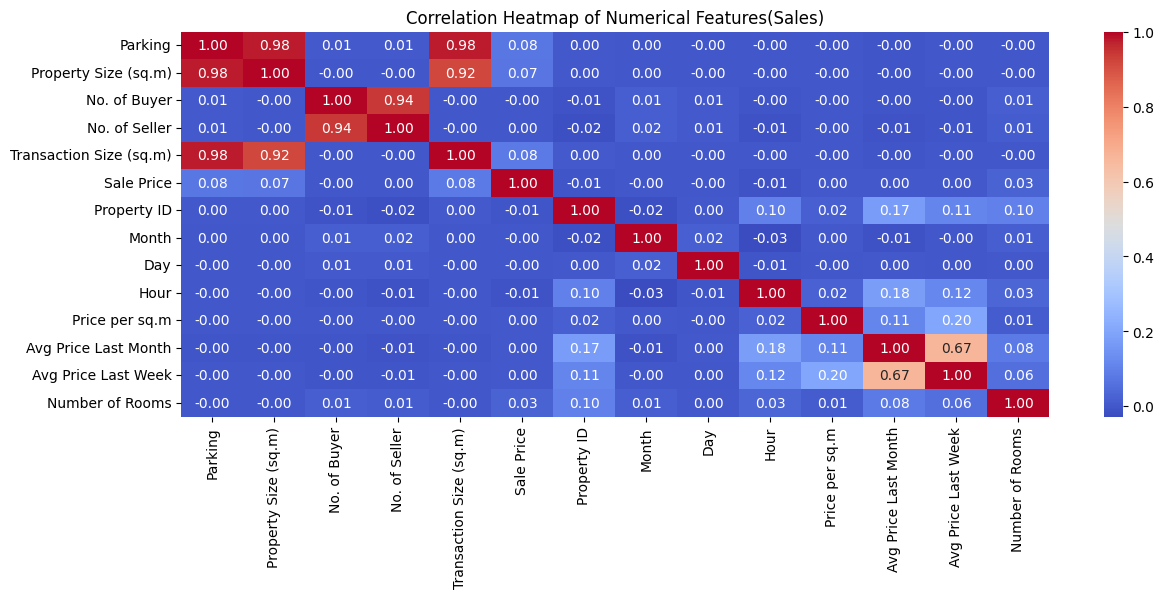

Correlation Matrix for Selected Model Features(Sales):


Parking  Property Size (sq.m)  No. of Buyer  \
Parking                  1.000000              0.979473      0.008152   
Property Size (sq.m)     0.979473              1.000000     -0.000382   
No. of Buyer             0.008152             -0.000382      1.000000   
No. of Seller            0.007995             -0.000397      0.939855   
Transaction Size (sq.m)  0.978012              0.916901     -0.000405   
Sale Price               0.076305              0.071264     -0.001786   
Property ID              0.004068              0.004173     -0.009201   
Month                    0.000271              0.000284      0.013727   
Day                     -0.001276             -0.000977      0.006262   
Hour                    -0.000957             -0.001465     -0.004613   
Price per sq.m          -0.000552             -0.000519     -0.000804   
Avg Price Last Month    -0.004890             -0.004633     -0.004911   
Avg Price Last Week     -0.003296             -0.003146     -0.003629   
Number of Rooms         -0.001712             -0.001953      0.014651   

                         No. of Seller  Transaction Size (sq.m)  Sale Price  \
Parking                       0.007995                 0.978012    0.076305   
Property Size (sq.m)         -0.000397                 0.916901    0.071264   
No. of Buyer                  0.939855                -0.000405   -0.001786   
No. of Seller                 1.000000                -0.000418    0.000259   
Transaction Size (sq.m)      -0.000418                 1.000000    0.082710   
Sale Price                    0.000259                 0.082710    1.000000   
Property ID                  -0.019127                 0.004847   -0.005104   
Month                         0.015929                 0.000019   -0.001245   
Day                           0.007655                -0.001764   -0.000705   
Hour                         -0.014351                -0.000233   -0.011072   
Price per sq.m               -0.001664                -0.000499    0.001472   
Avg Price Last Month         -0.008700                -0.004424    0.000468   
Avg Price Last Week          -0.006966                -0.002949    0.002405   
Number of Rooms               0.009062                -0.001768    0.028022   

                         Property ID     Month       Day      Hour  \
Parking                     0.004068  0.000271 -0.001276 -0.000957   
Property Size (sq.m)        0.004173  0.000284 -0.000977 -0.001465   
No. of Buyer               -0.009201  0.013727  0.006262 -0.004613   
No. of Seller              -0.019127  0.015929  0.007655 -0.014351   
Transaction Size (sq.m)     0.004847  0.000019 -0.001764 -0.000233   
Sale Price                 -0.005104 -0.001245 -0.000705 -0.011072   
Property ID                 1.000000 -0.017276  0.002775  0.097143   
Month                      -0.017276  1.000000  0.018451 -0.027645   
Day                         0.002775  0.018451  1.000000 -0.005338   
Hour                        0.097143 -0.027645 -0.005338  1.000000   
Price per sq.m              0.017538  0.000910 -0.000108  0.021556   
Avg Price Last Month        0.171313 -0.012580  0.001652  0.175513   
Avg Price Last Week         0.109928 -0.003371  0.000437  0.115974   
Number of Rooms             0.100050  0.013788  0.003864  0.034102   

                         Price per sq.m  Avg Price Last Month  \
Parking                       -0.000552             -0.004890   
Property Size (sq.m)          -0.000519             -0.004633   
No. of Buyer                  -0.000804             -0.004911   
No. of Seller                 -0.001664             -0.008700   
Transaction Size (sq.m)       -0.000499             -0.004424   
Sale Price                     0.001472              0.000468   
Property ID                    0.017538              0.171313   
Month                          0.000910             -0.012580   
Day                           -0.000108              0.001652   
Hour                           0.021556    

In [268]:
# Correlation heatmap for numerical features
print("\n### Correlation Heatmap for Numerical Features (Sales) ###")
plt.figure(figsize=(14, 5))
corr_matrix_sales = full_sales_df[sales_merged_numerical_features].corr()
sns.heatmap(
    corr_matrix_sales, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Features(Sales)")
plt.show()

print("Correlation Matrix for Selected Model Features(Sales):")
corr_matrix_sales

In [269]:
targeted_rentals_df.columns

Index(['property_area(sq.m)', 'property_location', 'avg_rent_last_week',
       'annual_rental_prices(aed)', 'property_type', 'rental_price_per_sqm',
       'avg_rent_last_month', 'property_sub_type', 'nearest_metro',
       'nearest_mall', 'nearest_landmark', 'usage', 'year'],
      dtype='object')


### Correlation Heatmap for Numerical Features (Rentals) ###


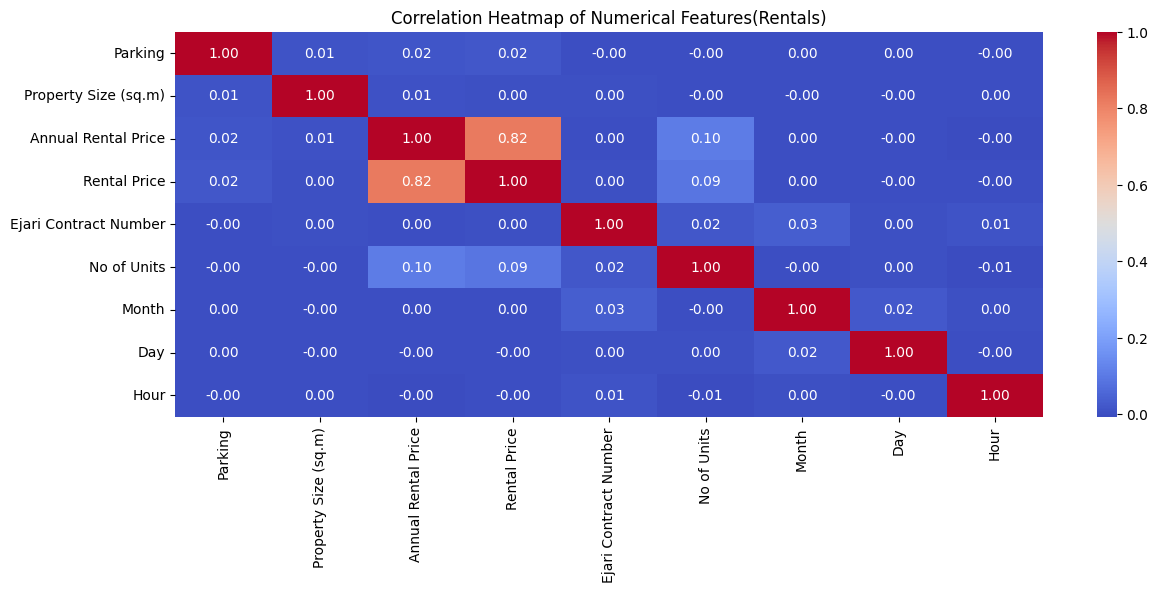

Correlation Matrix for Selected Model Features(Rentals):


Parking  Property Size (sq.m)  Annual Rental Price  \
Parking                1.000000              0.011175             0.016716   
Property Size (sq.m)   0.011175              1.000000             0.006057   
Annual Rental Price    0.016716              0.006057             1.000000   
Rental Price           0.018763              0.002822             0.821524   
Ejari Contract Number -0.002100              0.002057             0.001152   
No of Units           -0.000186             -0.000256             0.104993   
Month                  0.000749             -0.000074             0.000193   
Day                    0.000883             -0.000590            -0.000513   
Hour                  -0.001280              0.000173            -0.002839   

                       Rental Price  Ejari Contract Number  No of Units  \
Parking                    0.018763              -0.002100    -0.000186   
Property Size (sq.m)       0.002822               0.002057    -0.000256   
Annual Rental Price        0.821524               0.001152     0.104993   
Rental Price               1.000000               0.002262     0.091387   
Ejari Contract Number      0.002262               1.000000     0.017983   
No of Units                0.091387               0.017983     1.000000   
Month                      0.000929               0.034523    -0.002421   
Day                       -0.000811               0.004685     0.002092   
Hour                      -0.002450               0.011422    -0.006582   

                          Month       Day      Hour  
Parking                0.000749  0.000883 -0.001280  
Property Size (sq.m)  -0.000074 -0.000590  0.000173  
Annual Rental Price    0.000193 -0.000513 -0.002839  
Rental Price           0.000929 -0.000811 -0.002450  
Ejari Contract Number  0.034523  0.004685  0.011422  
No of Units           -0.002421  0.002092 -0.006582  
Month                  1.000000  0.024471  0.002030  
Day                    0.024471  1.000000 -0.001334  
Hour                   0.002030 -0.001334  1.000000

In [270]:

# Correlation heatmap for numerical features
print("\n### Correlation Heatmap for Numerical Features (Rentals) ###")
plt.figure(figsize=(14, 5))
corr_matrix_rentals = full_rentals_df[rentals_merged_numerical_features].corr()
sns.heatmap(
    corr_matrix_rentals, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Features(Rentals)")
plt.show()

print("Correlation Matrix for Selected Model Features(Rentals):")
corr_matrix_rentals


- save the processed dataframe to disk

In [271]:
# Convert 'YearMonth' from Period to datetime (start of the month)
# model_features_df['YearMonth'] = model_features_df['YearMonth'].dt.to_timestamp()

# Alternatively,  to string:
# full_sales_df['YearMonth'] = full_sales_df['YearMonth'].astype(str)
# full_sales_df['YearMonth']

- create merged datasets with macro

1. Macro + Sales Merged

In [272]:
unimputed_processed_wdi_df = processed_wdi_df.dropna(how='any')
unimputed_processed_wdi_df

Country Name Country Code           Indicator Code  Year  \
868    United Arab Emirates          ARE           SP.DYN.CBRT.IN  1960   
2364   United Arab Emirates          ARE           SP.DYN.CBRT.IN  1961   
3860   United Arab Emirates          ARE           SP.DYN.CBRT.IN  1962   
5356   United Arab Emirates          ARE           SP.DYN.CBRT.IN  1963   
6852   United Arab Emirates          ARE           SP.DYN.CBRT.IN  1964   
...                     ...          ...                      ...   ...   
94245  United Arab Emirates          ARE  EN.GHG.CO2.IC.MT.CE.AR5  2022   
94749  United Arab Emirates          ARE        NY.GDP.PCAP.KD.ZG  2023   
94751  United Arab Emirates          ARE        NY.GDP.MKTP.KD.ZG  2023   
94832  United Arab Emirates          ARE        BX.KLT.DINV.CD.WD  2023   
95125  United Arab Emirates          ARE           SL.UEM.TOTL.ZS  2023   

              Value                   Short Indicator Name  
868    4.181400e+01                       Crude Birth Rate  
2364   4.139200e+01                       Crude Birth Rate  
3860   4.106200e+01                       Crude Birth Rate  
5356   4.060100e+01                       Crude Birth Rate  
6852   4.000300e+01                       Crude Birth Rate  
...             ...                                    ...  
94245  8.185120e+01  CO2 Emissions (Industrial Combustion)  
94749  2.580896e+00              GDP per Capita Growth (%)  
94751  3.403857e+00                         GDP Growth (%)  
94832  3.068754e+10          FDI Net Inflows (current US$)  
95125  2.706000e+00                  Unemployment Rate (%)  

[574 rows x 6 columns]

In [273]:
aggregated_macro_df.head(2)

Year  avg_GDP_constant  avg_GDP_current  total_population  \
0 2012-01-01      52873.511891     62054.574318        15078614.0   
1 2013-01-01      27721.548677     32356.549209        15693510.0   

   total_population_female  total_population_male  total_population_others  \
0                4937649.0              2601658.0                7539307.0   
1                5129965.0              2716790.0                7846755.0   

   total_tourism_guests  avg_monthly_cpi  avg_currency_strength  \
0            94935056.0        32.605897               0.272322   
1           150029216.0        33.341795               0.272327   

   avg_GDP_per_capita  total_tourism_revenue_per_capita  \
0            0.003507                          6.296007   
1            0.001766                          9.559953   

   total_population_growth_rate  total_tourism_growth_rate  
0                      0.000000                   0.000000  
1                      0.040779                   0.580335

In [274]:
targeted_sales_df.head(2)

property_area(sq.m)  property_location  avg_price_last_week  \
0                49.47                0.0         10133.296073   
1               167.94               59.0         26564.467497   

   number_of_rooms  property_layout  sales_price(aed)  property_type  \
0              2.0             15.0          425993.0            1.0   
1              2.0              1.0         1900000.0            1.0   

   price_per_sqm  avg_price_last_month  property_sub_type  nearest_metro  \
0    8611.138063           9752.518951                0.0           23.0   
1   11313.564368          22598.646581                0.0           33.0   

   nearest_mall  nearest_landmark  usage  year  
0           4.0               6.0    0.0  2022  
1           6.0               2.0    0.0  2022

In [275]:
unimputed_processed_wdi_df['Short Indicator Name'].unique()

array(['Crude Birth Rate', 'FDI Net Inflows (current US$)',
       'Methane Emissions (Power)', 'Methane Emissions (Fugitive)',
       'CO2 Emissions (Industrial Combustion)',
       'GDP per Capita Growth (%)', 'GDP Growth (%)',
       'Alternative & Nuclear Energy (%)', 'Oil Rents (% of GDP)',
       'Natural Gas Rents (% of GDP)', 'Urban Land Area (sq. km)',
       'Unemployment Rate (%)', 'Inflation Rate (%)',
       'GNI per Capita (PPP)', 'PPP Investment in Energy',
       'Private Participation in Energy'], dtype=object)

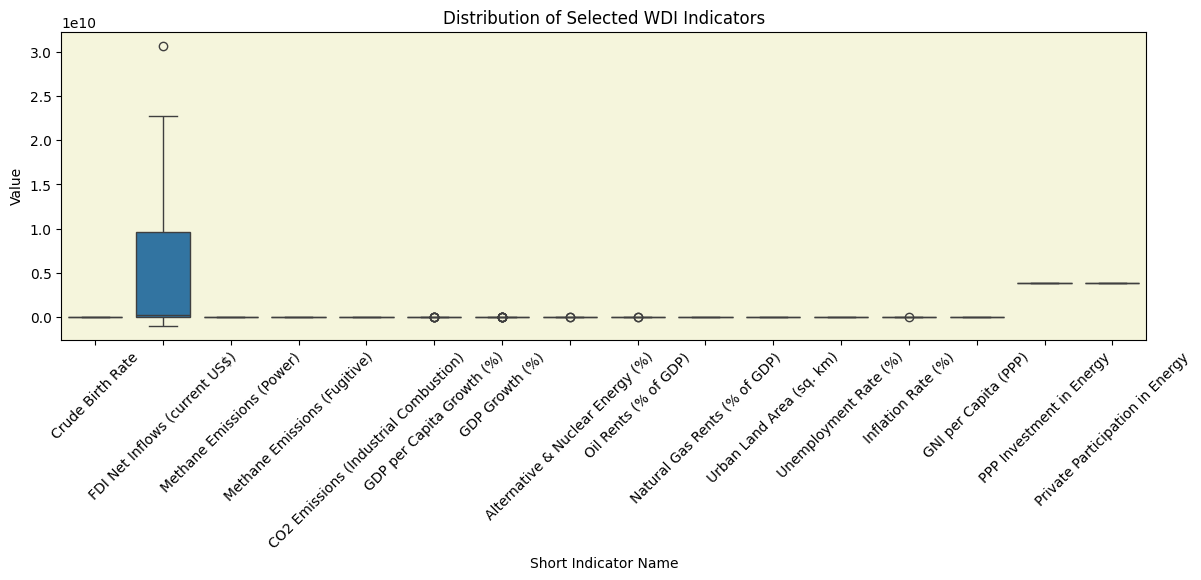

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few key indicators for visualization
key_indicators = [
'Crude Birth Rate', 'FDI Net Inflows (current US$)',
       'Methane Emissions (Power)', 'Methane Emissions (Fugitive)',
       'CO2 Emissions (Industrial Combustion)',
       'GDP per Capita Growth (%)', 'GDP Growth (%)',
       'Alternative & Nuclear Energy (%)', 'Oil Rents (% of GDP)',
       'Natural Gas Rents (% of GDP)', 'Urban Land Area (sq. km)',
       'Unemployment Rate (%)', 'Inflation Rate (%)',
       'GNI per Capita (PPP)', 'PPP Investment in Energy',
       'Private Participation in Energy'
       ]

# Filter dataset for selected indicators
# filtered_wdi_df = unimputed_processed_wdi_df[unimputed_processed_wdi_df['Short Indicator Name'].isin(key_indicators)]
filtered_wdi_df = unimputed_processed_wdi_df[unimputed_processed_wdi_df['Short Indicator Name'].isin(key_indicators)]

# Plot distribution of each selected indicator
plt.figure(figsize=(14, 4))
sns.boxplot(x='Short Indicator Name', y='Value', data=filtered_wdi_df)
plt.xticks(rotation=45)
plt.title("Distribution of Selected WDI Indicators")
plt.show()


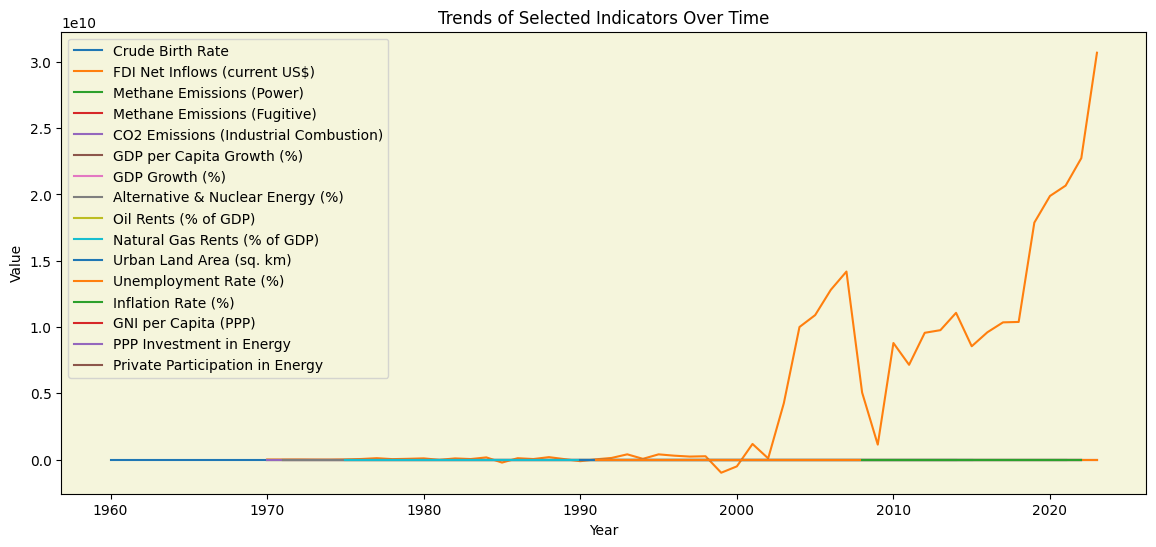

In [277]:
# Plot time series trends for selected indicators
plt.figure(figsize=(14, 6))

for indicator in key_indicators:
    subset = unimputed_processed_wdi_df[unimputed_processed_wdi_df['Short Indicator Name'] == indicator]
    plt.plot(subset['Year'], subset['Value'], label=indicator)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Trends of Selected Indicators Over Time")
plt.legend()
plt.show()


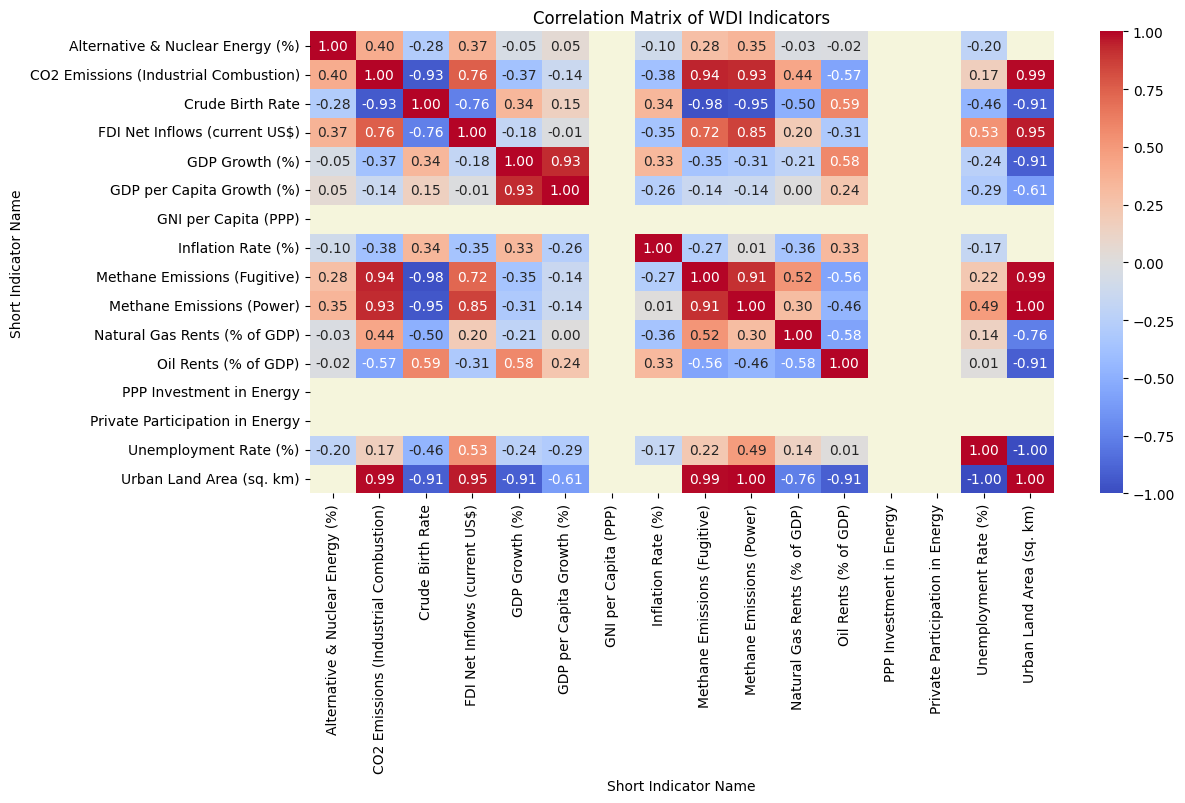

wdi corr matrix:


Short Indicator Name                   Alternative & Nuclear Energy (%)  \
Short Indicator Name                                                      
Alternative & Nuclear Energy (%)                               1.000000   
CO2 Emissions (Industrial Combustion)                          0.399263   
Crude Birth Rate                                              -0.284301   
FDI Net Inflows (current US$)                                  0.365786   
GDP Growth (%)                                                -0.051959   
GDP per Capita Growth (%)                                      0.048716   
GNI per Capita (PPP)                                                NaN   
Inflation Rate (%)                                            -0.097375   
Methane Emissions (Fugitive)                                   0.284118   
Methane Emissions (Power)                                      0.349262   
Natural Gas Rents (% of GDP)                                  -0.029919   
Oil Rents (% of GDP)                                          -0.023158   
PPP Investment in Energy                                            NaN   
Private Participation in Energy                                     NaN   
Unemployment Rate (%)                                         -0.203607   
Urban Land Area (sq. km)                                            NaN   

Short Indicator Name                   CO2 Emissions (Industrial Combustion)  \
Short Indicator Name                                                           
Alternative & Nuclear Energy (%)                                    0.399263   
CO2 Emissions (Industrial Combustion)                               1.000000   
Crude Birth Rate                                                   -0.930330   
FDI Net Inflows (current US$)                                       0.756414   
GDP Growth (%)                                                     -0.373006   
GDP per Capita Growth (%)                                          -0.136173   
GNI per Capita (PPP)                                                     NaN   
Inflation Rate (%)                                                 -0.381367   
Methane Emissions (Fugitive)                                        0.937583   
Methane Emissions (Power)                                           0.925908   
Natural Gas Rents (% of GDP)                                        0.435317   
Oil Rents (% of GDP)                                               -0.566287   
PPP Investment in Energy                                                 NaN   
Private Participation in Energy                                          NaN   
Unemployment Rate (%)                                               0.169640   
Urban Land Area (sq. km)                                            0.989045   

Short Indicator Name                   Crude Birth Rate  \
Short Indicator Name                                      
Alternative & Nuclear Energy (%)              -0.284301   
CO2 Emissions (Industrial Combustion)         -0.930330   
Crude Birth Rate                               1.000000   
FDI Net Inflows (current US$)                 -0.756314   
GDP Growth (%)                                 0.341615   
GDP per Capita Growth (%)                      0.149832   
GNI per Capita (PPP)                                NaN   
Inflation Rate (%)                             0.341488   
Methane Emissions (Fugitive)                  -0.975988   
Methane Emissions (Power)                     -0.948122   
Natural Gas Rents (% of GDP)                  -0.495098   
Oil Rents (% of GDP)                           0.591203   
PPP Investment in Energy                            NaN   
Private Participation in Energy                     NaN   
Unemployment Rate (%)                         -0.464066   
Urban Land Area (sq. km)                      -0.912876   

Short Indicator Name                   FDI Net Inflows (current US$)  \
Short Indicator Name                                                   
A

In [278]:
# Pivot the dataframe to have indicators as columns
wdi_pivot_df = unimputed_processed_wdi_df.pivot(index='Year', columns='Short Indicator Name', values='Value')

# Compute correlation matrix
wdi_corr_matrix = wdi_pivot_df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(wdi_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of WDI Indicators")
plt.show()

print("wdi corr matrix:")
wdi_corr_matrix


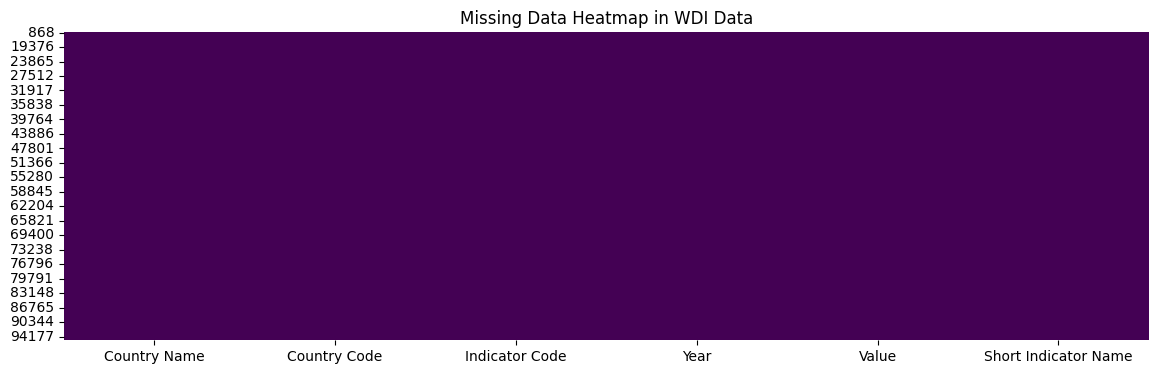

In [279]:
# Visualizing missing data
plt.figure(figsize=(14, 4))
sns.heatmap(unimputed_processed_wdi_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap in WDI Data")
plt.show()


In [280]:
df_check = pd.to_datetime(unimputed_processed_wdi_df['Year'], format='%Y')
df_check

868     1960-01-01
2364    1961-01-01
3860    1962-01-01
5356    1963-01-01
6852    1964-01-01
           ...    
94245   2022-01-01
94749   2023-01-01
94751   2023-01-01
94832   2023-01-01
95125   2023-01-01
Name: Year, Length: 574, dtype: datetime64[ns]

In [307]:
targeted_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784753 entries, 0 to 2176494
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   property_area(sq.m)        784753 non-null  float64       
 1   property_location          784753 non-null  float64       
 2   avg_rent_last_week         784753 non-null  float64       
 3   annual_rental_prices(aed)  784753 non-null  float64       
 4   property_type              784753 non-null  float64       
 5   rental_price_per_sqm       784753 non-null  float64       
 6   avg_rent_last_month        784753 non-null  float64       
 7   property_sub_type          784753 non-null  float64       
 8   nearest_metro              784753 non-null  float64       
 9   nearest_mall               784753 non-null  float64       
 10  nearest_landmark           784753 non-null  float64       
 11  usage                      784753 non-null  float64     

In [282]:
# # Convert 'Year' to datetime format if not already
# unimputed_processed_wdi_df['Year'] = pd.to_datetime(unimputed_processed_wdi_df['Year'], format='%Y')
# aggregated_macro_df['Year'] = pd.to_datetime(aggregated_macro_df['Year'], format='%Y')

# # Ensure the target data also has a Year column (assuming transactions happened within a year)
# targeted_sales_df['year'] = pd.to_datetime(targeted_sales_df['year'], format='%Y')
# targeted_rentals_df['year'] = pd.to_datetime(targeted_rentals_df['year'], format='%Y')

In [283]:
# Merge macroeconomic and WDI datasets on 'Year'
# macro_df = pd.merge(aggregated_macro_df, unimputed_processed_wdi_df, on='Year', how='left')

In [284]:
# Drop unnecessary columns if needed
# macro_df = macro_df.drop(columns=['Indicator Code', 'Country Code', 'Country Name'])
# macro_df.columns

In [285]:
# Merge macroeconomic data with property sales data
# sales_macro_model_df = pd.merge(targeted_sales_df, macro_df, left_on='year', right_on='Year')
# check_sales_macro_model_df

In [286]:
# rental_macro_model_df = pd.merge(targeted_rentals_df, macro_df, left_on='year', right_on='Year')

In [287]:

unimputed_processed_wdi_df['Year'] = pd.to_datetime(unimputed_processed_wdi_df['Year'], format='%Y')
aggregated_macro_df['Year'] = pd.to_datetime(aggregated_macro_df['Year'], format='%Y')

targeted_sales_df['year'] = pd.to_datetime(targeted_sales_df['year'], format='%Y')
targeted_rentals_df['year'] = pd.to_datetime(targeted_rentals_df['year'], format='%Y')

# Merge macroeconomic and WDI datasets on 'Year'
macro_df = pd.merge(aggregated_macro_df, unimputed_processed_wdi_df, on='Year', how='left')

macro_df = macro_df.drop(columns=['Indicator Code', 'Country Code', 'Country Name'])

# Merge macroeconomic data with property sales data
# sales_macro_model_df = pd.merge(targeted_sales_df, macro_df, on='Year', how='left')
sales_macro_model_df = pd.merge(targeted_sales_df, macro_df, left_on='year', right_on='Year')

# # Merge macroeconomic data with property rentals data
# rental_macro_model_df = pd.merge(targeted_rentals_df, macro_df, on='Year', how='left')




In [288]:
# targeted_sales_df.info()

In [289]:
sales_macro_df = pd.merge(targeted_sales_df, aggregated_macro_df, left_on='year', right_on='Year')
# sales_macro_df

In [290]:
sales_macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350413 entries, 0 to 350412
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   property_area(sq.m)               350413 non-null  float64       
 1   property_location                 350413 non-null  float64       
 2   avg_price_last_week               350413 non-null  float64       
 3   number_of_rooms                   350413 non-null  float64       
 4   property_layout                   350413 non-null  float64       
 5   sales_price(aed)                  350413 non-null  float64       
 6   property_type                     350413 non-null  float64       
 7   price_per_sqm                     350413 non-null  float64       
 8   avg_price_last_month              350413 non-null  float64       
 9   property_sub_type                 350413 non-null  float64       
 10  nearest_metro                   

2. Macro + Rental Merged

In [291]:
targeted_rentals_df.head(2)

property_area(sq.m)  property_location  avg_rent_last_week  \
0               5695.0               80.0           52.677788   
3                806.0               61.0           12.406948   

   annual_rental_prices(aed)  property_type  rental_price_per_sqm  \
0                   300000.0            0.0             52.677788   
3                    10000.0            0.0             12.406948   

   avg_rent_last_month  property_sub_type  nearest_metro  nearest_mall  \
0            52.677788               14.0           54.0           2.0   
3            12.406948                7.0           39.0           4.0   

   nearest_landmark  usage       year  
0               4.0    3.0 2021-01-01  
3               9.0    2.0 2021-01-01

In [292]:
rentals_macro_df = pd.merge(targeted_rentals_df, aggregated_macro_df, left_on='year', right_on='Year')

In [293]:
rentals_macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784753 entries, 0 to 784752
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   property_area(sq.m)               784753 non-null  float64       
 1   property_location                 784753 non-null  float64       
 2   avg_rent_last_week                784753 non-null  float64       
 3   annual_rental_prices(aed)         784753 non-null  float64       
 4   property_type                     784753 non-null  float64       
 5   rental_price_per_sqm              784753 non-null  float64       
 6   avg_rent_last_month               784753 non-null  float64       
 7   property_sub_type                 784753 non-null  float64       
 8   nearest_metro                     784753 non-null  float64       
 9   nearest_mall                      784753 non-null  float64       
 10  nearest_landmark                

- Challenge Questions

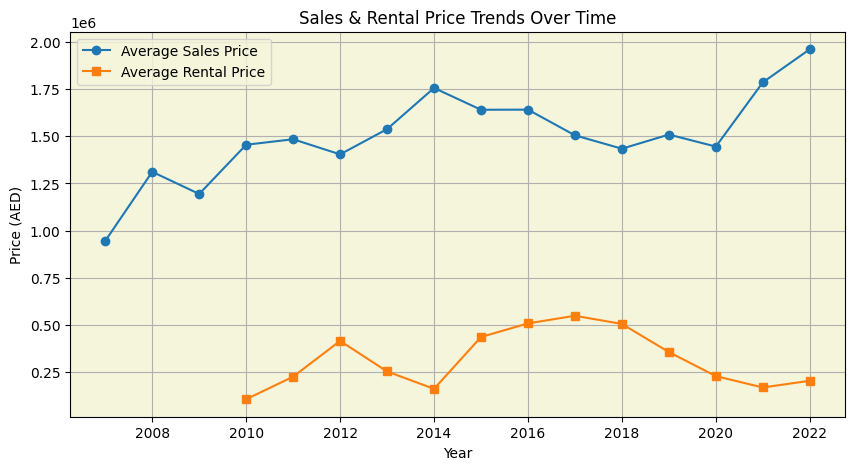

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

targeted_sales_df['year'] = targeted_sales_df['year'].dt.year
targeted_rentals_df['year'] = targeted_rentals_df['year'].dt.year

# Group by year and calculate average price
sales_trend = targeted_sales_df.groupby('year')['sales_price(aed)'].mean()
rental_trend = targeted_rentals_df.groupby('year')['annual_rental_prices(aed)'].mean()

plt.figure(figsize=(10, 5))
plt.plot(sales_trend.index, sales_trend.values, label='Average Sales Price', marker='o')
plt.plot(rental_trend.index, rental_trend.values, label='Average Rental Price', marker='s')

plt.xlabel('Year')
plt.ylabel('Price (AED)')
plt.title('Sales & Rental Price Trends Over Time')
plt.legend()
plt.grid()
plt.show()


In [309]:
print("Sales Trend:")
sales_trend

Sales Trend:


year
2007    9.455803e+05
2008    1.311951e+06
2009    1.194468e+06
2010    1.455581e+06
2011    1.484723e+06
2012    1.404540e+06
2013    1.538376e+06
2014    1.756732e+06
2015    1.641140e+06
2016    1.641787e+06
2017    1.505461e+06
2018    1.434533e+06
2019    1.509630e+06
2020    1.445849e+06
2021    1.786571e+06
2022    1.962272e+06
Name: sales_price(aed), dtype: float64

In [311]:
print("Rentals Trend:")
rental_trend

Rentals Trend:


year
2010    105675.959420
2011    225229.668618
2012    415103.797090
2013    252957.546162
2014    160743.937455
2015    435780.332176
2016    507965.452377
2017    548378.647076
2018    504926.297195
2019    355916.355409
2020    228249.718975
2021    167928.773118
2022    203594.317907
Name: annual_rental_prices(aed), dtype: float64

2. 

In [313]:
targeted_sales_df['property_location'].unique()

array([ 0., 59., 72., 14., 24., 45., 38., 13., 43., 42.,  3., 25., 20.,
       27., 32., 29., 23., 52., 46., 28., 53., 12., 63., 17., 56., 19.,
       67., 66., 16., 48., 65., 11., 31., 33., 36., 22., 50., 55., 34.,
       58.,  7., 60.,  6.,  1., 35., 39., 51., 26., 69.,  8., 30., 57.,
       40., 18.,  4., 10., 37., 62., 44., 21., 68., 47., 64., 61., 54.,
        5., 49.,  2., 70.,  9., 15., 71., 41.])

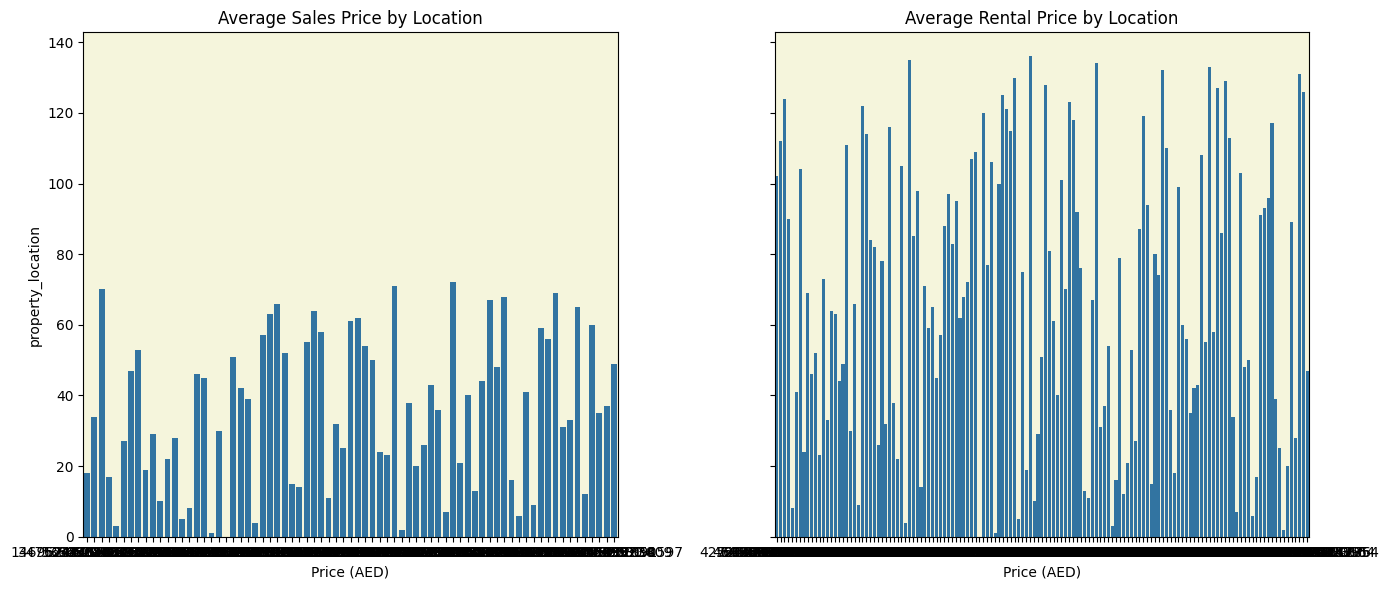

In [312]:
# Group data by property location and calculate mean prices
sales_by_location = targeted_sales_df.groupby('property_location')['sales_price(aed)'].mean().sort_values(ascending=False)
rentals_by_location = targeted_rentals_df.groupby('property_location')['annual_rental_prices(aed)'].mean().sort_values(ascending=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(x=sales_by_location.values, y=sales_by_location.index, ax=axes[0])
axes[0].set_title('Average Sales Price by Location')
axes[0].set_xlabel('Price (AED)')

sns.barplot(x=rentals_by_location.values, y=rentals_by_location.index, ax=axes[1])
axes[1].set_title('Average Rental Price by Location')
axes[1].set_xlabel('Price (AED)')

plt.tight_layout()
plt.show()


In [316]:
print("sales_by_location:")
sales_by_location

sales_by_location:


property_location
49.0    2.168500e+07
37.0    1.087642e+07
35.0    8.189492e+06
60.0    4.971990e+06
12.0    4.415031e+06
            ...     
3.0     6.240115e+05
17.0    5.330938e+05
70.0    4.446354e+05
34.0    3.475245e+05
18.0    1.469522e+05
Name: sales_price(aed), Length: 73, dtype: float64

In [317]:
# Calculate average sales price per location
location_avg_price = targeted_sales_df.groupby('property_location')['sales_price(aed)'].mean()

# Merge location average with main dataset
targeted_sales_df['location_avg_price'] = targeted_sales_df['property_location'].map(location_avg_price)

# Identify properties priced significantly below the location's average (e.g., 20% below)
undervalued_sales = targeted_sales_df[targeted_sales_df['sales_price(aed)'] < 0.8 * targeted_sales_df['location_avg_price']]

# Merge with rental data to find high rental yield properties
undervalued_sales = undervalued_sales.merge(targeted_rentals_df, 
                                            on=['property_location', 'property_type', 'property_area(sq.m)'], 
                                            suffixes=('_sale', '_rental'))

# Compute rental yield (Annual rent / Sales price)
undervalued_sales['rental_yield'] = (undervalued_sales['annual_rental_prices(aed)'] / 
                                     undervalued_sales['sales_price(aed)']) * 100

# Select top undervalued properties with high rental yield
best_investment_options = undervalued_sales.sort_values(by=['rental_yield'], ascending=False).head(10)

# Display the top undervalued properties
best_investment_options[['property_location', 'property_type', 'sales_price(aed)', 'annual_rental_prices(aed)', 'rental_yield']]


property_location  property_type  sales_price(aed)  \
22204               34.0            1.0          123400.0   
22203               34.0            1.0          123400.0   
22220               34.0            1.0          210100.0   
22191               34.0            1.0          150000.0   
22192               34.0            1.0          150000.0   
22188               34.0            1.0          159203.0   
22187               34.0            1.0          159203.0   
21565               14.0            1.0          835200.0   
21555               14.0            1.0          835200.0   
21556               14.0            1.0          835200.0   

       annual_rental_prices(aed)  rental_yield  
22204                   750000.0    607.779579  
22203                   750000.0    607.779579  
22220                  1113504.0    529.987625  
22191                   750000.0    500.000000  
22192                   750000.0    500.000000  
22188                   750000.0    471.096650  
22187                   750000.0    471.096650  
21565                  3660000.0    438.218391  
21555                  3660000.0    438.218391  
21556                  3660000.0    438.218391

In [323]:
# Assuming columns are like 'property_location_1', 'property_location_2', etc.
property_location_columns = [col for col in targeted_sales_df.columns if 'property_location' in col]

# Reverse the encoding by checking which column is 1 and returning the corresponding category name
# Assuming you have a list of original category names for property_location
original_property_location_categories = ['Location_1', 'Location_2', 'Location_3', 'Location_4']  # Replace with your original categories

# Create a new column with the decoded location values
targeted_sales_df['property_location_decoded'] = targeted_sales_df[property_location_columns].idxmax(axis=1).apply(lambda x: x.replace('property_location_', ''))

# Now, map the columns back to the original category names (if needed)
targeted_sales_df['property_location_decoded'] = targeted_sales_df['property_location_decoded'].map(dict(zip(range(len(original_property_location_categories)), original_property_location_categories)))

# Repeat for other one-hot encoded columns like 'property_type', 'property_sub_type', etc.


In [ ]:
targeted_sales_df['property_location_decoded'][['property_area(sq.m)', 'property_location_decoded', 'sales_price(aed)', 'predicted_sales_price', 'price_deviation']]


In [294]:
# Merge macroeconomic data with property rentals data
rental_macro_model_df = pd.merge(targeted_rentals_df, macro_df, left_on='year', right_on='Year')

In [295]:

cat_columns =   rental_macro_model_df.select_dtypes(include=['object', 'category']).columns.tolist()
num_columns =   rental_macro_model_df.select_dtypes(include=[np.number]).columns

rental_macro_model_df[num_columns].corr(method='pearson')['annual_rental_prices(aed)'].sort_values(ascending=False).to_frame().T

annual_rental_prices(aed)  avg_rent_last_week  \
annual_rental_prices(aed)                        1.0            0.469021   

                           rental_price_per_sqm  avg_rent_last_month  \
annual_rental_prices(aed)              0.457004             0.437591   

                           property_area(sq.m)  avg_currency_strength  \
annual_rental_prices(aed)             0.073059               0.051966   

                           total_tourism_revenue_per_capita     usage  \
annual_rental_prices(aed)                          0.044012  0.035367   

                           total_tourism_guests  property_sub_type  ...  \
annual_rental_prices(aed)              0.029514           0.014683  ...   

                           total_population_growth_rate  avg_monthly_cpi  \
annual_rental_prices(aed)                     -0.016715        -0.017315   

                           total_population_female  total_population  \
annual_rental_prices(aed)                -0.019413         -0.022888   

                           total_population_others  total_population_male  \
annual_rental_prices(aed)                -0.022888              -0.027727   

                           property_location  property_type  nearest_landmark  \
annual_rental_prices(aed)          -0.036808      -0.044178          -0.05789   

                           nearest_mall  
annual_rental_prices(aed)     -0.062927  

[1 rows x 26 columns]

In [296]:
sales_macro_model_df.columns

Index(['property_area(sq.m)', 'property_location', 'avg_price_last_week',
       'number_of_rooms', 'property_layout', 'sales_price(aed)',
       'property_type', 'price_per_sqm', 'avg_price_last_month',
       'property_sub_type', 'nearest_metro', 'nearest_mall',
       'nearest_landmark', 'usage', 'year', 'Year', 'avg_GDP_constant',
       'avg_GDP_current', 'total_population', 'total_population_female',
       'total_population_male', 'total_population_others',
       'total_tourism_guests', 'avg_monthly_cpi', 'avg_currency_strength',
       'avg_GDP_per_capita', 'total_tourism_revenue_per_capita',
       'total_population_growth_rate', 'total_tourism_growth_rate', 'Value',
       'Short Indicator Name'],
      dtype='object')

In [297]:

cat_columns =   sales_macro_model_df.select_dtypes(include=['object', 'category']).columns.tolist()
num_columns =   sales_macro_model_df.select_dtypes(include=[np.number]).columns

sales_macro_model_df[num_columns].corr(method='pearson')['sales_price(aed)'].sort_values(ascending=False).to_frame().T

sales_price(aed)  property_area(sq.m)  price_per_sqm  \
sales_price(aed)               1.0             0.617976       0.363027   

                  number_of_rooms  avg_price_last_month  avg_price_last_week  \
sales_price(aed)         0.345224               0.31681             0.313371   

                  property_sub_type  total_population_male  total_population  \
sales_price(aed)           0.083066               0.064457          0.063758   

                  total_population_others  ...  avg_GDP_current  \
sales_price(aed)                 0.063758  ...         -0.03274   

                  avg_GDP_constant  avg_currency_strength  avg_GDP_per_capita  \
sales_price(aed)         -0.036114               -0.04086           -0.058225   

                  nearest_mall  nearest_metro  property_type  property_layout  \
sales_price(aed)     -0.064959      -0.086877      -0.093817        -0.145227   

                  nearest_landmark  usage  
sales_price(aed)         -0.211962    NaN  

[1 rows x 28 columns]

In [298]:
sales_macro_df = data_processor.optimize_dataframe_memory(sales_macro_df)
data_processor.display_dataframe_info(sales_macro_df)

Original memory usage: 77.53 MB
Optimized memory usage: 52.13 MB
Shape: (350413, 29)
Dtypes: ['property_area(sq.m):float64', 'property_location:float32', 'avg_price_last_week:float64', 'number_of_rooms:float32', 'property_layout:float32', 'sales_price(aed):float64', 'property_type:float32', 'price_per_sqm:float64', 'avg_price_last_month:float64', 'property_sub_type:float32', 'nearest_metro:float32', 'nearest_mall:float32', 'nearest_landmark:float32', 'usage:float32', 'year:datetime64[ns]', 'Year:datetime64[ns]', 'avg_GDP_constant:float64', 'avg_GDP_current:float64', 'total_population:float32', 'total_population_female:float32', 'total_population_male:float32', 'total_population_others:float32', 'total_tourism_guests:float64', 'avg_monthly_cpi:float32', 'avg_currency_strength:float32', 'avg_GDP_per_capita:float32', 'total_tourism_revenue_per_capita:float32', 'total_population_growth_rate:float32', 'total_tourism_growth_rate:float32']
Missings (%): ['property_area(sq.m):0.00%', 'property

property_area(sq.m)  property_location  avg_price_last_week  \
0                49.47                0.0         10133.296073   
1               167.94               59.0         26564.467497   

   number_of_rooms  property_layout  sales_price(aed)  property_type  \
0              2.0             15.0          425993.0            1.0   
1              2.0              1.0         1900000.0            1.0   

   price_per_sqm  avg_price_last_month  property_sub_type  ...  \
0    8611.138063           9752.518951                0.0  ...   
1   11313.564368          22598.646581                0.0  ...   

   total_population_female  total_population_male  total_population_others  \
0                6595692.0              3693254.0               10288946.0   
1                6595692.0              3693254.0               10288946.0   

   total_tourism_guests avg_monthly_cpi avg_currency_strength  \
0           233354059.0      101.199211              0.272315   
1           233354059.0      101.199211              0.272315   

   avg_GDP_per_capita  total_tourism_revenue_per_capita  \
0            0.001761                         11.340037   
1            0.001761                         11.340037   

   total_population_growth_rate  total_tourism_growth_rate  
0                      0.043397                   0.212208  
1                      0.043397                   0.212208  

[2 rows x 29 columns]

In [299]:
rentals_macro_df = data_processor.optimize_dataframe_memory(rentals_macro_df)
data_processor.display_dataframe_info(rentals_macro_df)

Original memory usage: 161.65 MB
Optimized memory usage: 110.76 MB
Shape: (784753, 27)
Dtypes: ['property_area(sq.m):float64', 'property_location:float32', 'avg_rent_last_week:float64', 'annual_rental_prices(aed):float64', 'property_type:float32', 'rental_price_per_sqm:float64', 'avg_rent_last_month:float64', 'property_sub_type:float32', 'nearest_metro:float32', 'nearest_mall:float32', 'nearest_landmark:float32', 'usage:float32', 'year:datetime64[ns]', 'Year:datetime64[ns]', 'avg_GDP_constant:float64', 'avg_GDP_current:float64', 'total_population:float32', 'total_population_female:float32', 'total_population_male:float32', 'total_population_others:float32', 'total_tourism_guests:float64', 'avg_monthly_cpi:float32', 'avg_currency_strength:float32', 'avg_GDP_per_capita:float32', 'total_tourism_revenue_per_capita:float32', 'total_population_growth_rate:float32', 'total_tourism_growth_rate:float32']
Missings (%): ['property_area(sq.m):0.00%', 'property_location:0.00%', 'avg_rent_last_week:

property_area(sq.m)  property_location  avg_rent_last_week  \
0               5695.0               80.0           52.677788   
1                806.0               61.0           12.406948   

   annual_rental_prices(aed)  property_type  rental_price_per_sqm  \
0                   300000.0            0.0             52.677788   
1                    10000.0            0.0             12.406948   

   avg_rent_last_month  property_sub_type  nearest_metro  nearest_mall  ...  \
0            52.677788               14.0           54.0           2.0  ...   
1            12.406948                7.0           39.0           4.0  ...   

   total_population_female  total_population_male total_population_others  \
0                6325310.0              3535697.0               9861007.0   
1                6325310.0              3535697.0               9861007.0   

  total_tourism_guests  avg_monthly_cpi  avg_currency_strength  \
0          192503340.0        34.729847                0.27231   
1          192503340.0        34.729847                0.27231   

   avg_GDP_per_capita  total_tourism_revenue_per_capita  \
0            0.001708                          9.760836   
1            0.001708                          9.760836   

   total_population_growth_rate  total_tourism_growth_rate  
0                      0.061545                   0.389771  
1                      0.061545                   0.389771  

[2 rows x 27 columns]

In [300]:
unimputed_processed_wdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 868 to 95125
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country Name          574 non-null    object        
 1   Country Code          574 non-null    object        
 2   Indicator Code        574 non-null    object        
 3   Year                  574 non-null    datetime64[ns]
 4   Value                 574 non-null    float64       
 5   Short Indicator Name  574 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 31.4+ KB


In [301]:
sales_macro_df.to_parquet("../datasets/processed/sales_macro_df.parquet")
rentals_macro_df.to_parquet("../datasets/processed/rental_macro_df.parquet")

In [302]:
sales_macro_model_df.to_parquet("../datasets/processed/sales_macro_model_df.parquet")
rental_macro_model_df.to_parquet("../datasets/processed/rental_macro_model_df.parquet")

In [303]:
# processed_gdp_quarterly_constant_df.to_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
# 
# merged_macro_transactions_df.to_parquet("../datasets/processed/merged_macro_transactions.parquet")
# property_transactions_df.to_parquet("../datasets/processed/property_transactions.parquet")
full_sales_df.to_parquet("../datasets/processed/full_sales_df.parquet")
full_rentals_df.to_parquet("../datasets/processed/full_rentals_df.parquet")


targeted_rentals_df.to_parquet("../datasets/processed/targeted_rentals_df.parquet")
targeted_sales_df.to_parquet("../datasets/processed/targeted_sales_df.parquet")

In [304]:
# Property Type or/and Property Sub Type
# Number of rooms/bedrooms
# Property Size (sq.m)
# Area/Neighborhood
# Nearest Metro
# Nearest Mall
# Nearest Landmark
# Usage (commercial/residential)
# Average prices the previous month/week (for the same kind of property)

In [305]:
property_rental_transactions_df.shape, property_transactions_df.shape, merged_macro_transactions_df.shape

((5469008, 25), (995975, 26), (26, 16))